In [ ]:
!pip install adjustText
!pip install pandas requests lxml

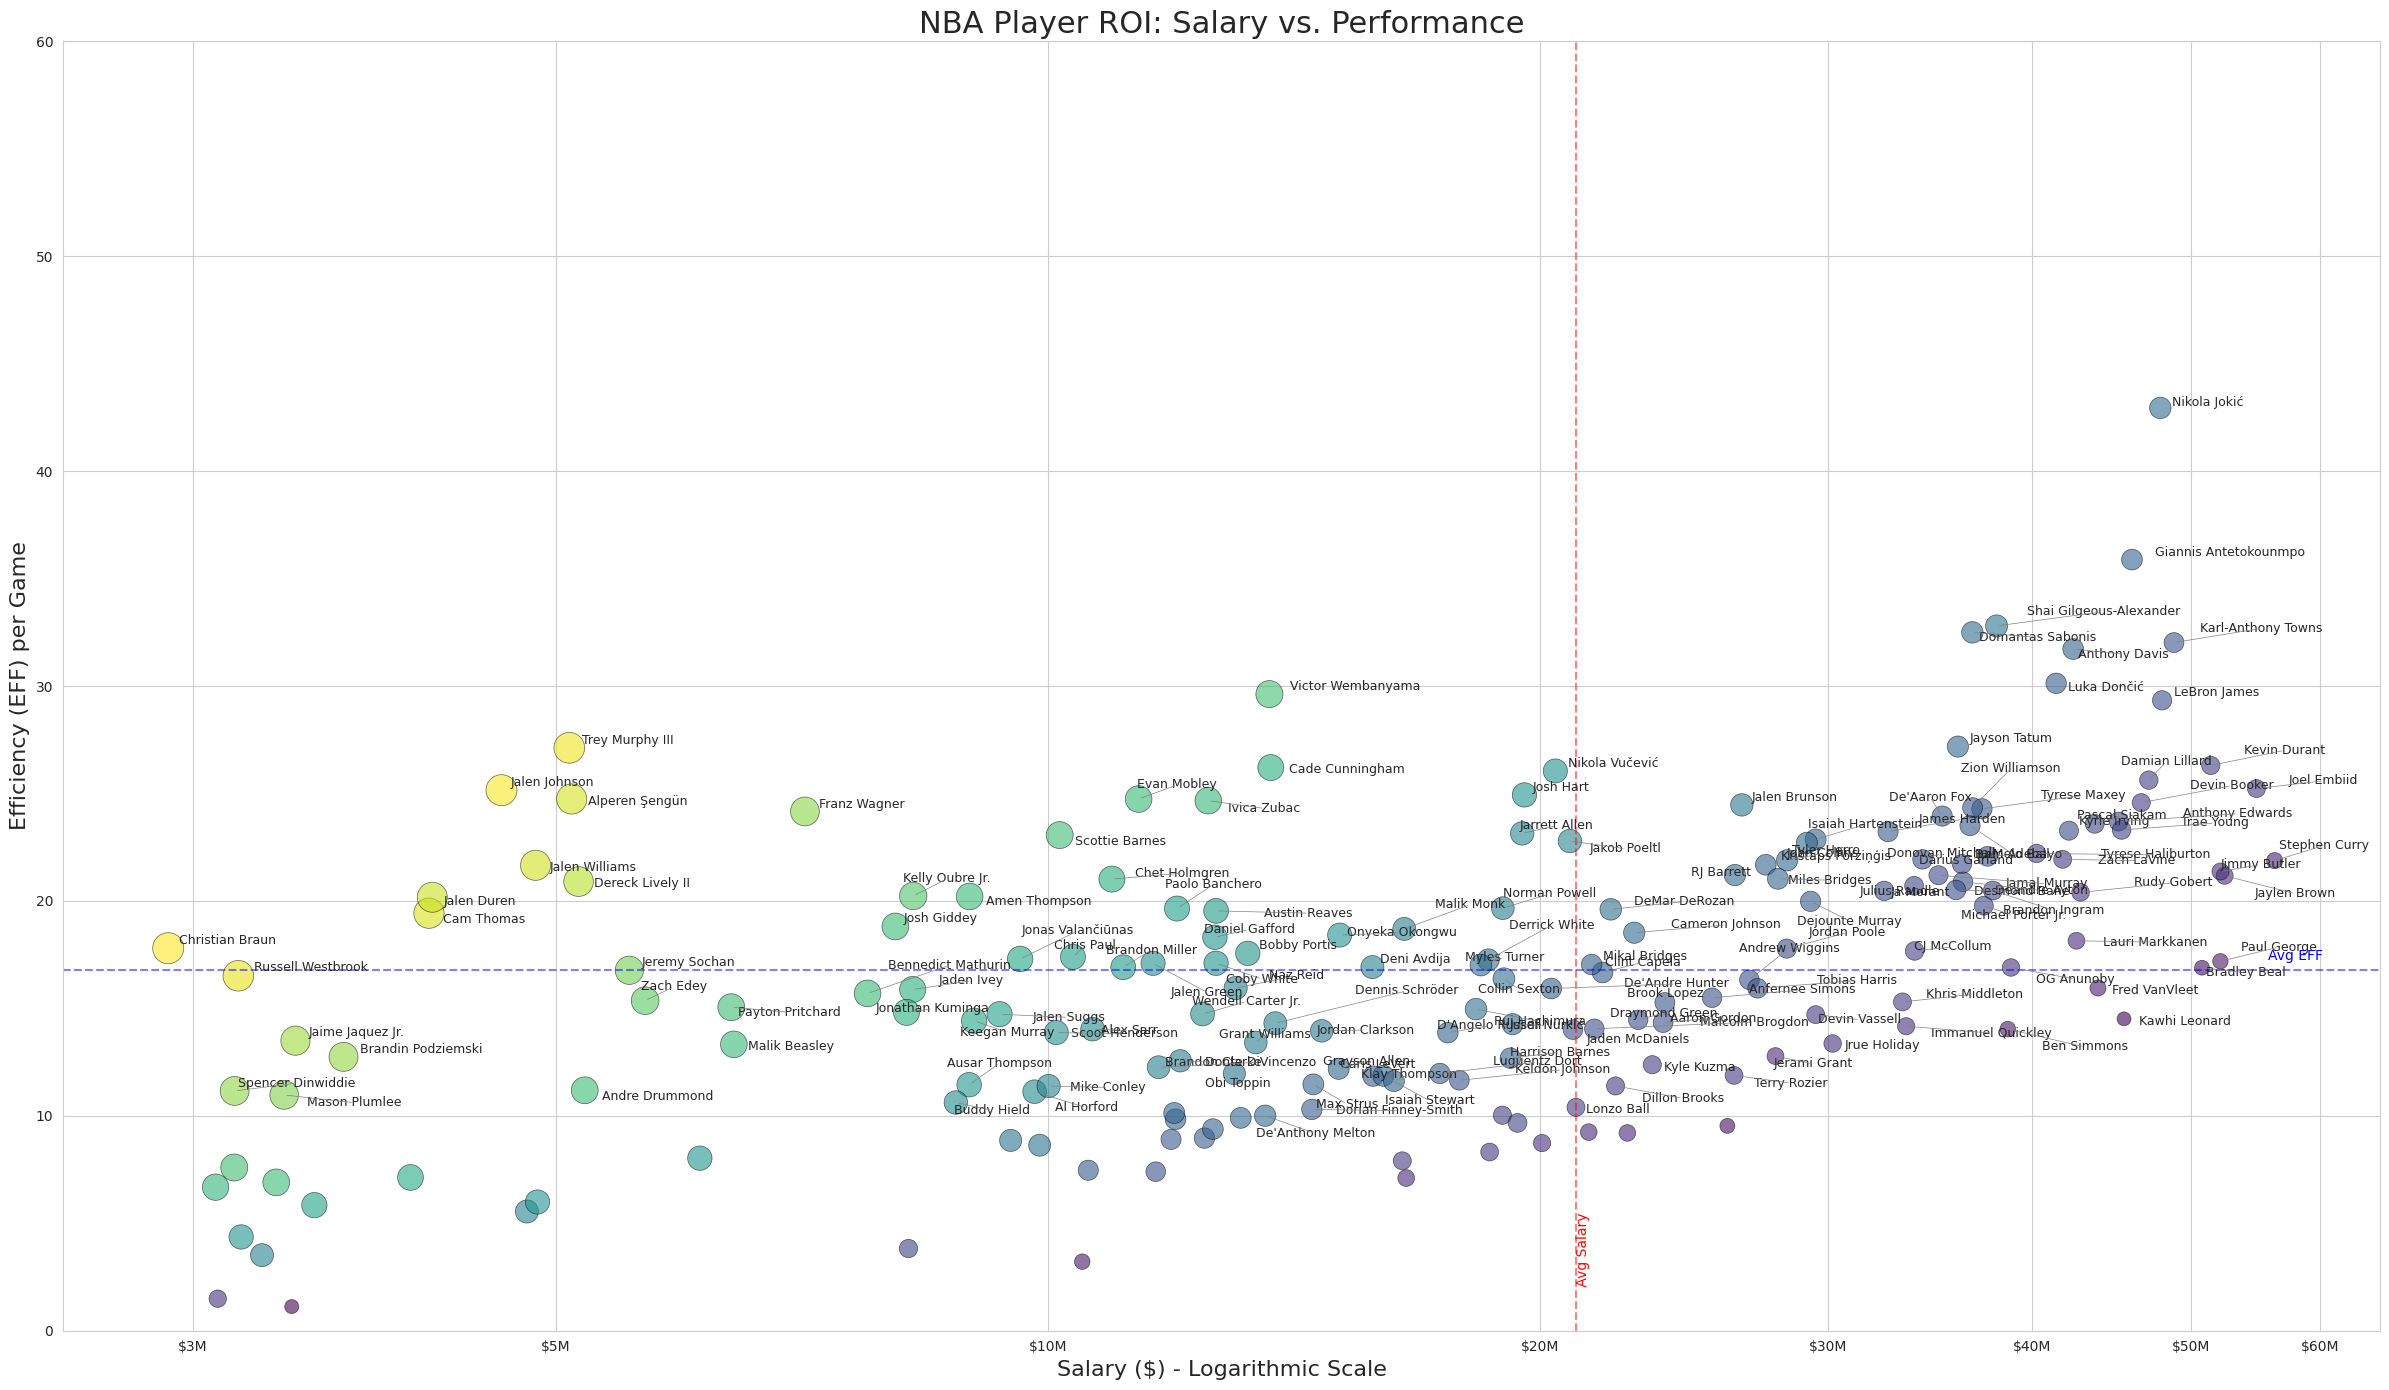

In [8]:
# =========================================
# 0. IMPORTS & SETUP
# =========================================
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.ticker as ticker

# =========================================
# 1. DEFINE DATA
# =========================================
# (Your CSV content remains exactly the same as above)
csv_content = """Rank,Player,Salary
1,Stephen Curry,55761217
2,Nikola Jokić,51415938
2,Joel Embiid,51415938
4,Kevin Durant,51179020
5,Bradley Beal,50203930
6,Karl-Anthony Towns,49205800
6,Paul George,49205800
6,Kawhi Leonard,49205800
6,Jaylen Brown,49205800
6,Devin Booker,49205800
11,Jimmy Butler,48798677
12,Damian Lillard,48787676
12,Giannis Antetokounmpo,48787676
14,LeBron James,48728845
15,Zach LaVine,44531940
16,Rudy Gobert,43827586
17,Anthony Davis,43219440
18,Luka Dončić,43031940
18,Trae Young,43031940
20,Fred VanVleet,42846615
21,Pascal Siakam,42176400
21,Lauri Markkanen,42176400
21,Tyrese Haliburton,42176400
21,Anthony Edwards,42176400
25,Kyrie Irving,40000000
26,Ben Simmons,39256083
27,Domantas Sabonis,39200000
28,Zion Williamson,36725670
28,Ja Morant,36725670
28,Darius Garland,36725670
31,OG Anunoby,36637932
32,Brandon Ingram,36016200
32,Jamal Murray,36016200
34,Shai Gilgeous-Alexander,35859950
34,Michael Porter Jr.,35859950
36,Donovan Mitchell,35410310
37,LaMelo Ball,35147000
37,Tyrese Maxey,35147000
39,De'Aaron Fox,34848340
39,Jayson Tatum,34848340
39,Bam Adebayo,34848340
42,Desmond Bane,34005250
43,Deandre Ayton,34005126
44,James Harden,33653846
45,CJ McCollum,33333333
46,Julius Randle,33073920
47,Immanuel Quickley,32500000
48,Khris Middleton,31000000
49,Isaiah Hartenstein,30000000
49,Jrue Holiday,30000000
51,Jerami Grant,29793104
52,Jordan Poole,29651786
53,Devin Vassell,29347826
54,Kristaps Porzingis,29268293
55,Tyler Herro,29000000
56,Dejounte Murray,28817135
57,Jonathan Isaac,27600000
58,Nicolas Claxton,27556817
59,Miles Bridges,27173913
60,John Collins,26580000
61,Andrew Wiggins,26276786
62,Anfernee Simons,25892857
63,RJ Barrett,25794643
64,Tobias Harris,25365854
65,Jaren Jackson Jr,25257798
66,Jalen Brunson,24960001
67,Terry Rozier,24924126
68,Kyle Kuzma,24456060
69,Draymond Green,24107143
70,DeMar DeRozan,23400000
71,Mikal Bridges,23300000
72,Dillon Brooks,23255493
73,Cameron Johnson,23062500
74,Bruce Brown,23000000
74,Brook Lopez,23000000
76,Aaron Gordon,22841455
77,Kentavious Caldwell-Pope,22757000
78,Jaden McDaniels,22586207
79,Malcolm Brogdon,22500000
80,Clint Capela,22265280
81,De'Andre Hunter,21696429
82,Lonzo Ball,21395348
83,Marcus Smart,20210285
84,Nikola Vucevic,20000000
84,Jarrett Allen,20000000
86,Myles Turner,19928500
87,Derrick White,19821429
88,Jakob Poeltl,19500000
89,Duncan Robinson,19406000
90,Norman Powell,19241379
91,Bojan Bogdanovic,19032850
92,Keldon Johnson,19000000
93,D'Angelo Russell,18692307
94,Collin Sexton,18150000
95,Josh Hart,18144000
96,Jusuf Nurkic,18125000
97,Harrison Barnes,18000000
97,Patrick Williams,18000000
99,Malik Monk,17405203
100,Bogdan Bogdanovic,17260000
101,Rui Hachimura,17000000
101,Luguentz Dort,17000000
103,Kevin Huerter,16830357
104,Zach Collins,16741200
105,Caris LeVert,16615384
106,Tim Hardaway Jr,16193183
107,Klay Thompson,15873016
108,Deni Avdija,15625000
108,Grayson Allen,15625000
110,PJ Washington,15500000
111,Max Strus,15212068
112,Isaiah Stewart,15000000
113,Dorian Finney-Smith,14924167
114,Mitchell Robinson,14318182
115,Jordan Clarkson,14092577
116,Onyeka Okongwu,14000000
117,Naz Reid,13986432
118,Cade Cunningham,13940809
119,Daniel Gafford,13394160
120,Dennis Schroeder,13025250
120,Grant Williams,13025250
122,Isaiah Joe,12991650
123,Herb Jones,12976362
123,Austin Reaves,12976362
125,Obi Toppin,12975000
126,Cole Anthony,12900000
127,De'Anthony Melton,12822000
128,Kelly Olynyk,12804878
129,Victor Wembanyama,12768664
130,Josh Green,12654321
131,Richaun Holmes,12648321
132,Steven Adams,12600000
133,Bobby Portis,12578286
134,Zaccharie Risacher,12569040
135,Marvin Bagley III,12500000
135,Brandon Clarke,12500000
137,Jalen Green,12483048
138,Robert Williams III,12428571
139,Paolo Banchero,12160800
140,Coby White,12000000
141,Wendell Carter Jr.,11950000
142,Ivica Zubac,11743210
143,PJ Tucker,11539000
144,Donte DiVincenzo,11445000
145,Brandon Miller,11424382
146,Terance Mann,11423077
147,Alex Sarr,11245680
148,Evan Mobley,11227657
149,Larry Nance Jr,11205000
150,Matisse Thybulle,11025000"""

additional_csv_content = """155,Chris Paul,10983000
157,Chet Holmgren,10880640
160,Scoot Henderson,10259449
162,Scottie Barnes,10130980
163,Reed Sheppard,10098960
164,Mike Conley,9975962
165,Jonas Valanciunas,9900000
166,Alex Caruso,9890000
167,Jabari Smith Jr.,9770880
169,Al Horford,9500000
174,Amen Thompson,9249748
175,Jalen Suggs,9188385
177,Gary Payton II,9130000
182,Keegan Murray,8809560
183,Buddy Hield,8780488
188,Ausar Thompson,8376291
189,Josh Giddey,8352367
193,Jeff Green,8000000
195,Kelly Oubre Jr.,7983000
196,Jaden Ivey,7977240
200,Jonathan Kuminga,7636307
205,Bennedict Mathurin,7245720
207,Franz Wagner,7007092
211,Payton Pritchard,6696429
223,Malik Beasley,6000000
227,Moses Moody,5803269
228,Zach Edey,5756880
230,Jeremy Sochan,5570040
233,Alperen Sengun,5424654
239,Dario Saric,5168000
241,Trey Murphy III,5159854
243,Dereck Lively II,5014409
244,Andre Drummond,5000000
249,Jalen Williams,4775760
254,Nicolas Batum,4668000
256,Jalen Duren,4536840
258,Jalen Johnson,4510905
269,Cam Thomas,4041249
278,Kevin Love,3850000
281,Jaime Jaquez Jr.,3685800
283,Brandin Podziemski,3519960
292,Reggie Jackson,3303771
292,Markieff Morris,3303771
292,Patty Mills,3303771
292,Russell Westbrook,3303771
292,Spencer Dinwiddie,3303771
292,Seth Curry,3303771
292,Kyle Lowry,3303771
292,Joe Ingles,3303771
292,Mason Plumlee,3303771
292,DeAndre Jordan,3303771
292,Eric Gordon,3303771
313,Christian Braun,3089640
317,Christian Wood,3036040"""

full_csv_content = csv_content + "\n" + additional_csv_content

# =========================================
# 2. PROCESSING & MERGING
# =========================================
salary_df = pd.read_csv(io.StringIO(full_csv_content))
NBA_df = pd.read_csv('/content/database_24_25.csv')

# Group and Stats calculation
season_stats = NBA_df.groupby('Player').mean(numeric_only=True).reset_index()
games_played = NBA_df.groupby('Player')['PTS'].count().reset_index()
games_played.rename(columns={'PTS': 'GP'}, inplace=True)
season_stats = pd.merge(season_stats, games_played, on='Player')

pts = season_stats['PTS']
ast = season_stats['AST']
stl = season_stats['STL']
blk = season_stats['BLK']
tov = season_stats['TOV']
trb = season_stats.get('TRB', season_stats.get('REB'))

missed_fg = season_stats['FGA'] - season_stats['FG']
missed_ft = season_stats['FTA'] - season_stats['FT']
season_stats['EFF'] = (pts + trb + ast + stl + blk) - missed_fg - missed_ft - tov

# Name corrections
salary_df['Player'] = salary_df['Player'].str.strip()
season_stats['Player'] = season_stats['Player'].str.strip()
salary_df['Player'] = salary_df['Player'].replace({
    'Nikola Jokic': 'Nikola Jokić',
    'Luka Doncic': 'Luka Dončić',
    'Kristaps Porzingis': 'Kristaps Porziņģis',
    'Alperen Sengun': 'Alperen Şengün',
    'Franz Wagner': 'Franz Wagner',
    'Jusuf Nurkic': 'Jusuf Nurkić',
    'Bogdan Bogdanovic': 'Bogdan Bogdanović',
    'Bojan Bogdanovic': 'Bojan Bogdanović',
    'Nikola Vucevic': 'Nikola Vučević',
    'Jonas Valanciunas': 'Jonas Valančiūnas',
    'Dario Saric': 'Dario Šarić',
    'Vasilije Micic': 'Vasilije Micić',
    'Santi Aldama': 'Santi Aldama',
    'Nicolas Batum': 'Nicolas Batum',
    'Dennis Schroeder': 'Dennis Schröder'
})

# Merge and calculate ROI
full_data = pd.merge(season_stats, salary_df, on='Player', how='left')
full_data['ROI'] = np.log(full_data['EFF']/full_data['Salary'])
plot_data = full_data.dropna(subset=['ROI', 'Salary', 'EFF'])
plot_data = plot_data[plot_data['GP'] > 5]

# =========================================
# 3. ADD JITTER & PLOT
# =========================================

# --- KEY CHANGE: Add Jitter ---
# We create new columns specifically for plotting.
# This adds random noise to X (salary) and Y (EFF) to prevent overlaps.
jitter_strength_x = 0.08  # Adjust this (0.01 to 0.1) for horizontal spread
jitter_strength_y = 0.5   # Adjust this (0.1 to 1.0) for vertical spread

# Since Salary is log scale, we multiply by a random factor rather than adding fixed noise
# Generate random noise centered around 1.0 (e.g., 0.95 to 1.05)
noise_x = np.random.uniform(1 - jitter_strength_x, 1 + jitter_strength_x, len(plot_data))
plot_data['Salary_Jittered'] = plot_data['Salary'] * noise_x

# For EFF (linear scale), we just add random noise
noise_y = np.random.uniform(-jitter_strength_y, jitter_strength_y, len(plot_data))
plot_data['EFF_Jittered'] = plot_data['EFF'] + noise_y
# ------------------------------

plt.figure(figsize=(24, 14))
sns.set_style("whitegrid")

# Plot using the JITTERED columns
scatter = sns.scatterplot(
    data=plot_data,
    x='Salary_Jittered',
    y='EFF_Jittered',
    hue='ROI',
    size='ROI',
    sizes=(100, 500), # Even bigger dots
    palette='viridis',
    alpha=0.6,        # Slightly more transparent to see overlaps
    legend=False,
    edgecolor='black', # Add outline to dots for clarity
    linewidth=0.5
)

plt.xscale('log')
scatter.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000000:.0f}M'))
# Adjust ticks to match the jittered range if needed
plt.xticks([3000000, 5000000, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000])

# Annotate using the JITTERED coordinates so text aligns with dots
texts = []
for i, row in plot_data.iterrows():
    if row['EFF'] > 10: # Only label relevant players
        texts.append(plt.text(row['Salary_Jittered'], row['EFF_Jittered'], row['Player'], fontsize=9, weight='normal'))

# Increase 'repel' force
adjust_text(texts,
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
            expand_points=(2.5, 2.5),
            force_text=(1.5, 3.0),
            force_points=(1.0, 1.5)
           )

plt.title('NBA Player ROI: Salary vs. Performance', fontsize=22)
plt.xlabel('Salary ($) - Logarithmic Scale', fontsize=16)
plt.ylabel('Efficiency (EFF) per Game', fontsize=16)
plt.ylim(0, 60)

# Reference lines still use the REAL means, not jittered ones
plt.axvline(x=plot_data['Salary'].mean(), color='red', linestyle='--', alpha=0.5)
plt.text(plot_data['Salary'].mean(), 2, ' Avg Salary', color='red', rotation=90)

plt.axhline(y=plot_data['EFF'].mean(), color='blue', linestyle='--', alpha=0.5)
plt.text(plot_data['Salary'].max(), plot_data['EFF'].mean() + 0.5, 'Avg EFF', color='blue')

plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np
import unicodedata
from functools import reduce
from sklearn.linear_model import LinearRegression

# ==========================================
# 1. SETUP & DATA LOADING
# ==========================================
files = [
    "2022-2023 NBA Player Stats - Regular.csv",
    "database_csv 2.csv",
    "database_24_25.csv"
]

dataframes = []

print("--- 1. Loading & Cleaning Data ---")

for filename in files:
    try:
        # Load File (Try standard comma first, with Latin-1 to avoid initial errors)
        df = pd.read_csv(filename, encoding='latin-1')

        # FIX: Check for semicolon delimiter (common in the 2022 file)
        if len(df.columns) < 2:
            df = pd.read_csv(filename, sep=';', encoding='latin-1')

        # Standardize Columns
        df.columns = df.columns.str.strip()

        # Find 'Player' column (case-insensitive)
        player_col = next((c for c in df.columns if c.lower() == 'player'), None)

        if player_col:
            df.rename(columns={player_col: 'Player'}, inplace=True)

            # Identify numeric columns to average
            numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

            # Group by Player (Handles traded players by averaging their stints)
            df_avg = df.groupby('Player')[numeric_cols].mean().reset_index()

            # Assign Suffix based on filename to track years
            if "2022" in filename: suffix = "_22_23"
            elif "csv 2" in filename: suffix = "_23_24"
            elif "24_25" in filename: suffix = "_24_25"
            else: suffix = "_" + filename.split('.')[0].replace(" ", "_")

            # Add suffix to all columns except Player
            df_avg = df_avg.add_suffix(suffix)
            df_avg.rename(columns={f"Player{suffix}": "Player"}, inplace=True)

            dataframes.append(df_avg)
            print(f"✅ Loaded: {filename} (Suffix: {suffix})")
        else:
            print(f"❌ Skipped {filename}: 'Player' column not found.")

    except Exception as e:
        print(f"❌ Error reading {filename}: {e}")

# Merge the 3 years into one master dataframe
if len(dataframes) >= 2:
    final_df = reduce(lambda left, right: pd.merge(left, right, on='Player', how='outer'), dataframes)
    print(f"Merged History: {len(final_df)} unique players.")
else:
    print("❌ Error: Not enough files loaded to merge.")
    exit()

# ==========================================
# 2. CALCULATE HISTORICAL EFFICIENCY (EFF)
# ==========================================
print("\n--- 2. Calculating Historical Efficiency ---")

years = ["_22_23", "_23_24", "_24_25"]

for yr in years:
    try:
        # Check if required columns exist for this year
        required = [f"PTS{yr}", f"TRB{yr}", f"AST{yr}", f"STL{yr}", f"BLK{yr}", f"TOV{yr}"]
        if all(col in final_df.columns for col in required):

            # Handle missed shots columns: (FGA - FG) and (FTA - FT)
            missed_fg = final_df[f"FGA{yr}"] - final_df[f"FG{yr}"]
            missed_ft = final_df[f"FTA{yr}"] - final_df[f"FT{yr}"]

            # NBA Efficiency Formula
            final_df[f"EFF{yr}"] = (
                final_df[f"PTS{yr}"] + final_df[f"TRB{yr}"] + final_df[f"AST{yr}"] +
                final_df[f"STL{yr}"] + final_df[f"BLK{yr}"] -
                missed_fg - missed_ft - final_df[f"TOV{yr}"]
            )
        else:
            print(f"⚠️ Warning: Missing stats for year {yr}, cannot calculate EFF.")

    except KeyError as e:
        print(f"⚠️ Error calculating EFF for {yr}: {e}")

# ==========================================
# 3. TRAIN MODEL & PREDICT 25-26
# ==========================================
print("\n--- 3. Training & Predicting 25-26 EFF ---")

# Step A: Prepare Training Data (We need rows with ALL 3 years of EFF data)
train_cols = [f"EFF{years[0]}", f"EFF{years[1]}", f"EFF{years[2]}"]
train_df = final_df.dropna(subset=train_cols)

if not train_df.empty:
    # Model: Input = Year 1 & Year 2 ---> Target = Year 3
    X_train = train_df[[f"EFF{years[0]}", f"EFF{years[1]}"]]
    y_train = train_df[f"EFF{years[2]}"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f"Model trained on {len(train_df)} players.")

    # Step B: Prepare Prediction Input (We need rows with Year 2 & Year 3 data)
    pred_cols = [f"EFF{years[1]}", f"EFF{years[2]}"]
    pred_input = final_df.dropna(subset=pred_cols).copy()

    # Select the inputs
    X_next = pred_input[pred_cols]

    # Rename columns to match Training Inputs so the model accepts them
    X_next.columns = [f"EFF{years[0]}", f"EFF{years[1]}"]

    # Predict
    pred_input['EFF_Proj_25_26'] = model.predict(X_next)

    # Create the clean output dataframe
    projections = pred_input[['Player', 'EFF_Proj_25_26']].copy()

    # ==========================================
    # 4. FIX NAMES (MOJIBAKE CORRECTION)
    # ==========================================
    # This fixes "Nikola JokiÄ‡" -> "Nikola Jokić"
    def fix_mojibake(name):
        if not isinstance(name, str):
            return name
        try:
            # Reverse the "Latin-1 read as UTF-8" error
            return name.encode('latin-1').decode('utf-8')
        except (UnicodeEncodeError, UnicodeDecodeError):
            return name

    projections['Player'] = projections['Player'].apply(fix_mojibake)

    print(f"✅ Prediction Successful! Generated projections for {len(projections)} players.")
    print("--- Top 5 Projected Players (Corrected Names) ---")
    print(projections.sort_values('EFF_Proj_25_26', ascending=False).head(5))

else:
    print("❌ Error: Not enough historical data (players with 3 full years) to train the model.")

--- 1. Loading & Cleaning Data ---
✅ Loaded: 2022-2023 NBA Player Stats - Regular.csv (Suffix: _22_23)
✅ Loaded: database_csv 2.csv (Suffix: _23_24)
✅ Loaded: database_24_25.csv (Suffix: _24_25)
Merged History: 816 unique players.

--- 2. Calculating Historical Efficiency ---

--- 3. Training & Predicting 25-26 EFF ---
Model trained on 317 players.
✅ Prediction Successful! Generated projections for 428 players.
--- Top 5 Projected Players (Corrected Names) ---
                      Player  EFF_Proj_25_26
603             Nikola Jokić       39.173545
255    Giannis Antetokounmpo       33.313725
697  Shai Gilgeous-Alexander       30.535479
206         Domantas Sabonis       30.416335
40             Anthony Davis       29.901683


✅ Successfully processed 248 players.
--- Top 5 Value Players ---
              Player_x   Tm  Salary_Percent  EFF_Proj_25_26  ROI_Score
49     Christian Braun  DEN        0.016453       14.905028   2.203763
125      Jalen Johnson  ATL        0.024755       21.652496   2.168695
243  Russell Westbrook  DEN        0.017594       14.858294   2.133613
242  Russell Westbrook  DEN        0.017594       14.858294   2.133613
241  Russell Westbrook  DEN        0.017594       14.858294   2.133613

Plot saved as 'nba_roi_percent_cap_all_annotated.png'


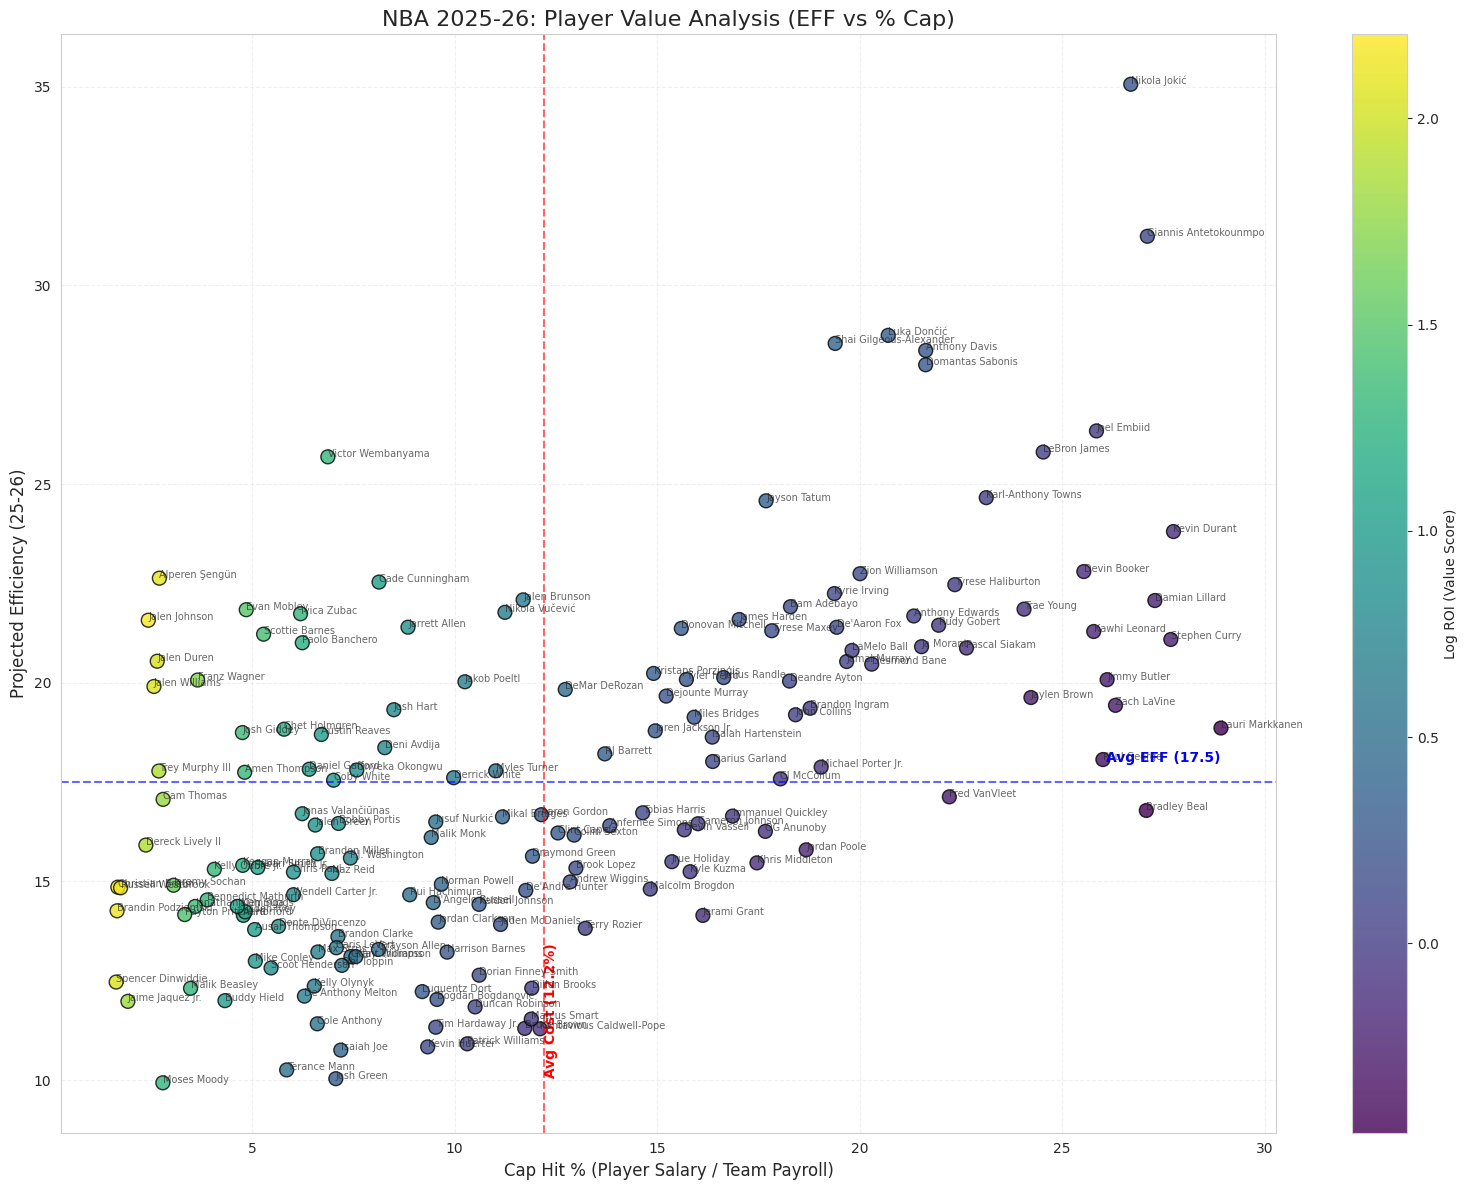

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import io
from functools import reduce
from sklearn.linear_model import LinearRegression

# ==========================================
# 1. PASTE YOUR CSV CONTENT HERE
# ==========================================

# A. HISTORICAL STATS (Paste the full CSV content inside the quotes)
csv_22_23 = """
Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
1,Joel Embiid,28,PHI,C,66,66,34.6,11.0,20.1,.548,1.0,3.0,.330,10.0,17.1,.587,.573,10.0,11.7,.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,MVP-1DPOY-9CPOY-5ASNBA1,embiijo01
2,Luka Dončić,23,DAL,PG,66,66,36.2,10.9,22.0,.496,2.8,8.2,.342,8.1,13.8,.588,.560,7.8,10.5,.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,MVP-8CPOY-8ASNBA1,doncilu01
3,Damian Lillard,32,POR,PG,58,58,36.3,9.6,20.7,.463,4.2,11.3,.371,5.4,9.4,.574,.564,8.8,9.6,.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,CPOY-10ASNBA3,lillada01
4,Shai Gilgeous-Alexander,24,OKC,PG,68,68,35.5,10.4,20.3,.510,0.9,2.5,.345,9.5,17.8,.533,.531,9.8,10.9,.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,MVP-5CPOY-7ASNBA1,gilgesh01
5,Giannis Antetokounmpo,28,MIL,PF,63,63,32.1,11.2,20.3,.553,0.7,2.7,.275,10.5,17.6,.596,.572,7.9,12.3,.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,MVP-3DPOY-6ASNBA1,antetgi01
6,Jayson Tatum,24,BOS,SF,74,74,36.9,9.8,21.1,.466,3.2,9.3,.350,6.6,11.8,.558,.543,7.2,8.4,.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,MVP-4CPOY-10ASNBA1,tatumja01
7,Stephen Curry,34,GSW,PG,56,56,34.7,10.0,20.2,.493,4.9,11.4,.427,5.1,8.8,.579,.614,4.6,5.0,.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,MVP-9CPOY-9ASNBA2,curryst01
8,Kevin Durant,34,2TM,PF,47,47,35.6,10.3,18.3,.560,2.0,4.9,.404,8.3,13.4,.617,.614,6.5,7.1,.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,AS,duranke01
8,Kevin Durant,34,BRK,PF,39,39,36.0,10.5,18.8,.559,1.8,4.8,.376,8.7,14.0,.622,.607,6.8,7.3,.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,,duranke01
8,Kevin Durant,34,PHO,PF,8,8,33.6,9.1,16.0,.570,2.8,5.1,.537,6.4,10.9,.586,.656,5.0,6.0,.833,0.4,6.0,6.4,3.5,0.3,1.3,2.5,0.9,26.0,,duranke01
9,LeBron James,38,LAL,PF,55,54,35.5,11.1,22.2,.500,2.2,6.9,.321,8.9,15.3,.580,.549,4.6,5.9,.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,ASNBA3,jamesle01
10,Donovan Mitchell,26,CLE,SG,68,68,35.8,10.0,20.6,.484,3.6,9.3,.386,6.4,11.3,.566,.572,4.7,5.4,.867,0.9,3.3,4.3,4.4,1.5,0.4,2.6,2.5,28.3,MVP-6CPOY-6ASNBA2,mitchdo01
11,Devin Booker,26,PHO,SG,53,53,34.6,9.9,20.1,.494,2.1,6.0,.351,7.8,14.2,.554,.546,5.8,6.8,.855,0.9,3.7,4.5,5.5,1.0,0.3,2.7,3.0,27.8,,bookede01
12,Kyrie Irving,30,2TM,SG,60,60,37.4,9.9,20.1,.494,3.1,8.3,.379,6.8,11.8,.574,.572,4.1,4.6,.905,1.0,4.1,5.1,5.5,1.1,0.8,2.1,2.8,27.1,CPOY-12AS,irvinky01
12,Kyrie Irving,30,BRK,PG,40,40,37.0,10.0,20.5,.486,3.3,8.7,.374,6.7,11.8,.569,.565,4.0,4.5,.883,1.0,4.2,5.1,5.3,1.0,0.8,2.3,2.7,27.1,,irvinky01
12,Kyrie Irving,30,DAL,SG,20,20,38.2,9.8,19.2,.510,2.9,7.4,.392,6.9,11.8,.585,.586,4.5,4.7,.947,1.1,4.0,5.0,6.0,1.3,0.6,1.9,2.8,27.0,,irvinky01
13,Jaylen Brown,26,BOS,SF,67,67,35.9,10.1,20.6,.491,2.4,7.3,.335,7.7,13.4,.576,.550,3.9,5.1,.765,1.2,5.7,6.9,3.5,1.1,0.4,2.9,2.6,26.6,ASNBA2,brownja02
14,Ja Morant,23,MEM,PG,61,59,31.9,9.3,19.9,.466,1.5,4.9,.307,7.8,15.0,.519,.504,6.1,8.1,.748,1.0,4.9,5.9,8.1,1.1,0.3,3.4,1.6,26.2,MVP-12AS,moranja01
15,Trae Young,24,ATL,PG,73,73,34.8,8.2,19.0,.429,2.1,6.3,.335,6.1,12.7,.476,.485,7.8,8.8,.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,,youngtr01
16,Zion Williamson,22,NOP,PF,29,29,33.0,9.8,16.2,.608,0.2,0.7,.368,9.6,15.5,.618,.615,6.1,8.6,.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0,AS,willizi01
17,Anthony Davis,29,LAL,C,56,54,34.0,9.7,17.2,.563,0.3,1.3,.257,9.3,15.9,.589,.573,6.2,7.9,.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9,,davisan02
18,Lauri Markkanen,25,UTA,PF,66,66,34.4,8.7,17.3,.499,3.0,7.7,.391,5.6,9.6,.585,.586,5.3,6.0,.875,2.0,6.7,8.6,1.9,0.6,0.6,1.9,2.1,25.6,MIP-1AS,markkla01
19,Julius Randle,28,NYK,PF,77,77,35.5,8.5,18.6,.459,2.8,8.3,.343,5.7,10.3,.553,.536,5.2,6.9,.757,1.8,8.1,10.0,4.1,0.6,0.3,2.8,3.0,25.1,CPOY-14ASNBA3,randlju01
20,De'Aaron Fox,25,SAC,PG,73,73,33.4,9.3,18.2,.512,1.6,5.0,.324,7.7,13.2,.584,.557,4.7,6.0,.780,0.5,3.6,4.2,6.1,1.1,0.3,2.5,2.4,25.0,MVP-11CPOY-1ASNBA3,foxde01
21,Zach LaVine,27,CHI,SG,77,77,35.9,8.7,18.0,.485,2.6,7.1,.375,6.1,11.0,.556,.558,4.7,5.6,.848,0.5,3.9,4.5,4.2,0.9,0.2,2.5,2.1,24.8,,lavinza01
22,Brandon Ingram,25,NOP,SF,45,45,34.2,9.0,18.6,.484,1.4,3.6,.390,7.6,14.9,.507,.522,5.3,6.0,.882,0.5,5.0,5.5,5.8,0.7,0.4,3.3,2.6,24.7,,ingrabr01
23,Anthony Edwards,21,MIN,SG,79,79,36.0,8.9,19.5,.459,2.7,7.3,.369,6.3,12.2,.513,.528,4.0,5.3,.756,0.6,5.2,5.8,4.4,1.6,0.7,3.3,2.4,24.6,AS,edwaran01
24,DeMar DeRozan,33,CHI,SF,74,74,36.2,8.9,17.6,.504,0.6,1.9,.324,8.3,15.7,.526,.522,6.2,7.1,.872,0.5,4.2,4.6,5.1,1.1,0.5,2.1,2.5,24.5,CPOY-3AS,derozde01
25,Nikola Jokić,27,DEN,C,69,69,33.7,9.4,14.8,.632,0.8,2.2,.383,8.5,12.7,.675,.660,4.9,6.0,.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,MVP-2CPOY-13ASNBA2,jokicni01
26,Pascal Siakam,28,TOR,PF,71,71,37.4,8.9,18.5,.480,1.3,4.0,.324,7.6,14.5,.523,.515,5.2,6.7,.774,1.8,6.0,7.8,5.8,0.9,0.5,2.4,3.2,24.2,AS,siakapa01
27,Jalen Brunson,26,NYK,PG,68,68,35.0,8.6,17.6,.491,2.0,4.7,.416,6.7,12.8,.519,.547,4.8,5.8,.829,0.6,3.0,3.5,6.2,0.9,0.2,2.1,2.2,24.0,MVP-12CPOY-4,brunsja01
28,Paul George,32,LAC,SF,56,56,34.6,8.2,17.9,.457,2.8,7.6,.371,5.4,10.3,.521,.536,4.6,5.3,.871,0.8,5.3,6.1,5.1,1.5,0.4,3.1,2.8,23.8,AS,georgpa01
29,Kawhi Leonard,31,LAC,SF,52,50,33.6,8.6,16.8,.512,2.0,4.8,.416,6.6,11.9,.551,.572,4.7,5.4,.871,1.1,5.4,6.5,3.9,1.4,0.5,1.7,1.6,23.8,,leonaka01
30,LaMelo Ball,21,CHO,PG,36,36,35.2,8.2,20.0,.411,4.0,10.6,.376,4.2,9.4,.450,.510,2.8,3.4,.836,1.2,5.3,6.4,8.4,1.3,0.3,3.6,3.3,23.3,,ballla01
31,Bradley Beal,29,WAS,SG,50,50,33.5,8.9,17.6,.506,1.6,4.4,.365,7.3,13.2,.552,.551,3.8,4.6,.842,0.8,3.1,3.9,5.4,0.9,0.7,2.9,2.1,23.2,,bealbr01
32,Kristaps Porziņģis,27,WAS,C,65,65,32.6,7.8,15.7,.498,2.1,5.5,.385,5.7,10.2,.559,.565,5.4,6.4,.851,1.8,6.6,8.4,2.7,0.9,1.5,2.1,3.0,23.2,,porzikr01
33,Jimmy Butler,33,MIA,PF,64,64,33.4,7.5,13.9,.539,0.6,1.6,.350,6.9,12.3,.564,.560,7.4,8.7,.850,2.2,3.7,5.9,5.3,1.8,0.3,1.6,1.3,22.9,MVP-10DPOY-12CPOY-2NBA2,butleji01
34,Jalen Green,20,HOU,SG,76,76,34.2,7.4,17.9,.416,2.5,7.3,.338,5.0,10.6,.471,.485,4.8,6.1,.786,0.6,3.2,3.7,3.7,0.8,0.2,2.6,1.7,22.1,,greenja05
35,Keldon Johnson,23,SAS,SF,63,63,32.7,8.0,17.7,.452,2.1,6.5,.329,5.9,11.2,.523,.512,3.9,5.2,.749,0.9,4.2,5.0,2.9,0.7,0.2,2.1,2.0,22.0,,johnske04
36,Klay Thompson,32,GSW,SF,69,69,33.0,7.9,18.1,.436,4.4,10.6,.412,3.6,7.6,.470,.556,1.7,1.9,.879,0.6,3.6,4.1,2.4,0.7,0.4,1.8,1.9,21.9,,thompkl01
37,Bojan Bogdanović,33,DET,PF,59,59,32.1,7.3,14.9,.488,2.5,6.0,.411,4.8,9.0,.539,.570,4.5,5.1,.884,0.6,3.2,3.8,2.6,0.6,0.1,2.3,1.9,21.6,,bogdabo02
38,Darius Garland,23,CLE,PG,69,69,35.5,7.6,16.4,.462,2.4,6.0,.410,5.1,10.4,.492,.537,4.0,4.7,.863,0.4,2.3,2.7,7.8,1.2,0.1,2.9,2.1,21.6,,garlada01
39,Desmond Bane,24,MEM,SG,58,58,31.7,7.8,16.2,.479,2.9,7.0,.408,4.9,9.2,.534,.568,3.1,3.5,.883,0.7,4.3,5.0,4.4,1.0,0.4,2.2,2.6,21.5,,banede01
40,Kyle Kuzma,27,WAS,PF,64,64,35.0,8.0,17.8,.448,2.5,7.5,.333,5.5,10.3,.533,.518,2.7,3.7,.730,0.9,6.4,7.2,3.7,0.6,0.5,3.0,2.3,21.2,,kuzmaky01
41,Terry Rozier,28,CHO,SG,63,63,35.3,7.8,18.9,.415,2.6,8.0,.327,5.2,10.8,.480,.484,2.8,3.5,.809,0.8,3.3,4.1,5.1,1.2,0.3,2.1,1.9,21.1,,roziete01
42,Anfernee Simons,23,POR,SG,62,62,35.0,7.5,16.9,.447,3.4,9.1,.377,4.1,7.8,.528,.548,2.6,2.9,.894,0.3,2.3,2.6,4.1,0.7,0.2,2.1,2.3,21.1,,simonan01
43,James Harden,33,PHI,PG,58,58,36.8,6.4,14.5,.441,2.8,7.2,.385,3.6,7.3,.495,.536,5.4,6.2,.867,0.7,5.4,6.1,10.7,1.2,0.5,3.4,1.9,21.0,,hardeja01
44,CJ McCollum,31,NOP,PG,75,75,35.3,7.8,17.9,.437,2.8,7.2,.389,5.0,10.7,.469,.515,2.4,3.2,.769,0.7,3.6,4.4,5.7,0.9,0.5,2.4,2.0,20.9,,mccolcj01
45,Jordan Clarkson,30,UTA,SG,61,61,32.6,7.5,16.9,.444,2.5,7.5,.338,5.0,9.4,.530,.519,3.3,4.0,.816,1.2,2.9,4.0,4.4,0.5,0.2,3.0,2.0,20.8,,clarkjo01
46,Karl-Anthony Towns,27,MIN,PF,29,29,33.0,7.3,14.8,.495,2.1,5.7,.366,5.2,9.1,.576,.565,4.1,4.7,.874,1.7,6.5,8.1,4.8,0.7,0.6,3.0,3.8,20.8,,townska01
47,Tyrese Haliburton,22,IND,PG,56,56,33.6,7.4,15.0,.490,2.9,7.2,.400,4.5,7.8,.572,.586,3.1,3.6,.871,0.6,3.1,3.7,10.4,1.6,0.4,2.5,1.2,20.7,AS,halibty01
48,Jerami Grant,28,POR,PF,63,63,35.7,6.9,14.5,.475,2.3,5.7,.401,4.6,8.8,.523,.554,4.4,5.4,.813,0.8,3.7,4.5,2.4,0.8,0.8,1.8,2.4,20.5,,grantje01
49,Dejounte Murray,26,ATL,SG,74,74,36.4,8.3,17.8,.464,1.8,5.2,.344,6.5,12.6,.514,.514,2.1,2.6,.832,0.7,4.5,5.3,6.1,1.5,0.3,2.2,1.4,20.5,,murrade01
50,Bam Adebayo,25,MIA,C,75,75,34.6,8.0,14.9,.540,0.0,0.2,.083,8.0,14.7,.545,.541,4.3,5.4,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,DPOY-5ASDEF2,adebaba01
51,Jordan Poole,23,GSW,PG,82,43,30.0,6.7,15.6,.430,2.6,7.8,.336,4.1,7.8,.524,.514,4.4,5.1,.870,0.4,2.4,2.7,4.5,0.8,0.3,3.1,2.6,20.4,,poolejo01
52,Tyrese Maxey,22,PHI,SG,60,41,33.6,7.3,15.2,.481,2.7,6.2,.434,4.7,9.1,.513,.568,3.0,3.6,.845,0.4,2.6,2.9,3.5,0.8,0.1,1.3,2.2,20.3,,maxeyty01
53,Kelly Oubre Jr.,27,CHO,SF,48,40,32.3,7.4,17.1,.431,2.3,7.1,.319,5.1,10.0,.510,.497,3.3,4.3,.760,1.4,3.8,5.2,1.1,1.4,0.4,1.3,2.9,20.3,,oubreke01
54,Mikal Bridges,26,2TM,SG,83,83,35.7,7.1,15.3,.468,2.0,5.3,.382,5.1,9.9,.514,.535,3.8,4.3,.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1,,bridgmi01
54,Mikal Bridges,26,PHO,SF,56,56,36.4,6.3,13.6,.463,1.8,4.7,.387,4.5,9.0,.503,.529,2.8,3.1,.897,1.0,3.3,4.3,3.6,1.2,0.8,1.4,2.1,17.2,,bridgmi01
54,Mikal Bridges,26,BRK,SG,27,27,34.2,8.9,18.6,.475,2.5,6.7,.376,6.3,11.9,.531,.543,5.9,6.6,.894,0.9,3.6,4.5,2.7,1.0,0.6,1.8,1.6,26.1,,bridgmi01
55,Tyler Herro,23,MIA,SG,67,67,34.9,7.3,16.6,.439,3.0,8.0,.378,4.2,8.5,.497,.531,2.5,2.7,.934,0.4,5.0,5.4,4.2,0.8,0.2,2.4,1.5,20.1,,herroty01
56,Paolo Banchero,20,ORL,PF,72,72,33.8,6.7,15.6,.427,1.2,4.0,.298,5.5,11.6,.471,.465,5.5,7.4,.738,1.2,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,ROY-1,banchpa01
57,Louis King,23,PHI,PF,1,0,29.0,8.0,13.0,.615,4.0,8.0,.500,4.0,5.0,.800,.769,0.0,1.0,.000,2.0,2.0,4.0,2.0,1.0,0.0,2.0,4.0,20.0,,kinglo02
58,Jamal Murray,25,DEN,PG,65,65,32.8,7.3,16.0,.454,2.6,6.6,.398,4.6,9.4,.494,.537,2.8,3.3,.833,0.7,3.2,4.0,6.2,1.0,0.2,2.2,1.6,20.0,,murraja01
59,Cade Cunningham,21,DET,PG,12,12,33.3,7.8,18.7,.415,1.4,5.1,.279,6.3,13.6,.466,.453,3.0,3.6,.837,1.0,5.2,6.2,6.0,0.8,0.6,3.3,2.8,19.9,,cunnica01
60,RJ Barrett,22,NYK,SG,73,73,33.9,7.0,16.1,.434,1.7,5.3,.310,5.3,10.8,.495,.485,4.0,5.4,.740,0.8,4.2,5.0,2.8,0.4,0.2,2.2,2.5,19.6,,barrerj01
61,Jrue Holiday,32,MIL,PG,67,65,32.6,7.3,15.3,.479,2.4,6.1,.384,5.0,9.1,.542,.556,2.3,2.6,.859,1.2,3.9,5.1,7.4,1.2,0.4,2.9,1.7,19.3,DPOY-7ASDEF1,holidjr01
62,Fred VanVleet,28,TOR,PG,69,69,36.7,6.3,16.1,.393,3.0,8.8,.342,3.3,7.3,.455,.486,3.7,4.1,.898,0.4,3.6,4.1,7.2,1.8,0.6,2.0,2.8,19.3,,vanvlfr01
63,Kevin Porter Jr.,22,HOU,PG,59,59,34.3,6.6,15.0,.442,2.4,6.5,.366,4.2,8.5,.501,.522,3.5,4.5,.784,1.3,4.0,5.3,5.7,1.4,0.3,3.2,2.6,19.2,,porteke02
64,Domantas Sabonis,26,SAC,C,79,79,34.6,7.3,11.9,.615,0.4,1.1,.373,6.9,10.8,.639,.632,4.1,5.5,.742,3.2,9.1,12.3,7.3,0.8,0.5,2.9,3.5,19.1,MVP-7ASNBA3,sabondo01
65,Jaren Jackson Jr.,23,MEM,C,63,63,28.4,6.6,13.0,.506,1.6,4.5,.355,5.0,8.6,.585,.567,3.8,4.9,.788,1.7,5.0,6.8,1.0,1.0,3.0,1.7,3.6,18.6,DPOY-1ASDEF1,jacksja02
66,Franz Wagner,21,ORL,SF,80,80,32.6,6.8,14.0,.485,1.6,4.5,.361,5.2,9.5,.544,.543,3.4,4.0,.842,0.9,3.2,4.1,3.5,1.0,0.2,2.1,2.3,18.6,,wagnefr01
67,Devin Vassell,22,SAS,SG,38,32,31.0,6.9,15.7,.439,2.7,7.0,.387,4.2,8.7,.480,.525,2.1,2.6,.780,0.2,3.7,3.9,3.6,1.1,0.4,1.5,1.5,18.5,,vassede01
68,Deandre Ayton,24,PHO,C,67,67,30.4,7.8,13.2,.589,0.1,0.4,.292,7.7,12.9,.597,.592,2.3,3.0,.760,2.6,7.4,10.0,1.7,0.6,0.8,1.8,2.8,18.0,,aytonde01
69,Myles Turner,26,IND,C,62,62,29.4,6.5,11.8,.548,1.5,4.0,.373,5.0,7.8,.638,.612,3.5,4.5,.783,1.4,6.1,7.5,1.4,0.6,2.3,1.7,3.5,18.0,,turnemy01
70,D'Angelo Russell,26,2TM,PG,71,71,32.5,6.3,13.4,.469,2.7,6.9,.396,3.5,6.5,.548,.572,2.5,3.0,.829,0.5,2.5,3.0,6.2,1.0,0.4,2.6,2.0,17.8,,russeda01
70,D'Angelo Russell,26,MIN,PG,54,54,32.9,6.3,13.5,.465,2.7,7.0,.391,3.5,6.4,.546,.567,2.6,3.1,.856,0.5,2.5,3.1,6.2,1.1,0.4,2.7,2.2,17.9,,russeda01
70,D'Angelo Russell,26,LAL,PG,17,17,30.9,6.3,13.0,.484,2.7,6.5,.414,3.6,6.5,.555,.588,2.1,2.9,.735,0.4,2.5,2.9,6.1,0.6,0.5,2.3,1.4,17.4,,russeda01
71,Nikola Vučević,32,CHI,C,82,82,33.5,7.3,14.0,.520,1.5,4.2,.349,5.8,9.8,.594,.573,1.6,1.9,.835,1.9,9.1,11.0,3.2,0.7,0.7,1.7,2.2,17.6,,vucevni01
72,Michael Porter Jr.,24,DEN,SF,62,62,29.0,6.4,13.2,.487,3.0,7.3,.414,3.4,5.9,.579,.602,1.5,1.9,.800,1.0,4.5,5.5,1.0,0.6,0.5,1.1,1.9,17.4,,portemi01
73,Gary Trent Jr.,24,TOR,SG,66,44,32.1,6.1,14.2,.433,2.5,6.8,.369,3.6,7.3,.493,.522,2.6,3.1,.839,0.5,2.2,2.6,1.6,1.6,0.2,0.8,1.5,17.4,,trentga02
74,Spencer Dinwiddie,29,2TM,SG,79,79,34.5,5.8,13.3,.438,2.3,6.2,.369,3.5,7.1,.498,.524,3.4,4.2,.812,0.4,3.1,3.4,6.5,0.8,0.3,1.8,2.4,17.3,,dinwisp01
74,Spencer Dinwiddie,29,DAL,SG,53,53,34.1,6.0,13.1,.455,2.6,6.4,.405,3.4,6.7,.504,.555,3.2,3.9,.821,0.4,2.7,3.1,5.3,0.7,0.3,1.7,2.3,17.7,,dinwisp01
74,Spencer Dinwiddie,29,BRK,PG,26,26,35.3,5.5,13.7,.404,1.7,5.7,.289,3.9,8.0,.488,.465,3.8,4.7,.797,0.3,3.8,4.1,9.1,1.1,0.3,2.1,2.4,16.5,,dinwisp01
75,Andrew Wiggins,27,GSW,SF,37,37,32.2,6.8,14.3,.473,2.4,6.1,.396,4.4,8.2,.530,.557,1.2,1.9,.611,1.6,3.4,5.0,2.3,1.2,0.8,1.3,2.9,17.1,,wiggian01
76,Norman Powell,29,LAC,SG,60,8,26.1,5.7,11.8,.479,1.9,4.8,.397,3.8,7.1,.534,.559,3.8,4.6,.812,0.4,2.5,2.9,1.8,0.8,0.3,1.7,2.1,17.0,6MOY-4,powelno01
77,OG Anunoby,25,TOR,SF,67,67,35.6,6.3,13.2,.476,2.1,5.5,.387,4.2,7.7,.539,.556,2.1,2.5,.838,1.4,3.5,5.0,2.0,1.9,0.7,2.0,3.0,16.8,DPOY-7DEF2,anunoog01
78,Buddy Hield,30,IND,SF,80,73,31.0,5.9,13.0,.458,3.6,8.5,.425,2.3,4.5,.518,.596,1.3,1.6,.822,0.8,4.2,5.0,2.8,1.2,0.3,1.7,2.0,16.8,,hieldbu01
79,Bennedict Mathurin,20,IND,SG,78,17,28.5,5.3,12.2,.434,1.3,4.0,.323,4.0,8.2,.488,.487,4.8,5.8,.828,1.1,3.0,4.1,1.5,0.6,0.2,1.9,2.1,16.7,ROY-46MOY-8,mathube01
80,Josh Giddey,20,OKC,PF,76,76,31.1,7.1,14.7,.482,1.0,3.1,.325,6.1,11.6,.524,.516,1.4,1.9,.731,1.9,5.9,7.9,6.2,0.8,0.4,2.8,1.9,16.6,,giddejo01
81,Christian Wood,27,DAL,C,67,17,25.9,5.9,11.5,.515,1.6,4.2,.376,4.3,7.3,.594,.583,3.2,4.2,.772,1.3,6.0,7.3,1.8,0.4,1.1,1.8,2.5,16.6,6MOY-9,woodch01
82,Aaron Gordon,27,DEN,PF,68,68,30.2,6.3,11.2,.564,0.9,2.5,.347,5.4,8.6,.628,.603,2.8,4.6,.608,2.4,4.1,6.6,3.0,0.8,0.8,1.4,1.9,16.3,,gordoaa01
83,Jaden Ivey,20,DET,SG,74,73,31.1,5.5,13.3,.416,1.6,4.7,.343,3.9,8.6,.457,.477,3.6,4.8,.747,1.0,2.9,3.9,5.2,0.8,0.2,3.2,3.3,16.3,ROY-6,iveyja01
84,Evan Mobley,21,CLE,PF,79,79,34.4,6.6,12.0,.554,0.3,1.3,.216,6.4,10.7,.595,.566,2.6,3.8,.674,2.4,6.6,9.0,2.8,0.8,1.5,1.8,2.8,16.2,DPOY-3DEF1,mobleev01
85,RaiQuan Gray,23,BRK,PF,1,0,35.0,6.0,12.0,.500,2.0,5.0,.400,4.0,7.0,.571,.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,,grayra01
86,Brook Lopez,34,MIL,C,78,78,30.4,6.1,11.5,.531,1.7,4.7,.374,4.4,6.9,.637,.606,1.9,2.4,.784,2.0,4.7,6.7,1.3,0.5,2.5,1.4,2.6,15.9,DPOY-2DEF1,lopezbr01
87,Russell Westbrook,34,2TM,PG,73,24,29.1,5.9,13.6,.436,1.2,3.9,.311,4.7,9.7,.487,.481,2.8,4.3,.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,6MOY-9,westbru01
87,Russell Westbrook,34,LAL,PG,52,3,28.7,5.8,14.0,.417,1.2,4.1,.296,4.6,9.9,.467,.460,3.0,4.6,.655,1.1,5.0,6.2,7.5,1.0,0.4,3.5,2.3,15.9,,westbru01
87,Russell Westbrook,34,LAC,PG,21,21,30.2,6.1,12.5,.489,1.2,3.5,.356,4.9,9.0,.540,.538,2.4,3.6,.658,1.4,3.4,4.9,7.6,1.1,0.5,3.4,2.0,15.8,,westbru01
88,P.J. Washington,24,CHO,PF,73,73,32.6,5.9,13.4,.444,2.0,5.9,.348,3.9,7.5,.518,.520,1.7,2.4,.730,1.0,3.9,4.9,2.4,0.9,1.1,1.5,2.6,15.7,,washipj01
89,Cameron Johnson,26,2TM,PF,42,41,28.5,5.3,11.3,.470,2.5,6.1,.404,2.9,5.2,.548,.579,2.4,2.9,.842,0.8,3.6,4.4,1.9,1.2,0.3,0.9,2.0,15.5,,johnsca02
89,Cameron Johnson,26,PHO,PF,17,16,25.2,4.8,10.2,.474,2.6,5.8,.455,2.2,4.4,.500,.604,1.6,1.9,.818,0.8,3.0,3.8,1.5,0.9,0.4,0.6,1.7,13.9,,johnsca02
89,Cameron Johnson,26,BRK,PF,25,25,30.8,5.6,12.0,.468,2.3,6.2,.372,3.3,5.8,.572,.565,3.0,3.5,.851,0.8,4.0,4.8,2.1,1.4,0.3,1.1,2.2,16.6,,johnsca02
90,De'Andre Hunter,25,ATL,SF,67,67,31.7,5.7,12.3,.461,1.5,4.3,.350,4.2,8.0,.521,.522,2.6,3.1,.826,0.7,3.6,4.2,1.4,0.5,0.3,1.2,3.0,15.4,,huntede01
91,Scottie Barnes,21,TOR,SF,77,76,34.8,6.0,13.2,.456,0.8,2.9,.281,5.2,10.3,.505,.487,2.5,3.2,.772,2.3,4.3,6.6,4.8,1.1,0.8,2.0,2.2,15.3,,barnesc01
92,Skylar Mays,25,POR,PG,6,6,31.5,5.7,11.3,.500,2.0,4.3,.462,3.7,7.0,.524,.588,2.0,2.2,.923,0.3,2.8,3.2,8.3,1.0,0.2,1.7,1.8,15.3,,mayssk01
93,Wendell Carter Jr.,23,ORL,C,57,54,29.6,5.6,10.8,.525,1.4,3.9,.356,4.2,6.8,.624,.591,2.5,3.4,.738,2.1,6.6,8.7,2.3,0.5,0.6,1.9,2.8,15.2,,cartewe01
94,Kevin Huerter,24,SAC,SG,75,75,29.4,5.6,11.5,.485,2.7,6.8,.402,2.9,4.7,.604,.603,1.3,1.7,.725,0.6,2.8,3.3,2.9,1.1,0.3,1.3,2.4,15.2,,huertke01
95,Khris Middleton,31,MIL,SF,33,19,24.3,5.4,12.3,.436,1.5,4.9,.315,3.8,7.4,.516,.499,2.8,3.1,.902,0.8,3.4,4.2,4.9,0.7,0.2,2.2,2.1,15.1,,middlkh01
96,Harrison Barnes,30,SAC,PF,82,82,32.5,4.6,9.6,.473,1.6,4.3,.374,3.0,5.3,.553,.556,4.3,5.0,.847,1.1,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0,,barneha02
97,Malcolm Brogdon,30,BOS,PG,67,0,26.0,5.3,10.9,.484,2.0,4.4,.444,3.3,6.5,.510,.574,2.4,2.7,.870,0.6,3.6,4.2,3.7,0.7,0.3,1.5,1.6,14.9,6MOY-1,brogdma01
98,Immanuel Quickley,23,NYK,SG,81,21,28.9,5.2,11.6,.448,2.1,5.6,.370,3.1,6.0,.521,.537,2.5,3.1,.819,0.7,3.4,4.2,3.4,1.0,0.2,1.2,2.0,14.9,6MOY-2,quickim01
99,Alperen Şengün,20,HOU,C,75,72,28.9,5.9,10.7,.553,0.3,0.8,.333,5.6,9.9,.570,.565,2.7,3.8,.715,3.2,5.8,9.0,3.9,0.9,0.9,2.6,3.4,14.8,,sengual01
100,Tobias Harris,30,PHI,SF,74,74,32.9,5.7,11.4,.501,1.7,4.4,.389,4.0,7.0,.570,.575,1.5,1.7,.876,0.9,4.8,5.7,2.5,0.9,0.5,1.2,2.0,14.7,,harrito02
101,Gordon Hayward,32,CHO,SF,50,50,31.5,5.5,11.6,.475,1.0,3.2,.325,4.5,8.4,.532,.520,2.6,3.2,.811,0.7,3.6,4.3,4.1,0.8,0.2,2.0,1.4,14.7,,haywago01
102,Trey Murphy III,22,NOP,SF,79,65,31.0,4.9,10.1,.484,2.6,6.3,.406,2.3,3.8,.611,.610,2.2,2.4,.905,0.7,2.8,3.6,1.4,1.1,0.5,0.8,2.0,14.5,,murphtr02
103,Tim Hardaway Jr.,30,DAL,SF,71,45,30.3,4.8,11.9,.401,3.0,7.7,.385,1.8,4.2,.431,.527,1.8,2.3,.770,0.3,3.2,3.5,1.8,0.7,0.2,0.8,1.7,14.4,,hardati02
104,Jarrett Allen,24,CLE,C,68,68,32.6,5.9,9.2,.644,0.0,0.1,.100,5.9,9.1,.653,.645,2.4,3.3,.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3,,allenja01
105,Dillon Brooks,27,MEM,SF,73,73,30.3,5.4,13.6,.396,2.0,6.0,.326,3.4,7.6,.451,.468,1.6,2.1,.779,0.6,2.7,3.3,2.6,0.9,0.2,1.4,3.3,14.3,DEF2,brookdi01
106,Collin Sexton,24,UTA,PG,48,15,23.9,4.9,9.8,.506,1.0,2.5,.393,3.9,7.2,.546,.558,3.4,4.1,.819,0.8,1.4,2.2,2.9,0.6,0.1,1.8,2.3,14.3,,sextoco01
107,Bobby Portis,27,MIL,PF,70,22,26.0,5.7,11.5,.496,1.4,3.7,.370,4.3,7.8,.555,.555,1.4,1.8,.768,2.2,7.4,9.6,1.5,0.4,0.2,1.2,1.6,14.1,6MOY-3,portibo01
108,Jonas Valančiūnas,30,NOP,C,79,79,24.9,5.6,10.3,.547,0.5,1.4,.349,5.2,8.9,.577,.570,2.3,2.8,.826,2.8,7.3,10.2,1.8,0.3,0.7,2.0,3.1,14.1,,valanjo01
109,Jalen Williams,21,OKC,SG,75,62,30.3,5.5,10.6,.521,1.0,2.7,.356,4.5,7.9,.579,.567,2.1,2.5,.812,1.1,3.4,4.5,3.3,1.4,0.5,1.6,2.5,14.1,ROY-2,willija06
110,Bogdan Bogdanović,30,ATL,SG,54,9,27.9,5.1,11.3,.447,2.7,6.7,.406,2.4,4.6,.506,.566,1.2,1.4,.831,0.4,2.6,3.1,2.8,0.8,0.3,1.2,1.6,14.0,,bogdabo01
111,Markelle Fultz,24,ORL,PG,60,60,29.6,5.8,11.3,.514,0.5,1.5,.310,5.4,9.9,.544,.534,1.9,2.4,.783,1.2,2.8,3.9,5.7,1.5,0.4,2.3,2.2,14.0,,fultzma01
112,Chris Paul,37,PHO,PG,59,59,32.0,5.0,11.3,.440,1.7,4.4,.375,3.3,6.9,.482,.513,2.3,2.7,.831,0.5,3.8,4.3,8.9,1.5,0.4,1.9,2.1,13.9,,paulch01
113,Saddiq Bey,23,2TM,SF,77,37,27.6,4.6,10.9,.422,2.0,5.4,.361,2.6,5.4,.483,.513,2.7,3.1,.861,1.3,3.4,4.7,1.5,0.9,0.2,0.9,1.6,13.8,,beysa01
113,Saddiq Bey,23,DET,SF,52,30,28.8,4.7,11.7,.404,1.9,5.6,.345,2.8,6.0,.460,.488,3.5,4.0,.861,1.1,3.5,4.7,1.6,1.0,0.2,1.0,1.7,14.8,,beysa01
113,Saddiq Bey,23,ATL,SF,25,7,25.2,4.3,9.2,.470,2.0,5.0,.400,2.3,4.2,.552,.578,1.0,1.2,.862,1.6,3.2,4.8,1.4,0.8,0.0,0.7,1.5,11.6,,beysa01
114,Luguentz Dort,23,OKC,SF,74,73,30.7,4.6,11.8,.388,1.8,5.5,.330,2.8,6.3,.440,.466,2.7,3.5,.772,1.7,2.9,4.6,2.1,1.0,0.3,1.2,3.3,13.7,,dortlu01
115,Malik Monk,24,SAC,SG,77,0,22.3,4.6,10.3,.448,1.9,5.2,.359,2.8,5.2,.538,.538,2.4,2.7,.889,0.4,2.2,2.6,3.9,0.6,0.3,1.9,1.6,13.5,6MOY-5,monkma01
116,Rudy Gobert,30,MIN,C,70,70,30.7,5.1,7.8,.659,0.0,0.0,.000,5.1,7.8,.663,.659,3.1,4.9,.644,3.3,8.3,11.6,1.2,0.8,1.4,1.7,3.0,13.4,,goberru01
117,Jusuf Nurkić,28,POR,C,52,52,26.8,5.0,9.7,.519,0.8,2.3,.361,4.2,7.4,.567,.561,2.4,3.7,.661,2.2,6.9,9.1,2.9,0.8,0.8,2.3,3.6,13.3,,nurkiju01
118,Kris Dunn,28,UTA,PG,22,3,25.8,5.3,9.8,.537,0.8,1.6,.472,4.5,8.2,.550,.576,1.9,2.4,.774,0.4,4.1,4.5,5.6,1.1,0.5,1.6,2.6,13.2,,dunnkr01
119,John Collins,25,ATL,PF,71,71,30.0,5.1,10.0,.508,1.0,3.4,.292,4.1,6.6,.619,.557,2.0,2.5,.803,1.1,5.4,6.5,1.2,0.6,1.0,1.1,3.1,13.1,,collijo01
120,Cole Anthony,22,ORL,PG,60,4,25.9,4.6,10.2,.454,1.3,3.4,.364,3.4,6.7,.500,.516,2.5,2.8,.894,0.8,4.0,4.8,3.9,0.6,0.5,1.5,2.6,13.0,,anthoco01
121,Austin Reaves,24,LAL,SG,64,22,28.8,4.0,7.7,.529,1.3,3.4,.398,2.7,4.3,.631,.616,3.6,4.1,.864,0.5,2.5,3.0,3.4,0.5,0.3,1.5,1.7,13.0,6MOY-7,reaveau01
122,Tre Jones,23,SAS,PG,68,65,29.2,5.0,10.9,.459,0.7,2.3,.285,4.4,8.6,.506,.489,2.2,2.5,.860,0.8,2.8,3.6,6.6,1.3,0.1,1.6,1.4,12.9,,jonestr01
123,Alec Burks,31,DET,SG,51,8,22.0,3.9,9.0,.436,1.9,4.7,.414,2.0,4.3,.459,.544,3.0,3.7,.814,0.4,2.7,3.1,2.2,0.7,0.2,1.1,1.9,12.8,,burksal01
124,Jabari Smith Jr.,19,HOU,PF,79,79,31.0,4.6,11.3,.408,1.5,4.9,.307,3.1,6.3,.487,.475,2.1,2.6,.786,1.5,5.7,7.2,1.3,0.5,0.9,1.3,2.9,12.8,,smithja05
125,Malik Beasley,26,2TM,SG,81,27,25.8,4.6,11.6,.395,2.9,8.1,.357,1.7,3.4,.484,.520,0.6,0.8,.769,0.4,3.1,3.5,1.5,0.8,0.1,1.1,1.3,12.7,,beaslma01
125,Malik Beasley,26,UTA,SG,55,13,26.8,4.8,12.2,.396,3.1,8.6,.359,1.7,3.6,.485,.522,0.7,0.8,.841,0.5,3.1,3.6,1.7,0.8,0.1,1.1,1.4,13.4,,beaslma01
125,Malik Beasley,26,LAL,SG,26,14,23.9,4.0,10.3,.392,2.5,7.2,.353,1.5,3.1,.481,.515,0.5,0.8,.619,0.3,3.0,3.3,1.2,0.8,0.0,1.2,1.2,11.1,,beaslma01
126,KJ Martin,22,HOU,SF,82,49,28.0,5.0,8.8,.569,0.8,2.6,.315,4.2,6.1,.679,.617,1.8,2.7,.680,1.5,4.0,5.5,1.5,0.5,0.4,1.1,1.8,12.7,,martike04
127,Nic Claxton,23,BRK,C,76,76,29.9,5.4,7.7,.705,0.0,0.0,.000,5.4,7.7,.708,.705,1.8,3.2,.541,2.4,6.8,9.2,1.9,0.9,2.5,1.3,2.8,12.6,DPOY-9,claxtni01
128,Dennis Schröder,29,LAL,PG,66,50,30.1,4.1,9.8,.415,1.1,3.4,.329,3.0,6.4,.461,.472,3.3,3.8,.857,0.3,2.2,2.5,4.5,0.8,0.2,1.7,2.2,12.6,,schrode01
129,Jakob Poeltl,27,2TM,C,72,71,26.5,5.4,8.6,.629,0.0,0.0,.000,5.4,8.6,.630,.629,1.7,2.8,.592,3.3,5.8,9.1,2.7,0.9,1.2,1.7,2.7,12.5,,poeltja01
129,Jakob Poeltl,27,SAS,C,46,46,26.1,5.2,8.4,.616,0.0,0.0,.000,5.2,8.4,.618,.616,1.7,2.8,.605,3.3,5.7,9.0,3.1,0.8,1.1,2.1,2.6,12.1,,poeltja01
129,Jakob Poeltl,27,TOR,C,26,25,27.2,5.8,8.8,.652,0.0,0.0,,5.8,8.8,.652,.652,1.6,2.8,.569,3.2,5.9,9.1,2.2,1.2,1.3,1.1,3.0,13.1,,poeltja01
130,Mac McClung,24,PHI,SG,2,0,20.5,4.5,10.0,.450,2.0,5.5,.364,2.5,4.5,.556,.550,1.5,2.5,.600,1.5,3.5,5.0,4.5,0.0,0.0,1.5,1.5,12.5,,mccluma01
131,Kelly Olynyk,31,UTA,C,68,68,28.6,4.1,8.2,.499,1.4,3.5,.394,2.7,4.7,.576,.583,2.9,3.4,.853,1.2,5.0,6.2,3.7,0.9,0.5,2.5,3.4,12.5,,olynyke01
132,Eric Gordon,34,2TM,SG,69,58,28.5,4.2,9.5,.446,1.9,5.2,.371,2.3,4.3,.535,.547,2.1,2.5,.821,0.2,1.7,1.9,2.7,0.6,0.4,1.5,1.1,12.4,,gordoer01
132,Eric Gordon,34,HOU,SG,47,47,30.2,4.5,10.2,.439,1.8,5.2,.347,2.7,5.0,.536,.528,2.3,2.9,.815,0.3,1.8,2.1,2.9,0.6,0.4,1.8,1.0,13.1,,gordoer01
132,Eric Gordon,34,LAC,SG,22,11,24.9,3.7,8.0,.463,2.1,5.0,.423,1.5,2.9,.531,.597,1.5,1.7,.842,0.2,1.5,1.7,2.1,0.6,0.4,1.0,1.5,11.0,,gordoer01
133,Derrick White,28,BOS,SG,82,70,28.3,4.3,9.2,.462,1.8,4.8,.381,2.5,4.5,.548,.560,2.0,2.3,.875,0.6,2.9,3.6,3.9,0.7,0.9,1.2,2.2,12.4,DEF2,whitede01
134,Keegan Murray,22,SAC,SF,80,78,29.8,4.4,9.8,.453,2.6,6.3,.411,1.9,3.5,.527,.584,0.8,1.0,.765,1.1,3.5,4.6,1.2,0.8,0.5,0.8,2.0,12.2,ROY-5,murrake02
135,Caris LeVert,28,CLE,SG,74,30,30.2,4.3,10.0,.431,1.7,4.4,.392,2.6,5.6,.462,.517,1.8,2.4,.722,0.7,3.1,3.8,3.9,1.0,0.3,1.6,2.3,12.1,,leverca01
136,Jaden McDaniels,22,MIN,SF,79,79,30.6,4.7,9.1,.517,1.4,3.4,.398,3.3,5.7,.588,.591,1.3,1.8,.736,1.2,2.7,3.9,1.9,0.9,1.0,1.4,3.4,12.1,,mcdanja02
137,Marvin Bagley III,23,DET,C,42,25,23.6,4.8,9.1,.529,0.5,1.6,.288,4.4,7.5,.579,.554,1.9,2.6,.750,2.2,4.2,6.4,0.9,0.5,0.7,1.1,1.9,12.0,,baglema01
138,Clint Capela,28,ATL,C,65,63,26.6,5.4,8.2,.653,0.0,0.0,.000,5.4,8.2,.654,.653,1.2,2.0,.603,4.0,7.1,11.0,0.9,0.7,1.2,0.8,2.1,12.0,,capelca01
139,Mike Conley,35,2TM,PG,67,66,30.3,3.9,9.1,.428,2.0,5.2,.385,1.9,3.9,.486,.539,2.1,2.5,.834,0.5,2.2,2.7,6.7,1.1,0.2,1.5,2.1,11.9,,conlemi01
139,Mike Conley,35,UTA,PG,43,42,29.7,3.6,8.7,.408,1.8,5.0,.362,1.8,3.8,.469,.511,1.8,2.2,.813,0.4,2.1,2.5,7.7,1.0,0.2,1.7,2.2,10.7,,conlemi01
139,Mike Conley,35,MIN,PG,24,24,31.4,4.5,9.8,.460,2.4,5.8,.420,2.1,4.0,.515,.583,2.6,3.0,.863,0.7,2.5,3.1,5.0,1.2,0.2,1.2,1.9,14.0,,conlemi01
140,Bones Hyland,22,2TM,PG,56,1,19.4,4.1,10.2,.399,2.1,5.6,.371,2.0,4.6,.434,.502,1.5,1.8,.843,0.4,2.1,2.4,3.1,0.7,0.3,1.5,1.7,11.8,,hylanbo01
140,Bones Hyland,22,DEN,PG,42,1,19.5,4.1,10.3,.399,2.2,5.7,.378,2.0,4.6,.425,.503,1.7,2.0,.866,0.2,1.8,2.0,3.0,0.7,0.3,1.6,1.6,12.1,,hylanbo01
140,Bones Hyland,22,LAC,PG,14,0,18.9,3.9,9.8,.401,1.9,5.3,.351,2.1,4.5,.460,.496,1.1,1.4,.750,0.7,2.8,3.5,3.4,0.8,0.1,1.1,2.1,10.8,,hylanbo01
141,Lonnie Walker IV,24,LAL,SG,56,32,23.2,4.2,9.4,.448,1.6,4.4,.365,2.6,5.0,.522,.534,1.6,1.9,.858,0.3,1.7,1.9,1.1,0.5,0.3,0.8,1.3,11.7,,walkelo01
142,Zach Collins,25,SAS,C,63,26,22.9,4.5,8.7,.518,0.9,2.3,.374,3.6,6.4,.571,.568,1.7,2.3,.761,1.8,4.5,6.4,2.9,0.6,0.8,2.0,3.2,11.6,,colliza01
143,Bruce Brown,26,DEN,SF,80,31,28.5,4.5,9.3,.483,1.1,3.2,.358,3.3,6.1,.548,.545,1.5,1.9,.758,0.8,3.3,4.1,3.4,1.1,0.6,1.5,2.4,11.5,,brownbr01
144,Naz Reid,23,MIN,C,68,11,18.4,4.6,8.5,.537,1.1,3.2,.346,3.5,5.3,.653,.602,1.3,1.9,.677,1.1,3.8,4.9,1.1,0.6,0.8,1.4,2.6,11.5,,reidna01
145,Marcus Smart,28,BOS,PG,61,61,32.1,4.1,9.9,.415,1.9,5.6,.336,2.2,4.3,.519,.511,1.4,1.9,.746,0.8,2.4,3.1,6.3,1.5,0.4,2.3,2.8,11.5,,smartma01
146,Max Strus,26,MIA,SF,80,33,28.4,4.1,9.9,.410,2.5,7.0,.350,1.6,2.8,.559,.535,1.0,1.1,.876,0.6,2.6,3.2,2.1,0.5,0.2,0.9,2.1,11.5,,strusma01
147,John Wall,32,LAC,PG,34,3,22.2,4.1,9.9,.408,1.0,3.2,.303,3.1,6.7,.459,.457,2.3,3.3,.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,,walljo01
148,Quentin Grimes,22,NYK,SG,71,66,29.9,4.0,8.5,.468,2.2,5.7,.386,1.8,2.7,.641,.599,1.1,1.4,.796,0.7,2.5,3.2,2.1,0.7,0.4,1.0,2.5,11.3,,grimequ01
149,Isaiah Stewart,21,DET,C,50,47,28.3,3.9,8.8,.442,1.3,4.1,.327,2.6,4.7,.542,.518,2.2,3.0,.738,2.3,5.8,8.1,1.4,0.4,0.7,1.4,2.7,11.3,,stewais01
150,Rui Hachimura,24,2TM,PF,63,9,23.3,4.5,9.3,.486,0.8,2.5,.319,3.7,6.7,.550,.530,1.4,1.9,.739,0.8,3.7,4.5,0.9,0.3,0.4,0.8,1.1,11.2,,hachiru01
150,Rui Hachimura,24,WAS,PF,30,0,24.3,5.3,10.8,.488,1.0,3.0,.337,4.3,7.8,.545,.534,1.5,1.9,.759,0.6,3.6,4.3,1.2,0.4,0.4,1.2,1.3,13.0,,hachiru01
150,Rui Hachimura,24,LAL,PF,33,9,22.4,3.8,7.9,.485,0.6,2.2,.296,3.2,5.7,.556,.525,1.3,1.8,.721,1.0,3.7,4.7,0.7,0.2,0.4,0.5,1.0,9.6,,hachiru01
151,Kyle Lowry,36,MIA,PG,55,44,31.2,3.6,8.8,.404,1.9,5.6,.345,1.6,3.2,.509,.514,2.1,2.5,.859,0.8,3.3,4.1,5.1,1.0,0.4,1.9,2.6,11.2,,lowryky01
152,Marcus Morris,33,LAC,PF,65,65,28.1,4.2,9.9,.426,1.7,4.7,.364,2.5,5.2,.484,.513,1.0,1.3,.782,0.4,3.5,4.0,1.8,0.6,0.3,0.9,2.1,11.2,,morrima03
153,Corey Kispert,23,WAS,SF,74,45,28.3,3.9,7.9,.497,2.2,5.2,.424,1.7,2.7,.637,.637,1.0,1.2,.852,0.4,2.4,2.8,1.2,0.4,0.1,0.7,1.3,11.1,,kispeco01
154,Jeremy Sochan,19,SAS,PF,56,53,26.0,4.5,9.9,.453,0.6,2.4,.246,3.9,7.5,.519,.483,1.4,2.1,.698,1.7,3.6,5.3,2.5,0.8,0.4,1.7,2.5,11.0,,sochaje01
155,Mason Plumlee,32,2TM,C,79,60,26.0,4.2,6.1,.680,0.0,0.0,,4.2,6.1,.680,.680,2.5,4.0,.636,2.9,6.0,8.9,3.1,0.6,0.6,1.5,2.7,10.8,,plumlma01
155,Mason Plumlee,32,CHO,C,56,56,28.5,4.7,7.1,.669,0.0,0.0,,4.7,7.1,.669,.669,2.8,4.6,.605,3.3,6.3,9.7,3.7,0.6,0.6,1.6,2.9,12.2,,plumlma01
155,Mason Plumlee,32,LAC,C,23,4,19.9,2.8,3.8,.727,0.0,0.0,,2.8,3.8,.727,.727,1.9,2.5,.772,1.8,5.1,6.9,1.7,0.5,0.5,1.3,2.4,7.5,,plumlma01
156,Kentavious Caldwell-Pope,29,DEN,SG,76,76,31.3,3.8,8.3,.462,1.8,4.2,.423,2.1,4.1,.502,.569,1.4,1.6,.824,0.5,2.3,2.7,2.4,1.5,0.5,1.1,1.9,10.8,,caldwke01
157,Jaylen Nowell,23,MIN,SG,65,2,19.3,4.3,9.6,.448,1.0,3.6,.289,3.3,6.0,.542,.502,1.2,1.5,.778,0.6,2.1,2.6,2.0,0.6,0.1,1.0,1.6,10.8,,nowelja01
158,Ivica Zubac,25,LAC,C,76,76,28.6,4.3,6.8,.634,0.0,0.0,.000,4.3,6.7,.637,.634,2.2,3.1,.697,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8,,zubaciv01
159,Talen Horton-Tucker,22,UTA,SG,65,20,20.2,4.0,9.4,.419,0.9,3.1,.286,3.1,6.3,.485,.467,1.9,2.6,.750,0.6,2.6,3.2,3.8,0.6,0.4,1.9,1.7,10.7,,hortota01
160,Victor Oladipo,30,MIA,SG,42,2,26.3,3.8,9.6,.397,1.7,5.0,.330,2.1,4.5,.471,.484,1.4,1.9,.747,0.4,2.7,3.0,3.5,1.4,0.3,2.1,2.4,10.7,,oladivi01
161,Cam Thomas,21,BRK,SG,57,4,16.6,3.5,8.0,.441,0.9,2.3,.383,2.6,5.7,.464,.497,2.6,3.1,.868,0.1,1.5,1.7,1.4,0.4,0.1,1.1,1.0,10.6,,thomaca02
162,Jeenathan Williams,23,POR,SG,5,4,25.4,4.8,7.8,.615,0.6,1.6,.375,4.2,6.2,.677,.654,0.4,0.6,.667,2.0,1.0,3.0,2.0,0.6,0.4,0.8,2.6,10.6,,willije02
163,Moritz Wagner,25,ORL,C,57,18,19.5,3.5,6.9,.500,0.9,2.9,.313,2.6,4.1,.631,.564,2.7,3.2,.841,1.2,3.3,4.5,1.5,0.6,0.2,1.2,2.4,10.5,,wagnemo01
164,Grayson Allen,27,MIL,SG,72,70,27.4,3.4,7.7,.440,2.0,5.1,.399,1.4,2.7,.518,.571,1.6,1.8,.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4,,allengr01
165,Killian Hayes,21,DET,PG,76,56,28.3,4.0,10.7,.377,1.1,3.8,.280,3.0,7.0,.429,.426,1.2,1.5,.821,0.4,2.5,2.9,6.2,1.4,0.4,2.3,2.9,10.3,,hayeski01
166,Tyus Jones,26,MEM,PG,80,22,24.3,3.9,8.9,.438,1.5,4.1,.371,2.4,4.8,.495,.523,1.0,1.3,.800,0.4,2.2,2.5,5.2,1.0,0.1,0.9,0.4,10.3,6MOY-6,jonesty01
167,Monte Morris,27,WAS,PG,62,61,27.3,4.0,8.3,.480,1.3,3.3,.382,2.7,5.0,.543,.555,1.0,1.2,.831,0.4,3.0,3.4,5.3,0.7,0.2,1.0,1.2,10.3,,morrimo01
168,Cameron Payne,28,PHO,PG,48,15,20.2,3.9,9.4,.415,1.4,3.9,.368,2.5,5.6,.448,.490,1.0,1.3,.766,0.3,2.0,2.2,4.5,0.7,0.2,1.7,1.8,10.3,,payneca01
169,Reggie Jackson,32,2TM,PG,68,40,24.4,3.9,9.4,.411,1.4,4.2,.333,2.5,5.2,.474,.486,1.0,1.1,.910,0.4,1.8,2.1,3.4,0.7,0.1,1.7,1.7,10.2,,jacksre01
169,Reggie Jackson,32,LAC,PG,52,38,25.7,4.1,9.8,.418,1.5,4.2,.350,2.6,5.6,.469,.493,1.2,1.3,.924,0.4,1.8,2.2,3.5,0.7,0.1,1.8,1.8,10.9,,jacksre01
169,Reggie Jackson,32,DEN,PG,16,2,19.9,3.1,8.0,.383,1.2,4.3,.279,1.9,3.8,.500,.457,0.6,0.8,.833,0.2,1.6,1.8,3.1,0.6,0.1,1.2,1.4,7.9,,jacksre01
170,Malaki Branham,19,SAS,SG,66,32,23.5,4.1,9.3,.440,1.2,3.9,.302,2.9,5.4,.539,.503,0.9,1.1,.829,0.4,2.3,2.7,1.9,0.5,0.1,1.2,1.7,10.2,,branhma01
171,Doug McDermott,31,SAS,SF,64,0,20.5,3.7,8.2,.457,1.9,4.7,.413,1.8,3.5,.516,.575,0.8,1.1,.757,0.4,1.8,2.2,1.4,0.2,0.1,0.9,1.8,10.2,,mcderdo01
172,Patrick Williams,21,CHI,PF,82,65,28.3,3.8,8.3,.464,1.4,3.4,.415,2.4,4.9,.498,.549,1.1,1.3,.857,1.0,3.0,4.0,1.2,0.9,0.9,1.2,1.8,10.2,,willipa01
173,Josh Richardson,29,2TM,SG,65,10,23.5,3.7,8.5,.431,1.6,4.5,.365,2.0,4.0,.506,.528,1.1,1.2,.852,0.6,2.1,2.7,2.7,1.1,0.3,1.3,1.8,10.1,,richajo01
173,Josh Richardson,29,SAS,SG,42,6,23.7,4.2,9.7,.436,1.8,4.9,.357,2.5,4.7,.518,.527,1.3,1.4,.883,0.7,2.1,2.8,3.3,1.0,0.3,1.5,1.7,11.5,,richajo01
173,Josh Richardson,29,NOP,SG,23,4,23.2,2.7,6.4,.419,1.4,3.7,.384,1.3,2.7,.468,.530,0.7,0.9,.762,0.5,2.0,2.4,1.6,1.3,0.4,1.0,2.0,7.5,,richajo01
174,De'Anthony Melton,24,PHI,SG,77,58,27.9,3.6,8.5,.425,2.0,5.2,.390,1.6,3.2,.484,.546,0.9,1.1,.793,0.9,3.2,4.1,2.6,1.6,0.5,1.3,2.5,10.1,,meltode01
175,Aaron Nesmith,23,IND,SF,73,60,24.9,3.5,8.1,.427,1.6,4.3,.366,1.9,3.8,.496,.525,1.6,1.9,.838,0.8,2.9,3.8,1.3,0.8,0.5,1.0,3.2,10.1,,nesmiaa01
176,James Wiseman,21,2TM,C,45,22,19.3,4.2,7.5,.558,0.1,0.4,.200,4.1,7.1,.580,.563,1.5,2.2,.701,1.6,4.3,5.9,0.7,0.2,0.6,1.1,2.4,10.0,,wisemja01
176,James Wiseman,21,GSW,C,21,0,12.5,2.8,4.5,.628,0.0,0.1,.500,2.8,4.4,.630,.633,1.2,1.8,.684,0.9,2.6,3.5,0.7,0.1,0.3,0.7,1.9,6.9,,wisemja01
176,James Wiseman,21,DET,C,24,22,25.2,5.4,10.2,.531,0.1,0.8,.167,5.3,9.5,.559,.537,1.8,2.5,.712,2.3,5.8,8.1,0.7,0.2,0.8,1.5,2.9,12.7,,wisemja01
177,Brandon Clarke,26,MEM,PF,56,8,19.5,4.1,6.2,.656,0.0,0.1,.167,4.1,6.1,.665,.658,1.8,2.4,.723,1.6,3.9,5.5,1.3,0.6,0.7,1.0,2.3,10.0,,clarkbr01
178,Jonathan Kuminga,20,GSW,PF,67,16,20.8,3.9,7.4,.525,0.8,2.2,.370,3.1,5.2,.590,.579,1.3,2.1,.652,1.0,2.4,3.4,1.9,0.6,0.5,1.4,2.3,9.9,,kuminjo01
179,Onyeka Okongwu,22,ATL,C,80,18,23.1,4.0,6.2,.638,0.1,0.2,.308,3.9,6.1,.647,.642,1.9,2.5,.781,2.7,4.5,7.2,1.0,0.7,1.3,1.0,3.1,9.9,,okongon01
180,Luka Šamanić,23,UTA,PF,7,4,23.0,3.7,8.1,.456,1.1,4.4,.258,2.6,3.7,.692,.526,1.3,1.9,.692,0.0,4.3,4.3,2.1,0.9,0.3,1.4,2.4,9.9,,samanlu01
181,Shaedon Sharpe,19,POR,SG,80,15,22.2,3.8,8.1,.472,1.3,3.5,.360,2.6,4.6,.559,.551,0.9,1.3,.714,0.8,2.2,3.0,1.2,0.5,0.3,1.0,1.7,9.9,,sharpsh01
182,Jalen Suggs,21,ORL,SG,53,19,23.5,3.5,8.4,.419,1.2,3.8,.327,2.3,4.6,.496,.493,1.6,2.2,.723,1.0,2.0,3.0,2.9,1.3,0.5,1.8,2.3,9.9,,suggsja01
183,Thomas Bryant,25,2TM,C,59,26,18.3,3.9,6.3,.623,0.4,1.0,.441,3.5,5.3,.658,.659,1.6,2.1,.738,1.5,4.3,5.7,0.5,0.3,0.5,0.6,1.7,9.8,,bryanth01
183,Thomas Bryant,25,LAL,C,41,25,21.4,4.8,7.3,.654,0.5,1.2,.440,4.3,6.1,.697,.691,2.0,2.6,.741,1.6,5.2,6.8,0.7,0.3,0.6,0.7,1.9,12.1,,bryanth01
183,Thomas Bryant,25,DEN,C,18,1,11.4,1.8,3.8,.485,0.2,0.5,.444,1.6,3.3,.492,.515,0.7,1.0,.722,1.1,2.3,3.3,0.1,0.1,0.4,0.6,1.4,4.6,,bryanth01
184,Josh Hart,27,2TM,SF,76,52,32.3,3.6,6.8,.529,0.8,2.2,.372,2.8,4.7,.601,.588,1.7,2.3,.750,1.9,5.9,7.8,3.8,1.2,0.3,1.5,2.6,9.8,,hartjo01
184,Josh Hart,27,POR,SF,51,51,33.4,3.6,7.1,.504,0.7,2.2,.304,2.9,4.9,.594,.551,1.7,2.3,.731,1.9,6.3,8.2,3.9,1.1,0.2,1.5,2.6,9.5,,hartjo01
184,Josh Hart,27,NYK,SF,25,1,30.0,3.7,6.3,.586,1.1,2.1,.519,2.6,4.2,.619,.672,1.8,2.3,.789,1.9,5.2,7.0,3.6,1.4,0.5,1.5,2.5,10.2,,hartjo01
185,Al Horford,36,BOS,C,63,63,30.5,3.6,7.6,.476,2.3,5.2,.446,1.3,2.4,.539,.627,0.2,0.3,.714,1.2,5.0,6.2,3.0,0.5,1.0,0.6,1.9,9.8,,horfoal01
186,Herbert Jones,24,NOP,PF,66,66,29.6,3.6,7.6,.469,0.8,2.5,.335,2.7,5.1,.536,.525,1.9,2.4,.764,1.5,2.6,4.1,2.5,1.6,0.6,1.3,3.2,9.8,,joneshe01
187,Julian Champagnie,21,2TM,SF,17,3,18.8,3.5,7.6,.454,1.9,4.8,.402,1.5,2.8,.542,.581,0.8,1.0,.824,0.6,2.9,3.5,0.6,0.4,0.3,0.6,1.5,9.7,,champju02
187,Julian Champagnie,21,PHI,SF,2,0,3.5,0.0,1.0,.000,0.0,0.5,.000,0.0,0.5,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,,champju02
187,Julian Champagnie,21,SAS,SF,15,3,20.9,3.9,8.5,.461,2.2,5.4,.407,1.7,3.1,.553,.590,0.9,1.1,.824,0.7,3.3,4.0,0.7,0.3,0.3,0.7,1.7,11.0,,champju02
188,Cam Reddish,23,2TM,SF,40,20,24.8,3.5,7.8,.446,1.1,3.6,.313,2.4,4.2,.560,.518,1.6,1.9,.853,0.5,1.8,2.2,1.4,1.0,0.4,1.2,1.8,9.7,,reddica01
188,Cam Reddish,23,NYK,SF,20,8,21.9,3.1,6.8,.449,0.9,2.8,.304,2.2,4.0,.550,.511,1.5,1.7,.879,0.4,1.2,1.6,1.0,0.8,0.4,0.8,1.6,8.4,,reddica01
188,Cam Reddish,23,POR,SF,20,12,27.6,3.9,8.8,.443,1.4,4.4,.318,2.5,4.4,.568,.523,1.8,2.1,.833,0.6,2.3,2.9,1.9,1.2,0.3,1.6,2.0,11.0,,reddica01
189,Keita Bates-Diop,27,SAS,PF,67,42,21.7,3.5,6.9,.508,0.8,2.1,.394,2.7,4.8,.557,.568,1.8,2.2,.793,1.0,2.7,3.7,1.5,0.7,0.3,0.8,0.9,9.7,,bateske01
190,Coby White,22,CHI,SG,74,2,23.4,3.6,8.0,.443,1.7,4.6,.372,1.8,3.4,.540,.551,0.8,0.9,.871,0.2,2.6,2.9,2.8,0.7,0.1,1.0,1.6,9.7,,whiteco01
191,Caleb Martin,27,MIA,SF,71,49,29.3,3.6,7.7,.464,1.2,3.3,.356,2.4,4.4,.545,.540,1.3,1.6,.805,1.2,3.6,4.8,1.6,1.0,0.4,1.1,2.0,9.6,,martica02
192,Isaiah Joe,23,OKC,SG,73,10,19.1,3.1,7.0,.441,2.2,5.4,.409,0.9,1.6,.553,.599,1.1,1.4,.820,0.4,2.0,2.4,1.2,0.7,0.1,0.5,1.4,9.5,,joeis01
193,Andrew Nembhard,23,IND,SG,75,63,27.6,3.8,8.6,.441,1.2,3.5,.350,2.6,5.1,.504,.512,0.7,0.8,.790,0.5,2.2,2.7,4.5,0.9,0.2,1.7,2.4,9.5,,nembhan01
194,Jalen McDaniels,25,2TM,SF,80,24,23.9,3.5,7.7,.455,1.0,2.9,.332,2.6,4.8,.530,.518,1.5,1.7,.841,0.8,3.5,4.3,1.6,1.0,0.4,1.2,2.6,9.4,,mcdanja01
194,Jalen McDaniels,25,CHO,SF,56,21,26.7,3.9,8.8,.447,1.2,3.6,.322,2.8,5.2,.534,.513,1.6,1.9,.846,0.8,4.0,4.8,2.0,1.2,0.5,1.4,2.8,10.6,,mcdanja01
194,Jalen McDaniels,25,PHI,SF,24,3,17.5,2.5,5.1,.488,0.5,1.3,.400,2.0,3.9,.516,.537,1.2,1.4,.824,0.8,2.4,3.2,0.8,0.7,0.2,0.5,2.1,6.7,,mcdanja01
195,Kyle Anderson,29,MIN,PF,69,46,28.4,3.7,7.2,.509,0.6,1.5,.410,3.0,5.7,.536,.553,1.4,2.0,.735,1.0,4.4,5.3,4.9,1.1,0.9,1.5,2.1,9.4,,anderky01
196,Chris Boucher,30,TOR,PF,76,0,20.0,3.4,7.0,.493,0.8,2.5,.328,2.6,4.5,.585,.552,1.7,2.2,.762,2.1,3.5,5.5,0.4,0.6,0.8,0.5,1.9,9.4,,bouchch01
197,Donte DiVincenzo,26,GSW,SG,72,36,26.3,3.3,7.5,.435,2.1,5.3,.397,1.2,2.3,.525,.574,0.8,1.0,.817,1.1,3.4,4.5,3.5,1.3,0.1,1.6,1.8,9.4,,divindo01
198,Jalen Smith,22,IND,C,68,31,18.8,3.6,7.5,.476,0.8,2.8,.283,2.8,4.7,.593,.530,1.5,2.0,.759,1.9,3.9,5.8,1.0,0.3,0.9,1.1,2.3,9.4,,smithja04
199,Gabe Vincent,26,MIA,PG,68,34,25.9,3.4,8.3,.402,1.7,5.1,.334,1.6,3.2,.512,.505,1.0,1.1,.872,0.4,1.7,2.1,2.5,0.9,0.1,1.4,2.3,9.4,,vincega01
200,Luke Kennard,26,2TM,SG,59,14,22.3,3.2,6.5,.492,2.3,4.6,.494,0.9,1.9,.487,.666,0.6,0.7,.949,0.3,2.4,2.7,1.5,0.5,0.1,0.8,1.4,9.3,,kennalu01
200,Luke Kennard,26,LAC,SG,35,11,20.7,2.8,6.0,.464,1.7,3.8,.447,1.1,2.3,.494,.604,0.5,0.6,.950,0.2,2.2,2.4,1.1,0.5,0.1,0.9,1.3,7.8,,kennalu01
200,Luke Kennard,26,MEM,SG,24,3,24.6,3.8,7.1,.526,3.1,5.7,.540,0.7,1.4,.471,.743,0.8,0.8,.947,0.4,2.8,3.1,2.3,0.5,0.0,0.7,1.5,11.3,,kennalu01
201,Hamidou Diallo,24,DET,SF,56,0,17.8,3.8,6.7,.573,0.1,0.4,.238,3.8,6.3,.593,.580,1.6,2.6,.588,1.0,2.4,3.5,1.0,0.9,0.3,1.3,2.2,9.3,,diallha01
202,Tari Eason,21,HOU,PF,82,5,21.5,3.6,8.0,.448,0.7,2.1,.343,2.9,6.0,.486,.493,1.3,1.8,.752,2.4,3.7,6.0,1.1,1.2,0.6,1.2,2.3,9.3,,easonta01
203,Precious Achiuwa,23,TOR,C,55,12,20.7,3.6,7.3,.485,0.5,2.0,.269,3.0,5.4,.564,.521,1.6,2.3,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,,achiupr01
204,Deni Avdija,22,WAS,SF,76,40,26.6,3.3,7.6,.437,0.9,3.1,.297,2.4,4.6,.530,.497,1.6,2.2,.739,1.0,5.4,6.4,2.8,0.9,0.4,1.6,2.8,9.2,,avdijde01
205,Seth Curry,32,BRK,SG,61,7,19.9,3.4,7.4,.463,1.5,3.8,.405,1.9,3.6,.525,.568,0.8,0.9,.927,0.2,1.4,1.6,1.6,0.6,0.1,0.8,1.6,9.2,,curryse01
206,Walker Kessler,21,UTA,C,74,40,23.0,4.0,5.6,.720,0.0,0.0,.333,4.0,5.6,.723,.721,1.1,2.1,.516,3.1,5.3,8.4,0.9,0.4,2.3,0.8,2.3,9.2,ROY-3,kesslwa01
207,Bol Bol,23,ORL,PF,70,33,21.5,3.7,6.8,.546,0.4,1.6,.265,3.3,5.2,.633,.577,1.2,1.5,.759,1.0,4.8,5.8,1.0,0.4,1.2,1.6,1.3,9.1,,bolbo01
208,Jalen Duren,19,DET,C,67,31,24.9,3.9,5.9,.648,0.0,0.0,.000,3.9,5.9,.652,.648,1.4,2.3,.611,3.4,5.5,8.9,1.1,0.7,0.9,1.4,2.7,9.1,,durenja01
209,Josh Green,22,DAL,SG,60,21,25.7,3.4,6.4,.537,1.1,2.8,.402,2.3,3.6,.643,.626,1.1,1.6,.723,0.9,2.1,3.0,1.7,0.7,0.1,1.2,2.6,9.1,,greenjo02
210,Naji Marshall,25,NOP,SF,77,21,23.3,3.2,7.4,.433,0.9,2.8,.303,2.4,4.6,.513,.490,1.8,2.3,.789,0.6,3.0,3.6,2.5,0.7,0.2,1.3,1.5,9.1,,marshna01
211,Taurean Prince,28,MIN,PF,54,4,22.1,3.3,7.0,.467,1.4,3.6,.381,1.9,3.4,.557,.565,1.2,1.4,.844,0.3,2.2,2.4,1.6,0.5,0.3,1.3,2.3,9.1,,princta02
212,Jae'Sean Tate,27,HOU,SF,31,7,21.8,3.5,7.4,.480,0.4,1.5,.283,3.1,5.9,.530,.509,1.6,2.2,.725,1.3,2.5,3.8,2.7,0.7,0.2,1.5,3.4,9.1,,tateja01
213,Santi Aldama,22,MEM,PF,77,20,21.8,3.2,6.8,.470,1.2,3.5,.353,2.0,3.4,.591,.560,1.4,1.9,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,,aldamsa01
214,Jose Alvarado,24,NOP,PG,61,10,21.5,3.3,8.0,.411,1.4,4.0,.336,1.9,4.0,.488,.496,1.1,1.3,.813,0.5,1.9,2.3,3.0,1.1,0.2,1.3,2.0,9.0,,alvarjo01
215,Daniel Gafford,24,WAS,C,78,47,20.6,3.7,5.1,.732,0.0,0.0,,3.7,5.1,.732,.732,1.6,2.4,.679,2.1,3.5,5.6,1.1,0.4,1.3,1.1,2.4,9.0,,gaffoda01
216,Mark Williams,21,CHO,C,43,17,19.3,3.7,5.8,.637,0.0,0.0,,3.7,5.8,.637,.637,1.6,2.3,.691,2.2,4.9,7.1,0.4,0.7,1.0,0.9,2.2,9.0,,willima07
217,AJ Griffin,19,ATL,SF,72,12,19.5,3.4,7.4,.465,1.4,3.6,.390,2.0,3.8,.536,.560,0.6,0.7,.894,0.5,1.6,2.1,1.0,0.6,0.2,0.6,1.2,8.9,,griffaj01
218,Jaden Hardy,20,DAL,SG,48,5,14.8,3.0,6.9,.438,1.3,3.3,.404,1.7,3.7,.469,.533,1.4,1.6,.823,0.2,1.6,1.9,1.4,0.4,0.1,1.0,1.3,8.8,,hardyja02
219,Shaquille Harrison,29,POR,SG,5,0,24.0,3.0,7.2,.417,0.6,2.0,.300,2.4,5.2,.462,.458,2.2,3.0,.733,0.2,4.2,4.4,6.0,2.2,0.4,1.2,2.4,8.8,,harrish01
220,Terance Mann,26,LAC,SG,81,36,23.1,3.4,6.5,.519,1.0,2.4,.389,2.4,4.0,.598,.593,1.1,1.5,.780,1.0,2.5,3.4,2.3,0.5,0.3,1.0,1.8,8.8,,mannte01
221,Royce O'Neale,29,BRK,SF,76,53,31.7,3.0,7.8,.386,2.1,5.5,.389,0.9,2.3,.379,.524,0.7,0.9,.725,0.7,4.3,5.1,3.7,0.9,0.6,1.5,3.1,8.8,,onealro01
222,Dennis Smith Jr.,25,CHO,PG,54,15,25.7,3.4,8.4,.412,0.4,2.1,.216,3.0,6.3,.475,.438,1.4,2.0,.736,0.5,2.6,3.1,4.8,1.4,0.5,1.5,2.3,8.8,,smithde03
223,Jordan Nwora,24,2TM,SF,62,14,19.2,3.1,7.2,.436,1.4,3.4,.408,1.7,3.8,.462,.533,1.1,1.4,.791,0.8,2.9,3.7,1.4,0.4,0.2,1.1,1.2,8.7,,nworajo01
223,Jordan Nwora,24,MIL,SF,38,3,15.7,2.0,5.2,.386,1.1,2.7,.392,0.9,2.5,.379,.487,1.0,1.1,.860,0.8,2.3,3.1,1.0,0.3,0.2,0.9,0.9,6.0,,nworajo01
223,Jordan Nwora,24,IND,SF,24,11,24.6,4.9,10.3,.476,1.9,4.5,.422,3.0,5.8,.518,.569,1.3,1.8,.721,0.9,3.8,4.7,2.1,0.5,0.3,1.3,1.7,13.0,,nworajo01
224,T.J. McConnell,30,IND,PG,75,6,20.3,3.8,6.9,.543,0.3,0.8,.441,3.4,6.2,.556,.568,0.8,0.9,.853,0.6,2.5,3.1,5.3,1.1,0.1,1.9,1.4,8.7,,mccontj01
225,Cedi Osman,27,CLE,SF,77,2,20.1,3.1,6.9,.451,1.5,4.1,.372,1.6,2.8,.564,.560,1.0,1.4,.694,0.3,2.0,2.3,1.5,0.5,0.1,0.7,1.6,8.7,,osmande01
226,Landry Shamet,25,PHO,SG,40,9,20.2,2.8,7.5,.377,1.9,5.0,.377,1.0,2.5,.376,.502,1.1,1.3,.882,0.3,1.4,1.7,2.3,0.7,0.1,0.9,1.5,8.7,,shamela01
227,Steven Adams,29,MEM,C,42,42,27.0,3.7,6.3,.597,0.0,0.0,.000,3.7,6.2,.599,.597,1.1,3.1,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,,adamsst01
228,Ayo Dosunmu,23,CHI,SG,80,51,26.2,3.5,7.1,.493,0.7,2.4,.312,2.8,4.8,.583,.545,0.8,1.0,.805,0.6,2.2,2.8,2.6,0.8,0.3,1.2,2.3,8.6,,dosunay01
229,Draymond Green,32,GSW,PF,73,73,31.5,3.4,6.5,.527,0.5,1.8,.305,2.9,4.7,.612,.570,1.1,1.5,.713,0.9,6.3,7.2,6.8,1.0,0.8,2.8,3.1,8.5,DPOY-4DEF2,greendr01
230,Shake Milton,26,PHI,SG,76,11,20.6,3.2,6.6,.479,0.7,1.9,.378,2.4,4.7,.521,.535,1.3,1.5,.853,0.5,2.0,2.5,3.2,0.3,0.2,1.2,1.6,8.4,,miltosh01
231,Dorian Finney-Smith,29,2TM,PF,66,66,30.4,3.0,7.6,.391,1.7,5.1,.337,1.2,2.5,.503,.505,0.7,0.9,.763,1.7,3.1,4.8,1.5,0.8,0.5,0.9,2.2,8.3,,finnedo01
231,Dorian Finney-Smith,29,DAL,PF,40,40,32.2,3.2,7.8,.416,1.9,5.4,.355,1.3,2.3,.559,.540,0.8,1.0,.750,1.7,3.0,4.7,1.5,1.0,0.5,0.9,2.0,9.1,,finnedo01
231,Dorian Finney-Smith,29,BRK,PF,26,26,27.7,2.6,7.3,.351,1.4,4.7,.306,1.2,2.7,.429,.448,0.6,0.7,.789,1.8,3.1,4.9,1.6,0.7,0.6,1.0,2.5,7.2,,finnedo01
232,Terrence Ross,31,2TM,SG,63,9,21.1,3.2,7.4,.430,1.5,4.1,.368,1.7,3.3,.507,.532,0.4,0.5,.794,0.3,2.1,2.4,1.5,0.6,0.2,0.7,1.5,8.3,,rosste01
232,Terrence Ross,31,ORL,SG,42,9,22.5,3.1,7.1,.431,1.5,3.8,.381,1.6,3.3,.489,.533,0.4,0.5,.750,0.2,1.8,2.0,1.3,0.6,0.2,0.9,1.3,8.0,,rosste01
232,Terrence Ross,31,PHO,SG,21,0,18.4,3.4,7.9,.428,1.6,4.7,.347,1.8,3.2,.544,.530,0.6,0.7,.857,0.6,2.7,3.3,2.0,0.5,0.1,0.3,2.1,9.0,,rosste01
233,Gary Harris,28,ORL,SG,48,42,24.7,2.9,6.4,.450,2.0,4.5,.431,0.9,1.9,.494,.603,0.6,0.6,.900,0.4,1.6,2.0,1.2,0.9,0.3,0.6,1.9,8.3,,harriga01
234,Kevin Love,34,2TM,PF,62,20,20.0,2.7,6.8,.389,1.6,4.8,.334,1.1,2.1,.516,.506,1.3,1.5,.879,1.0,5.5,6.4,1.9,0.3,0.2,1.1,1.6,8.2,,loveke01
234,Kevin Love,34,CLE,PF,41,3,20.0,2.7,7.0,.389,1.7,4.8,.354,1.0,2.2,.467,.511,1.4,1.5,.889,1.0,5.8,6.8,1.9,0.2,0.2,1.1,1.6,8.5,,loveke01
234,Kevin Love,34,MIA,PF,21,17,20.0,2.6,6.6,.388,1.4,4.8,.297,1.1,1.8,.632,.496,1.1,1.3,.857,0.8,4.9,5.7,1.9,0.4,0.2,1.1,1.5,7.7,,loveke01
235,Damion Lee,30,PHO,SG,74,5,20.4,2.7,6.1,.442,1.5,3.3,.445,1.2,2.8,.439,.564,1.3,1.4,.904,0.5,2.5,3.0,1.3,0.4,0.1,1.1,1.6,8.2,,leeda03
236,Georges Niang,29,PHI,PF,78,1,19.4,2.8,6.4,.442,2.0,4.9,.401,0.9,1.5,.576,.596,0.5,0.6,.867,0.2,2.1,2.4,1.0,0.4,0.2,0.7,1.9,8.2,,niangge01
237,Nick Richards,25,CHO,C,65,9,18.7,3.0,4.8,.629,0.0,0.0,1.000,3.0,4.8,.628,.631,2.1,2.8,.749,2.3,4.1,6.4,0.6,0.2,1.1,0.9,2.4,8.2,,richani01
238,Aleksej Pokusevski,21,OKC,PF,34,25,20.6,3.2,7.3,.434,1.1,3.1,.365,2.1,4.3,.483,.510,0.6,1.0,.629,1.3,3.4,4.7,1.9,0.6,1.3,1.3,1.7,8.1,,pokusal01
239,Grant Williams,24,BOS,PF,79,23,25.9,2.7,6.0,.454,1.5,3.7,.395,1.3,2.3,.546,.575,1.2,1.5,.770,1.1,3.5,4.6,1.7,0.5,0.4,1.0,2.4,8.1,,willigr01
240,Jevon Carter,27,MIL,PG,81,39,22.3,3.0,7.0,.423,1.8,4.2,.421,1.2,2.8,.425,.549,0.4,0.5,.816,0.4,2.1,2.5,2.4,0.8,0.4,1.0,2.0,8.0,,carteje01
241,Kemba Walker,32,DAL,PG,9,1,16.0,2.7,6.3,.421,0.8,3.1,.250,1.9,3.2,.586,.482,1.9,2.3,.810,0.3,1.4,1.8,2.1,0.2,0.2,0.4,1.2,8.0,,walkeke02
242,Kenrich Williams,28,OKC,PF,53,10,22.8,3.4,6.5,.517,0.9,2.5,.373,2.4,4.0,.608,.590,0.3,0.7,.436,1.8,3.1,4.9,2.0,0.8,0.3,0.6,2.1,8.0,,willike04
243,Robert Williams,25,BOS,C,35,20,23.5,3.6,4.9,.747,0.0,0.0,.000,3.6,4.8,.751,.747,0.7,1.2,.610,3.0,5.4,8.3,1.4,0.6,1.4,1.0,1.9,8.0,,williro04
244,Gabe York,29,IND,SG,3,0,18.7,2.7,7.0,.381,2.0,6.0,.333,0.7,1.0,.667,.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,,yorkga01
245,Jarred Vanderbilt,23,2TM,PF,78,65,24.1,3.2,5.8,.548,0.4,1.2,.322,2.8,4.6,.604,.580,1.2,1.8,.691,2.2,5.3,7.5,2.4,1.1,0.3,1.2,2.4,7.9,,vandeja01
245,Jarred Vanderbilt,23,UTA,PF,52,41,24.1,3.3,6.0,.556,0.4,1.1,.333,3.0,4.9,.606,.587,1.3,2.0,.657,2.3,5.5,7.9,2.7,1.0,0.3,1.3,2.6,8.3,,vandeja01
245,Jarred Vanderbilt,23,LAL,PF,26,24,24.0,2.8,5.4,.529,0.4,1.3,.303,2.5,4.1,.598,.564,1.1,1.4,.784,1.9,4.8,6.7,1.6,1.2,0.2,1.1,2.2,7.2,,vandeja01
246,Ochai Agbaji,22,UTA,SG,59,22,20.5,2.8,6.5,.427,1.4,3.9,.355,1.4,2.7,.532,.532,0.9,1.2,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,,agbajoc01
247,Chris Duarte,25,IND,SF,46,12,19.5,2.7,7.2,.369,1.2,3.8,.316,1.5,3.5,.428,.452,1.3,1.6,.847,0.4,2.1,2.5,1.4,0.5,0.2,0.9,1.4,7.9,,duartch01
248,Duane Washington Jr.,22,PHO,SG,31,3,12.7,3.0,8.3,.367,1.3,3.6,.360,1.7,4.7,.372,.445,0.5,0.8,.667,0.1,1.1,1.2,2.0,0.2,0.1,1.1,0.7,7.9,,washidu02
249,Jeff Green,36,DEN,PF,56,4,19.5,2.9,5.9,.488,0.5,1.9,.288,2.3,4.0,.580,.534,1.6,2.1,.744,0.7,1.9,2.6,1.2,0.3,0.3,0.8,1.8,7.8,,greenje02
250,Tre Mann,21,OKC,PG,67,5,17.7,2.9,7.5,.393,1.2,3.8,.315,1.7,3.6,.475,.474,0.6,0.8,.764,0.4,1.9,2.3,1.8,0.6,0.2,0.9,1.5,7.7,,manntr01
251,Pat Connaughton,30,MIL,SF,61,33,23.7,2.7,6.9,.392,1.8,5.3,.339,0.9,1.6,.566,.521,0.4,0.7,.659,0.8,3.8,4.6,1.3,0.6,0.2,0.5,1.1,7.6,,connapa01
252,Joe Harris,31,BRK,SF,74,33,20.6,2.7,5.9,.457,1.9,4.5,.426,0.8,1.4,.551,.618,0.2,0.4,.643,0.3,1.9,2.2,1.4,0.5,0.2,0.6,1.9,7.6,,harrijo01
253,Trey Lyles,27,SAC,PF,74,0,16.9,2.5,5.5,.458,1.2,3.2,.363,1.4,2.3,.595,.565,1.4,1.7,.815,0.9,3.1,4.1,0.9,0.4,0.4,0.9,1.3,7.6,,lylestr01
254,T.J. Warren,29,2TM,PF,42,0,16.4,3.1,6.4,.489,0.5,1.6,.328,2.6,4.8,.542,.530,0.7,0.8,.800,0.6,2.3,2.9,1.0,0.5,0.3,0.5,1.5,7.5,,warretj01
254,T.J. Warren,29,BRK,PF,26,0,18.8,3.9,7.7,.510,0.6,1.8,.333,3.3,5.8,.566,.550,1.0,1.3,.818,0.5,2.3,2.8,1.1,0.6,0.3,0.7,1.7,9.5,,warretj01
254,T.J. Warren,29,PHO,SF,16,0,12.3,1.9,4.4,.429,0.4,1.2,.316,1.5,3.2,.471,.471,0.1,0.1,.500,0.8,2.3,3.1,0.7,0.4,0.3,0.2,1.3,4.2,,warretj01
255,Devonte' Graham,27,2TM,PG,73,8,18.3,2.2,5.9,.374,1.6,4.6,.352,0.6,1.3,.452,.512,1.3,1.8,.748,0.3,1.4,1.7,2.7,0.6,0.2,0.7,1.1,7.4,,grahade01
255,Devonte' Graham,27,NOP,PG,53,0,15.3,1.6,4.4,.368,1.2,3.6,.347,0.4,0.8,.463,.511,0.8,1.1,.746,0.2,1.1,1.4,2.2,0.6,0.2,0.5,0.9,5.3,,grahade01
255,Devonte' Graham,27,SAS,PG,20,8,26.4,3.8,10.0,.380,2.7,7.4,.358,1.2,2.6,.442,.513,2.7,3.6,.750,0.4,2.2,2.5,4.0,0.8,0.3,1.3,1.6,13.0,,grahade01
256,Torrey Craig,32,PHO,PF,79,60,24.7,2.9,6.3,.456,1.3,3.2,.395,1.6,3.1,.518,.556,0.4,0.6,.711,1.8,3.6,5.4,1.5,0.6,0.8,0.9,2.3,7.4,,craigto01
257,Mitchell Robinson,24,NYK,C,59,58,27.0,3.2,4.7,.671,0.0,0.0,,3.2,4.7,.671,.671,1.0,2.1,.484,4.5,4.9,9.4,0.9,0.9,1.8,0.7,2.7,7.4,,robinmi01
258,Obi Toppin,24,NYK,PF,67,5,15.7,2.8,6.3,.446,1.3,3.7,.344,1.5,2.6,.593,.548,0.6,0.7,.809,0.4,2.4,2.8,1.0,0.3,0.2,0.6,1.0,7.4,,toppiob01
259,Trendon Watford,22,POR,PF,62,12,19.1,2.9,5.2,.560,0.4,1.0,.391,2.5,4.2,.602,.599,1.2,1.6,.720,0.7,3.2,3.8,2.1,0.5,0.2,1.1,1.9,7.4,,watfotr01
260,Delon Wright,30,WAS,PG,50,14,24.4,2.8,5.8,.474,0.8,2.4,.345,1.9,3.4,.564,.545,1.0,1.2,.867,1.2,2.4,3.6,3.9,1.8,0.3,0.9,1.2,7.4,,wrighde01
261,Jay Huff,24,WAS,C,7,0,13.6,2.1,3.6,.600,0.9,1.7,.500,1.3,1.9,.692,.720,2.1,2.3,.938,0.9,2.1,3.0,1.4,0.4,0.6,0.7,2.1,7.3,,huffja01
262,Josh Okogie,24,PHO,SG,72,26,18.8,2.3,5.8,.391,0.9,2.7,.335,1.3,3.0,.442,.471,1.9,2.7,.724,1.5,2.0,3.5,1.5,0.8,0.5,0.9,1.6,7.3,,okogijo01
263,Reggie Bullock,31,DAL,SF,78,55,30.3,2.5,6.0,.409,1.9,5.1,.380,0.5,0.9,.562,.569,0.3,0.5,.703,0.4,3.2,3.6,1.4,0.7,0.2,0.5,2.1,7.2,,bullore01
264,Isaiah Jackson,21,IND,C,63,12,16.5,2.8,5.0,.563,0.0,0.2,.143,2.8,4.8,.582,.566,1.5,2.3,.651,1.8,2.7,4.5,0.8,0.5,1.5,0.8,2.4,7.2,,jacksis01
265,Kendrick Nunn,27,2TM,SG,70,2,13.8,2.7,6.4,.424,1.1,3.2,.354,1.6,3.2,.493,.512,0.5,0.6,.854,0.2,1.3,1.6,1.3,0.4,0.1,0.9,0.9,7.1,,nunnke01
265,Kendrick Nunn,27,LAL,SG,39,2,13.5,2.6,6.4,.406,1.1,3.2,.325,1.6,3.2,.488,.488,0.4,0.5,.810,0.1,1.3,1.4,0.9,0.3,0.1,0.8,0.9,6.7,,nunnke01
265,Kendrick Nunn,27,WAS,SG,31,0,14.1,2.9,6.4,.447,1.2,3.1,.392,1.6,3.3,.500,.543,0.6,0.6,.900,0.3,1.4,1.7,1.8,0.5,0.1,1.1,1.0,7.5,,nunnke01
266,Troy Brown Jr.,23,LAL,SF,76,45,24.5,2.6,6.1,.430,1.4,3.7,.381,1.2,2.4,.505,.545,0.4,0.5,.872,0.8,3.2,4.1,1.3,0.8,0.2,0.6,1.6,7.1,,browntr01
267,Edmond Sumner,27,BRK,SG,53,12,13.9,2.3,5.1,.461,0.6,1.6,.356,1.8,3.4,.511,.519,1.9,2.0,.917,0.2,1.2,1.5,1.3,0.6,0.2,0.9,1.6,7.1,,sumneed01
268,Lindell Wigginton,24,MIL,PG,7,1,12.4,2.6,5.3,.486,0.9,2.6,.333,1.7,2.7,.632,.568,1.1,1.3,.889,0.0,1.0,1.0,2.0,0.0,0.3,1.7,1.0,7.1,,wiggili01
269,Eugene Omoruyi,25,2TM,SF,40,6,16.1,2.5,5.7,.443,0.6,2.2,.281,1.9,3.5,.547,.498,1.3,1.9,.680,1.1,1.7,2.8,0.7,0.7,0.1,0.9,2.3,7.0,,omorueu01
269,Eugene Omoruyi,25,OKC,SF,23,2,11.8,1.9,4.1,.468,0.3,1.3,.258,1.6,2.7,.571,.511,0.7,1.2,.607,1.0,1.3,2.3,0.5,0.6,0.0,0.7,2.0,4.9,,omorueu01
269,Eugene Omoruyi,25,DET,SF,17,4,21.9,3.4,7.9,.425,1.0,3.4,.293,2.4,4.5,.526,.489,2.0,2.8,.723,1.2,2.2,3.5,1.0,0.8,0.2,1.1,2.6,9.7,,omorueu01
270,Chance Comanche,26,POR,C,1,0,21.0,3.0,5.0,.600,0.0,0.0,,3.0,5.0,.600,.600,1.0,4.0,.250,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,7.0,,comanch01
271,Kevon Looney,26,GSW,C,82,70,23.9,3.0,4.7,.630,0.0,0.0,.000,3.0,4.7,.632,.630,1.1,1.9,.606,3.3,5.9,9.3,2.5,0.6,0.6,0.5,2.7,7.0,,looneke01
272,Joshua Primo,20,SAS,SG,4,0,23.3,2.3,6.5,.346,0.8,3.0,.250,1.5,3.5,.429,.404,1.8,2.3,.778,0.5,2.8,3.3,4.5,0.3,0.5,2.8,2.0,7.0,,primojo01
273,Daniel Theis,30,IND,C,7,1,15.6,3.0,6.3,.477,0.3,1.6,.182,2.7,4.7,.576,.500,0.7,1.7,.417,1.0,2.1,3.1,1.3,0.3,0.9,0.4,1.0,7.0,,theisda01
274,Xavier Tillman Sr.,24,MEM,C,61,29,19.3,3.1,5.0,.614,0.1,0.2,.267,3.0,4.8,.632,.621,0.8,1.5,.551,2.0,3.0,5.0,1.6,1.0,0.5,0.7,1.6,7.0,,tillmxa01
275,Svi Mykhailiuk,25,2TM,SF,32,8,14.6,2.4,5.4,.445,1.3,3.1,.424,1.1,2.3,.473,.566,0.8,1.2,.667,0.5,1.2,1.7,1.7,0.5,0.1,0.8,0.7,6.9,,mykhasv01
275,Svi Mykhailiuk,25,NYK,SF,13,0,3.1,0.5,0.9,.500,0.5,0.8,.600,0.0,0.2,.000,.750,0.2,0.4,.600,0.0,0.5,0.5,0.1,0.1,0.0,0.2,0.1,1.6,,mykhasv01
275,Svi Mykhailiuk,25,CHO,SF,19,8,22.5,3.7,8.5,.441,1.9,4.7,.404,1.8,3.8,.486,.553,1.2,1.8,.676,0.8,1.6,2.4,2.7,0.7,0.2,1.2,1.2,10.6,,mykhasv01
276,Jae Crowder,32,MIL,PF,18,3,18.9,2.5,5.2,.479,1.3,3.1,.436,1.2,2.2,.538,.606,0.6,0.7,.833,0.9,2.9,3.8,1.5,0.7,0.3,0.4,1.5,6.9,,crowdja01
277,Willy Hernangómez,28,NOP,C,38,2,12.1,2.3,4.4,.527,0.1,0.3,.273,2.3,4.2,.544,.536,2.1,2.7,.779,1.5,3.2,4.7,0.9,0.4,0.3,1.0,1.7,6.9,,hernawi01
278,Joe Ingles,35,MIL,SF,46,0,22.7,2.3,5.4,.435,1.8,4.4,.409,0.5,1.0,.556,.603,0.4,0.5,.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9,,inglejo01
279,Ty Jerome,25,GSW,SG,45,2,18.1,2.6,5.4,.488,0.8,2.0,.389,1.8,3.4,.546,.560,0.8,0.9,.927,0.2,1.6,1.7,3.0,0.5,0.1,0.7,1.4,6.9,,jeromty01
280,Cory Joseph,31,DET,PG,62,2,19.8,2.4,5.7,.427,1.1,2.9,.389,1.3,2.8,.468,.527,0.9,1.2,.792,0.3,1.4,1.7,3.5,0.5,0.1,0.9,1.4,6.9,,josepco01
281,Romeo Langford,23,SAS,SG,43,21,19.6,2.8,6.0,.467,0.4,1.4,.262,2.4,4.6,.530,.498,0.9,1.3,.696,1.3,1.3,2.7,1.2,0.6,0.3,0.7,1.6,6.9,,langfro01
"""

csv_23_24 = """

Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
1,Joel Embiid,29,PHI,C,39,39,33.6,11.5,21.8,.529,1.4,3.6,.388,10.2,18.3,.556,.561,10.2,11.6,.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS,embiijo01
2,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,.487,4.1,10.6,.382,7.4,13.0,.573,.573,6.8,8.7,.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3CPOY-6ASNBA1,doncilu01
3,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,.611,0.5,1.7,.274,11.0,17.1,.645,.624,7.0,10.7,.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01
4,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,19.8,.535,1.3,3.6,.353,9.3,16.2,.576,.567,7.6,8.7,.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2DPOY-7CPOY-3ASNBA1,gilgesh01
5,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,21.4,.479,2.7,6.8,.401,7.5,14.6,.516,.543,5.5,6.5,.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5CPOY-5ASNBA2,brunsja01
6,Devin Booker,27,PHO,PG,68,68,36.0,9.4,19.2,.492,2.2,6.1,.364,7.2,13.0,.552,.550,6.0,6.7,.886,0.8,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1,ASNBA3,bookede01
7,Kevin Durant,35,PHO,PF,75,75,37.2,10.0,19.1,.523,2.2,5.4,.413,7.8,13.7,.567,.581,4.8,5.6,.856,0.5,6.1,6.6,5.0,0.9,1.2,3.3,1.8,27.1,MVP-9ASNBA2,duranke01
8,Jayson Tatum,25,BOS,PF,74,74,35.7,9.1,19.3,.471,3.1,8.2,.376,6.0,11.0,.542,.552,5.6,6.7,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9,MVP-6CPOY-9ASNBA1,tatumja01
9,De'Aaron Fox,26,SAC,PG,74,74,35.9,9.7,20.9,.465,2.9,7.8,.369,6.8,13.1,.522,.534,4.2,5.7,.738,0.9,3.7,4.6,5.6,2.0,0.4,2.6,2.6,26.6,CPOY-12,foxde01
10,Donovan Mitchell,27,CLE,SG,55,55,35.3,9.1,19.8,.462,3.3,9.0,.368,5.8,10.8,.539,.545,5.0,5.8,.865,0.8,4.3,5.1,6.1,1.8,0.5,2.8,2.1,26.6,AS,mitchdo01
11,Stephen Curry,35,GSW,PG,74,74,32.7,8.8,19.5,.450,4.8,11.8,.408,4.0,7.7,.515,.573,4.0,4.4,.923,0.5,4.0,4.5,5.1,0.7,0.4,2.8,1.6,26.4,CPOY-1ASNBA3,curryst01
12,Nikola Jokić,28,DEN,C,79,79,34.6,10.4,17.9,.583,1.1,2.9,.359,9.4,14.9,.626,.612,4.5,5.5,.817,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4,MVP-1CPOY-4ASNBA1,jokicni01
13,Anthony Edwards,22,MIN,SG,79,78,35.1,9.1,19.7,.461,2.4,6.7,.357,6.7,13.0,.515,.522,5.4,6.4,.836,0.7,4.8,5.4,5.1,1.3,0.5,3.1,1.8,25.9,MVP-7CPOY-8ASNBA2,edwaran01
14,Tyrese Maxey,23,PHI,PG,70,70,37.5,9.1,20.3,.450,3.0,8.1,.373,6.1,12.1,.501,.524,4.7,5.4,.868,0.5,3.2,3.7,6.2,1.0,0.5,1.7,2.2,25.9,MIP-1AS,maxeyty01
15,LeBron James,39,LAL,PF,71,71,35.3,9.6,17.9,.540,2.1,5.1,.410,7.5,12.8,.592,.599,4.3,5.7,.750,0.9,6.4,7.3,8.3,1.3,0.5,3.5,1.1,25.7,CPOY-10ASNBA3,jamesle01
16,Trae Young,25,ATL,PG,54,54,36.0,8.0,18.7,.430,3.2,8.7,.373,4.8,10.0,.479,.516,6.4,7.5,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,AS,youngtr01
17,Kyrie Irving,31,DAL,SG,58,58,35.0,9.7,19.5,.497,3.0,7.3,.411,6.7,12.2,.548,.573,3.3,3.6,.905,0.8,4.2,5.0,5.2,1.3,0.5,1.8,1.9,25.6,CPOY-7,irvinky01
18,Ja Morant,24,MEM,PG,9,9,35.3,8.9,18.9,.471,1.6,5.7,.275,7.3,13.2,.555,.512,5.8,7.1,.813,0.7,4.9,5.6,8.1,0.8,0.6,3.0,2.1,25.1,,moranja01
19,Anthony Davis,30,LAL,C,76,76,35.5,9.4,16.9,.556,0.4,1.4,.271,9.0,15.5,.582,.567,5.5,6.8,.816,3.1,9.5,12.6,3.5,1.2,2.3,2.1,2.3,24.7,DPOY-4ASNBA2DEF1,davisan02
20,Damian Lillard,33,MIL,PG,73,73,35.3,7.4,17.5,.424,3.0,8.5,.354,4.4,9.0,.490,.510,6.5,7.0,.920,0.5,3.9,4.4,7.0,1.0,0.2,2.6,1.8,24.3,CPOY-11AS,lillada01
21,DeMar DeRozan,34,CHI,SF,79,79,37.8,8.2,17.2,.480,0.9,2.8,.333,7.3,14.3,.509,.507,6.6,7.7,.853,0.5,3.8,4.3,5.3,1.1,0.6,1.7,2.0,24.0,CPOY-2,derozde01
22,Julius Randle,29,NYK,PF,46,46,35.4,8.6,18.2,.472,1.7,5.3,.311,6.9,12.9,.539,.518,5.1,6.6,.781,2.2,7.0,9.2,5.0,0.5,0.3,3.5,2.7,24.0,AS,randlju01
23,LaMelo Ball,22,CHO,PG,22,22,32.3,8.3,19.2,.433,3.2,9.0,.355,5.1,10.3,.500,.515,4.1,4.7,.865,1.3,3.8,5.1,8.0,1.8,0.2,3.8,3.6,23.9,,ballla01
24,Desmond Bane,25,MEM,SG,42,42,34.4,8.6,18.5,.464,3.3,8.6,.381,5.3,9.9,.536,.552,3.3,3.8,.870,0.9,3.5,4.4,5.5,1.0,0.5,2.7,2.9,23.7,,banede01
25,Kawhi Leonard,32,LAC,SF,68,68,34.3,9.0,17.1,.525,2.1,4.9,.417,6.9,12.1,.569,.585,3.7,4.2,.885,1.2,4.9,6.1,3.6,1.6,0.9,1.8,1.4,23.7,ASNBA2,leonaka01
26,Lauri Markkanen,26,UTA,PF,55,55,33.1,7.8,16.2,.480,3.2,8.0,.399,4.6,8.2,.559,.578,4.5,5.0,.899,2.2,5.9,8.2,2.0,0.9,0.5,1.4,1.8,23.2,,markkla01
27,Jaylen Brown,27,BOS,SF,70,70,33.5,9.0,17.9,.499,2.1,5.9,.354,6.9,12.1,.570,.557,3.0,4.3,.703,1.2,4.3,5.5,3.6,1.2,0.5,2.4,2.6,23.0,AS,brownja02
28,Zion Williamson,23,NOP,PF,70,70,31.5,8.9,15.6,.570,0.1,0.3,.333,8.8,15.4,.574,.573,5.0,7.1,.702,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,,willizi01
29,Cade Cunningham,22,DET,PG,62,62,33.5,8.5,18.8,.449,1.9,5.4,.355,6.5,13.4,.487,.500,3.8,4.4,.869,0.5,3.8,4.3,7.5,0.9,0.4,3.4,2.5,22.7,,cunnica01
30,Paolo Banchero,21,ORL,PF,80,80,35.0,8.0,17.6,.455,1.5,4.4,.339,6.5,13.2,.493,.497,5.1,7.0,.725,1.0,5.9,6.9,5.4,0.9,0.6,3.1,1.9,22.6,AS,banchpa01
31,Paul George,33,LAC,PF,74,74,33.8,7.9,16.7,.471,3.3,7.9,.413,4.6,8.8,.523,.569,3.6,3.9,.907,0.5,4.7,5.2,3.5,1.5,0.5,2.1,2.7,22.6,AS,georgpa01
32,Anfernee Simons,24,POR,SG,46,46,34.4,7.8,18.2,.430,3.4,8.8,.385,4.4,9.4,.472,.523,3.5,3.9,.916,0.5,3.2,3.6,5.5,0.5,0.1,2.7,2.1,22.6,,simonan01
33,Jaren Jackson Jr.,24,MEM,C,66,66,32.2,7.8,17.6,.444,1.8,5.5,.320,6.0,12.1,.501,.494,5.1,6.3,.808,1.3,4.2,5.5,2.3,1.2,1.6,2.4,3.6,22.5,,jacksja02
34,Dejounte Murray,27,ATL,SG,78,78,35.7,8.6,18.8,.459,2.6,7.1,.363,6.0,11.7,.518,.528,2.7,3.4,.794,0.8,4.5,5.3,6.4,1.4,0.3,2.6,1.8,22.5,,murrade01
35,Cam Thomas,22,BRK,SG,66,51,31.4,8.0,18.0,.442,2.2,6.0,.364,5.8,12.0,.481,.503,4.3,5.1,.856,0.4,2.8,3.2,2.9,0.7,0.2,1.9,2.1,22.5,,thomaca02
36,Kyle Kuzma,28,WAS,PF,70,70,32.6,8.7,18.8,.463,2.2,6.4,.336,6.5,12.3,.530,.521,2.7,3.4,.775,0.9,5.7,6.6,4.2,0.5,0.7,2.7,2.2,22.2,,kuzmaky01
37,Karl-Anthony Towns,28,MIN,PF,62,62,32.7,7.7,15.3,.504,2.2,5.3,.416,5.5,10.1,.550,.575,4.1,4.7,.873,1.5,6.8,8.3,3.0,0.7,0.7,2.9,3.3,21.8,AS,townska01
38,Pascal Siakam,29,2TM,PF,80,80,33.2,8.5,15.9,.536,1.1,3.1,.346,7.5,12.8,.581,.569,3.6,5.0,.732,1.7,5.3,7.1,4.3,0.8,0.3,1.8,2.4,21.7,,siakapa01
38,Pascal Siakam,29,TOR,PF,39,39,34.7,8.3,16.0,.522,1.2,3.7,.317,7.2,12.3,.584,.559,4.3,5.7,.758,1.4,4.9,6.3,4.9,0.8,0.3,2.1,2.2,22.2,,siakapa01
38,Pascal Siakam,29,IND,PF,41,41,31.8,8.7,15.8,.549,1.0,2.5,.386,7.7,13.3,.580,.579,3.0,4.2,.699,2.1,5.7,7.8,3.7,0.8,0.4,1.4,2.6,21.3,,siakapa01
39,Victor Wembanyama,20,SAS,C,71,71,29.7,7.8,16.7,.465,1.8,5.5,.325,6.0,11.2,.534,.519,4.1,5.2,.796,2.3,8.4,10.6,3.9,1.2,3.6,3.7,2.2,21.4,ROY-1DPOY-2DEF1,wembavi01
40,Jamal Murray,26,DEN,PG,59,59,31.5,8.0,16.7,.481,2.5,5.8,.425,5.6,10.9,.510,.554,2.7,3.1,.853,0.7,3.4,4.1,6.5,1.0,0.7,2.1,1.8,21.2,,murraja01
41,Alperen Şengün,21,HOU,C,63,63,32.5,8.4,15.6,.537,0.5,1.8,.297,7.8,13.8,.567,.553,3.9,5.6,.693,2.9,6.4,9.3,5.0,1.2,0.7,2.6,3.3,21.1,,sengual01
42,Miles Bridges,25,CHO,SF,69,67,37.4,8.1,17.5,.462,2.3,6.5,.349,5.8,11.0,.529,.527,2.5,3.1,.825,1.0,6.3,7.3,3.3,0.9,0.5,2.0,1.7,21.0,,bridgmi02
43,Jerami Grant,29,POR,PF,54,54,33.9,7.1,15.7,.451,2.1,5.1,.402,5.0,10.6,.474,.516,4.7,5.8,.817,0.7,2.9,3.5,2.8,0.8,0.6,2.1,2.2,21.0,,grantje01
44,Jimmy Butler,34,MIA,PF,60,60,34.0,6.6,13.2,.499,1.0,2.4,.414,5.6,10.8,.519,.537,6.6,7.7,.858,1.8,3.6,5.3,5.0,1.3,0.3,1.7,1.1,20.8,,butleji01
45,Tyler Herro,24,MIA,SG,42,40,33.5,7.7,17.5,.441,3.1,7.9,.396,4.6,9.6,.478,.531,2.3,2.6,.856,0.5,4.8,5.3,4.5,0.7,0.1,2.2,1.5,20.8,,herroty01
46,Brandon Ingram,26,NOP,SF,64,64,32.9,7.8,15.9,.492,1.3,3.8,.355,6.5,12.1,.534,.534,3.8,4.8,.801,0.7,4.4,5.1,5.7,0.8,0.6,2.5,2.3,20.8,,ingrabr01
47,RJ Barrett,23,2TM,SG,58,58,31.7,7.5,15.2,.495,1.6,4.3,.360,6.0,10.9,.549,.547,3.6,5.0,.715,0.9,4.5,5.4,3.3,0.5,0.4,2.2,2.2,20.2,,barrerj01
47,RJ Barrett,23,NYK,SG,26,26,29.5,6.3,14.9,.423,1.7,5.0,.331,4.7,9.9,.469,.478,4.0,4.8,.831,0.7,3.5,4.3,2.4,0.5,0.3,1.8,1.7,18.2,,barrerj01
47,RJ Barrett,23,TOR,SG,32,32,33.5,8.5,15.4,.553,1.5,3.8,.392,7.0,11.6,.605,.601,3.3,5.2,.629,1.1,5.3,6.4,4.1,0.6,0.4,2.5,2.6,21.8,,barrerj01
48,Tyrese Haliburton,23,IND,PG,69,68,32.2,7.2,15.2,.477,2.8,7.8,.364,4.4,7.4,.595,.570,2.8,3.3,.855,0.5,3.4,3.9,10.9,1.2,0.7,2.3,1.1,20.1,ASNBA3,halibty01
49,Kristaps Porziņģis,28,BOS,C,57,57,29.6,6.8,13.2,.516,1.9,5.1,.375,4.9,8.1,.606,.589,4.5,5.3,.858,1.7,5.5,7.2,2.0,0.7,1.9,1.6,2.7,20.1,,porzikr01
50,CJ McCollum,32,NOP,PG,66,66,32.7,7.3,16.0,.459,3.6,8.4,.429,3.7,7.5,.492,.572,1.7,2.1,.827,0.6,3.7,4.3,4.6,0.9,0.6,1.7,1.9,20.0,,mccolcj01
51,Scottie Barnes,22,TOR,SG,60,60,34.9,7.5,15.7,.475,1.7,4.9,.341,5.8,10.8,.536,.528,3.3,4.2,.781,2.4,5.9,8.2,6.1,1.3,1.5,2.8,2.0,19.9,AS,barnesc01
52,Terry Rozier,29,2TM,SG,61,60,33.4,7.2,16.4,.443,2.4,6.7,.363,4.8,9.6,.498,.518,2.8,3.2,.869,0.6,3.5,4.0,5.6,1.0,0.3,1.7,1.7,19.8,,roziete01
52,Terry Rozier,29,CHO,SG,30,30,35.5,8.4,18.3,.459,2.8,7.7,.358,5.6,10.6,.533,.535,3.6,4.3,.845,0.6,3.3,3.9,6.6,1.1,0.4,2.2,1.7,23.2,,roziete01
52,Terry Rozier,29,MIA,PG,31,30,31.5,6.1,14.5,.423,2.1,5.7,.371,4.0,8.7,.458,.497,2.0,2.2,.913,0.6,3.6,4.2,4.6,1.0,0.3,1.3,1.6,16.4,,roziete01
53,Franz Wagner,22,ORL,SF,72,72,32.5,7.3,15.2,.482,1.3,4.6,.281,6.0,10.6,.570,.525,3.8,4.4,.850,1.0,4.3,5.3,3.7,1.1,0.4,1.9,2.3,19.7,,wagnefr01
54,Mikal Bridges,27,BRK,SF,82,82,34.8,6.9,15.8,.436,2.7,7.2,.372,4.2,8.6,.490,.521,3.1,3.9,.814,0.8,3.7,4.5,3.6,1.0,0.4,2.0,1.4,19.6,,bridgmi01
55,Jalen Green,21,HOU,SG,82,82,31.7,6.9,16.2,.423,2.5,7.4,.332,4.4,8.9,.498,.498,3.5,4.3,.804,0.5,4.7,5.2,3.5,0.8,0.3,2.3,1.4,19.6,,greenja05
56,Zach LaVine,28,CHI,SG,25,23,34.9,6.8,15.0,.452,2.4,6.8,.349,4.4,8.3,.536,.531,3.5,4.1,.854,0.3,4.8,5.2,3.9,0.8,0.3,2.1,2.3,19.5,,lavinza01
57,Devin Vassell,23,SAS,SG,68,62,33.1,7.3,15.5,.472,2.4,6.6,.372,4.9,9.0,.544,.550,2.4,3.0,.801,0.4,3.4,3.8,4.1,1.1,0.3,1.6,1.1,19.5,,vassede01
58,Domantas Sabonis,27,SAC,C,82,82,35.7,7.7,13.0,.594,0.4,1.1,.379,7.3,12.0,.613,.609,3.6,5.1,.704,3.6,10.1,13.7,8.2,0.9,0.6,3.3,3.0,19.4,MVP-8DPOY-10NBA3,sabondo01
59,Bam Adebayo,26,MIA,C,71,71,34.0,7.5,14.3,.521,0.2,0.6,.357,7.3,13.7,.528,.529,4.1,5.5,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,DPOY-3ASDEF1,adebaba01
60,Coby White,23,CHI,PG,79,78,36.5,6.8,15.3,.447,2.6,7.0,.376,4.2,8.3,.508,.534,2.8,3.3,.838,0.6,4.0,4.5,5.1,0.7,0.2,2.1,2.4,19.1,,whiteco01
61,Jalen Williams,22,OKC,PF,71,71,31.3,7.5,14.0,.540,1.5,3.4,.427,6.1,10.6,.576,.592,2.5,3.1,.814,0.5,3.5,4.0,4.5,1.1,0.6,1.7,2.5,19.1,CPOY-12,willija06
62,Collin Sexton,25,UTA,SG,78,51,26.6,6.5,13.3,.487,1.6,4.2,.394,4.8,9.1,.530,.549,4.1,4.7,.859,0.9,1.7,2.6,4.9,0.8,0.2,2.1,2.0,18.7,,sextoco01
63,Bradley Beal,30,PHO,SG,53,53,33.3,7.1,13.9,.513,1.9,4.4,.430,5.2,9.4,.552,.582,2.1,2.5,.813,1.0,3.4,4.4,5.0,1.0,0.5,2.5,2.4,18.2,,bealbr01
64,Darius Garland,24,CLE,PG,57,57,33.4,6.6,14.8,.446,2.3,6.2,.371,4.3,8.5,.501,.524,2.6,3.1,.834,0.5,2.1,2.7,6.5,1.3,0.1,3.1,1.7,18.0,,garlada01
65,D'Angelo Russell,27,LAL,PG,76,69,32.7,6.5,14.2,.456,3.0,7.2,.415,3.5,7.0,.497,.560,2.1,2.5,.828,0.4,2.7,3.1,6.3,0.9,0.5,2.1,2.1,18.0,,russeda01
66,Nikola Vučević,33,CHI,C,76,74,34.3,7.7,15.9,.484,1.2,4.1,.294,6.5,11.8,.550,.522,1.4,1.7,.822,2.8,7.8,10.5,3.3,0.7,0.8,1.6,2.5,18.0,,vucevni01
67,Klay Thompson,33,GSW,SF,77,63,29.7,6.4,14.7,.432,3.5,9.0,.387,2.9,5.7,.503,.551,1.6,1.8,.927,0.5,2.8,3.3,2.3,0.6,0.5,1.5,1.6,17.9,,thompkl01
68,Jordan Poole,24,WAS,SG,78,66,30.1,6.3,15.2,.413,2.4,7.2,.326,3.9,8.0,.492,.491,2.5,2.8,.877,0.4,2.3,2.7,4.4,1.1,0.3,2.4,3.1,17.4,,poolejo01
69,Fred VanVleet,29,HOU,PG,73,73,36.8,5.8,13.9,.416,3.1,8.0,.387,2.7,5.9,.454,.527,2.7,3.1,.860,0.5,3.4,3.8,8.1,1.4,0.8,1.7,2.5,17.4,,vanvlfr01
70,Brandon Miller,21,CHO,SF,74,68,32.2,6.4,14.6,.440,2.5,6.7,.373,3.9,8.0,.495,.524,1.9,2.3,.827,0.8,3.4,4.3,2.4,0.9,0.6,1.8,2.5,17.3,ROY-3,millebr02
71,Tobias Harris,31,PHI,PF,70,70,33.8,6.6,13.6,.487,1.3,3.7,.353,5.3,9.9,.537,.535,2.7,3.0,.878,1.1,5.3,6.5,3.1,1.0,0.7,1.3,1.6,17.2,,harrito02
72,Jordan Clarkson,31,UTA,SG,55,19,30.6,6.1,14.8,.413,1.7,5.6,.294,4.5,9.2,.485,.469,3.2,3.7,.881,0.9,2.5,3.4,5.0,0.6,0.1,2.7,1.5,17.1,,clarkjo01
73,Myles Turner,27,IND,C,77,77,27.0,6.2,11.8,.524,1.5,4.2,.358,4.7,7.6,.615,.587,3.2,4.1,.773,1.5,5.5,6.9,1.3,0.5,1.9,1.4,3.0,17.1,,turnemy01
74,Immanuel Quickley,24,2TM,SG,68,38,29.2,5.7,13.1,.434,2.5,6.4,.395,3.2,6.8,.471,.530,3.1,3.6,.853,0.3,3.6,3.8,4.9,0.7,0.1,1.5,1.8,17.0,,quickim01
74,Immanuel Quickley,24,NYK,SG,30,0,24.0,5.1,11.2,.454,2.1,5.4,.395,2.9,5.8,.509,.549,2.7,3.1,.872,0.2,2.4,2.6,2.5,0.5,0.1,1.0,1.5,15.0,,quickim01
74,Immanuel Quickley,24,TOR,PG,38,38,33.3,6.2,14.7,.422,2.8,7.1,.395,3.4,7.6,.448,.518,3.3,4.0,.841,0.3,4.5,4.8,6.8,0.9,0.2,1.8,2.0,18.6,,quickim01
75,Bogdan Bogdanović,31,ATL,SG,79,33,30.4,6.0,13.9,.428,3.0,8.1,.374,2.9,5.8,.503,.537,1.9,2.1,.921,0.7,2.8,3.4,3.1,1.2,0.3,1.4,2.3,16.9,6MOY-5,bogdabo01
76,Deandre Ayton,25,POR,C,55,55,32.4,7.8,13.6,.570,0.0,0.2,.100,7.7,13.4,.576,.571,1.2,1.4,.823,3.2,7.9,11.1,1.6,1.0,0.8,1.8,2.0,16.7,,aytonde01
77,Michael Porter Jr.,25,DEN,SF,81,81,31.7,6.4,13.3,.484,2.7,6.8,.397,3.7,6.5,.575,.586,1.1,1.4,.836,1.3,5.7,7.0,1.5,0.5,0.7,1.1,1.8,16.7,,portemi01
78,James Harden,34,LAC,PG,72,72,34.3,4.9,11.4,.428,2.6,6.8,.381,2.3,4.6,.497,.541,4.2,4.8,.878,0.5,4.7,5.1,8.5,1.1,0.8,2.6,1.8,16.6,,hardeja01
79,Jarrett Allen,25,CLE,C,77,77,31.7,6.7,10.6,.634,0.0,0.1,.000,6.7,10.6,.638,.634,3.0,4.1,.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5,DPOY-10,allenja01
80,Chet Holmgren,21,OKC,C,82,82,29.4,6.2,11.6,.530,1.6,4.3,.370,4.6,7.4,.623,.598,2.7,3.4,.793,1.6,6.3,7.9,2.4,0.6,2.3,1.6,2.4,16.5,ROY-2,holmgch01
81,Jonathan Kuminga,21,GSW,PF,74,46,26.3,6.2,11.6,.529,0.7,2.2,.321,5.4,9.4,.578,.560,3.0,4.0,.746,1.2,3.6,4.8,2.2,0.7,0.5,1.6,2.3,16.1,,kuminjo01
82,Jalen Johnson,22,ATL,SF,56,52,33.7,6.4,12.5,.511,1.3,3.6,.355,5.1,9.0,.574,.562,1.9,2.6,.728,1.3,7.4,8.7,3.6,1.2,0.8,1.8,2.4,16.0,,johnsja05
83,Austin Reaves,25,LAL,SG,82,57,32.1,5.6,11.5,.486,1.9,5.1,.367,3.7,6.3,.583,.568,2.8,3.3,.853,0.7,3.6,4.3,5.5,0.8,0.3,2.1,1.9,15.9,,reaveau01
84,Shaedon Sharpe,20,POR,SG,32,25,33.1,5.5,13.6,.406,1.9,5.6,.333,3.6,7.9,.457,.475,3.1,3.7,.824,1.3,3.7,5.0,2.9,0.9,0.4,2.3,2.8,15.9,,sharpsh01
85,Malcolm Brogdon,31,POR,PG,39,25,28.7,5.6,12.7,.440,2.1,5.1,.412,3.5,7.6,.458,.522,2.4,3.0,.819,0.7,3.1,3.8,5.5,0.7,0.2,1.5,1.5,15.7,,brogdma01
86,Keldon Johnson,24,SAS,SF,69,27,29.5,5.7,12.5,.454,1.8,5.3,.346,3.8,7.2,.533,.527,2.5,3.2,.792,1.4,4.1,5.5,2.8,0.7,0.3,1.4,2.2,15.7,,johnske04
87,Evan Mobley,22,CLE,PF,50,50,30.6,6.4,11.0,.580,0.4,1.2,.373,6.0,9.9,.604,.600,2.5,3.4,.719,2.2,7.1,9.4,3.2,0.9,1.4,1.8,2.7,15.7,,mobleev01
88,De'Andre Hunter,26,ATL,SF,57,37,29.5,5.3,11.6,.459,2.1,5.3,.385,3.3,6.3,.521,.547,2.9,3.4,.847,0.5,3.4,3.9,1.5,0.7,0.3,1.5,2.6,15.6,,huntede01
89,Donte DiVincenzo,27,NYK,SG,81,63,29.1,5.5,12.4,.443,3.5,8.7,.401,2.0,3.7,.542,.584,1.1,1.4,.754,0.8,2.9,3.7,2.7,1.3,0.4,1.4,2.0,15.5,,divindo01
90,Jaden Ivey,21,DET,SG,77,61,28.8,5.4,12.6,.429,1.6,4.8,.336,3.8,7.8,.485,.492,2.9,3.9,.749,1.1,2.3,3.4,3.8,0.7,0.5,2.5,2.6,15.4,,iveyja01
91,Malik Monk,25,SAC,SG,72,0,26.0,5.5,12.4,.443,2.1,5.9,.350,3.4,6.5,.528,.526,2.4,2.8,.829,0.4,2.6,2.9,5.1,0.6,0.5,2.1,2.2,15.4,CPOY-126MOY-2,monkma01
92,Kelly Oubre Jr.,28,PHI,SF,68,52,30.2,5.7,12.9,.441,1.5,4.8,.311,4.2,8.1,.517,.498,2.6,3.4,.750,1.4,3.6,5.0,1.5,1.1,0.7,1.3,2.9,15.4,,oubreke01
93,Bojan Bogdanović,34,2TM,PF,57,27,25.9,5.4,11.9,.454,2.3,5.9,.398,3.1,6.1,.507,.551,2.1,2.6,.785,0.4,2.3,2.7,1.7,0.5,0.1,1.8,1.7,15.2,6MOY-9,bogdabo02
93,Bojan Bogdanović,34,DET,PF,28,27,32.9,7.1,15.2,.468,3.1,7.4,.415,4.0,7.8,.518,.569,2.9,3.7,.779,0.5,2.9,3.4,2.5,0.8,0.1,2.3,2.0,20.2,,bogdabo02
93,Bojan Bogdanović,34,NYK,SF,29,0,19.2,3.8,8.8,.430,1.6,4.4,.370,2.2,4.4,.488,.521,1.2,1.6,.800,0.3,1.7,2.0,0.9,0.2,0.0,1.3,1.3,10.4,,bogdabo02
94,Keegan Murray,23,SAC,SF,77,77,33.6,5.8,12.7,.454,2.4,6.6,.358,3.4,6.0,.560,.548,1.3,1.6,.831,1.4,4.1,5.5,1.7,1.0,0.8,0.8,2.7,15.2,,murrake02
95,Derrick White,29,BOS,SG,73,73,32.6,5.3,11.5,.461,2.7,6.8,.396,2.6,4.7,.555,.578,1.9,2.1,.901,0.7,3.5,4.2,5.2,1.0,1.2,1.5,2.1,15.2,DPOY-8DEF2,whitede01
96,John Collins,26,UTA,PF,68,66,28.0,5.8,11.0,.532,1.3,3.4,.371,4.6,7.6,.605,.590,2.2,2.7,.795,2.3,6.1,8.5,1.1,0.6,0.9,1.4,2.8,15.1,,collijo01
97,Khris Middleton,32,MIL,SF,55,55,27.0,5.8,11.7,.493,1.7,4.5,.381,4.1,7.2,.563,.566,1.8,2.2,.833,0.7,3.9,4.7,5.3,0.9,0.3,2.3,2.6,15.1,,middlkh01
98,Trey Murphy III,23,NOP,SF,57,23,29.6,4.8,10.9,.443,3.0,7.8,.380,1.9,3.1,.602,.579,2.2,2.6,.815,0.7,4.2,4.9,2.2,0.9,0.5,0.6,1.2,14.8,,murphtr02
99,OG Anunoby,26,2TM,SF,50,50,34.0,5.6,11.5,.489,2.0,5.3,.382,3.6,6.2,.581,.577,1.3,1.8,.753,0.9,3.2,4.2,2.1,1.4,0.7,1.6,2.4,14.7,,anunoog01
99,OG Anunoby,26,TOR,SF,27,27,33.3,5.8,11.9,.489,2.3,6.0,.374,3.6,5.9,.608,.584,1.2,1.7,.717,0.9,3.0,3.9,2.7,1.0,0.5,1.6,2.3,15.1,,anunoog01
99,OG Anunoby,26,NYK,SF,23,23,34.9,5.4,11.1,.488,1.8,4.5,.394,3.7,6.6,.553,.568,1.5,1.9,.791,1.0,3.4,4.4,1.5,1.7,1.0,1.7,2.5,14.1,,anunoog01
100,Deni Avdija,23,WAS,SF,75,75,30.1,5.4,10.7,.506,1.2,3.1,.374,4.2,7.6,.560,.560,2.7,3.6,.740,1.1,6.1,7.2,3.8,0.8,0.5,2.1,2.5,14.7,,avdijde01
101,GG Jackson II,19,MEM,PF,48,18,25.7,5.0,11.7,.428,2.1,6.0,.357,2.9,5.8,.502,.519,2.4,3.2,.752,1.1,3.0,4.1,1.2,0.6,0.5,1.4,1.3,14.6,,jacksgg01
102,Bennedict Mathurin,21,IND,SF,59,19,26.1,5.0,11.2,.446,1.4,3.6,.374,3.7,7.6,.481,.507,3.1,3.8,.821,1.0,2.9,4.0,2.0,0.6,0.2,1.6,2.0,14.5,,mathube01
103,Marcus Smart,29,MEM,PG,20,20,30.3,5.1,11.9,.430,2.1,6.7,.313,3.0,5.2,.583,.519,2.2,2.8,.768,0.3,2.4,2.7,4.3,2.1,0.3,3.1,2.7,14.5,,smartma01
104,Tim Hardaway Jr.,31,DAL,SF,79,12,26.8,5.0,12.4,.402,2.7,7.6,.353,2.3,4.8,.478,.510,1.8,2.1,.852,0.3,2.9,3.2,1.8,0.5,0.1,0.9,1.3,14.4,6MOY-9,hardati02
105,Dennis Schröder,30,2TM,PG,80,58,31.1,5.0,11.6,.435,1.7,4.6,.375,3.3,7.0,.474,.509,2.2,2.7,.836,0.5,2.5,3.0,6.1,0.8,0.2,1.9,2.1,14.0,,schrode01
105,Dennis Schröder,30,TOR,PG,51,33,30.6,4.8,11.0,.442,1.5,4.3,.350,3.3,6.6,.501,.511,2.5,2.9,.852,0.4,2.3,2.7,6.1,0.9,0.2,1.6,2.1,13.7,,schrode01
105,Dennis Schröder,30,BRK,PG,29,25,32.0,5.4,12.7,.424,2.1,5.1,.412,3.3,7.6,.432,.507,1.8,2.2,.797,0.6,2.9,3.5,6.0,0.6,0.3,2.4,2.0,14.6,,schrode01
106,Rudy Gobert,31,MIN,C,76,76,34.1,5.3,8.1,.661,0.0,0.0,.000,5.3,8.0,.664,.661,3.3,5.1,.638,3.8,9.2,12.9,1.3,0.7,2.1,1.6,3.1,14.0,DPOY-1DEF1,goberru01
107,Scoot Henderson,19,POR,PG,62,32,28.5,5.0,12.9,.385,1.4,4.3,.325,3.5,8.5,.416,.440,2.7,3.3,.819,0.9,2.3,3.1,5.4,0.8,0.2,3.4,3.1,14.0,,hendesc01
108,Caris LeVert,29,CLE,SG,68,10,28.8,5.1,12.1,.421,1.6,4.9,.325,3.5,7.2,.486,.487,2.3,3.0,.766,0.6,3.5,4.1,5.1,1.1,0.5,1.7,1.8,14.0,,leverca01
109,Aaron Gordon,28,DEN,PF,73,73,31.5,5.5,9.8,.556,0.5,1.9,.290,4.9,7.9,.619,.584,2.4,3.7,.658,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9,,gordoaa01
110,Norman Powell,30,LAC,SG,76,3,26.2,4.9,10.1,.486,2.2,5.1,.435,2.7,5.1,.536,.594,1.9,2.3,.831,0.2,2.4,2.6,1.1,0.6,0.3,0.9,1.8,13.9,6MOY-4,powelno01
111,Jalen Duren,20,DET,C,61,60,29.1,5.7,9.2,.619,0.0,0.1,.000,5.7,9.2,.623,.619,2.3,3.0,.790,3.1,8.5,11.6,2.4,0.5,0.8,2.1,3.1,13.8,,durenja01
112,Bobby Portis,28,MIL,PF,82,4,24.5,5.7,11.2,.508,1.2,3.0,.407,4.5,8.2,.545,.562,1.2,1.5,.790,1.7,5.7,7.4,1.3,0.8,0.4,1.1,2.3,13.8,6MOY-3,portibo01
113,Saddiq Bey,24,ATL,SF,63,51,32.7,4.6,11.1,.416,1.8,5.7,.316,2.8,5.4,.522,.497,2.7,3.2,.837,2.7,3.9,6.5,1.5,0.8,0.2,0.9,1.4,13.7,,beysa01
114,Jabari Smith Jr.,20,HOU,PF,76,76,31.9,5.0,11.0,.454,1.8,5.0,.363,3.2,6.0,.530,.537,2.0,2.4,.811,1.8,6.3,8.1,1.6,0.7,0.8,1.2,2.6,13.7,,smithja05
115,Gary Trent Jr.,25,TOR,SG,71,41,28.1,5.1,11.9,.426,2.5,6.4,.393,2.6,5.5,.464,.531,1.0,1.4,.771,0.4,2.3,2.6,1.7,1.1,0.1,0.7,1.4,13.7,,trentga02
116,Rui Hachimura,25,LAL,PF,68,39,26.9,5.3,9.9,.537,1.4,3.4,.422,3.9,6.5,.597,.609,1.5,2.0,.739,0.9,3.5,4.3,1.2,0.6,0.4,0.7,1.5,13.6,,hachiru01
117,Grayson Allen,28,PHO,SG,75,74,33.5,4.5,9.1,.499,2.7,5.9,.461,1.8,3.2,.570,.649,1.7,2.0,.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5,,allengr01
118,Naz Reid,24,MIN,PF,81,14,24.2,5.0,10.5,.477,2.1,5.0,.414,2.9,5.5,.535,.576,1.3,1.8,.736,0.9,4.3,5.2,1.3,0.8,0.9,1.4,2.1,13.5,6MOY-1,reidna01
119,Cameron Johnson,27,BRK,PF,58,47,27.6,4.8,10.7,.446,2.4,6.1,.391,2.4,4.6,.519,.557,1.5,1.9,.789,0.9,3.4,4.3,2.4,0.8,0.3,1.0,1.8,13.4,,johnsca02
120,Corey Kispert,24,WAS,SF,80,22,25.8,4.8,9.9,.486,2.3,6.0,.383,2.5,3.9,.643,.602,1.4,2.0,.726,0.4,2.4,2.8,2.0,0.5,0.2,1.2,1.8,13.4,,kispeco01
121,Andrew Wiggins,28,GSW,SF,71,59,27.0,5.0,11.0,.453,1.3,3.6,.358,3.7,7.4,.498,.511,2.0,2.7,.751,1.5,3.0,4.5,1.7,0.6,0.6,1.2,2.1,13.2,,wiggian01
122,Keyonte George,20,UTA,PG,75,44,27.0,4.3,10.9,.391,2.0,5.9,.334,2.3,5.0,.459,.482,2.5,3.0,.848,0.2,2.6,2.8,4.4,0.5,0.1,2.5,1.2,13.0,,georgke01
123,P.J. Washington,25,2TM,PF,73,45,30.4,4.8,11.1,.436,1.8,5.7,.320,3.0,5.5,.558,.518,1.4,2.0,.683,1.2,4.5,5.6,1.9,1.0,0.8,1.3,2.3,12.9,,washipj01
123,P.J. Washington,25,CHO,PF,44,17,29.2,5.2,11.6,.446,1.8,5.5,.324,3.4,6.0,.558,.524,1.5,2.1,.713,1.2,4.1,5.3,2.2,0.9,0.7,1.5,2.5,13.6,,washipj01
123,P.J. Washington,25,DAL,PF,29,28,32.2,4.4,10.4,.421,1.8,5.8,.314,2.6,4.6,.556,.508,1.1,1.8,.627,1.1,5.1,6.2,1.5,1.2,0.9,1.0,2.0,11.7,,washipj01
124,Scotty Pippen Jr.,23,MEM,PG,21,16,25.1,4.8,9.7,.493,1.4,3.4,.417,3.3,6.2,.534,.567,2.0,2.6,.745,1.0,2.1,3.2,4.7,1.7,0.5,2.7,2.9,12.9,,pippesc02
125,Duncan Robinson,29,MIA,SF,68,36,28.0,4.5,9.9,.450,2.8,7.0,.395,1.7,3.0,.579,.589,1.2,1.3,.889,0.2,2.3,2.5,2.8,0.7,0.2,1.4,2.4,12.9,,robindu01
126,Dillon Brooks,28,HOU,SF,72,72,30.9,4.6,10.7,.428,1.8,5.1,.359,2.7,5.5,.492,.515,1.7,2.0,.844,0.7,2.7,3.4,1.7,0.9,0.1,1.2,3.3,12.7,,brookdi01
127,Mark Williams,22,CHO,C,19,19,26.7,5.2,7.9,.649,0.0,0.0,,5.2,7.9,.649,.649,2.4,3.4,.719,4.0,5.7,9.7,1.2,0.8,1.1,0.9,2.6,12.7,,willima07
128,Jalen Suggs,22,ORL,SG,75,75,27.0,4.5,9.5,.471,2.0,5.1,.397,2.4,4.4,.556,.578,1.6,2.1,.756,0.6,2.4,3.1,2.7,1.4,0.6,1.8,2.7,12.6,DPOY-10DEF2,suggsja01
129,Jrue Holiday,33,BOS,PG,69,69,32.8,4.8,10.0,.480,2.0,4.7,.429,2.8,5.3,.526,.581,0.9,1.0,.833,1.2,4.2,5.4,4.8,0.9,0.8,1.8,1.6,12.5,DPOY-6DEF2,holidjr01
130,Brook Lopez,35,MIL,C,79,79,30.5,4.6,9.6,.485,1.9,5.1,.366,2.8,4.4,.621,.583,1.4,1.7,.821,1.5,3.7,5.2,1.6,0.5,2.4,1.0,2.4,12.5,,lopezbr01
131,Josh Giddey,21,OKC,SG,80,80,25.1,5.0,10.6,.475,1.0,3.0,.337,4.0,7.6,.530,.523,1.3,1.6,.806,1.4,5.0,6.4,4.8,0.6,0.6,2.1,1.4,12.3,,giddejo01
132,Cam Whitmore,19,HOU,SF,47,2,18.7,4.5,9.9,.454,1.7,4.7,.359,2.8,5.3,.538,.539,1.6,2.4,.679,0.9,2.9,3.8,0.7,0.6,0.4,1.0,1.4,12.3,,whitmca01
133,Harrison Barnes,31,SAC,PF,82,82,29.0,4.2,8.9,.474,1.8,4.7,.387,2.4,4.2,.571,.576,1.9,2.4,.801,0.8,2.2,3.0,1.2,0.7,0.1,0.7,1.2,12.2,,barneha02
134,Ayo Dosunmu,24,CHI,SG,76,37,29.1,4.7,9.5,.501,1.6,3.9,.403,3.2,5.6,.568,.583,1.1,1.4,.810,0.7,2.1,2.8,3.2,0.9,0.5,1.4,2.2,12.2,,dosunay01
135,Javonte Green,30,CHI,SF,9,5,25.6,5.0,8.3,.600,1.1,3.0,.370,3.9,5.3,.729,.667,1.1,1.4,.769,2.2,5.2,7.4,0.6,1.1,0.9,0.8,2.1,12.2,,greenja02
136,Aaron Nesmith,24,IND,SF,72,47,27.7,4.4,8.8,.496,1.9,4.6,.419,2.4,4.2,.581,.606,1.5,1.9,.781,0.9,2.9,3.8,1.5,0.9,0.7,0.9,3.3,12.2,,nesmiaa01
137,Max Strus,27,CLE,SF,70,70,32.0,4.3,10.4,.418,2.4,6.8,.351,1.9,3.6,.546,.533,1.1,1.4,.794,0.9,3.9,4.8,4.0,0.9,0.4,1.6,2.4,12.2,,strusma01
138,Jonas Valančiūnas,31,NOP,C,82,82,23.5,4.9,8.8,.559,0.5,1.5,.308,4.5,7.3,.609,.585,2.0,2.5,.785,2.3,6.5,8.8,2.1,0.4,0.8,1.4,2.7,12.2,,valanjo01
139,Buddy Hield,31,2TM,SF,84,42,25.7,4.4,10.1,.436,2.6,6.8,.386,1.8,3.4,.539,.565,0.6,0.7,.881,0.7,2.5,3.2,2.8,0.8,0.5,1.2,2.0,12.1,,hieldbu01
139,Buddy Hield,31,IND,SF,52,28,25.7,4.4,9.9,.443,2.6,6.9,.384,1.8,3.1,.575,.575,0.5,0.6,.848,0.7,2.6,3.2,2.7,0.8,0.6,1.2,2.0,12.0,,hieldbu01
139,Buddy Hield,31,PHI,SG,32,14,25.8,4.4,10.4,.426,2.6,6.6,.389,1.9,3.8,.492,.550,0.8,0.8,.923,0.8,2.3,3.2,3.0,0.8,0.3,1.3,2.1,12.2,,hieldbu01
140,Tyus Jones,27,WAS,PG,66,66,29.3,4.9,10.1,.489,1.6,3.9,.414,3.3,6.2,.537,.569,0.5,0.6,.800,0.3,2.4,2.7,7.3,1.1,0.3,1.0,0.7,12.0,,jonesty01
141,Jaime Jaquez Jr.,22,MIA,SF,75,20,28.2,4.5,9.3,.489,0.9,2.7,.322,3.7,6.6,.558,.536,1.9,2.3,.811,1.1,2.7,3.8,2.6,1.0,0.3,1.5,2.2,11.9,ROY-46MOY-9,jaqueja01
142,Nic Claxton,24,BRK,C,71,71,29.8,5.2,8.2,.629,0.0,0.1,.200,5.1,8.1,.633,.630,1.5,2.8,.551,2.7,7.2,9.9,2.1,0.6,2.1,1.3,2.5,11.8,,claxtni01
143,Marvin Bagley III,24,2TM,C,50,25,21.1,4.8,8.2,.586,0.2,0.5,.391,4.6,7.7,.597,.597,1.9,2.5,.762,2.6,3.6,6.2,1.1,0.4,0.7,1.2,1.6,11.7,,baglema01
143,Marvin Bagley III,24,DET,C,26,10,18.4,4.1,7.0,.591,0.0,0.2,.167,4.1,6.7,.606,.594,1.9,2.3,.820,1.8,2.8,4.5,1.0,0.2,0.5,1.1,1.5,10.2,,baglema01
143,Marvin Bagley III,24,WAS,C,24,15,24.0,5.5,9.5,.581,0.3,0.7,.471,5.2,8.8,.590,.599,1.9,2.7,.708,3.5,4.6,8.1,1.2,0.6,0.8,1.3,1.7,13.3,,baglema01
144,Ivica Zubac,26,LAC,C,68,68,26.4,5.0,7.6,.649,0.0,0.0,,5.0,7.6,.649,.649,1.8,2.4,.723,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7,,zubaciv01
145,Cole Anthony,23,ORL,PG,81,0,22.4,4.1,9.4,.435,1.1,3.4,.338,3.0,6.0,.490,.496,2.2,2.7,.826,0.8,3.0,3.8,2.9,0.8,0.5,1.6,2.2,11.6,,anthoco01
146,Jeremy Sochan,20,SAS,PF,74,73,29.6,4.6,10.5,.438,0.9,3.1,.308,3.6,7.4,.492,.483,1.5,1.9,.771,1.9,4.6,6.4,3.4,0.8,0.5,1.9,2.3,11.6,,sochaje01
147,Clint Capela,29,ATL,C,73,73,25.8,4.8,8.5,.571,0.0,0.0,.000,4.8,8.5,.572,.571,1.8,2.8,.631,4.6,6.0,10.6,1.2,0.6,1.5,1.0,2.2,11.5,,capelca01
148,Mike Conley,36,MIN,PG,76,76,28.9,3.9,8.5,.457,2.4,5.3,.442,1.5,3.1,.481,.595,1.3,1.5,.911,0.5,2.4,2.9,5.9,1.2,0.2,1.3,1.7,11.4,,conlemi01
149,Malik Beasley,27,MIL,SG,79,77,29.6,4.1,9.1,.443,2.8,6.9,.413,1.2,2.3,.533,.598,0.3,0.4,.714,0.5,3.2,3.7,1.4,0.7,0.1,0.7,2.0,11.3,,beaslma01
150,Brandon Clarke,27,MEM,PF,6,1,22.3,5.5,9.8,.559,0.2,1.0,.167,5.3,8.8,.604,.568,0.2,1.2,.143,2.2,3.2,5.3,1.5,0.8,1.0,0.5,1.3,11.3,,clarkbr01
151,Zach Collins,26,SAS,C,69,29,22.1,4.3,8.9,.484,0.8,2.6,.320,3.5,6.3,.552,.531,1.8,2.3,.753,1.7,3.7,5.4,2.8,0.5,0.8,1.9,3.0,11.2,,colliza01
152,De'Anthony Melton,25,PHI,SG,38,33,26.9,3.7,9.5,.386,2.0,5.6,.360,1.6,3.8,.425,.493,1.7,2.1,.835,0.7,3.0,3.7,3.0,1.6,0.4,1.0,2.2,11.1,,meltode01
153,Jakob Poeltl,28,TOR,C,50,50,26.4,5.0,7.6,.656,0.0,0.0,,5.0,7.6,.656,.656,1.2,2.1,.551,2.9,5.7,8.6,2.5,0.7,1.5,1.5,3.0,11.1,,poeltja01
154,Russell Westbrook,35,LAC,PG,68,11,22.5,4.4,9.8,.454,0.6,2.3,.273,3.8,7.5,.509,.486,1.6,2.4,.688,1.4,3.7,5.0,4.5,1.1,0.3,2.1,1.8,11.1,6MOY-7,westbru01
155,Daniel Gafford,25,2TM,C,74,66,24.5,4.7,6.5,.725,0.0,0.0,,4.7,6.5,.725,.725,1.6,2.4,.674,2.6,5.0,7.6,1.6,0.9,2.1,1.0,3.1,11.0,,gaffoda01
155,Daniel Gafford,25,WAS,C,45,45,26.5,4.5,6.5,.690,0.0,0.0,,4.5,6.5,.690,.690,1.9,2.6,.706,2.9,5.1,8.0,1.5,1.0,2.2,1.0,3.3,10.9,,gaffoda01
155,Daniel Gafford,25,DAL,PF,29,21,21.5,5.0,6.4,.780,0.0,0.0,,5.0,6.4,.780,.780,1.2,1.9,.607,2.2,4.7,6.9,1.6,0.7,1.9,1.0,2.8,11.2,,gaffoda01
156,Wendell Carter Jr.,24,ORL,C,55,48,25.6,4.1,7.7,.525,1.2,3.1,.374,2.9,4.6,.626,.600,1.7,2.4,.694,2.0,4.9,6.9,1.7,0.6,0.5,1.2,2.2,11.0,,cartewe01
157,Eric Gordon,35,PHO,SG,68,24,27.8,4.0,9.1,.443,2.2,5.8,.378,1.8,3.3,.561,.565,0.8,0.9,.797,0.2,1.6,1.8,2.0,1.0,0.4,1.1,1.2,11.0,,gordoer01
158,Herbert Jones,25,NOP,SF,76,76,30.5,3.9,7.7,.498,1.5,3.6,.418,2.4,4.1,.568,.595,1.8,2.1,.867,1.0,2.6,3.6,2.6,1.4,0.8,1.2,2.9,11.0,DPOY-5DEF1,joneshe01
159,Luke Kennard,27,MEM,SG,39,22,25.6,3.6,8.1,.448,2.7,6.1,.450,0.9,2.0,.442,.617,1.0,1.2,.889,0.3,2.6,2.9,3.5,0.5,0.1,1.4,1.0,11.0,,kennalu01
160,Luguentz Dort,24,OKC,SF,79,79,28.4,3.6,8.3,.438,2.0,5.0,.394,1.7,3.3,.506,.557,1.6,2.0,.826,0.9,2.7,3.6,1.4,0.9,0.6,0.9,2.9,10.9,,dortlu01
161,Jusuf Nurkić,29,PHO,C,76,76,27.3,4.2,8.3,.510,0.3,1.2,.244,3.9,7.1,.555,.528,2.2,3.4,.640,2.9,8.1,11.0,4.0,1.1,1.1,2.3,3.3,10.9,,nurkiju01
162,Isaiah Stewart,22,DET,PF,46,45,30.9,4.0,8.3,.487,1.5,3.8,.383,2.6,4.5,.575,.575,1.4,1.8,.753,1.6,5.0,6.6,1.6,0.4,0.8,1.4,2.2,10.9,,stewais01
163,Moritz Wagner,26,ORL,C,80,1,17.7,4.2,6.9,.601,0.5,1.4,.330,3.7,5.5,.673,.636,2.1,2.6,.814,1.5,2.9,4.3,1.2,0.5,0.3,1.2,2.0,10.9,,wagnemo01
164,Bruce Brown,27,2TM,SG,67,44,27.9,4.1,8.7,.478,0.8,2.4,.323,3.4,6.2,.538,.523,1.7,2.1,.824,0.8,3.4,4.2,2.9,0.9,0.3,1.3,2.2,10.8,,brownbr01
164,Bruce Brown,27,IND,SG,33,33,29.7,4.5,9.5,.475,1.0,3.1,.327,3.5,6.5,.545,.527,2.0,2.5,.817,0.8,3.9,4.7,3.0,1.1,0.2,1.2,2.5,12.1,,brownbr01
164,Bruce Brown,27,TOR,PG,34,11,26.0,3.8,7.9,.481,0.6,1.9,.317,3.2,6.0,.532,.519,1.5,1.8,.833,0.8,3.0,3.8,2.7,0.7,0.3,1.3,2.0,9.6,,brownbr01
165,Jake LaRavia,22,MEM,PF,35,6,23.0,3.4,8.7,.389,1.5,4.5,.340,1.9,4.2,.442,.477,2.6,3.1,.826,1.5,2.2,3.7,1.7,0.8,0.3,1.3,2.0,10.8,,laravja01
166,Santi Aldama,23,MEM,PF,61,35,26.5,4.0,9.3,.435,1.7,5.0,.349,2.3,4.3,.534,.528,0.9,1.4,.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,,aldamsa01
167,Simone Fontecchio,28,2TM,SF,66,43,24.9,3.8,8.3,.460,2.0,5.1,.401,1.8,3.2,.551,.582,0.8,1.0,.818,1.0,2.8,3.7,1.5,0.7,0.3,1.0,1.7,10.5,,fontesi01
167,Simone Fontecchio,28,UTA,SF,50,34,23.2,3.2,7.2,.450,1.8,4.7,.391,1.4,2.5,.560,.577,0.6,0.8,.800,1.0,2.5,3.5,1.5,0.6,0.4,1.0,1.6,8.9,,fontesi01
167,Simone Fontecchio,28,DET,SF,16,9,30.3,5.7,11.9,.479,2.7,6.3,.426,3.0,5.6,.539,.592,1.4,1.6,.846,0.8,3.6,4.4,1.8,0.9,0.3,1.1,1.8,15.4,,fontesi01
168,Spencer Dinwiddie,30,2TM,PG,76,52,28.3,3.3,8.4,.392,1.6,4.8,.337,1.7,3.6,.467,.489,2.2,2.8,.805,0.4,2.3,2.7,4.7,0.7,0.3,1.2,1.8,10.5,,dinwisp01
168,Spencer Dinwiddie,30,BRK,PG,48,48,30.7,4.1,10.4,.391,1.9,5.8,.320,2.2,4.6,.480,.480,2.6,3.3,.781,0.5,2.8,3.3,6.0,0.8,0.2,1.3,1.8,12.6,,dinwisp01
168,Spencer Dinwiddie,30,LAL,PG,28,4,24.2,2.0,5.0,.397,1.3,3.2,.389,0.8,1.8,.412,.521,1.6,1.8,.880,0.1,1.5,1.7,2.4,0.5,0.5,1.0,1.9,6.8,,dinwisp01
169,Jaden McDaniels,23,MIN,SF,72,71,29.2,4.3,8.7,.489,1.2,3.5,.337,3.1,5.2,.592,.557,0.8,1.1,.722,0.8,2.3,3.1,1.4,0.9,0.6,1.2,3.0,10.5,DEF2,mcdanja02
170,Alec Burks,32,2TM,SG,66,1,18.4,3.2,8.6,.369,1.9,5.0,.376,1.3,3.6,.360,.478,2.2,2.5,.868,0.4,1.9,2.3,1.3,0.4,0.2,0.7,1.1,10.4,,burksal01
170,Alec Burks,32,DET,SG,43,0,21.0,3.7,9.4,.394,2.3,5.7,.401,1.4,3.7,.384,.516,2.8,3.1,.903,0.4,2.2,2.6,1.6,0.5,0.3,0.7,1.5,12.6,,burksal01
170,Alec Burks,32,NYK,SG,23,1,13.5,2.2,7.1,.307,1.1,3.6,.301,1.1,3.5,.313,.383,1.0,1.4,.727,0.3,1.4,1.7,0.9,0.3,0.0,0.7,0.5,6.5,,burksal01
171,Dalano Banton,24,2TM,PG,54,9,19.4,3.7,9.3,.404,1.1,3.7,.296,2.6,5.6,.475,.463,1.7,2.2,.783,0.8,2.5,3.3,2.4,0.6,0.4,1.4,1.2,10.3,,bantoda01
171,Dalano Banton,24,BOS,PG,24,1,7.1,0.8,2.1,.373,0.1,0.7,.125,0.7,1.5,.486,.392,0.7,0.8,.800,0.5,1.0,1.5,0.8,0.2,0.1,0.4,0.8,2.3,,bantoda01
171,Dalano Banton,24,POR,PG,30,8,29.2,6.1,15.0,.408,1.9,6.1,.311,4.2,8.9,.474,.471,2.6,3.3,.780,1.0,3.8,4.8,3.6,0.9,0.6,2.2,1.5,16.7,,bantoda01
172,Grant Williams,25,2TM,PF,76,43,28.0,3.6,8.0,.456,1.7,4.4,.375,2.0,3.5,.558,.560,1.4,1.8,.757,1.1,3.1,4.2,2.3,0.6,0.5,1.4,3.0,10.3,,willigr01
172,Grant Williams,25,DAL,PF,47,33,26.4,2.8,6.7,.413,1.7,4.5,.376,1.1,2.3,.486,.538,0.9,1.2,.745,1.0,2.6,3.6,1.7,0.5,0.6,1.1,2.9,8.1,,willigr01
172,Grant Williams,25,CHO,PF,29,10,30.6,5.0,9.9,.503,1.6,4.3,.373,3.4,5.6,.605,.585,2.2,2.9,.765,1.4,3.8,5.1,3.2,0.7,0.4,1.9,3.1,13.9,,willigr01
173,Obi Toppin,25,IND,PF,82,28,21.1,4.0,7.1,.573,1.2,3.1,.403,2.8,4.0,.706,.661,0.9,1.2,.770,1.0,2.9,3.9,1.6,0.6,0.5,0.8,1.7,10.3,,toppiob01
174,Kevin Huerter,25,SAC,SG,64,59,24.4,3.9,8.8,.443,1.9,5.3,.361,2.0,3.4,.571,.553,0.6,0.7,.766,0.6,2.9,3.5,2.6,0.7,0.4,0.8,2.1,10.2,,huertke01
175,Reggie Jackson,33,DEN,PG,82,23,22.2,4.0,9.2,.431,1.2,3.5,.359,2.7,5.8,.475,.499,1.0,1.2,.806,0.4,1.5,1.9,3.8,0.5,0.2,1.3,1.8,10.2,,jacksre01
176,T.J. McConnell,31,IND,PG,71,4,18.2,4.6,8.4,.556,0.3,0.6,.409,4.4,7.7,.568,.572,0.7,0.9,.790,0.5,2.2,2.7,5.5,1.0,0.1,1.5,1.1,10.2,6MOY-7,mccontj01
177,Onyeka Okongwu,23,ATL,C,55,8,25.5,4.1,6.6,.611,0.4,1.3,.333,3.6,5.4,.676,.642,1.7,2.1,.793,2.6,4.2,6.8,1.3,0.5,1.1,0.8,2.9,10.2,,okongon01
178,Kentavious Caldwell-Pope,30,DEN,SG,76,76,31.6,3.6,7.7,.460,1.6,4.1,.406,1.9,3.7,.520,.566,1.3,1.5,.894,0.4,2.0,2.4,2.4,1.3,0.6,1.0,2.0,10.1,,caldwke01
179,Alex Caruso,29,CHI,SG,71,57,28.7,3.6,7.6,.468,1.9,4.7,.408,1.6,2.9,.563,.593,1.0,1.4,.760,0.9,3.0,3.8,3.5,1.7,1.0,1.4,2.5,10.1,DPOY-10DEF2,carusal01
180,Talen Horton-Tucker,23,UTA,PG,51,11,19.8,3.6,9.1,.396,1.2,3.6,.330,2.4,5.5,.438,.460,1.7,2.1,.807,0.4,2.0,2.4,3.5,0.9,0.4,1.3,1.8,10.1,,hortota01
181,Tre Jones,24,SAS,PG,77,48,27.8,3.9,7.8,.505,0.8,2.5,.335,3.1,5.3,.584,.558,1.3,1.5,.856,0.8,3.0,3.8,6.2,1.0,0.1,1.5,1.2,10.0,,jonestr01
182,Caleb Martin,28,MIA,SF,64,23,27.4,3.8,8.7,.431,1.3,3.6,.349,2.5,5.1,.489,.504,1.2,1.5,.778,1.2,3.2,4.4,2.2,0.7,0.5,1.2,2.0,10.0,,martica02
183,Patrick Williams,22,CHI,PF,43,30,27.3,3.7,8.3,.443,1.4,3.4,.399,2.3,4.9,.474,.525,1.2,1.5,.788,1.1,2.8,3.9,1.5,0.9,0.8,1.3,2.0,10.0,,willipa01
184,Vince Williams Jr.,23,MEM,SG,52,33,27.6,3.3,7.3,.446,1.5,4.0,.378,1.7,3.3,.529,.550,2.0,2.5,.800,1.1,4.4,5.6,3.4,0.9,0.7,1.8,2.6,10.0,,willivi01
185,Josh Richardson,30,MIA,SG,43,6,25.7,3.6,8.1,.444,1.5,4.4,.347,2.0,3.7,.561,.539,1.2,1.3,.944,0.4,2.4,2.8,2.4,0.6,0.3,0.8,1.8,9.9,,richajo01
186,Jalen Smith,23,IND,C,61,14,17.2,3.8,6.5,.592,1.0,2.4,.424,2.8,4.1,.689,.670,1.2,1.7,.692,1.8,3.7,5.5,1.0,0.3,0.6,0.7,2.0,9.9,,smithja04
187,Gordon Hayward,33,2TM,SF,51,28,24.4,3.7,7.9,.464,0.7,1.8,.411,2.9,6.1,.479,.510,1.7,2.4,.742,0.7,2.8,3.5,3.1,0.8,0.3,1.3,1.3,9.8,,haywago01
187,Gordon Hayward,33,CHO,SF,25,25,31.9,5.6,11.9,.468,0.9,2.4,.361,4.7,9.4,.496,.505,2.5,3.2,.765,1.0,3.7,4.7,4.6,1.1,0.5,2.0,1.8,14.5,,haywago01
187,Gordon Hayward,33,OKC,SF,26,3,17.2,1.8,4.1,.453,0.6,1.1,.517,1.3,3.0,.429,.524,1.0,1.5,.692,0.5,2.0,2.5,1.6,0.5,0.0,0.6,0.8,5.3,,haywago01
188,Kelly Olynyk,32,2TM,C,78,27,22.6,3.5,6.4,.555,0.8,2.0,.387,2.8,4.4,.632,.616,1.9,2.3,.833,1.4,3.9,5.3,4.4,0.9,0.4,1.9,2.9,9.8,,olynyke01
188,Kelly Olynyk,32,UTA,C,50,8,20.4,2.9,5.2,.562,0.7,1.7,.429,2.2,3.5,.626,.632,1.6,1.9,.842,1.3,3.8,5.1,4.4,0.7,0.2,1.6,2.6,8.1,,olynyke01
188,Kelly Olynyk,32,TOR,C,28,19,26.4,4.7,8.5,.548,0.9,2.5,.338,3.8,6.0,.637,.598,2.5,3.0,.824,1.6,4.0,5.6,4.6,1.3,0.6,2.5,3.5,12.7,,olynyke01
189,Tari Eason,22,HOU,PF,22,0,21.8,4.0,8.6,.466,0.8,2.3,.360,3.2,6.3,.504,.513,1.0,1.5,.636,2.1,4.9,7.0,1.2,1.4,0.9,0.9,2.3,9.8,,easonta01
190,Nick Richards,26,CHO,C,67,51,26.3,3.9,5.6,.691,0.0,0.0,.000,3.9,5.6,.693,.691,2.0,2.7,.737,2.6,5.5,8.0,0.8,0.4,1.1,1.1,2.6,9.7,,richani01
191,Lonnie Walker IV,25,BRK,SG,58,0,17.4,3.6,8.5,.423,1.8,4.7,.384,1.8,3.8,.471,.528,0.8,1.0,.763,0.2,2.0,2.2,1.3,0.6,0.3,0.9,1.2,9.7,,walkelo01
192,Payton Pritchard,26,BOS,PG,82,5,22.3,3.6,7.7,.468,1.8,4.7,.385,1.8,3.1,.593,.583,0.6,0.7,.821,0.9,2.4,3.2,3.4,0.5,0.1,0.7,1.3,9.6,,pritcpa01
193,Amen Thompson,21,HOU,SF,62,23,22.4,3.9,7.2,.536,0.1,0.9,.138,3.7,6.3,.595,.545,1.7,2.5,.684,2.4,4.2,6.6,2.6,1.3,0.6,1.5,2.3,9.5,,thompam01
194,Josh Hart,28,NYK,SF,81,42,33.4,3.6,8.4,.434,1.0,3.2,.310,2.7,5.2,.511,.493,1.1,1.4,.791,1.6,6.8,8.3,4.1,0.9,0.3,1.5,2.1,9.4,,hartjo01
195,Georges Niang,30,CLE,PF,82,10,22.3,3.5,7.7,.449,1.8,4.8,.376,1.6,2.9,.572,.567,0.6,0.7,.850,0.3,3.1,3.4,1.2,0.4,0.2,0.9,2.3,9.4,,niangge01
196,Isaac Okoro,23,CLE,SF,69,42,27.3,3.4,7.0,.490,1.2,3.1,.391,2.2,3.8,.570,.577,1.3,2.0,.679,1.0,2.0,3.0,1.9,0.8,0.5,0.8,2.0,9.4,,okorois01
197,Tre Mann,22,2TM,PG,41,28,24.1,3.5,7.7,.459,1.1,3.1,.373,2.4,4.6,.516,.533,1.1,1.4,.763,0.5,3.1,3.6,4.0,1.2,0.1,1.6,1.2,9.3,,manntr01
197,Tre Mann,22,OKC,PG,13,0,9.2,1.5,3.1,.500,0.6,1.5,.421,0.9,1.6,.571,.600,0.1,0.1,1.000,0.3,1.5,1.8,1.5,0.2,0.0,0.7,0.2,3.8,,manntr01
197,Tre Mann,22,CHO,PG,28,28,31.0,4.5,9.9,.453,1.4,3.8,.364,3.1,6.0,.509,.524,1.6,2.1,.759,0.6,3.9,4.5,5.2,1.7,0.1,2.0,1.6,11.9,,manntr01
198,Malaki Branham,20,SAS,PG,75,29,21.3,3.6,8.4,.432,1.2,3.6,.347,2.4,4.8,.494,.506,0.7,0.8,.873,0.4,1.6,2.0,2.1,0.4,0.1,1.2,1.3,9.2,,branhma01
199,Andrew Nembhard,24,IND,PG,68,47,25.0,3.8,7.7,.498,0.9,2.5,.357,2.9,5.2,.567,.557,0.7,0.8,.804,0.5,1.5,2.1,4.1,0.9,0.1,1.5,2.1,9.2,,nembhan01
200,Chris Paul,38,GSW,PG,58,18,26.4,3.6,8.1,.441,1.3,3.6,.371,2.2,4.4,.498,.525,0.7,0.9,.827,0.3,3.6,3.9,6.8,1.2,0.1,1.3,1.9,9.2,,paulch01
201,Brandin Podziemski,20,GSW,SG,74,28,26.6,3.7,8.1,.454,1.2,3.2,.385,2.4,4.9,.499,.529,0.7,1.1,.633,1.6,4.2,5.8,3.7,0.8,0.2,1.2,1.6,9.2,ROY-5,podzibr01
202,Duop Reath,27,POR,C,68,20,17.9,3.4,7.3,.461,1.3,3.6,.359,2.1,3.7,.559,.549,1.0,1.4,.742,1.4,2.3,3.7,1.0,0.5,0.6,0.8,2.4,9.1,,reathdu01
203,Sam Hauser,26,BOS,SF,79,13,22.0,3.2,7.1,.446,2.5,5.9,.424,0.7,1.2,.559,.623,0.2,0.2,.895,0.6,2.9,3.5,1.0,0.5,0.3,0.4,1.3,9.0,,hausesa01
204,Taurean Prince,29,LAL,PF,78,49,27.0,3.2,7.3,.442,1.8,4.6,.396,1.4,2.8,.519,.566,0.6,0.9,.735,0.3,2.7,2.9,1.5,0.7,0.4,0.9,1.9,8.9,,princta02
205,Jabari Walker,21,POR,PF,72,23,23.6,3.3,7.1,.460,0.6,1.9,.295,2.7,5.1,.522,.500,1.8,2.4,.754,2.1,5.0,7.1,1.0,0.6,0.3,0.9,2.4,8.9,,walkeja01
206,Dereck Lively II,19,DAL,C,55,42,23.5,4.0,5.4,.747,0.0,0.0,.000,4.0,5.3,.752,.747,0.7,1.5,.506,2.5,4.4,6.9,1.1,0.7,1.4,0.9,2.6,8.8,ROY-6,livelde01
207,Kevin Love,35,MIA,PF,55,5,16.8,2.9,6.5,.440,1.5,4.4,.344,1.3,2.1,.643,.557,1.5,2.0,.787,1.1,5.1,6.1,2.1,0.3,0.2,0.9,1.8,8.8,,loveke01
208,Terance Mann,27,LAC,SG,75,71,25.0,3.4,6.6,.515,0.9,2.7,.348,2.4,3.9,.633,.587,1.1,1.3,.832,1.2,2.2,3.4,1.6,0.6,0.2,0.6,1.9,8.8,,mannte01
209,Ausar Thompson,21,DET,SF,63,38,25.1,3.7,7.6,.483,0.3,1.8,.186,3.3,5.8,.575,.505,1.1,1.9,.597,2.0,4.3,6.4,1.9,1.1,0.9,1.3,2.8,8.8,,thompau01
210,Draymond Green,33,GSW,PF,55,52,27.1,3.4,6.8,.497,0.9,2.3,.395,2.4,4.4,.551,.566,1.0,1.3,.730,1.4,5.9,7.2,6.0,1.0,0.9,2.5,3.0,8.6,,greendr01
211,Al Horford,37,BOS,C,65,33,26.8,3.3,6.4,.511,1.7,4.0,.419,1.6,2.5,.658,.640,0.4,0.5,.867,1.3,5.1,6.4,2.6,0.6,1.0,0.7,1.4,8.6,,horfoal01
212,Derrick Jones Jr.,26,DAL,SF,76,66,23.5,3.1,6.5,.483,1.1,3.1,.343,2.1,3.4,.613,.566,1.3,1.8,.713,1.1,2.2,3.3,1.0,0.7,0.7,0.9,1.6,8.6,,jonesde02
213,Gradey Dick,20,TOR,SG,60,17,21.1,3.2,7.4,.425,1.5,4.0,.365,1.7,3.4,.495,.524,0.7,0.9,.863,0.5,1.8,2.2,1.1,0.6,0.0,0.8,1.5,8.5,,dickgr01
214,Dorian Finney-Smith,30,BRK,PF,68,56,28.4,3.2,7.5,.421,1.7,4.9,.348,1.4,2.6,.560,.535,0.5,0.7,.717,1.6,3.1,4.7,1.6,0.8,0.6,0.9,2.2,8.5,,finnedo01
215,Tristan Vukcevic,20,WAS,C,10,4,15.3,2.9,6.7,.433,1.0,3.6,.278,1.9,3.1,.613,.507,1.7,2.2,.773,0.6,3.0,3.6,1.3,0.5,0.7,1.0,2.8,8.5,,vukcetr01
216,Bilal Coulibaly,19,WAS,SF,63,15,27.2,3.0,6.9,.435,1.0,2.9,.346,2.0,3.9,.502,.509,1.5,2.1,.702,0.9,3.2,4.1,1.7,0.9,0.8,1.4,2.2,8.4,,coulibi01
217,Andre Drummond,30,CHI,C,79,10,17.1,3.4,6.1,.556,0.0,0.0,.000,3.4,6.0,.560,.556,1.6,2.8,.592,3.4,5.6,9.0,0.5,0.9,0.6,1.0,1.8,8.4,,drumman01
218,Miles McBride,23,NYK,PG,68,14,19.5,3.0,6.7,.452,1.6,3.9,.410,1.4,2.8,.511,.572,0.6,0.7,.860,0.5,1.0,1.5,1.7,0.7,0.1,0.4,1.6,8.3,,mcbrimi01
219,Marcus Sasser,23,DET,PG,71,11,19.0,3.1,7.2,.428,1.3,3.4,.375,1.8,3.8,.474,.516,0.8,0.9,.879,0.2,1.6,1.8,3.3,0.6,0.2,1.3,1.5,8.3,,sassema01
220,Josh Green,23,DAL,SG,57,33,26.4,3.1,6.6,.479,1.3,3.3,.385,1.9,3.3,.572,.575,0.7,1.0,.684,0.7,2.5,3.2,2.3,0.8,0.2,1.1,1.9,8.2,,greenjo02
221,Isaiah Joe,24,OKC,SG,78,1,18.5,2.8,6.2,.458,1.9,4.5,.416,1.0,1.7,.568,.609,0.6,0.7,.865,0.4,1.9,2.3,1.3,0.6,0.3,0.6,1.1,8.2,,joeis01
222,Ziaire Williams,22,MEM,SF,51,15,20.4,2.9,7.4,.397,1.1,3.7,.307,1.8,3.7,.487,.474,1.2,1.5,.827,0.7,2.8,3.5,1.5,0.7,0.2,1.3,1.7,8.2,,willizi02
223,Kyle Lowry,37,2TM,PG,60,55,28.2,2.7,6.3,.432,1.6,4.2,.392,1.1,2.1,.512,.562,1.1,1.3,.840,0.6,2.7,3.2,4.2,1.0,0.4,1.4,2.4,8.1,,lowryky01
223,Kyle Lowry,37,MIA,PG,37,35,28.0,2.8,6.5,.426,1.7,4.4,.385,1.1,2.2,.506,.554,0.9,1.1,.833,0.7,2.8,3.5,4.0,1.1,0.4,1.4,2.5,8.2,,lowryky01
223,Kyle Lowry,37,PHI,PG,23,20,28.4,2.6,5.9,.444,1.6,3.9,.404,1.0,2.0,.522,.578,1.2,1.4,.848,0.4,2.4,2.8,4.6,0.9,0.3,1.4,2.3,8.0,,lowryky01
224,Walker Kessler,22,UTA,C,64,22,23.3,3.6,5.5,.654,0.1,0.3,.211,3.5,5.2,.680,.660,0.9,1.5,.602,2.6,4.9,7.5,0.9,0.5,2.4,1.0,2.1,8.1,,kesslwa01
225,Moses Moody,21,GSW,SG,66,9,17.5,2.9,6.4,.462,1.1,3.0,.360,1.8,3.3,.555,.548,1.1,1.4,.785,1.0,2.0,3.0,0.9,0.6,0.4,0.7,1.4,8.1,,moodymo01
226,Nickeil Alexander-Walker,25,MIN,SG,82,20,23.4,2.9,6.6,.439,1.6,4.1,.391,1.3,2.5,.517,.560,0.6,0.8,.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,,alexani01
227,Sam Merrill,27,CLE,SG,61,1,17.5,2.6,6.4,.402,2.3,5.8,.404,0.2,0.6,.385,.584,0.4,0.5,.929,0.4,1.6,2.0,1.8,0.3,0.1,0.3,1.2,8.0,,merrisa01
228,Derrick Rose,35,MEM,PG,24,7,16.6,3.2,6.9,.461,0.6,1.7,.366,2.5,5.2,.492,.506,1.0,1.1,.889,0.3,1.6,1.9,3.3,0.3,0.1,1.3,0.9,8.0,,rosede01
229,Dario Šarić,29,GSW,C,64,9,17.2,2.8,6.1,.466,1.2,3.1,.376,1.7,3.0,.560,.562,1.2,1.5,.849,1.1,3.3,4.4,2.3,0.5,0.2,1.2,1.8,8.0,,saricda01
230,Trayce Jackson-Davis,23,GSW,PF,68,16,16.6,3.4,4.9,.702,0.0,0.0,.000,3.4,4.9,.704,.702,1.1,1.9,.561,2.0,3.0,5.0,1.2,0.4,1.1,0.7,1.6,7.9,,jackstr02
231,Dante Exum,28,DAL,PG,55,17,19.8,2.9,5.5,.533,1.0,2.0,.491,2.0,3.5,.557,.621,1.0,1.2,.779,0.5,2.3,2.7,2.9,0.4,0.1,0.9,1.5,7.8,,exumda01
232,Markelle Fultz,25,ORL,PG,43,18,21.2,3.6,7.6,.472,0.1,0.4,.222,3.5,7.2,.487,.479,0.5,0.8,.697,1.3,1.9,3.2,2.8,1.0,0.3,1.2,1.5,7.8,,fultzma01
233,Isaiah Hartenstein,25,NYK,C,75,49,25.3,3.1,4.9,.644,0.0,0.0,.333,3.1,4.8,.646,.645,1.5,2.1,.707,3.3,5.1,8.3,2.5,1.2,1.1,1.2,2.8,7.8,,harteis01
234,Jordan Hawkins,21,NOP,SG,67,10,17.3,2.6,6.8,.382,1.6,4.4,.366,1.0,2.4,.411,.501,1.0,1.2,.838,0.4,1.8,2.2,1.0,0.3,0.1,0.6,1.1,7.8,,hawkijo01
235,Royce O'Neale,30,2TM,SF,79,14,24.7,2.7,6.8,.397,2.0,5.3,.370,0.7,1.5,.496,.542,0.3,0.4,.686,0.8,4.0,4.8,2.8,0.7,0.6,0.9,2.2,7.7,,onealro01
235,Royce O'Neale,30,BRK,SF,49,6,24.5,2.6,6.6,.388,2.0,5.4,.366,0.6,1.2,.483,.537,0.3,0.4,.682,0.8,3.7,4.5,2.8,0.7,0.6,1.0,2.4,7.4,,onealro01
235,Royce O'Neale,30,PHO,SF,30,8,25.1,2.9,7.1,.411,2.0,5.2,.376,1.0,1.9,.509,.549,0.3,0.4,.692,0.7,4.5,5.2,2.7,0.9,0.5,0.7,1.8,8.1,,onealro01
236,RaiQuan Gray,24,SAS,PF,3,0,13.0,3.3,5.7,.588,1.0,2.3,.429,2.3,3.3,.700,.676,0.0,0.0,,0.7,1.7,2.3,2.0,0.3,0.3,0.3,0.0,7.7,,grayra01
237,Nikola Jović,20,MIA,PF,46,38,19.5,2.8,6.1,.452,1.4,3.5,.399,1.3,2.6,.525,.568,0.7,1.0,.702,0.5,3.6,4.2,2.0,0.5,0.3,0.9,1.8,7.7,,jovicni01
238,Precious Achiuwa,24,2TM,C,74,18,21.9,3.2,6.3,.501,0.4,1.3,.268,2.8,5.0,.562,.529,0.9,1.5,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,,achiupr01
238,Precious Achiuwa,24,TOR,C,25,0,17.5,3.1,6.8,.459,0.5,1.9,.277,2.6,4.9,.528,.497,1.0,1.7,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,,achiupr01
238,Precious Achiuwa,24,NYK,PF,49,18,24.2,3.2,6.1,.525,0.3,1.0,.260,2.9,5.1,.578,.547,0.9,1.4,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,,achiupr01
239,Toumani Camara,23,POR,PF,70,49,24.8,2.8,6.3,.450,0.8,2.5,.337,2.0,3.8,.523,.516,1.1,1.4,.758,2.0,2.9,4.9,1.2,0.9,0.5,1.2,2.5,7.5,,camarto01
240,Cody Martin,28,CHO,SF,28,22,26.9,2.9,7.7,.381,1.0,3.1,.314,2.0,4.6,.426,.444,0.7,1.2,.606,0.7,3.2,3.9,3.7,1.1,0.6,1.6,1.7,7.5,,martico01
241,Brice Sensabaugh,20,UTA,SF,32,11,18.3,2.7,6.8,.390,1.1,3.6,.296,1.6,3.2,.495,.468,1.2,1.3,.902,0.5,2.7,3.2,1.7,0.4,0.2,1.5,1.3,7.5,,sensabr01
242,Cameron Payne,29,2TM,PG,78,10,16.7,2.7,6.2,.432,1.3,3.4,.390,1.3,2.7,.486,.541,0.7,0.9,.866,0.3,1.2,1.5,2.6,0.5,0.1,0.8,1.6,7.4,,payneca01
242,Cameron Payne,29,MIL,PG,47,2,14.9,2.1,4.7,.455,1.1,2.8,.397,1.0,1.9,.538,.572,0.8,0.9,.841,0.1,1.2,1.3,2.3,0.5,0.1,0.7,1.6,6.2,,payneca01
242,Cameron Payne,29,PHI,PG,31,8,19.4,3.5,8.4,.413,1.7,4.4,.382,1.8,4.0,.447,.514,0.7,0.7,.913,0.5,1.3,1.8,3.1,0.6,0.3,1.1,1.7,9.3,,payneca01
243,Christian Braun,22,DEN,SG,82,4,20.2,2.7,5.9,.460,0.8,2.0,.384,1.9,3.9,.498,.525,1.1,1.6,.694,1.0,2.8,3.7,1.6,0.5,0.4,0.7,1.7,7.3,,braunch01
244,Jaden Hardy,21,DAL,SG,73,7,13.5,2.7,6.6,.407,1.1,3.1,.362,1.6,3.5,.447,.492,0.8,1.0,.776,0.3,1.5,1.8,1.5,0.3,0.1,0.8,1.1,7.3,,hardyja02
245,Taylor Hendricks,20,UTA,PF,40,23,21.4,2.7,6.0,.450,1.3,3.5,.379,1.4,2.5,.550,.560,0.6,0.7,.793,1.2,3.5,4.6,0.8,0.7,0.8,0.7,1.9,7.3,,hendrta01
246,Paul Reed,24,PHI,C,82,24,19.4,3.2,5.9,.540,0.3,0.7,.368,2.9,5.2,.563,.561,0.7,1.0,.718,2.4,3.6,6.0,1.3,0.8,1.0,0.8,2.4,7.3,,reedpa01
247,Lamar Stevens,26,2TM,PF,38,3,14.7,2.8,6.3,.450,0.4,1.2,.304,2.5,5.1,.485,.479,1.1,1.4,.778,0.9,2.4,3.3,0.7,0.6,0.6,0.6,1.2,7.2,,stevela01
247,Lamar Stevens,26,BOS,PF,19,1,6.4,1.1,2.4,.467,0.2,0.4,.375,0.9,1.9,.486,.500,0.4,0.6,.727,0.6,1.0,1.6,0.4,0.3,0.3,0.5,0.7,2.8,,stevela01
247,Lamar Stevens,26,MEM,PF,19,2,23.0,4.6,10.3,.446,0.6,2.0,.289,4.0,8.3,.484,.474,1.8,2.3,.791,1.3,3.8,5.1,1.1,0.9,0.9,0.8,1.6,11.5,,stevela01
248,Johnny Juzang,22,UTA,SG,20,5,18.6,2.6,5.5,.464,1.6,3.9,.416,1.0,1.7,.576,.609,0.5,0.7,.714,0.4,1.5,1.8,1.2,0.2,0.1,0.7,1.5,7.2,,juzanjo01
249,Kevin Knox,24,DET,SF,31,11,18.1,2.8,6.0,.462,1.0,3.0,.330,1.8,3.0,.598,.546,0.6,0.7,.909,0.6,1.8,2.4,0.7,0.4,0.2,0.7,1.6,7.2,,knoxke01
250,Trey Lyles,28,SAC,PF,58,0,20.0,2.5,5.5,.445,1.4,3.8,.384,1.0,1.8,.578,.576,0.8,1.2,.700,1.1,3.4,4.4,1.2,0.3,0.3,0.7,1.5,7.2,,lylestr01
251,Jose Alvarado,25,NOP,PG,56,0,18.4,2.5,6.2,.412,1.4,3.7,.377,1.1,2.5,.464,.525,0.6,0.9,.673,0.4,1.8,2.3,2.1,1.1,0.3,0.7,1.6,7.1,6MOY-6,alvarjo01
252,Naji Marshall,26,NOP,SF,66,1,19.0,2.6,5.6,.463,0.9,2.3,.387,1.7,3.3,.516,.542,1.0,1.3,.791,0.8,2.8,3.6,1.9,0.7,0.2,1.0,1.4,7.1,,marshna01
253,Landry Shamet,26,WAS,SG,46,5,15.8,2.6,6.0,.431,1.2,3.4,.338,1.4,2.5,.556,.527,0.8,1.0,.826,0.3,1.0,1.3,1.2,0.5,0.2,0.7,1.7,7.1,,shamela01
254,James Wiseman,22,DET,C,63,6,17.3,3.0,4.8,.613,0.0,0.0,.000,3.0,4.8,.617,.613,1.1,1.6,.706,1.7,3.6,5.3,0.9,0.2,0.6,1.0,2.2,7.1,,wisemja01
255,Vasilije Micić,30,2TM,PG,60,21,19.6,2.7,6.2,.430,0.7,2.6,.279,1.9,3.6,.537,.488,1.0,1.3,.813,0.2,1.2,1.5,4.4,0.5,0.1,1.7,1.1,7.0,,micicva01
255,Vasilije Micić,30,OKC,PG,30,0,12.0,1.2,3.0,.407,0.4,1.5,.244,0.9,1.5,.565,.467,0.5,0.6,.737,0.0,0.8,0.8,2.5,0.3,0.1,1.0,0.7,3.3,,micicva01
255,Vasilije Micić,30,CHO,PG,30,21,27.2,4.1,9.3,.437,1.1,3.6,.294,3.0,5.7,.529,.495,1.6,1.9,.839,0.4,1.7,2.1,6.2,0.7,0.1,2.3,1.5,10.8,,micicva01
256,Jordan Nwora,25,2TM,SF,52,1,13.7,2.7,5.8,.462,0.8,2.5,.336,1.8,3.2,.560,.535,0.8,1.0,.830,0.5,2.3,2.9,1.2,0.5,0.3,1.0,0.9,7.0,,nworajo01
256,Jordan Nwora,25,IND,SF,18,0,10.2,2.1,4.6,.451,0.6,2.0,.306,1.4,2.6,.565,.518,0.5,0.6,.818,0.4,1.4,1.8,1.0,0.3,0.1,0.7,1.1,5.2,,nworajo01
256,Jordan Nwora,25,TOR,SF,34,1,15.6,3.0,6.4,.465,1.0,2.8,.347,2.0,3.6,.557,.541,1.0,1.2,.833,0.6,2.8,3.4,1.3,0.6,0.4,1.2,0.9,7.9,,nworajo01
257,Quentin Grimes,23,2TM,SG,51,18,20.1,2.4,6.4,.372,1.6,4.7,.338,0.8,1.7,.466,.495,0.7,0.9,.756,0.3,1.7,2.0,1.3,0.7,0.1,0.5,1.5,7.0,,grimequ01
257,Quentin Grimes,23,NYK,SG,45,18,20.2,2.5,6.4,.395,1.7,4.7,.363,0.8,1.6,.486,.530,0.5,0.8,.706,0.3,1.6,2.0,1.2,0.7,0.1,0.5,1.5,7.3,,grimequ01
257,Quentin Grimes,23,DET,SG,6,0,19.2,1.5,7.0,.214,0.7,4.7,.143,0.8,2.3,.357,.262,1.7,1.8,.909,0.2,1.8,2.0,2.3,0.8,0.7,1.2,1.5,5.3,,grimequ01
258,Javon Freeman-Liberty,24,TOR,PG,22,6,18.3,2.5,5.6,.444,0.5,1.9,.238,2.0,3.7,.549,.484,1.5,1.6,.917,0.7,2.5,3.2,1.8,0.5,0.2,1.1,1.3,7.0,,freemja01
259,Evan Fournier,31,2TM,SG,32,0,18.1,2.5,6.9,.357,1.0,4.1,.254,1.4,2.8,.505,.432,0.9,1.1,.806,0.2,1.7,1.8,1.5,0.9,0.2,0.7,1.5,6.9,,fournev01
259,Evan Fournier,31,NYK,SG,3,0,13.0,1.3,6.7,.200,0.7,5.0,.133,0.7,1.7,.400,.250,0.7,0.7,1.000,0.0,1.3,1.3,1.0,1.3,0.0,0.3,1.3,4.0,,fournev01
259,Evan Fournier,31,DET,SG,29,0,18.7,2.6,6.9,.373,1.1,4.0,.270,1.5,3.0,.512,.450,0.9,1.2,.794,0.2,1.7,1.9,1.6,0.9,0.2,0.7,1.5,7.2,,fournev01
260,Gary Harris,29,ORL,SG,54,27,24.0,2.4,5.5,.441,1.4,3.8,.371,1.0,1.7,.598,.569,0.6,0.8,.756,0.4,1.2,1.7,1.6,0.9,0.3,0.6,1.7,6.9,,harriga01
261,Killian Hayes,22,DET,PG,42,31,24.0,2.8,6.7,.413,0.5,1.8,.297,2.3,5.0,.455,.452,0.8,1.2,.660,0.3,2.6,2.8,4.9,0.9,0.5,1.2,1.8,6.9,,hayeski01
262,Bones Hyland,23,LAC,PG,37,5,14.6,2.6,6.8,.386,1.2,3.6,.326,1.4,3.1,.457,.474,0.5,0.6,.783,0.1,1.4,1.5,2.5,0.7,0.1,1.2,1.4,6.9,,hylanbo01
263,Mãozinha Pereira,23,MEM,SF,7,1,17.4,2.6,5.0,.514,0.7,1.9,.385,1.9,3.1,.591,.586,1.0,1.4,.700,1.6,3.7,5.3,0.3,0.9,0.6,0.7,1.4,6.9,,pereima01
264,Trendon Watford,23,BRK,PF,63,2,13.6,2.6,4.9,.527,0.4,1.1,.397,2.2,3.9,.564,.571,1.2,1.5,.794,0.8,2.3,3.1,1.3,0.4,0.3,1.0,1.7,6.9,,watfotr01
265,Aaron Wiggins,25,OKC,SG,78,4,15.7,2.7,4.8,.562,0.8,1.6,.492,1.9,3.2,.598,.645,0.7,0.9,.789,0.8,1.6,2.4,1.1,0.7,0.2,0.7,1.2,6.9,,wiggiaa01
266,Christian Wood,28,LAL,PF,50,1,17.4,2.5,5.3,.466,0.7,2.3,.307,1.8,3.0,.587,.532,1.3,1.9,.702,0.8,4.3,5.1,1.0,0.3,0.7,1.0,1.4,6.9,,woodch01
267,Trey Jemison,24,2TM,C,25,14,22.9,3.0,5.4,.551,0.0,0.0,,3.0,5.4,.551,.551,0.8,1.0,.840,2.6,2.8,5.4,1.1,0.5,1.1,1.4,2.8,6.8,,jemistr01
267,Trey Jemison,24,WAS,C,2,0,0.5,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0,,jemistr01
267,Trey Jemison,24,MEM,C,23,14,24.9,3.3,5.9,.551,0.0,0.0,,3.3,5.9,.551,.551,0.9,1.1,.840,2.8,3.0,5.8,1.2,0.5,1.2,1.4,3.0,7.4,,jemistr01
268,Julian Champagnie,22,SAS,SF,74,59,19.8,2.2,5.4,.408,1.4,3.7,.365,0.9,1.7,.504,.534,1.0,1.2,.815,0.6,2.2,2.8,1.4,0.6,0.6,0.8,1.0,6.8,,champju02
269,Jonathan Isaac,26,ORL,PF,58,2,15.8,2.5,4.9,.510,0.7,1.9,.375,1.8,3.0,.598,.584,1.0,1.4,.720,1.3,3.2,4.5,0.5,0.7,1.2,0.5,1.1,6.8,6MOY-9,isaacjo01
270,Cedi Osman,28,SAS,SF,72,3,17.6,2.6,5.3,.479,1.2,3.1,.389,1.4,2.3,.601,.591,0.5,0.7,.673,0.3,2.2,2.5,1.7,0.5,0.2,0.7,1.5,6.8,,osmande01
271,Day'Ron Sharpe,22,BRK,C,61,1,15.1,2.8,4.8,.571,0.1,0.2,.267,2.7,4.6,.588,.578,1.2,2.0,.610,2.6,3.7,6.4,1.4,0.4,0.7,1.1,2.1,6.8,,sharpda01
272,Cason Wallace,20,OKC,SG,82,13,20.6,2.6,5.4,.491,1.2,2.9,.419,1.5,2.5,.572,.602,0.4,0.5,.784,0.6,1.6,2.3,1.5,0.9,0.5,0.5,1.6,6.8,,wallaca01
273,Robert Williams,26,POR,C,6,0,19.8,2.8,4.3,.654,0.0,0.0,,2.8,4.3,.654,.654,1.2,1.5,.778,1.8,4.5,6.3,0.8,1.2,1.2,1.2,2.8,6.8,,williro04
274,Dāvis Bertāns,31,2TM,PF,43,1,15.7,2.1,5.4,.393,1.8,4.7,.380,0.4,0.8,.471,.556,0.7,0.8,.909,0.2,1.2,1.4,0.8,0.6,0.3,0.4,1.3,6.7,,bertada01
274,Dāvis Bertāns,31,OKC,PF,15,0,6.1,0.7,1.7,.385,0.7,1.6,.417,0.0,0.1,.000,.577,0.9,1.0,.933,0.1,0.5,0.7,0.6,0.2,0.2,0.1,0.7,2.9,,bertada01
274,Dāvis Bertāns,31,CHO,PF,28,1,20.8,2.9,7.4,.394,2.4,6.3,.375,0.6,1.1,.500,.553,0.6,0.6,.889,0.3,1.6,1.8,0.9,0.8,0.3,0.6,1.6,8.8,,bertada01
275,Jahmi'us Ramsey,22,TOR,SG,7,1,17.3,2.6,5.9,.439,0.9,3.1,.273,1.7,2.7,.632,.512,0.7,0.9,.833,0.6,2.6,3.1,1.1,1.0,0.0,1.0,1.4,6.7,,ramseja01
276,Peyton Watson,21,DEN,SF,80,4,18.6,2.6,5.6,.465,0.6,1.9,.296,2.0,3.7,.553,.516,0.9,1.3,.670,0.7,2.5,3.2,1.1,0.5,1.1,0.7,1.8,6.7,,watsope01
277,Amir Coffey,26,LAC,SF,70,13,20.9,2.4,5.0,.472,1.0,2.6,.380,1.4,2.4,.571,.571,0.9,1.0,.859,0.4,1.7,2.1,1.1,0.6,0.2,0.5,1.5,6.6,,coffeam01
278,Aaron Holiday,27,HOU,PG,78,1,16.3,2.4,5.3,.446,1.1,2.8,.387,1.3,2.6,.510,.547,0.7,0.8,.921,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6,,holidaa01
279,Dennis Smith Jr.,26,BRK,PG,56,2,18.9,2.6,6.0,.435,0.6,1.9,.294,2.1,4.1,.502,.482,0.8,1.0,.741,0.9,2.0,2.9,3.6,1.2,0.2,1.2,2.2,6.6,,smithde03
280,Chimezie Metu,26,2TM,C,51,12,16.8,2.4,4.8,.504,0.5,1.8,.298,1.9,2.9,.633,.561,1.1,1.3,.906,0.8,3.0,3.8,0.9,0.8,0.3,1.0,1.4,6.5,,metuch01
280,Chimezie Metu,26,PHO,C,37,5,12.1,1.8,3.5,.508,0.4,1.4,.294,1.4,2.1,.646,.565,1.0,1.2,.884,0.6,2.3,3.0,0.5,0.5,0.2,0.7,1.1,5.0,,metuch01
280,Chimezie Metu,26,DET,C,14,7,29.4,4.1,8.1,.500,0.9,3.1,.302,3.1,5.1,.620,.557,1.4,1.5,.952,1.2,4.8,6.0,1.9,1.7,0.5,1.8,2.3,10.5,,metuch01
281,Jordan Goodwin,25,2TM,PG,57,12,18.5,2.5,6.7,.369,0.7,2.5,.298,1.7,4.2,.411,.424,0.8,1.0,.746,1.5,2.9,4.4,2.7,0.8,0.3,1.0,1.3,6.5,,goodwjo01
"""

csv_24_25 = """
Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
1,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,.519,2.1,5.7,.375,9.2,16.1,.571,.569,7.9,8.8,.898,0.9,4.1,5.0,6.4,1.7,1.0,2.4,2.2,32.7,MVP-1DPOY-10CPOY-8ASNBA1,gilgesh01
2,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,.601,0.2,0.9,.222,11.6,18.7,.620,.607,6.5,10.6,.617,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,MVP-3DPOY-8ASNBA1,antetgi01
3,Nikola Jokić,29,DEN,C,70,70,36.7,11.2,19.5,.576,2.0,4.7,.417,9.3,14.8,.627,.627,5.2,6.4,.800,2.9,9.9,12.7,10.2,1.8,0.6,3.3,2.3,29.6,MVP-2CPOY-2ASNBA1,jokicni01
4,Luka Dončić,25,2TM,PG,50,50,35.4,9.2,20.5,.450,3.5,9.6,.368,5.7,10.9,.522,.536,6.2,7.9,.782,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,,doncilu01
4,Luka Dončić,25,DAL,PG,22,22,35.7,9.8,21.2,.464,3.4,9.6,.354,6.4,11.5,.555,.544,5.1,6.6,.767,0.7,7.6,8.3,7.8,2.0,0.4,3.4,2.6,28.1,,doncilu01
4,Luka Dončić,25,LAL,PG,28,28,35.1,8.8,20.0,.438,3.6,9.6,.379,5.1,10.4,.493,.530,7.0,8.9,.791,0.9,7.2,8.1,7.5,1.6,0.4,3.7,2.4,28.2,,doncilu01
5,Anthony Edwards,23,MIN,SG,79,79,36.3,9.1,20.4,.447,4.1,10.3,.395,5.1,10.1,.501,.547,5.3,6.3,.837,0.8,4.9,5.7,4.5,1.2,0.6,3.2,1.9,27.6,MVP-7CPOY-3ASNBA2,edwaran01
6,Jayson Tatum,26,BOS,PF,72,72,36.4,9.2,20.3,.452,3.5,10.1,.343,5.7,10.2,.559,.537,5.0,6.1,.814,0.7,8.0,8.7,6.0,1.1,0.5,2.9,2.2,26.8,MVP-4CPOY-10ASNBA1,tatumja01
7,Kevin Durant,36,PHO,PF,62,62,36.5,9.5,18.1,.527,2.6,6.0,.430,7.0,12.1,.574,.598,4.9,5.8,.839,0.4,5.7,6.0,4.2,0.8,1.2,3.1,1.7,26.6,AS,duranke01
8,Tyrese Maxey,24,PHI,PG,52,52,37.7,9.2,21.0,.437,3.1,9.2,.337,6.1,11.8,.515,.511,4.9,5.6,.879,0.3,3.1,3.3,6.1,1.8,0.4,2.4,2.2,26.3,CPOY-10,maxeyty01
9,Cade Cunningham,23,DET,PG,70,70,35.0,9.8,20.8,.469,2.1,6.0,.356,7.6,14.8,.515,.521,4.5,5.3,.846,0.8,5.3,6.1,9.1,1.0,0.8,4.4,2.8,26.1,MVP-7ASNBA3,cunnica01
10,Jalen Brunson,28,NYK,PG,65,65,35.4,9.0,18.5,.488,2.3,6.1,.383,6.7,12.4,.539,.551,5.7,6.9,.821,0.4,2.5,2.9,7.3,0.9,0.1,2.5,2.1,26.0,MVP-10CPOY-1ASNBA2,brunsja01
11,Paolo Banchero,22,ORL,PF,46,46,34.4,9.0,19.8,.452,1.9,5.9,.320,7.1,13.9,.509,.500,6.1,8.4,.727,1.1,6.4,7.5,4.8,0.8,0.6,3.0,2.1,25.9,,banchpa01
12,Devin Booker,28,PHO,SG,75,75,37.3,8.7,18.9,.461,2.4,7.3,.332,6.3,11.6,.542,.525,5.8,6.4,.894,1.0,3.1,4.1,7.1,0.9,0.2,2.9,2.6,25.6,,bookede01
13,LaMelo Ball,23,CHO,PG,47,47,32.0,8.6,21.3,.405,3.8,11.2,.339,4.8,10.1,.478,.494,4.1,4.9,.843,1.0,3.9,4.9,7.4,1.1,0.3,3.6,3.3,25.2,,ballla01
14,Damian Lillard,34,MIL,PG,58,58,36.1,7.7,17.1,.448,3.4,9.0,.376,4.3,8.1,.528,.547,6.2,6.8,.921,0.5,4.2,4.7,7.1,1.2,0.2,2.8,1.7,24.9,AS,lillada01
15,Anthony Davis,31,2TM,C,51,51,33.5,9.2,17.8,.516,0.7,2.4,.282,8.5,15.4,.553,.536,5.6,7.2,.775,2.6,8.9,11.6,3.5,1.2,2.2,2.2,1.9,24.7,AS,davisan02
15,Anthony Davis,31,LAL,C,42,42,34.3,9.5,18.0,.528,0.7,2.2,.298,8.9,15.8,.560,.546,6.0,7.6,.788,2.8,9.0,11.9,3.4,1.3,2.1,2.2,2.0,25.7,,davisan02
15,Anthony Davis,31,DAL,PF,9,9,29.6,7.8,16.9,.461,0.8,3.3,.233,7.0,13.6,.516,.484,3.7,5.3,.688,1.7,8.4,10.1,4.4,0.6,2.2,2.2,1.8,20.0,,davisan02
16,Kyrie Irving,32,DAL,SG,50,50,36.1,8.9,18.9,.473,2.9,7.2,.401,6.1,11.7,.517,.549,3.9,4.3,.916,1.2,3.6,4.8,4.6,1.3,0.5,2.2,2.0,24.7,CPOY-10AS,irvinky01
17,Zion Williamson,24,NOP,PF,30,30,28.6,9.6,16.9,.567,0.1,0.4,.231,9.5,16.5,.576,.570,5.3,8.0,.656,2.5,4.7,7.2,5.3,1.2,0.9,3.0,2.7,24.6,,willizi01
18,Stephen Curry,36,GSW,PG,70,70,32.2,8.1,18.0,.448,4.4,11.2,.397,3.6,6.8,.534,.572,4.0,4.3,.933,0.6,3.9,4.4,6.0,1.1,0.4,2.9,1.4,24.5,MVP-9CPOY-5ASNBA2,curryst01
19,LeBron James,40,LAL,SF,70,70,34.9,9.3,18.1,.513,2.1,5.7,.376,7.2,12.5,.574,.571,3.7,4.7,.782,1.0,6.8,7.8,8.2,1.0,0.6,3.7,1.4,24.4,MVP-6CPOY-7ASNBA2,jamesle01
20,Karl-Anthony Towns,29,NYK,C,72,72,35.0,8.9,16.9,.526,2.0,4.7,.420,6.9,12.2,.567,.584,4.7,5.7,.829,2.9,9.8,12.8,3.1,1.0,0.7,2.7,3.5,24.4,ASNBA3,townska01
21,Victor Wembanyama,21,SAS,C,46,46,33.2,8.9,18.6,.476,3.1,8.8,.352,5.8,9.9,.586,.559,3.4,4.1,.836,1.8,9.2,11.0,3.7,1.1,3.8,3.2,2.3,24.3,AS,wembavi01
22,Franz Wagner,23,ORL,SF,60,60,33.7,9.0,19.4,.463,1.7,5.9,.295,7.2,13.5,.535,.507,4.5,5.2,.871,0.9,4.8,5.7,4.7,1.3,0.4,2.3,2.5,24.2,,wagnefr01
23,Trae Young,26,ATL,PG,76,76,36.0,7.4,18.1,.411,2.9,8.4,.340,4.6,9.7,.474,.491,6.5,7.4,.875,0.5,2.6,3.1,11.6,1.2,0.2,4.7,1.9,24.2,CPOY-4AS,youngtr01
24,Donovan Mitchell,28,CLE,SG,71,71,31.4,8.2,18.6,.443,3.3,8.9,.368,5.0,9.7,.512,.531,4.2,5.1,.823,0.8,3.7,4.5,5.0,1.3,0.2,2.1,2.0,24.0,MVP-5CPOY-9ASNBA1,mitchdo01
25,Cam Thomas,23,BRK,SG,25,23,31.2,8.0,18.2,.438,2.7,7.8,.349,5.2,10.4,.506,.513,5.3,6.0,.881,0.6,2.7,3.3,3.8,0.6,0.1,2.5,1.8,24.0,,thomaca02
26,Tyler Herro,25,MIA,SG,77,77,35.4,8.5,17.9,.472,3.3,8.7,.375,5.2,9.2,.565,.563,3.7,4.2,.878,0.5,4.7,5.2,5.5,0.9,0.2,2.6,1.1,23.9,AS,herroty01
27,Joel Embiid,30,PHI,C,19,19,30.2,7.4,16.6,.444,1.2,4.1,.299,6.2,12.5,.492,.481,7.8,8.9,.882,1.9,6.3,8.2,4.5,0.7,0.9,3.3,2.2,23.8,,embiijo01
28,De'Aaron Fox,27,2TM,PG,62,62,36.1,8.7,18.8,.463,1.9,6.1,.310,6.8,12.6,.538,.514,4.2,5.1,.827,0.9,3.9,4.8,6.3,1.5,0.4,2.8,2.6,23.5,,foxde01
28,De'Aaron Fox,27,SAC,PG,45,45,37.0,9.2,19.6,.469,2.0,6.4,.322,7.2,13.3,.539,.521,4.5,5.5,.829,1.0,4.0,5.0,6.1,1.5,0.4,3.0,2.6,25.0,,foxde01
28,De'Aaron Fox,27,SAS,PG,17,17,34.0,7.4,16.5,.446,1.5,5.6,.274,5.8,10.9,.535,.493,3.5,4.2,.819,0.5,3.8,4.3,6.8,1.5,0.3,2.4,2.7,19.7,,foxde01
29,Zach LaVine,29,2TM,SG,74,74,35.2,8.4,16.5,.511,3.2,7.2,.446,5.2,9.3,.562,.609,3.2,3.9,.825,0.3,4.0,4.3,4.2,0.8,0.2,2.8,1.6,23.3,,lavinza01
29,Zach LaVine,29,CHI,SF,42,42,34.1,8.6,16.9,.511,3.2,7.3,.446,5.4,9.6,.560,.607,3.5,4.3,.797,0.3,4.5,4.8,4.5,0.9,0.2,2.9,1.5,24.0,,lavinza01
29,Zach LaVine,29,SAC,SG,32,32,36.6,8.2,16.0,.511,3.2,7.2,.446,5.0,8.8,.564,.611,2.8,3.2,.874,0.3,3.2,3.5,3.8,0.6,0.1,2.7,1.8,22.4,,lavinza01
30,Ja Morant,25,MEM,PG,50,50,30.4,8.1,17.8,.454,1.8,5.7,.309,6.3,12.1,.523,.504,5.3,6.4,.824,0.7,3.4,4.1,7.3,1.2,0.2,3.7,2.3,23.2,,moranja01
31,James Harden,35,LAC,PG,79,79,35.3,6.7,16.4,.410,3.0,8.5,.352,3.7,7.9,.472,.501,6.4,7.3,.874,0.7,5.1,5.8,8.7,1.5,0.7,4.3,2.1,22.8,MVP-10ASNBA3,hardeja01
32,Jaylen Brown,28,BOS,SF,63,63,34.3,8.2,17.7,.463,1.8,5.7,.324,6.4,12.1,.529,.515,3.9,5.1,.764,1.3,4.5,5.8,4.5,1.2,0.3,2.6,2.4,22.2,AS,brownja02
33,DeMar DeRozan,35,SAC,SF,77,77,35.9,8.1,17.0,.477,1.1,3.3,.328,7.0,13.7,.513,.509,4.9,5.7,.857,0.6,3.2,3.9,4.4,0.8,0.4,1.4,1.9,22.2,,derozde01
34,Brandon Ingram,27,NOP,SF,18,18,33.1,8.6,18.5,.465,2.4,6.4,.374,6.2,12.1,.514,.530,2.6,3.1,.855,0.9,4.6,5.6,5.2,0.9,0.6,3.8,2.5,22.2,,ingrabr01
35,Jaren Jackson Jr.,25,MEM,C,74,74,29.8,8.0,16.4,.488,2.0,5.3,.375,6.0,11.1,.541,.548,4.2,5.4,.781,1.2,4.4,5.6,2.0,1.2,1.5,2.1,3.5,22.2,DPOY-7ASDEF2,jacksja02
36,Norman Powell,31,LAC,SG,60,60,32.6,7.6,15.8,.484,3.0,7.1,.418,4.6,8.6,.538,.578,3.6,4.4,.804,0.4,2.8,3.2,2.1,1.2,0.2,1.8,1.9,21.8,,powelno01
37,Jalen Williams,23,OKC,SG,69,69,32.4,8.2,16.9,.484,1.8,4.9,.365,6.4,12.0,.533,.537,3.4,4.3,.789,0.9,4.5,5.3,5.1,1.6,0.7,2.2,2.3,21.6,ASNBA3DEF2,willija06
38,Kawhi Leonard,33,LAC,SF,37,37,31.9,8.4,16.8,.498,2.1,5.1,.411,6.3,11.7,.536,.560,2.6,3.3,.810,0.9,5.0,5.9,3.1,1.6,0.5,1.9,1.5,21.5,,leonaka01
39,Jamal Murray,27,DEN,PG,67,67,36.1,7.9,16.7,.474,2.3,5.9,.393,5.6,10.8,.518,.543,3.3,3.7,.886,0.7,3.2,3.9,6.0,1.4,0.5,2.1,1.9,21.4,,murraja01
40,Trey Murphy III,24,NOP,SF,53,51,35.0,7.2,15.8,.454,3.0,8.3,.361,4.2,7.6,.556,.548,3.8,4.3,.887,0.9,4.2,5.1,3.5,1.1,0.7,1.9,2.1,21.2,,murphtr02
41,RJ Barrett,24,TOR,SF,58,58,32.2,7.9,16.9,.468,1.8,5.3,.350,6.1,11.7,.522,.523,3.4,5.4,.630,1.1,5.3,6.3,5.4,0.8,0.3,2.8,2.4,21.1,,barrerj01
42,CJ McCollum,33,NOP,PG,56,56,32.7,7.9,17.9,.444,3.1,8.2,.373,4.9,9.7,.505,.530,2.2,3.1,.717,0.8,3.0,3.8,4.1,0.8,0.4,1.9,2.2,21.1,,mccolcj01
43,Jalen Green,22,HOU,SG,82,82,32.9,7.4,17.5,.423,2.9,8.1,.354,4.6,9.5,.482,.505,3.3,4.1,.813,0.5,4.0,4.6,3.4,0.9,0.3,2.5,1.5,21.0,,greenja05
44,Brandon Miller,22,CHO,SF,27,27,34.2,7.3,18.2,.403,3.9,10.9,.355,3.5,7.3,.475,.509,2.5,2.9,.861,0.9,3.9,4.9,3.6,1.1,0.7,2.8,2.7,21.0,,millebr02
45,Darius Garland,25,CLE,PG,75,75,30.7,7.4,15.7,.472,2.8,7.1,.401,4.6,8.6,.530,.562,3.0,3.4,.878,0.6,2.2,2.9,6.7,1.2,0.1,2.5,1.9,20.6,CPOY-6AS,garlada01
46,Jordan Poole,25,WAS,SG,68,68,29.4,6.7,15.5,.432,3.5,9.1,.378,3.3,6.4,.510,.544,3.6,4.0,.883,0.5,2.5,3.0,4.5,1.3,0.4,3.0,3.0,20.5,,poolejo01
47,Coby White,24,CHI,SG,74,73,33.1,6.9,15.1,.453,2.9,7.9,.370,3.9,7.3,.544,.550,3.7,4.1,.902,0.3,3.4,3.7,4.5,0.9,0.2,2.4,2.1,20.4,,whiteco01
48,Miles Bridges,26,CHO,PF,64,64,31.7,7.3,17.0,.431,2.2,7.0,.313,5.1,10.0,.513,.495,3.5,4.0,.870,1.1,6.4,7.5,3.9,0.7,0.7,2.1,1.5,20.3,,bridgmi02
49,Austin Reaves,26,LAL,SG,73,73,34.9,6.5,14.2,.460,2.7,7.3,.377,3.8,6.9,.547,.556,4.4,5.0,.877,0.8,3.7,4.5,5.8,1.1,0.3,2.4,2.1,20.2,,reaveau01
50,Pascal Siakam,30,IND,PF,78,78,32.7,7.9,15.2,.519,1.6,4.2,.389,6.2,11.0,.568,.572,2.9,3.9,.734,1.7,5.2,6.9,3.4,0.9,0.5,1.4,2.4,20.2,AS,siakapa01
51,Kristaps Porziņģis,29,BOS,C,42,42,28.8,6.6,13.7,.483,2.5,6.0,.412,4.1,7.7,.537,.572,3.8,4.7,.809,1.6,5.1,6.8,2.1,0.7,1.5,1.3,2.8,19.5,,porzikr01
52,Scottie Barnes,23,TOR,PF,65,65,32.8,7.3,16.4,.446,1.2,4.3,.271,6.1,12.0,.508,.482,3.5,4.6,.755,1.7,6.0,7.7,5.8,1.4,1.0,2.8,1.7,19.3,,barnesc01
53,Anfernee Simons,25,POR,SG,70,70,32.7,6.8,16.1,.426,3.1,8.5,.363,3.8,7.6,.496,.521,2.5,2.8,.902,0.4,2.3,2.7,4.8,0.9,0.1,2.0,1.7,19.3,,simonan01
54,Desmond Bane,26,MEM,SG,69,68,32.0,7.1,14.8,.484,2.4,6.1,.392,4.8,8.7,.548,.565,2.6,2.9,.894,0.9,5.2,6.1,5.3,1.2,0.4,2.4,2.4,19.2,,banede01
55,Domantas Sabonis,28,SAC,C,70,70,34.7,7.5,12.8,.590,0.9,2.2,.417,6.6,10.5,.627,.627,3.1,4.1,.754,3.8,10.1,13.9,6.0,0.7,0.4,2.9,3.3,19.1,,sabondo01
56,Alperen Şengün,22,HOU,C,76,76,31.5,7.5,15.0,.496,0.3,1.2,.233,7.2,13.9,.519,.505,3.9,5.6,.692,3.4,6.9,10.3,4.9,1.1,0.8,2.6,2.8,19.1,AS,sengual01
57,John Collins,27,UTA,PF,40,31,30.5,7.0,13.3,.527,1.5,3.7,.399,5.5,9.6,.577,.583,3.5,4.1,.848,2.2,6.0,8.2,2.0,1.0,1.0,2.6,2.9,19.0,,collijo01
58,Lauri Markkanen,27,UTA,PF,47,47,31.4,6.3,14.9,.423,2.9,8.5,.346,3.4,6.4,.525,.521,3.4,3.9,.876,1.5,4.4,5.9,1.5,0.7,0.4,1.4,1.7,19.0,,markkla01
59,Jalen Johnson,23,ATL,SF,36,36,35.7,7.5,15.1,.500,1.2,3.9,.312,6.3,11.1,.566,.541,2.6,3.5,.746,1.7,8.3,10.0,5.0,1.6,1.0,2.9,1.9,18.9,,johnsja05
60,Cameron Johnson,28,BRK,PF,57,57,31.6,6.2,13.1,.475,2.8,7.2,.390,3.4,5.9,.578,.582,3.5,3.9,.893,0.9,3.4,4.3,3.4,0.9,0.4,1.7,1.8,18.8,,johnsca02
61,Julius Randle,30,MIN,PF,69,69,32.3,6.6,13.6,.485,1.6,4.6,.344,5.0,9.1,.555,.542,3.9,4.9,.806,2.1,5.0,7.1,4.7,0.7,0.2,2.8,2.5,18.7,,randlju01
62,Tyrese Haliburton,24,IND,PG,73,73,33.6,6.5,13.8,.473,3.0,7.7,.388,3.5,6.1,.581,.582,2.6,3.0,.851,0.6,3.0,3.5,9.2,1.4,0.7,1.6,1.3,18.6,NBA3,halibty01
63,Evan Mobley,23,CLE,PF,71,71,30.5,7.1,12.8,.557,1.2,3.2,.370,5.9,9.5,.621,.604,3.1,4.3,.725,2.3,7.0,9.3,3.2,0.9,1.6,2.0,2.0,18.5,MVP-10DPOY-1ASNBA2DEF1,mobleev01
64,Shaedon Sharpe,21,POR,SG,72,52,31.3,6.9,15.3,.452,2.0,6.6,.311,4.9,8.8,.557,.519,2.6,3.4,.785,0.9,3.6,4.5,2.8,0.9,0.2,2.1,1.7,18.5,,sharpsh01
65,Nikola Vučević,34,CHI,C,73,72,31.2,7.5,14.2,.530,1.8,4.4,.402,5.8,9.8,.587,.592,1.6,2.0,.805,2.4,7.6,10.1,3.5,0.8,0.7,1.6,2.2,18.5,,vucevni01
66,Collin Sexton,26,UTA,SG,63,61,27.9,6.6,13.8,.480,1.7,4.3,.406,4.9,9.5,.513,.543,3.4,4.0,.865,1.0,1.8,2.7,4.2,0.7,0.1,2.5,2.3,18.4,,sextoco01
67,Michael Porter Jr.,26,DEN,SF,77,77,33.7,6.9,13.6,.504,2.5,6.4,.395,4.4,7.3,.599,.596,1.9,2.5,.768,1.8,5.2,7.0,2.1,0.6,0.5,1.4,2.0,18.2,,portemi01
68,Bam Adebayo,27,MIA,C,78,78,34.3,6.9,14.3,.485,1.0,2.8,.357,5.9,11.4,.517,.521,3.2,4.2,.765,2.4,7.2,9.6,4.3,1.3,0.7,2.1,2.1,18.1,DPOY-10,adebaba01
69,Andrew Wiggins,29,2TM,SF,60,60,30.7,6.3,14.0,.448,2.2,5.8,.374,4.1,8.2,.501,.526,3.3,4.3,.763,1.5,3.0,4.5,2.6,1.0,0.8,1.7,1.7,18.0,,wiggian01
69,Andrew Wiggins,29,GSW,SF,43,43,30.1,6.1,13.7,.444,2.2,5.8,.379,3.9,7.9,.491,.524,3.2,4.2,.777,1.5,3.0,4.6,2.4,0.9,0.8,1.3,1.6,17.6,,wiggian01
69,Andrew Wiggins,29,MIA,SF,17,17,32.1,6.8,14.8,.458,2.1,5.9,.360,4.6,8.9,.523,.530,3.4,4.6,.731,1.4,2.9,4.2,3.3,1.2,1.0,2.5,1.8,19.0,,wiggian01
70,OG Anunoby,27,NYK,PF,74,74,36.6,6.6,13.9,.476,2.3,6.2,.372,4.3,7.7,.561,.559,2.5,3.1,.810,1.3,3.5,4.8,2.2,1.5,0.9,1.4,2.3,18.0,,anunoog01
71,Mikal Bridges,28,NYK,SF,82,82,37.0,7.2,14.4,.500,2.0,5.6,.354,5.2,8.8,.594,.570,1.2,1.4,.814,0.9,2.3,3.2,3.7,0.9,0.5,1.6,1.5,17.6,,bridgmi01
72,Jaden Ivey,22,DET,SG,30,30,29.9,6.3,13.8,.460,2.1,5.1,.409,4.2,8.6,.490,.536,2.8,3.9,.733,1.3,2.8,4.1,4.0,0.9,0.4,3.0,2.2,17.6,,iveyja01
73,Jimmy Butler,35,2TM,SF,55,55,31.7,5.5,10.9,.504,0.6,1.9,.308,4.9,9.0,.546,.531,6.0,7.1,.842,2.3,3.1,5.4,5.4,1.4,0.3,1.3,0.9,17.5,,butleji01
73,Jimmy Butler,35,MIA,PF,25,25,30.6,5.7,10.5,.540,0.5,1.4,.361,5.2,9.1,.568,.565,5.2,6.4,.801,2.2,3.0,5.2,4.8,1.1,0.4,1.2,0.9,17.0,,butleji01
73,Jimmy Butler,35,GSW,SF,30,30,32.7,5.3,11.1,.476,0.6,2.3,.279,4.7,8.9,.526,.504,6.7,7.7,.870,2.3,3.2,5.5,5.9,1.7,0.3,1.5,1.0,17.9,,butleji01
74,Dejounte Murray,28,NOP,PG,31,31,32.6,6.3,15.9,.393,1.7,5.6,.299,4.6,10.3,.444,.445,3.3,4.0,.823,0.5,5.9,6.5,7.4,2.0,0.4,3.4,2.0,17.5,,murrade01
75,Malik Monk,26,SAC,SG,65,45,31.6,6.3,14.4,.439,2.1,6.6,.325,4.2,7.9,.534,.513,2.4,2.7,.865,0.5,3.3,3.8,5.6,0.9,0.6,2.4,2.4,17.2,,monkma01
76,Immanuel Quickley,25,TOR,PG,33,33,27.8,5.6,13.3,.420,2.6,6.8,.378,3.0,6.5,.465,.517,3.4,3.9,.867,0.5,3.1,3.5,5.8,0.7,0.1,1.8,1.8,17.1,,quickim01
77,De'Andre Hunter,27,2TM,SF,64,9,27.2,5.6,11.9,.470,2.5,6.1,.405,3.1,5.8,.537,.573,3.4,4.0,.846,0.7,3.3,4.0,1.4,0.8,0.2,1.3,2.4,17.0,6MOY-4,huntede01
77,De'Andre Hunter,27,ATL,SF,37,4,28.8,6.1,13.3,.461,2.6,6.7,.393,3.5,6.6,.531,.560,4.1,4.8,.858,0.7,3.2,3.9,1.5,0.8,0.1,1.6,2.4,19.0,,huntede01
77,De'Andre Hunter,27,CLE,SF,27,5,25.0,4.9,10.0,.485,2.2,5.2,.426,2.6,4.8,.550,.596,2.4,2.9,.821,0.6,3.6,4.2,1.3,0.7,0.3,0.9,2.5,14.3,,huntede01
78,Bradley Beal,31,PHO,SG,53,38,32.1,6.5,13.1,.497,1.9,5.0,.386,4.6,8.1,.565,.571,2.1,2.6,.803,0.6,2.7,3.3,3.7,1.1,0.5,1.9,2.6,17.0,,bealbr01
79,Deni Avdija,24,POR,SF,72,54,30.0,5.6,11.7,.476,1.7,4.8,.365,3.8,7.0,.552,.550,4.0,5.2,.780,1.5,5.7,7.3,3.9,1.0,0.5,2.7,2.4,16.9,,avdijde01
80,Keyonte George,21,UTA,PG,67,35,31.5,5.4,13.7,.391,2.6,7.6,.343,2.8,6.1,.449,.485,3.5,4.3,.818,0.4,3.4,3.8,5.6,0.7,0.1,2.7,1.7,16.8,,georgke01
81,Ivica Zubac,27,LAC,C,80,80,32.8,7.4,11.8,.628,0.0,0.0,,7.4,11.8,.628,.628,2.0,3.0,.661,3.8,8.9,12.6,2.7,0.7,1.1,1.6,2.1,16.8,DPOY-6DEF2,zubaciv01
82,Derrick White,30,BOS,SG,76,76,33.9,5.6,12.6,.442,3.5,9.1,.384,2.1,3.5,.593,.580,1.8,2.1,.839,0.9,3.6,4.5,4.8,0.9,1.1,1.7,1.8,16.4,DPOY-10,whitede01
83,Malik Beasley,28,DET,SG,82,18,27.8,5.6,13.1,.430,3.9,9.3,.416,1.7,3.7,.466,.579,1.2,1.7,.679,0.6,2.0,2.6,1.7,0.9,0.1,1.0,1.5,16.3,6MOY-2,beaslma01
84,Devin Vassell,24,SAS,SG,64,53,31.0,6.2,13.9,.443,2.5,6.7,.368,3.7,7.2,.513,.532,1.5,1.9,.792,0.5,3.5,4.0,2.9,1.3,0.5,1.4,1.7,16.3,,vassede01
85,Jordan Clarkson,32,UTA,SG,37,9,26.0,5.4,13.3,.408,2.3,6.3,.362,3.2,7.1,.448,.493,3.1,3.9,.797,0.7,2.5,3.2,3.7,0.8,0.2,2.3,1.4,16.2,,clarkjo01
86,Paul George,34,PHI,PF,41,41,32.5,6.0,13.9,.430,2.3,6.5,.358,3.6,7.4,.493,.514,1.9,2.4,.814,0.6,4.8,5.3,4.3,1.8,0.5,2.6,2.5,16.2,,georgpa01
87,Jalen Suggs,23,ORL,PG,35,35,28.6,5.6,13.7,.410,2.2,6.9,.314,3.5,6.8,.506,.489,2.8,3.1,.882,0.7,3.4,4.0,3.7,1.5,0.9,2.9,2.8,16.2,,suggsja01
88,Bennedict Mathurin,22,IND,SF,72,49,29.8,5.4,11.8,.458,1.4,4.0,.340,4.1,7.8,.519,.516,3.8,4.6,.831,1.2,4.1,5.3,1.9,0.7,0.3,1.9,2.3,16.1,,mathube01
89,Myles Turner,28,IND,C,72,72,30.2,5.4,11.3,.481,2.2,5.5,.396,3.3,5.8,.561,.577,2.6,3.3,.773,1.3,5.3,6.5,1.5,0.8,2.0,1.7,2.5,15.6,,turnemy01
90,Christian Braun,23,DEN,SG,79,77,33.9,6.0,10.4,.580,1.1,2.8,.397,4.9,7.6,.648,.634,2.2,2.7,.827,1.2,3.9,5.2,2.6,1.1,0.5,1.0,2.2,15.4,,braunch01
91,Jonathan Kuminga,22,GSW,PF,47,10,24.3,5.5,12.1,.454,1.0,3.2,.305,4.5,8.9,.508,.495,3.3,5.0,.668,1.2,3.4,4.6,2.2,0.8,0.4,1.5,1.9,15.3,,kuminjo01
92,Jared McCain,20,PHI,SG,23,8,25.7,5.5,11.9,.460,2.2,5.8,.383,3.3,6.1,.532,.553,2.1,2.4,.875,0.6,1.9,2.4,2.6,0.7,0.0,1.6,1.6,15.3,ROY-7,mccaija01
93,Mark Williams,23,CHO,C,44,41,26.6,6.1,10.2,.604,0.0,0.1,.000,6.1,10.1,.609,.604,3.0,3.7,.804,3.0,7.2,10.2,2.5,0.7,1.2,1.6,2.4,15.3,,willima07
94,Kelly Oubre Jr.,29,PHI,SF,60,57,34.6,5.8,12.4,.470,1.2,4.0,.293,4.6,8.3,.555,.518,2.3,3.1,.751,1.6,4.5,6.1,1.8,1.5,0.5,1.3,3.0,15.1,,oubreke01
95,Chet Holmgren,22,OKC,C,32,32,27.4,5.2,10.7,.490,1.4,3.6,.379,3.8,7.0,.547,.554,3.2,4.2,.754,1.5,6.5,8.0,2.0,0.7,2.2,1.8,2.3,15.0,,holmgch01
96,Kyle Kuzma,29,2TM,PF,65,62,29.8,5.7,13.0,.436,1.5,4.8,.307,4.2,8.2,.512,.493,2.0,3.1,.634,0.8,4.9,5.7,2.3,0.6,0.3,2.2,1.8,14.8,,kuzmaky01
96,Kyle Kuzma,29,WAS,PF,32,30,27.7,6.0,14.2,.420,1.4,5.0,.281,4.6,9.2,.495,.469,1.8,3.1,.602,0.8,4.9,5.8,2.5,0.6,0.2,2.3,1.6,15.2,,kuzmaky01
96,Kyle Kuzma,29,MIL,PF,33,32,31.8,5.4,11.9,.455,1.5,4.6,.333,3.9,7.3,.533,.520,2.1,3.2,.663,0.8,4.8,5.6,2.2,0.5,0.4,2.2,2.0,14.5,,kuzmaky01
97,Stephon Castle,20,SAS,SG,81,47,26.7,5.2,12.2,.428,1.2,4.1,.285,4.0,8.1,.501,.476,3.1,4.2,.724,1.1,2.6,3.7,4.1,0.9,0.3,2.2,2.0,14.7,ROY-1,castlst01
98,Aaron Gordon,29,DEN,PF,51,42,28.4,5.2,9.7,.531,1.5,3.4,.436,3.7,6.4,.582,.607,2.8,3.5,.810,1.6,3.3,4.8,3.2,0.5,0.3,1.4,1.6,14.7,,gordoaa01
99,P.J. Washington,26,DAL,PF,57,56,32.2,5.3,11.7,.453,1.6,4.2,.381,3.7,7.5,.493,.521,2.5,3.5,.722,1.4,6.3,7.8,2.3,1.1,1.1,2.1,2.3,14.7,,washipj01
100,Quentin Grimes,24,2TM,SG,75,37,26.8,5.1,11.0,.467,2.2,5.6,.385,3.0,5.4,.552,.565,2.2,2.9,.757,0.8,3.5,4.3,3.0,1.0,0.3,1.9,1.8,14.6,,grimequ01
100,Quentin Grimes,24,DAL,SG,47,12,22.8,3.6,7.8,.463,1.7,4.3,.398,1.9,3.5,.543,.573,1.3,1.7,.765,0.6,3.2,3.8,2.1,0.7,0.2,1.3,1.7,10.2,,grimequ01
100,Quentin Grimes,24,PHI,SG,28,25,33.7,7.7,16.4,.469,2.9,7.9,.373,4.8,8.5,.559,.559,3.6,4.8,.752,1.0,4.1,5.2,4.5,1.5,0.4,2.9,2.1,21.9,,grimequ01
101,Josh Giddey,22,CHI,PG,70,69,30.2,5.3,11.4,.465,1.5,4.0,.378,3.8,7.4,.512,.531,2.5,3.2,.781,1.8,6.3,8.1,7.2,1.2,0.6,2.9,1.7,14.6,,giddejo01
102,Jakob Poeltl,29,TOR,C,57,56,29.6,6.4,10.2,.627,0.0,0.1,.333,6.4,10.1,.628,.628,1.7,2.5,.674,3.3,6.3,9.6,2.8,1.2,1.2,1.9,3.1,14.5,,poeltja01
103,Deandre Ayton,26,POR,C,40,40,30.2,6.6,11.7,.566,0.2,0.8,.188,6.5,10.9,.594,.573,1.0,1.5,.667,3.1,7.1,10.2,1.6,0.8,1.0,1.7,2.2,14.4,,aytonde01
104,Gradey Dick,21,TOR,SG,54,54,29.4,4.9,12.0,.410,2.1,6.0,.350,2.8,5.9,.470,.498,2.5,2.9,.858,0.8,2.8,3.6,1.8,0.9,0.2,1.5,2.2,14.4,,dickgr01
105,Jerami Grant,30,POR,PF,47,47,32.4,4.6,12.2,.373,2.3,6.3,.365,2.3,5.9,.381,.467,3.0,3.5,.849,0.6,2.9,3.5,2.1,0.9,1.0,1.4,2.3,14.4,,grantje01
106,Payton Pritchard,27,BOS,PG,80,3,28.4,5.1,10.8,.472,3.2,7.8,.407,1.9,3.0,.642,.620,0.9,1.1,.845,1.3,2.6,3.8,3.5,0.9,0.2,1.0,1.5,14.3,6MOY-1,pritcpa01
107,Naz Reid,25,MIN,C,80,17,27.5,5.3,11.5,.462,2.2,5.8,.379,3.1,5.8,.544,.556,1.4,1.8,.776,1.2,4.9,6.0,2.3,0.7,0.9,1.4,2.4,14.2,6MOY-5,reidna01
108,Dyson Daniels,21,ATL,SG,76,76,33.8,6.0,12.1,.493,1.1,3.1,.340,4.9,9.1,.545,.536,1.1,1.8,.593,1.6,4.3,5.9,4.4,3.0,0.7,2.0,2.3,14.1,DPOY-2MIP-1DEF1,daniedy01
109,Tre Mann,23,CHO,PG,13,0,24.5,5.4,12.4,.435,1.8,4.6,.400,3.5,7.8,.455,.509,1.5,1.6,.905,0.9,2.0,2.9,3.0,0.5,0.3,1.9,1.8,14.1,,manntr01
110,Amen Thompson,22,HOU,SF,69,42,32.2,5.6,10.1,.557,0.4,1.3,.275,5.3,8.8,.599,.575,2.4,3.6,.684,2.8,5.4,8.2,3.8,1.4,1.3,2.0,2.4,14.1,DPOY-5DEF1,thompam01
111,Fred VanVleet,30,HOU,PG,60,60,35.2,4.8,12.7,.378,2.7,7.7,.345,2.1,5.0,.430,.483,1.9,2.3,.810,0.5,3.2,3.7,5.6,1.6,0.4,1.5,2.3,14.1,,vanvlfr01
112,Dillon Brooks,29,HOU,SF,75,75,31.8,5.1,11.9,.429,2.5,6.3,.397,2.6,5.7,.465,.533,1.3,1.6,.818,1.0,2.7,3.7,1.7,0.8,0.2,1.0,3.2,14.0,,brookdi01
113,Tolu Smith,24,DET,PF,1,0,22.0,6.0,9.0,.667,0.0,0.0,,6.0,9.0,.667,.667,2.0,3.0,.667,4.0,4.0,8.0,0.0,0.0,0.0,2.0,3.0,14.0,,smithto05
114,Klay Thompson,34,DAL,SF,72,72,27.3,5.0,12.2,.412,3.0,7.7,.391,2.0,4.5,.448,.535,0.9,1.0,.905,0.6,2.8,3.4,2.0,0.7,0.4,1.2,1.1,14.0,,thompkl01
115,Bobby Portis,29,MIL,PF,49,7,25.4,5.7,12.1,.466,1.3,3.6,.365,4.3,8.5,.508,.520,1.2,1.5,.836,1.8,6.6,8.4,2.1,0.7,0.5,1.2,1.9,13.9,,portibo01
116,Tobias Harris,32,DET,PF,73,73,31.6,5.3,11.0,.477,1.2,3.6,.345,4.0,7.4,.542,.534,2.0,2.3,.861,0.9,5.0,5.9,2.2,1.0,0.8,1.2,1.9,13.7,,harrito02
117,Josh Hart,29,NYK,SG,77,77,37.6,5.2,10.0,.525,1.1,3.3,.333,4.2,6.7,.618,.579,2.1,2.7,.776,2.1,7.5,9.6,5.9,1.5,0.4,2.1,2.6,13.6,,hartjo01
118,Jarrett Allen,26,CLE,C,82,82,28.0,5.5,7.8,.706,0.0,0.1,.000,5.5,7.7,.712,.706,2.4,3.4,.718,2.6,7.1,9.7,1.9,0.9,0.9,1.2,1.5,13.5,,allenja01
119,Onyeka Okongwu,24,ATL,C,74,40,27.9,5.2,9.2,.567,0.6,2.0,.324,4.6,7.2,.634,.602,2.2,2.9,.759,3.0,5.9,8.9,2.3,0.9,0.9,1.2,2.6,13.4,,okongon01
120,Russell Westbrook,36,DEN,PG,75,36,27.9,5.0,11.1,.449,1.3,3.9,.323,3.7,7.2,.517,.505,2.1,3.1,.661,1.4,3.6,4.9,6.1,1.4,0.5,3.2,2.5,13.3,6MOY-7,westbru01
121,Naji Marshall,27,DAL,SF,69,31,27.8,5.2,10.3,.508,0.9,3.2,.275,4.4,7.2,.611,.551,1.9,2.3,.813,1.1,3.7,4.8,3.0,1.0,0.2,1.6,1.6,13.2,,marshna01
122,Dennis Schröder,31,3TM,PG,75,49,28.1,4.5,11.0,.406,1.7,4.9,.342,2.8,6.1,.458,.483,2.4,2.9,.838,0.4,2.3,2.6,5.4,0.9,0.2,1.9,2.4,13.1,,schrode01
122,Dennis Schröder,31,BRK,PG,23,23,33.6,6.4,14.1,.452,2.5,6.5,.387,3.9,7.6,.509,.542,3.1,3.5,.889,0.2,2.8,3.0,6.6,1.1,0.2,2.6,2.4,18.4,,schrode01
122,Dennis Schröder,31,GSW,SG,24,18,26.2,3.9,10.5,.375,1.5,4.8,.322,2.4,5.7,.419,.448,1.2,1.6,.744,0.4,1.9,2.3,4.4,1.0,0.1,2.0,2.8,10.6,,schrode01
122,Dennis Schröder,31,DET,PG,28,8,25.2,3.4,9.0,.378,1.1,3.8,.302,2.3,5.2,.434,.442,2.9,3.4,.833,0.5,2.2,2.6,5.3,0.5,0.2,1.3,2.0,10.8,,schrode01
123,Rui Hachimura,26,LAL,PF,59,57,31.7,5.0,9.8,.509,1.7,4.2,.413,3.2,5.6,.581,.597,1.5,1.9,.770,1.3,3.7,5.0,1.4,0.8,0.4,0.8,1.8,13.1,,hachiru01
124,Brook Lopez,36,MIL,C,80,80,31.8,4.9,9.7,.509,1.7,4.7,.373,3.2,5.0,.636,.599,1.4,1.7,.826,1.4,3.6,5.0,1.8,0.6,1.9,1.1,2.1,13.0,,lopezbr01
125,Alex Sarr,19,WAS,C,67,67,27.1,4.9,12.4,.394,1.6,5.1,.308,3.3,7.3,.454,.457,1.7,2.5,.679,1.9,4.6,6.5,2.4,0.7,1.5,1.7,2.2,13.0,ROY-4,sarral01
126,Moritz Wagner,27,ORL,C,30,1,18.8,4.7,8.3,.562,0.9,2.5,.360,3.8,5.8,.649,.616,2.6,3.7,.718,1.3,3.6,4.9,1.4,0.8,0.4,1.6,1.8,12.9,,wagnemo01
127,Malcolm Brogdon,32,WAS,PG,24,13,23.5,4.3,10.0,.433,0.7,2.3,.286,3.7,7.7,.478,.467,3.4,3.8,.880,0.9,2.9,3.8,4.1,0.5,0.2,1.6,1.3,12.7,,brogdma01
128,Scoot Henderson,20,POR,PG,66,10,26.7,4.3,10.4,.419,1.6,4.5,.354,2.8,5.9,.469,.496,2.4,3.1,.767,0.8,2.2,3.0,5.1,1.0,0.2,2.7,2.7,12.7,,hendesc01
129,Keldon Johnson,25,SAS,SF,77,0,23.9,4.8,10.0,.482,1.1,3.6,.318,3.7,6.4,.573,.538,1.9,2.5,.773,1.5,3.4,4.8,1.6,0.6,0.3,1.0,1.5,12.7,,johnske04
130,D'Angelo Russell,28,2TM,PG,58,36,25.5,4.3,11.0,.390,1.9,6.2,.314,2.3,4.8,.489,.479,2.1,2.5,.834,0.3,2.4,2.8,5.1,1.0,0.4,1.9,2.0,12.6,,russeda01
130,D'Angelo Russell,28,LAL,PG,29,10,26.3,4.4,10.7,.415,1.9,5.8,.333,2.5,4.9,.510,.505,1.6,1.8,.849,0.3,2.5,2.8,4.7,0.8,0.1,1.7,1.8,12.4,,russeda01
130,D'Angelo Russell,28,BRK,PG,29,26,24.7,4.1,11.3,.367,2.0,6.6,.297,2.2,4.7,.467,.454,2.6,3.2,.826,0.4,2.4,2.8,5.6,1.1,0.7,2.0,2.1,12.9,,russeda01
131,Zaccharie Risacher,19,ATL,SF,75,73,24.6,4.8,10.4,.458,1.6,4.6,.355,3.1,5.8,.540,.537,1.4,2.0,.711,1.1,2.4,3.6,1.2,0.7,0.5,1.2,2.0,12.6,ROY-2,risacza01
132,Santi Aldama,24,MEM,PF,65,16,25.5,4.8,10.0,.483,1.8,5.0,.368,3.0,5.0,.599,.576,1.0,1.4,.691,1.4,5.0,6.4,2.9,0.8,0.4,1.1,1.2,12.5,,aldamsa01
133,Ty Jerome,27,CLE,SG,70,3,19.9,4.6,8.8,.516,1.6,3.6,.439,3.0,5.2,.570,.606,1.8,2.1,.872,0.7,1.8,2.5,3.4,1.1,0.0,1.3,1.5,12.5,6MOY-3,jeromty01
134,Keegan Murray,24,SAC,PF,76,76,34.3,4.8,10.8,.444,2.0,5.9,.343,2.8,4.9,.566,.538,0.8,0.9,.833,1.9,4.8,6.7,1.4,0.8,0.9,0.8,2.4,12.4,,murrake02
135,Lonnie Walker IV,26,PHI,SG,20,7,23.9,4.5,10.6,.420,2.3,6.4,.354,2.2,4.3,.518,.526,1.2,1.5,.800,0.3,2.9,3.2,2.5,0.5,0.3,1.3,1.4,12.4,,walkelo01
136,Harrison Barnes,32,SAS,PF,82,82,27.2,4.2,8.3,.508,1.9,4.4,.433,2.3,3.9,.591,.622,2.0,2.4,.809,1.2,2.6,3.8,1.7,0.5,0.2,0.6,0.9,12.3,,barneha02
137,Bilal Coulibaly,20,WAS,SF,59,59,33.0,4.5,10.6,.421,1.1,3.8,.281,3.4,6.8,.500,.472,2.3,3.1,.746,1.5,3.4,5.0,3.4,1.3,0.7,2.1,2.4,12.3,,coulibi01
138,Ayo Dosunmu,25,CHI,SG,46,26,30.3,4.8,9.8,.492,1.3,4.1,.328,3.5,5.7,.612,.561,1.3,1.7,.785,0.6,2.9,3.5,4.5,0.9,0.4,1.5,2.3,12.3,,dosunay01
139,Daniel Gafford,26,DAL,C,57,31,21.5,5.0,7.1,.702,0.0,0.0,,5.0,7.1,.702,.702,2.4,3.4,.689,2.7,4.1,6.8,1.4,0.4,1.8,1.2,2.7,12.3,,gaffoda01
140,Jaden McDaniels,24,MIN,PF,82,82,31.9,4.9,10.2,.477,1.2,3.7,.330,3.6,6.5,.561,.537,1.3,1.6,.813,1.6,4.2,5.7,2.0,1.3,0.9,1.2,2.7,12.2,,mcdanja02
141,Jabari Smith Jr.,21,HOU,PF,57,39,30.1,4.4,9.9,.438,1.7,4.9,.354,2.6,5.1,.519,.525,1.8,2.2,.825,1.8,5.2,7.0,1.1,0.4,0.7,1.1,2.2,12.2,,smithja05
142,Caris LeVert,30,2TM,SG,64,3,24.9,4.4,9.4,.467,1.7,4.4,.373,2.7,4.9,.552,.556,1.7,2.4,.710,0.6,2.5,3.2,3.4,0.9,0.5,1.2,1.5,12.1,,leverca01
142,Caris LeVert,30,CLE,SF,38,3,23.8,3.6,7.8,.453,1.6,3.9,.405,2.0,3.9,.500,.554,1.5,2.2,.699,0.6,2.2,2.8,3.7,0.9,0.5,1.3,1.3,10.2,,leverca01
142,Caris LeVert,30,ATL,SG,26,0,26.6,5.6,11.6,.482,1.8,5.2,.338,3.8,6.3,.600,.558,2.0,2.8,.722,0.7,3.0,3.7,2.9,0.9,0.5,1.0,2.0,14.9,,leverca01
143,Drew Timme,24,BRK,PF,9,2,28.2,5.0,11.3,.441,1.0,3.9,.257,4.0,7.4,.537,.485,1.1,1.8,.625,1.9,5.3,7.2,2.2,0.4,0.1,1.7,2.3,12.1,,timmedr01
144,Tari Eason,23,HOU,PF,57,16,24.9,4.8,9.8,.487,1.1,3.2,.342,3.7,6.6,.557,.543,1.4,1.8,.760,2.2,4.1,6.4,1.5,1.7,0.9,1.1,2.4,12.0,,easonta01
145,Rudy Gobert,32,MIN,C,72,72,33.2,4.7,7.1,.669,0.0,0.0,,4.7,7.1,.669,.669,2.6,3.8,.674,3.7,7.2,10.9,1.8,0.8,1.4,1.2,2.5,12.0,DPOY-13DEF2,goberru01
146,Aaron Nesmith,25,IND,SF,45,37,25.0,4.3,8.4,.507,1.9,4.3,.431,2.4,4.1,.587,.617,1.6,1.8,.913,0.8,3.1,4.0,1.2,0.8,0.4,0.8,2.5,12.0,,nesmiaa01
147,Aaron Wiggins,26,OKC,SG,76,26,22.9,4.7,9.6,.488,1.7,4.5,.383,3.0,5.1,.578,.577,1.0,1.2,.831,1.1,2.8,3.9,1.8,0.8,0.2,0.9,1.3,12.0,,wiggiaa01
148,Khris Middleton,33,2TM,SF,37,21,22.8,4.3,9.1,.475,1.3,3.6,.361,3.0,5.5,.549,.546,1.9,2.3,.857,0.4,3.4,3.7,4.1,0.9,0.2,1.5,2.0,11.9,,middlkh01
148,Khris Middleton,33,MIL,SF,23,7,23.2,4.7,9.2,.512,1.5,3.7,.407,3.2,5.4,.584,.595,1.7,2.0,.848,0.2,3.5,3.7,4.4,0.7,0.2,1.6,2.3,12.6,,middlkh01
148,Khris Middleton,33,WAS,SF,14,14,22.1,3.7,9.0,.413,0.9,3.4,.277,2.8,5.6,.494,.464,2.4,2.7,.868,0.6,3.1,3.7,3.4,1.3,0.2,1.4,1.6,10.7,,middlkh01
149,Jalen Duren,21,DET,C,78,78,26.1,4.8,7.0,.692,0.0,0.0,,4.8,7.0,.692,.692,2.1,3.1,.669,3.6,6.8,10.3,2.7,0.7,1.1,1.7,3.2,11.8,,durenja01
150,Donte DiVincenzo,28,MIN,SG,62,10,25.9,4.0,9.6,.422,2.8,7.1,.397,1.2,2.5,.490,.568,0.8,1.0,.778,0.5,3.2,3.7,3.6,1.2,0.3,1.6,1.8,11.7,,divindo01
151,Brandin Podziemski,21,GSW,SG,64,33,26.8,4.4,9.8,.445,1.8,4.8,.372,2.6,5.0,.516,.537,1.1,1.5,.758,1.0,4.1,5.1,3.4,1.1,0.2,1.2,1.5,11.7,,podzibr01
152,Corey Kispert,25,WAS,SF,61,0,26.3,4.2,9.3,.451,2.0,5.4,.364,2.2,3.9,.574,.558,1.2,1.4,.852,0.6,2.4,3.0,1.7,0.4,0.2,1.0,1.6,11.6,,kispeco01
153,Jeremy Sochan,21,SAS,PF,54,23,25.3,4.6,8.7,.535,0.5,1.7,.308,4.1,7.0,.590,.565,1.6,2.3,.696,2.4,4.2,6.5,2.4,0.8,0.5,1.6,2.4,11.4,,sochaje01
154,Toumani Camara,24,POR,PF,78,78,32.7,4.2,9.2,.458,1.7,4.6,.375,2.5,4.6,.542,.552,1.2,1.6,.722,2.2,3.6,5.8,2.2,1.5,0.6,1.4,2.9,11.3,DPOY-9DEF2,camarto01
155,Isaiah Hartenstein,26,OKC,C,57,53,27.9,4.9,8.4,.581,0.0,0.3,.000,4.9,8.1,.605,.581,1.4,2.1,.675,2.9,7.9,10.7,3.8,0.8,1.1,1.7,3.0,11.2,,harteis01
156,Buddy Hield,32,GSW,SG,82,22,22.7,4.0,9.6,.417,2.5,6.7,.370,1.5,2.9,.527,.546,0.6,0.8,.828,0.6,2.6,3.2,1.6,0.8,0.3,1.1,1.6,11.1,,hieldbu01
157,Jrue Holiday,34,BOS,PG,62,62,30.6,4.1,9.2,.443,1.7,4.9,.353,2.4,4.3,.547,.538,1.1,1.2,.909,1.2,3.0,4.3,3.9,1.1,0.4,1.2,1.6,11.1,,holidjr01
158,Walker Kessler,23,UTA,C,58,58,30.0,4.8,7.2,.663,0.1,0.6,.176,4.7,6.6,.706,.671,1.4,2.6,.520,4.6,7.6,12.2,1.7,0.6,2.4,1.5,2.2,11.1,,kesslwa01
159,Gary Trent Jr.,26,MIL,SG,74,9,25.6,3.8,8.9,.431,2.4,5.9,.416,1.4,3.0,.460,.568,1.1,1.2,.848,0.3,2.0,2.3,1.2,1.0,0.1,0.6,1.7,11.1,,trentga02
160,Spencer Dinwiddie,31,DAL,PG,79,30,27.0,3.6,8.6,.416,1.4,4.1,.334,2.2,4.5,.492,.496,2.5,3.1,.802,0.2,2.4,2.6,4.4,0.9,0.2,1.3,1.5,11.0,,dinwisp01
161,Tim Hardaway Jr.,32,DET,SG,77,77,28.0,3.6,8.8,.406,2.2,5.9,.368,1.4,2.9,.484,.529,1.6,1.9,.855,0.2,2.1,2.4,1.6,0.5,0.1,0.6,1.2,11.0,,hardati02
162,Duncan Robinson,30,MIA,SF,74,37,24.1,3.9,9.0,.437,2.6,6.5,.393,1.4,2.4,.556,.581,0.6,0.7,.887,0.2,2.0,2.3,2.4,0.5,0.1,1.2,1.8,11.0,,robindu01
163,Guerschon Yabusele,29,PHI,C,70,43,27.1,4.0,8.0,.501,1.5,3.9,.380,2.5,4.1,.616,.593,1.4,2.0,.725,1.9,3.7,5.6,2.1,0.8,0.3,1.2,2.3,11.0,,yabusgu01
164,Brice Sensabaugh,21,UTA,SF,71,15,20.2,3.9,8.4,.459,2.2,5.2,.422,1.7,3.2,.520,.590,0.9,1.0,.890,0.6,2.4,3.0,1.5,0.6,0.1,1.5,1.6,10.9,,sensabr01
165,Bogdan Bogdanović,32,2TM,SG,54,4,25.0,3.9,9.1,.427,1.9,5.4,.363,1.9,3.8,.517,.534,1.1,1.2,.879,0.4,2.5,2.9,2.7,0.8,0.2,1.4,2.4,10.8,,bogdabo01
165,Bogdan Bogdanović,32,ATL,SG,24,0,24.9,3.5,9.3,.371,1.8,6.1,.301,1.6,3.3,.500,.469,1.3,1.4,.882,0.5,2.3,2.8,2.0,0.8,0.3,1.5,2.4,10.0,,bogdabo01
165,Bogdan Bogdanović,32,LAC,SG,30,4,25.0,4.2,8.9,.474,2.0,4.8,.427,2.2,4.2,.528,.588,0.9,1.1,.875,0.4,2.7,3.1,3.2,0.7,0.2,1.2,2.3,11.4,,bogdabo01
166,Jordan Hawkins,22,NOP,SG,56,9,23.6,3.7,9.9,.372,2.0,5.9,.331,1.7,4.0,.433,.471,1.4,1.8,.816,0.4,2.4,2.8,1.2,0.5,0.4,1.0,0.9,10.8,,hawkijo01
167,Brandon Boston Jr.,23,NOP,SG,42,10,23.6,4.0,9.1,.436,1.2,3.3,.350,2.8,5.7,.485,.500,1.6,2.0,.788,0.7,2.5,3.2,2.2,1.3,0.2,1.2,1.7,10.7,,bostobr01
168,Nikola Jović,21,MIA,PF,46,10,25.1,3.7,8.2,.456,1.7,4.6,.371,2.0,3.6,.563,.560,1.6,1.9,.828,0.6,3.3,3.9,2.8,0.8,0.3,1.3,1.8,10.7,,jovicni01
169,Grayson Allen,29,PHO,SG,64,7,24.1,3.4,7.6,.448,2.3,5.5,.426,1.1,2.2,.504,.600,1.5,1.8,.816,0.5,2.5,3.0,2.1,0.8,0.3,1.2,1.5,10.6,,allengr01
170,Keon Johnson,22,BRK,SG,79,56,24.4,3.8,9.9,.389,1.6,5.1,.314,2.2,4.8,.468,.470,1.4,1.8,.770,0.8,3.0,3.8,2.2,1.0,0.4,1.5,2.6,10.6,,johnske07
171,Terry Rozier,30,MIA,PG,64,23,25.9,3.9,9.9,.391,1.4,4.8,.295,2.5,5.1,.480,.462,1.4,1.7,.852,0.7,3.0,3.7,2.6,0.6,0.2,1.2,1.1,10.6,,roziete01
172,Obi Toppin,26,IND,PF,79,4,19.6,4.0,7.6,.529,1.4,3.8,.365,2.6,3.8,.695,.621,1.1,1.4,.781,0.7,3.3,4.0,1.6,0.6,0.4,0.9,1.4,10.5,,toppiob01
173,Jonas Valančiūnas,32,2TM,C,81,21,18.8,4.3,7.7,.550,0.1,0.5,.216,4.2,7.3,.571,.557,1.8,2.0,.879,2.3,5.4,7.7,2.0,0.5,0.6,1.5,2.2,10.4,,valanjo01
173,Jonas Valančiūnas,32,WAS,C,49,12,20.1,4.7,8.6,.547,0.1,0.6,.259,4.6,8.1,.567,.556,1.9,2.2,.896,2.4,5.8,8.2,2.2,0.4,0.6,1.8,2.0,11.5,,valanjo01
173,Jonas Valančiūnas,32,SAC,C,32,9,16.9,3.6,6.4,.556,0.0,0.3,.100,3.5,6.1,.579,.559,1.6,1.8,.847,2.2,4.8,7.0,1.8,0.5,0.6,1.0,2.6,8.7,,valanjo01
174,Ochai Agbaji,24,TOR,SG,64,45,27.2,4.2,8.3,.498,1.6,4.0,.399,2.6,4.4,.587,.593,0.5,0.8,.708,1.0,2.8,3.8,1.5,0.9,0.5,0.8,2.0,10.4,,agbajoc01
175,Jaylen Wells,21,MEM,SG,79,74,25.9,3.6,8.6,.425,1.7,5.0,.352,1.9,3.6,.525,.527,1.4,1.7,.822,1.1,2.3,3.4,1.7,0.6,0.1,0.9,1.8,10.4,ROY-3,wellsja01
176,Grant Williams,26,CHO,PF,16,7,29.9,3.4,7.7,.439,1.7,4.6,.365,1.7,3.1,.551,.549,1.9,2.3,.838,1.1,4.0,5.1,2.3,1.1,0.8,1.8,2.9,10.4,,willigr01
177,Kevin Porter Jr.,24,2TM,SG,75,4,19.8,3.9,8.7,.449,0.7,2.4,.311,3.2,6.3,.501,.492,1.7,2.3,.769,0.6,3.1,3.7,3.4,1.1,0.2,1.8,1.6,10.3,,porteke02
177,Kevin Porter Jr.,24,LAC,SG,45,2,19.6,3.8,9.0,.423,0.6,2.4,.245,3.2,6.7,.485,.455,1.1,1.7,.645,0.6,2.9,3.6,3.2,1.0,0.2,1.9,1.6,9.3,,porteke02
177,Kevin Porter Jr.,24,MIL,SG,30,2,19.9,4.0,8.2,.494,1.0,2.4,.408,3.1,5.8,.529,.553,2.7,3.1,.871,0.4,3.5,3.9,3.7,1.3,0.1,1.7,1.6,11.7,,porteke02
178,Jose Alvarado,26,NOP,PG,56,23,24.4,3.6,9.3,.392,2.0,5.5,.359,1.7,3.8,.439,.498,1.1,1.3,.811,0.5,1.9,2.4,4.6,1.3,0.3,1.5,1.6,10.3,,alvarjo01
179,Nic Claxton,25,BRK,C,70,62,26.9,4.6,8.1,.563,0.1,0.3,.238,4.5,7.8,.576,.568,1.1,2.2,.513,2.2,5.1,7.4,2.2,0.9,1.4,1.2,2.1,10.3,,claxtni01
180,Herbert Jones,26,NOP,SF,20,20,32.4,3.8,8.6,.436,1.1,3.6,.306,2.7,5.0,.530,.500,1.7,2.0,.825,1.1,2.8,3.9,3.3,1.9,0.5,1.8,3.3,10.3,,joneshe01
181,De'Anthony Melton,26,GSW,SG,6,2,20.2,3.7,9.0,.407,2.2,5.8,.371,1.5,3.2,.474,.528,0.8,1.3,.625,1.0,2.3,3.3,2.8,1.2,0.3,1.7,3.0,10.3,,meltode01
182,Isaiah Joe,25,OKC,SG,74,16,21.7,3.5,7.9,.440,2.6,6.3,.412,0.9,1.6,.549,.604,0.6,0.8,.821,0.6,2.1,2.6,1.6,0.6,0.1,0.5,1.5,10.2,,joeis01
183,Tyus Jones,28,PHO,PG,81,58,26.8,3.8,8.4,.448,2.0,5.0,.414,1.7,3.5,.496,.570,0.6,0.7,.895,0.5,1.9,2.4,5.3,0.9,0.1,1.1,0.8,10.2,,jonesty01
184,Trendon Watford,24,BRK,PF,44,6,20.8,3.7,8.0,.469,0.7,2.0,.330,3.1,6.0,.515,.510,2.1,2.8,.762,0.8,2.8,3.6,2.6,0.6,0.3,1.9,2.2,10.2,,watfotr01
185,Keion Brooks Jr.,24,NOP,SF,14,6,23.7,3.8,7.8,.486,1.0,3.1,.326,2.8,4.7,.591,.550,1.6,2.1,.733,0.9,3.3,4.1,0.9,0.7,0.7,0.9,2.1,10.1,,brookke02
186,Luguentz Dort,25,OKC,SF,71,71,29.2,3.6,8.4,.435,2.4,5.8,.412,1.2,2.5,.489,.578,0.5,0.6,.717,1.3,2.9,4.1,1.6,1.1,0.5,0.7,2.9,10.1,DPOY-4DEF1,dortlu01
187,Justin Edwards,21,PHI,SF,44,26,26.3,3.9,8.6,.455,1.6,4.3,.363,2.3,4.3,.548,.546,0.7,1.0,.696,1.0,2.3,3.4,1.6,1.0,0.4,1.1,2.2,10.1,,edwarju01
188,Derrick Jones Jr.,27,LAC,SF,77,55,24.3,4.0,7.6,.526,1.0,2.8,.356,3.0,4.8,.627,.593,1.1,1.5,.703,1.2,2.2,3.4,0.8,1.0,0.4,0.9,2.0,10.1,,jonesde02
189,Ausar Thompson,22,DET,SF,59,48,22.5,4.2,7.8,.535,0.2,0.8,.224,4.0,7.0,.572,.547,1.5,2.4,.641,1.9,3.3,5.1,2.3,1.7,0.7,1.4,2.8,10.1,,thompau01
190,Chris Boucher,32,TOR,PF,50,0,17.2,3.6,7.4,.492,1.4,3.9,.363,2.2,3.5,.633,.586,1.4,1.7,.782,1.4,3.1,4.5,0.7,0.5,0.5,0.6,1.4,10.0,,bouchch01
191,Andrew Nembhard,25,IND,SG,65,65,28.9,3.8,8.3,.458,0.8,2.7,.291,3.0,5.6,.538,.506,1.7,2.1,.794,0.5,2.8,3.3,5.0,1.2,0.2,1.7,2.3,10.0,,nembhan01
192,Ziaire Williams,23,BRK,SF,63,45,24.5,3.4,8.3,.412,1.6,4.8,.341,1.8,3.5,.509,.511,1.6,2.0,.821,1.0,3.6,4.6,1.3,1.0,0.4,1.1,2.4,10.0,,willizi02
193,Kevin Huerter,26,2TM,SG,69,31,24.3,3.7,8.8,.425,1.9,5.7,.338,1.8,3.1,.587,.535,0.5,0.7,.714,0.4,2.5,3.0,2.3,1.0,0.3,1.0,1.8,9.9,,huertke01
193,Kevin Huerter,26,SAC,SG,43,15,20.9,3.0,7.2,.413,1.4,4.8,.302,1.5,2.4,.629,.513,0.5,0.7,.714,0.4,2.3,2.8,1.7,0.8,0.4,0.9,1.6,7.9,,huertke01
193,Kevin Huerter,26,CHI,SG,26,16,30.0,5.0,11.3,.439,2.7,7.2,.376,2.3,4.2,.546,.558,0.6,0.8,.714,0.4,2.8,3.3,3.2,1.2,0.3,1.2,2.0,13.2,,huertke01
194,Georges Niang,31,2TM,PF,79,3,21.5,3.6,7.8,.461,2.1,5.2,.406,1.5,2.7,.569,.595,0.6,0.7,.793,0.6,2.8,3.4,1.4,0.4,0.2,1.0,2.5,9.9,,niangge01
194,Georges Niang,31,CLE,PF,51,1,20.6,3.3,6.8,.477,1.8,4.4,.400,1.5,2.4,.618,.606,0.5,0.6,.793,0.7,3.0,3.7,1.3,0.3,0.1,0.9,2.5,8.7,,niangge01
194,Georges Niang,31,ATL,PF,28,2,23.0,4.3,9.7,.441,2.7,6.6,.413,1.6,3.1,.500,.581,0.8,1.0,.793,0.5,2.5,3.0,1.6,0.4,0.3,1.2,2.6,12.1,,niangge01
195,Julian Champagnie,23,SAS,SF,82,29,23.6,3.4,8.1,.415,2.2,5.9,.371,1.2,2.3,.530,.549,1.0,1.1,.904,0.8,3.1,3.9,1.4,0.7,0.4,0.9,1.4,9.9,,champju02
196,Scotty Pippen Jr.,24,MEM,PG,79,21,21.3,3.6,7.5,.480,1.1,2.8,.397,2.5,4.7,.528,.553,1.5,2.2,.713,0.8,2.5,3.3,4.4,1.3,0.4,1.7,2.6,9.9,,pippesc02
197,Nick Smith Jr.,20,CHO,SG,60,27,22.8,3.7,9.5,.391,1.7,5.1,.340,2.0,4.4,.450,.482,0.7,0.8,.935,0.2,1.9,2.1,2.4,0.3,0.1,1.4,1.3,9.9,,smithni01
198,Bub Carrington,19,WAS,PG,82,57,30.0,3.7,9.1,.401,1.7,5.0,.339,2.0,4.2,.475,.493,0.8,1.0,.812,0.4,3.8,4.2,4.4,0.7,0.3,1.7,2.3,9.8,,carrica01
199,Moses Moody,22,GSW,SG,74,34,22.3,3.3,7.7,.433,1.7,4.6,.374,1.6,3.1,.519,.544,1.4,1.8,.797,0.7,1.9,2.6,1.3,0.8,0.4,0.7,1.6,9.8,,moodymo01
200,Amir Coffey,27,LAC,SG,72,13,24.3,3.3,7.1,.471,1.4,3.4,.409,1.9,3.7,.529,.570,1.6,1.8,.891,0.4,1.8,2.2,1.1,0.6,0.1,0.6,1.7,9.7,,coffeam01
201,Max Christie,21,2TM,SG,78,36,27.3,3.2,7.6,.427,1.5,4.0,.366,1.8,3.5,.496,.525,1.7,1.9,.855,0.5,2.8,3.3,1.9,0.8,0.4,1.1,1.5,9.6,,chrisma02
201,Max Christie,21,LAL,SG,46,25,25.1,2.8,6.3,.444,1.3,3.5,.368,1.5,2.7,.544,.549,1.6,1.9,.851,0.5,2.1,2.7,1.4,0.8,0.5,0.8,1.6,8.5,,chrisma02
201,Max Christie,21,DAL,SG,32,11,30.4,3.9,9.4,.411,1.7,4.7,.364,2.2,4.7,.457,.502,1.8,2.0,.862,0.4,3.8,4.2,2.5,0.9,0.3,1.5,1.3,11.2,,chrisma02
202,Kyle Filipowski,21,UTA,C,72,27,21.1,3.6,7.2,.502,1.1,3.1,.350,2.5,4.1,.614,.576,1.3,2.0,.650,1.6,4.6,6.1,1.9,0.7,0.3,1.4,2.4,9.6,,filipky01
203,Tosan Evbuomwan,23,BRK,SF,28,0,23.8,3.4,7.9,.427,0.9,2.8,.312,2.5,5.1,.490,.482,2.0,2.6,.753,1.1,3.1,4.3,2.0,0.9,0.4,1.4,2.0,9.5,,evbuoto01
204,Miles McBride,24,NYK,SG,64,10,24.9,3.5,8.5,.406,1.8,4.9,.369,1.7,3.7,.455,.511,0.8,1.0,.813,0.7,1.8,2.5,2.9,1.0,0.3,0.6,1.7,9.5,,mcbrimi01
205,Jalen Wilson,24,BRK,PF,79,22,25.7,3.1,7.8,.397,1.5,4.6,.337,1.6,3.3,.481,.495,1.7,2.1,.818,0.9,2.5,3.4,1.8,0.5,0.1,1.0,2.1,9.5,,wilsoja03
206,Nickeil Alexander-Walker,26,MIN,SG,82,10,25.3,3.3,7.5,.438,1.7,4.5,.381,1.6,3.0,.524,.553,1.1,1.4,.780,0.7,2.6,3.2,2.7,0.6,0.4,1.2,1.7,9.4,6MOY-6,alexani01
207,Cole Anthony,24,ORL,PG,67,22,18.4,3.4,8.1,.424,1.1,3.3,.353,2.3,4.9,.471,.494,1.4,1.7,.823,0.7,2.4,3.0,2.9,0.7,0.5,1.5,2.3,9.4,,anthoco01
208,Anthony Black,21,ORL,PG,78,10,24.2,3.4,7.9,.423,0.8,2.5,.318,2.6,5.4,.471,.473,1.9,2.5,.761,0.7,2.3,2.9,3.1,1.1,0.6,1.8,2.1,9.4,,blackan01
209,Max Strus,28,CLE,SF,50,37,25.5,3.3,7.5,.442,2.3,5.9,.386,1.0,1.6,.650,.594,0.6,0.7,.824,1.1,3.3,4.3,3.2,0.5,0.2,1.1,2.1,9.4,,strusma01
210,Tristan Vukcevic,21,WAS,C,35,1,14.7,3.4,6.9,.496,1.1,2.9,.373,2.3,4.0,.586,.574,1.5,1.9,.776,0.7,3.0,3.7,1.1,0.3,0.7,1.2,1.6,9.4,,vukcetr01
211,Cam Whitmore,20,HOU,SF,51,3,16.2,3.5,7.9,.444,1.3,3.6,.355,2.2,4.3,.518,.525,1.1,1.4,.750,0.7,2.3,3.0,1.0,0.6,0.3,0.9,0.9,9.4,,whitmca01
212,Nick Richards,27,2TM,C,57,43,22.0,3.6,6.1,.591,0.0,0.0,.000,3.6,6.1,.594,.591,2.1,2.8,.744,2.6,5.6,8.2,0.9,0.2,1.0,1.4,2.5,9.3,,richani01
212,Nick Richards,27,CHO,C,21,9,21.0,3.0,5.4,.561,0.0,0.0,.000,3.0,5.4,.566,.561,2.8,4.1,.678,2.4,5.1,7.5,1.3,0.3,1.2,1.6,2.3,8.9,,richani01
212,Nick Richards,27,PHO,C,36,34,22.7,3.9,6.5,.605,0.0,0.0,.000,3.9,6.4,.608,.605,1.7,2.0,.822,2.7,5.9,8.6,0.6,0.2,0.8,1.3,2.6,9.5,,richani01
213,Kel'el Ware,20,MIA,C,64,36,22.2,4.0,7.3,.554,0.5,1.7,.315,3.5,5.5,.629,.592,0.7,1.0,.687,1.8,5.6,7.4,0.9,0.6,1.1,0.9,1.7,9.3,ROY-6,wareke01
214,Zach Edey,22,MEM,C,66,55,21.5,3.8,6.6,.580,0.3,0.8,.346,3.5,5.8,.612,.600,1.4,1.9,.709,3.5,4.8,8.3,1.0,0.5,1.3,1.3,2.8,9.2,ROY-5,edeyza01
215,Wendell Carter Jr.,25,ORL,C,68,51,25.9,3.3,7.2,.460,0.5,2.3,.234,2.8,4.9,.568,.498,1.9,2.6,.737,2.2,5.0,7.2,2.0,0.8,0.6,1.1,2.9,9.1,,cartewe01
216,Noah Clowney,20,BRK,PF,46,20,22.7,2.9,8.1,.358,1.9,5.7,.333,1.0,2.4,.414,.474,1.5,1.7,.838,0.9,3.0,3.9,0.9,0.5,0.5,1.0,2.3,9.1,,clownno01
217,Dalton Knecht,23,LAL,SF,78,16,19.2,3.3,7.1,.461,1.6,4.4,.376,1.7,2.8,.594,.576,0.8,1.1,.762,0.5,2.3,2.8,0.8,0.3,0.1,0.5,1.2,9.1,,knechda01
218,A.J. Lawson,24,TOR,SG,26,2,18.7,3.1,7.3,.421,1.3,3.9,.327,1.8,3.4,.528,.508,1.7,2.4,.683,0.8,2.5,3.3,1.2,0.5,0.2,0.6,1.7,9.1,,lawsoaj01
219,T.J. McConnell,32,IND,PG,79,1,17.9,4.1,7.9,.519,0.2,0.6,.306,3.9,7.3,.537,.531,0.7,1.0,.740,0.6,1.9,2.4,4.4,1.1,0.3,1.4,1.0,9.1,,mccontj01
220,Yves Missi,20,NOP,C,73,67,26.8,3.7,6.7,.547,0.0,0.0,.000,3.7,6.7,.548,.547,1.7,2.8,.623,3.5,4.7,8.2,1.4,0.5,1.3,1.1,2.0,9.1,,missiyv01
221,Royce O'Neale,31,PHO,SF,75,22,24.5,3.2,7.6,.423,2.4,5.9,.406,0.8,1.7,.481,.580,0.3,0.3,.731,0.7,3.9,4.7,2.2,0.9,0.5,0.9,2.0,9.1,,onealro01
222,Jared Butler,24,2TM,SG,60,17,17.4,3.4,7.6,.448,1.0,2.8,.355,2.4,4.7,.504,.514,1.3,1.5,.824,0.4,1.4,1.8,3.7,0.7,0.2,1.3,1.6,9.0,,butleja02
222,Jared Butler,24,WAS,PG,32,0,11.3,2.7,5.5,.483,0.5,1.3,.366,2.2,4.2,.519,.526,1.1,1.4,.778,0.4,0.8,1.3,2.6,0.4,0.2,0.9,1.3,6.9,,butleja02
222,Jared Butler,24,PHI,SG,28,17,24.4,4.2,9.9,.426,1.6,4.6,.352,2.6,5.3,.490,.507,1.4,1.6,.870,0.4,2.1,2.5,4.9,1.1,0.3,1.8,2.0,11.5,,butleja02
223,Marcus Smart,30,2TM,PG,34,7,20.0,3.0,7.6,.393,1.4,4.1,.348,1.5,3.4,.448,.488,1.6,2.1,.761,0.5,1.6,2.1,3.2,1.1,0.3,1.6,1.6,9.0,,smartma01
223,Marcus Smart,30,MEM,PG,19,6,21.1,2.8,7.8,.358,1.5,4.7,.322,1.3,3.1,.414,.456,1.6,1.9,.833,0.7,1.5,2.3,3.7,1.2,0.3,1.8,1.6,8.7,,smartma01
223,Marcus Smart,30,WAS,PG,15,1,18.7,3.2,7.3,.440,1.3,3.4,.392,1.9,3.9,.483,.532,1.6,2.3,.686,0.3,1.7,1.9,2.5,1.1,0.2,1.3,1.5,9.3,,smartma01
224,Draymond Green,34,GSW,PF,68,66,29.2,3.2,7.5,.424,1.2,3.6,.325,2.0,3.9,.517,.503,1.5,2.2,.687,1.1,5.0,6.1,5.6,1.5,1.0,2.6,3.2,9.0,DPOY-3DEF1,greendr01
225,Killian Hayes,23,BRK,PG,6,5,27.0,3.0,7.2,.419,1.3,3.5,.381,1.7,3.7,.455,.512,1.7,2.0,.833,0.8,2.2,3.0,5.2,0.7,0.7,1.5,2.2,9.0,,hayeski01
226,Al Horford,38,BOS,C,60,42,27.7,3.3,7.7,.423,1.9,5.2,.363,1.4,2.5,.551,.547,0.6,0.6,.895,1.3,4.8,6.2,2.1,0.6,0.9,0.8,1.4,9.0,,horfoal01
227,Julian Strawther,22,DEN,SG,65,4,21.3,3.2,7.5,.432,1.4,4.1,.349,1.8,3.3,.535,.529,1.1,1.4,.822,0.3,1.9,2.2,1.3,0.6,0.2,0.9,2.3,9.0,,strawju01
228,Patrick Williams,23,CHI,PF,63,36,25.0,3.3,8.2,.397,1.5,4.3,.353,1.7,3.9,.447,.490,1.0,1.3,.723,0.7,3.1,3.8,2.0,0.8,0.5,1.4,1.4,9.0,,willipa01
229,Jusuf Nurkić,30,2TM,C,51,32,20.8,3.3,6.9,.477,0.6,2.1,.305,2.7,4.8,.551,.523,1.7,2.5,.664,1.7,6.1,7.8,2.3,0.8,0.7,1.9,2.5,8.9,,nurkiju01
229,Jusuf Nurkić,30,PHO,C,25,23,23.7,3.0,6.5,.454,0.8,2.4,.322,2.2,4.2,.529,.512,1.9,2.8,.696,1.8,7.3,9.2,1.9,0.9,0.6,2.3,3.1,8.6,,nurkiju01
229,Jusuf Nurkić,30,CHO,C,26,9,18.1,3.6,7.3,.497,0.5,1.8,.283,3.1,5.5,.566,.532,1.4,2.3,.627,1.5,5.0,6.5,2.6,0.7,0.7,1.5,2.0,9.2,,nurkiju01
230,Clint Capela,30,ATL,C,55,41,21.4,4.0,7.1,.559,0.0,0.0,.000,4.0,7.1,.560,.559,0.9,1.8,.536,3.2,5.4,8.5,1.1,0.6,1.0,0.9,1.9,8.9,,capelca01
231,Johnny Juzang,23,UTA,SG,64,18,19.8,3.2,7.4,.429,1.8,4.9,.376,1.3,2.5,.534,.554,0.7,0.8,.849,0.7,2.2,2.9,1.1,0.6,0.1,0.6,2.0,8.9,,juzanjo01
232,Luke Kennard,28,MEM,SG,65,11,22.6,3.2,6.6,.478,1.7,4.0,.433,1.4,2.6,.547,.609,0.8,0.9,.895,0.6,2.2,2.8,3.3,0.8,0.1,1.1,0.9,8.9,,kennalu01
233,Justin Champagnie,23,WAS,SF,62,31,21.6,3.4,6.6,.511,1.2,3.1,.383,2.2,3.5,.624,.601,0.8,1.2,.685,1.8,3.9,5.7,1.0,1.0,0.6,0.9,1.8,8.8,,champju01
234,Svi Mykhailiuk,27,UTA,SF,38,13,20.0,3.1,7.9,.391,1.8,5.3,.345,1.3,2.6,.485,.507,0.7,0.9,.800,0.6,1.8,2.4,2.0,0.5,0.2,1.4,1.1,8.8,,mykhasv01
235,Chris Paul,39,SAS,PG,82,82,28.0,3.0,7.1,.427,1.7,4.5,.377,1.3,2.6,.514,.547,1.0,1.1,.924,0.4,3.2,3.6,7.4,1.3,0.3,1.6,1.8,8.8,,paulch01
236,Kelly Olynyk,33,2TM,C,44,22,20.3,3.0,6.1,.500,0.8,1.8,.418,2.3,4.3,.534,.562,1.9,2.5,.769,1.4,3.3,4.7,2.9,0.8,0.4,1.7,2.8,8.7,,olynyke01
236,Kelly Olynyk,33,TOR,C,24,2,16.0,2.5,4.9,.500,0.8,1.8,.442,1.7,3.1,.533,.581,1.4,1.8,.791,1.0,2.7,3.7,2.3,0.7,0.3,1.5,2.5,7.1,,olynyke01
236,Kelly Olynyk,33,NOP,C,20,20,25.4,3.8,7.5,.500,0.7,1.8,.389,3.1,5.7,.535,.547,2.5,3.3,.754,1.9,4.0,5.9,3.6,0.9,0.6,2.1,3.2,10.7,,olynyke01
237,Dorian Finney-Smith,31,2TM,PF,63,40,28.9,3.1,6.9,.448,2.0,5.0,.411,1.0,1.9,.545,.597,0.5,0.7,.667,1.3,2.7,3.9,1.4,0.9,0.4,0.9,2.2,8.7,,finnedo01
237,Dorian Finney-Smith,31,BRK,PF,20,20,29.0,3.7,8.0,.459,2.4,5.4,.435,1.3,2.6,.510,.607,0.8,1.2,.625,1.6,3.0,4.6,1.6,0.9,0.6,0.9,2.7,10.4,,finnedo01
237,Dorian Finney-Smith,31,LAL,PF,43,20,28.8,2.8,6.4,.442,1.9,4.8,.398,0.9,1.6,.571,.591,0.3,0.5,.714,1.1,2.5,3.6,1.4,0.9,0.3,0.9,1.9,7.9,,finnedo01
238,Oshae Brissett,26,PHI,SF,6,2,23.7,3.2,6.5,.487,1.0,3.0,.333,2.2,3.5,.619,.564,1.3,2.3,.571,1.2,2.5,3.7,0.7,0.7,0.5,1.3,2.3,8.7,,brissos01
239,Kentavious Caldwell-Pope,31,ORL,SG,77,77,29.6,3.1,7.1,.439,1.5,4.3,.342,1.6,2.8,.589,.543,1.1,1.2,.863,0.4,1.8,2.2,1.8,1.3,0.4,0.8,1.8,8.7,,caldwke01
240,Isaiah Collier,20,UTA,PG,71,46,25.9,3.3,7.8,.422,0.6,2.4,.249,2.7,5.4,.497,.459,1.5,2.2,.682,0.5,2.9,3.3,6.3,0.9,0.2,2.9,2.1,8.7,,colliis01
241,Dante Exum,29,DAL,PG,20,13,18.6,3.2,6.7,.478,1.2,2.7,.434,2.1,4.1,.506,.563,1.2,1.6,.742,0.2,1.5,1.7,2.8,0.6,0.2,1.1,1.7,8.7,,exumda01
242,Kyshawn George,21,WAS,SG,68,38,26.5,3.0,8.0,.372,1.7,5.2,.322,1.3,2.8,.464,.476,1.0,1.4,.753,0.7,3.5,4.2,2.5,1.0,0.7,1.4,3.0,8.7,,georgky01
243,Jaden Hardy,22,DAL,SG,57,3,15.9,3.2,7.3,.435,1.3,3.5,.386,1.8,3.8,.479,.527,1.1,1.5,.698,0.2,1.4,1.6,1.4,0.5,0.1,1.4,1.6,8.7,,hardyja02
244,Dereck Lively II,20,DAL,C,36,29,23.1,3.7,5.3,.702,0.0,0.0,,3.7,5.3,.702,.702,1.3,2.0,.630,2.9,4.6,7.5,2.4,0.6,1.6,1.1,2.8,8.7,,livelde01
245,Tyrese Martin,25,BRK,SG,60,11,21.9,3.2,7.8,.406,1.7,4.7,.351,1.5,3.1,.492,.513,0.8,1.0,.793,1.0,2.7,3.7,2.0,0.6,0.2,1.2,1.3,8.7,,martity01
246,Matas Buzelis,20,CHI,SF,80,31,18.9,3.2,6.9,.454,1.2,3.3,.361,2.0,3.6,.540,.541,1.1,1.4,.815,0.7,2.8,3.5,1.0,0.4,0.9,0.9,1.6,8.6,ROY-7,buzelma01
247,Jaime Jaquez Jr.,23,MIA,SF,66,17,20.7,3.2,7.0,.461,0.6,1.8,.311,2.7,5.2,.513,.501,1.6,2.2,.754,1.3,3.1,4.4,2.5,0.9,0.2,1.5,1.2,8.6,,jaqueja01
248,Ja'Kobe Walter,20,TOR,SG,52,18,21.2,3.1,7.6,.405,1.3,3.6,.349,1.8,4.0,.454,.487,1.3,1.6,.795,1.1,1.9,3.1,1.6,0.8,0.2,1.0,1.8,8.6,,walteja01
249,Sam Hauser,27,BOS,PF,71,19,21.7,3.0,6.7,.451,2.3,5.6,.416,0.7,1.1,.640,.627,0.2,0.2,1.000,0.6,2.5,3.2,0.9,0.6,0.2,0.3,1.2,8.5,,hausesa01
250,Larry Nance Jr.,32,ATL,PF,24,3,19.3,3.3,6.5,.516,1.4,3.2,.447,1.9,3.3,.582,.626,0.4,0.5,.692,1.0,3.3,4.3,1.6,0.8,0.5,0.7,1.5,8.5,,nancela02
251,Jared Rhoden,25,2TM,SG,14,2,16.2,3.0,6.2,.483,0.9,2.8,.308,2.1,3.4,.625,.552,1.6,1.8,.880,1.0,2.0,3.0,1.1,0.7,0.1,0.6,1.4,8.4,,rhodeja01
251,Jared Rhoden,25,CHO,SG,4,0,3.0,0.5,2.0,.250,0.0,0.5,.000,0.5,1.5,.333,.250,0.0,0.0,,0.5,0.5,1.0,0.5,0.3,0.0,0.3,0.3,1.0,,rhodeja01
251,Jared Rhoden,25,TOR,SG,10,2,21.5,4.0,7.9,.506,1.2,3.7,.324,2.8,4.2,.667,.582,2.2,2.5,.880,1.2,2.6,3.8,1.4,0.9,0.2,0.8,1.9,11.4,,rhodeja01
252,Jaylen Nowell,25,NOP,SG,8,0,21.0,3.3,9.1,.356,1.0,3.4,.296,2.3,5.8,.391,.411,0.9,1.4,.636,0.8,1.8,2.5,2.3,0.1,0.5,1.0,1.1,8.4,,nowelja01
253,Cason Wallace,21,OKC,SG,68,43,27.6,3.4,7.2,.474,1.1,3.1,.356,2.3,4.1,.562,.550,0.4,0.5,.811,1.0,2.3,3.4,2.5,1.8,0.5,0.9,2.1,8.4,,wallaca01
254,Bruce Brown,28,2TM,PG,41,12,22.5,3.2,7.5,.421,0.7,2.0,.333,2.5,5.6,.452,.464,1.3,1.6,.815,1.0,3.0,4.0,2.0,0.8,0.2,1.0,1.7,8.3,,brownbr01
254,Bruce Brown,28,TOR,PG,18,0,19.6,3.2,7.3,.435,0.6,2.0,.306,2.6,5.3,.484,.477,1.4,1.6,.897,0.9,2.8,3.8,1.6,0.9,0.2,1.1,1.4,8.4,,brownbr01
254,Bruce Brown,28,NOP,PG,23,12,24.7,3.2,7.7,.410,0.7,2.0,.356,2.5,5.8,.429,.455,1.2,1.6,.750,1.0,3.2,4.2,2.4,0.7,0.3,0.9,2.0,8.2,,brownbr01
255,Dalano Banton,25,POR,PG,67,7,16.7,3.0,7.6,.391,1.1,3.3,.324,1.9,4.3,.442,.462,1.4,1.9,.728,0.4,1.6,2.0,2.4,0.6,0.5,1.3,0.9,8.3,,bantoda01
256,Brandon Clarke,28,MEM,PF,64,18,18.9,3.7,5.9,.621,0.0,0.3,.059,3.7,5.7,.647,.622,1.0,1.4,.701,2.0,3.1,5.1,1.0,0.8,0.6,0.6,2.3,8.3,,clarkbr01
257,Keon Ellis,25,SAC,SG,80,28,24.4,2.8,5.8,.489,1.7,4.0,.433,1.1,1.8,.615,.639,0.9,1.1,.849,0.8,1.9,2.7,1.5,1.5,0.8,0.9,2.2,8.3,,elliske01
258,Brandon Williams,25,DAL,PG,33,3,14.8,3.0,5.7,.521,0.7,1.8,.400,2.2,3.9,.578,.585,1.7,2.0,.833,0.4,1.4,1.8,2.3,0.7,0.2,1.2,1.0,8.3,,willibr03
259,Mike Conley,37,MIN,PG,71,64,24.7,2.6,6.6,.400,1.8,4.4,.410,0.8,2.2,.380,.535,1.1,1.3,.900,0.5,2.1,2.6,4.5,1.1,0.2,1.1,1.6,8.2,,conlemi01
260,Taurean Prince,30,MIL,SF,80,73,27.1,2.9,6.4,.457,1.8,4.2,.439,1.1,2.2,.492,.600,0.5,0.6,.813,0.4,3.2,3.6,1.9,1.0,0.2,1.0,2.1,8.2,,princta02
261,Jalen Smith,24,CHI,C,64,2,15.0,3.0,6.4,.466,1.1,3.5,.324,1.8,2.9,.634,.554,1.1,1.4,.809,1.4,4.2,5.6,1.0,0.3,0.7,0.6,1.5,8.2,,smithja04
262,Quinten Post,24,GSW,PF,42,14,16.3,2.9,6.5,.449,1.7,4.3,.408,1.2,2.3,.526,.582,0.5,0.6,.778,0.8,2.7,3.5,1.3,0.4,0.4,0.8,2.0,8.1,,postqu01
263,Peyton Watson,22,DEN,SF,68,18,24.4,3.0,6.3,.477,0.7,2.0,.353,2.3,4.3,.534,.533,1.4,2.0,.693,0.7,2.7,3.4,1.4,0.7,1.4,0.8,1.8,8.1,,watsope01
264,Davion Mitchell,26,2TM,PG,74,37,27.4,3.0,6.4,.468,1.1,2.9,.398,1.9,3.6,.525,.557,0.8,1.1,.690,0.5,1.8,2.3,4.9,1.0,0.2,1.7,2.5,7.9,,mitchda01
264,Davion Mitchell,26,TOR,PG,44,22,24.5,2.4,5.5,.434,1.0,2.7,.359,1.5,2.9,.504,.520,0.6,0.8,.676,0.4,1.6,1.9,4.6,0.7,0.2,1.8,2.6,6.3,,mitchda01
264,Davion Mitchell,26,MIA,PG,30,15,31.6,3.9,7.7,.504,1.4,3.1,.447,2.5,4.6,.543,.595,1.1,1.6,.702,0.6,2.1,2.7,5.3,1.4,0.3,1.7,2.3,10.3,,mitchda01
265,Caleb Martin,29,2TM,SF,45,24,27.1,2.9,6.8,.424,0.8,2.3,.359,2.0,4.5,.458,.485,1.4,2.2,.622,1.2,2.8,3.9,2.1,1.0,0.5,1.2,1.9,7.9,,martica02
265,Caleb Martin,29,PHI,SF,31,24,30.4,3.3,7.5,.435,1.1,2.8,.379,2.2,4.7,.469,.506,1.5,2.4,.622,1.4,3.0,4.4,2.2,1.1,0.6,1.4,2.0,9.1,,martica02
265,Caleb Martin,29,DAL,SF,14,0,19.6,2.0,5.1,.389,0.3,1.1,.250,1.7,4.0,.429,.417,1.1,1.7,.625,0.7,2.2,2.9,1.9,0.9,0.2,0.9,1.7,5.4,,martica02
266,Tyson Etienne,25,BRK,PG,7,0,21.6,2.4,7.4,.327,1.9,6.3,.295,0.6,1.1,.500,.452,1.1,1.4,.800,0.4,0.9,1.3,1.7,0.4,0.1,1.1,2.4,7.9,,etienty01
267,Day'Ron Sharpe,23,BRK,C,50,2,18.1,3.3,6.3,.521,0.2,0.9,.244,3.1,5.4,.566,.538,1.1,1.5,.757,3.0,3.6,6.6,1.8,0.8,0.8,1.3,2.3,7.9,,sharpda01
268,KJ Simpson,22,CHO,PG,36,15,23.4,2.9,8.4,.346,0.9,3.6,.254,2.0,4.8,.415,.400,1.1,1.4,.820,1.1,1.9,3.0,3.1,0.9,0.2,1.6,1.6,7.8,,simpskj01
269,Terance Mann,28,2TM,SG,67,13,21.1,3.1,6.2,.496,0.9,2.4,.368,2.2,3.7,.580,.569,0.7,1.0,.691,1.0,2.0,3.0,1.8,0.7,0.2,0.7,1.9,7.7,,mannte01
269,Terance Mann,28,LAC,SG,37,12,19.8,2.4,5.3,.446,0.7,2.0,.347,1.6,3.2,.508,.513,0.6,0.9,.719,0.9,2.0,2.9,1.6,0.8,0.3,0.7,1.8,6.0,,mannte01
269,Terance Mann,28,ATL,SG,30,1,22.7,3.9,7.3,.541,1.1,2.9,.386,2.8,4.3,.646,.619,0.8,1.2,.667,1.2,1.9,3.1,2.1,0.6,0.1,0.7,2.0,9.8,,mannte01
270,Karlo Matković,23,NOP,PF,42,7,18.8,3.2,5.6,.574,0.5,1.6,.318,2.7,4.0,.675,.619,0.8,1.0,.773,1.5,3.5,5.0,1.1,0.5,1.0,1.0,2.5,7.7,,matkoka01
271,AJ Johnson,20,2TM,SG,29,11,22.0,2.8,7.3,.385,0.8,3.1,.267,2.0,4.2,.472,.441,1.1,1.3,.865,0.3,1.8,2.0,2.6,0.4,0.1,1.2,1.7,7.6,,johnsaj01
271,AJ Johnson,20,MIL,SG,7,0,6.3,1.1,2.7,.421,0.4,0.7,.600,0.7,2.0,.357,.500,0.1,0.3,.500,0.0,1.0,1.0,1.0,0.1,0.0,0.6,0.0,2.9,,johnsaj01
271,AJ Johnson,20,WAS,SG,22,11,27.0,3.4,8.8,.381,1.0,3.9,.247,2.4,5.0,.486,.436,1.4,1.6,.886,0.4,2.0,2.4,3.1,0.5,0.1,1.4,2.3,9.1,,johnsaj01
272,Lonzo Ball,27,CHI,PG,35,14,22.2,2.5,6.9,.366,1.9,5.6,.344,0.6,1.4,.458,.504,0.6,0.8,.815,0.7,2.7,3.4,3.3,1.3,0.5,1.2,1.6,7.6,,balllo01
273,Oscar Tshiebwe,25,UTA,C,14,1,18.2,3.0,5.0,.600,0.0,0.0,,3.0,5.0,.600,.600,1.6,2.2,.742,3.3,5.4,8.7,0.6,0.9,0.1,0.7,1.7,7.6,,tshieos01
274,Garrison Mathews,28,ATL,SG,47,2,17.7,2.2,5.5,.397,1.8,4.6,.390,0.4,0.8,.436,.562,1.4,1.7,.821,0.3,1.6,1.9,1.3,0.6,0.3,0.7,1.7,7.5,,mathega01
275,Matisse Thybulle,27,POR,SG,15,5,20.8,2.8,5.9,.477,1.4,3.2,.438,1.4,2.7,.525,.597,0.5,1.0,.467,0.9,2.5,3.5,1.9,2.2,0.6,0.9,0.9,7.5,,thybuma01
276,A.J. Green,25,MIL,SG,73,7,22.7,2.5,5.8,.429,2.1,5.0,.427,0.4,0.8,.443,.612,0.3,0.4,.815,0.2,2.1,2.4,1.5,0.5,0.1,0.5,2.2,7.4,,greenaj01
277,Josh Green,24,CHO,SG,68,67,27.8,2.6,6.2,.428,1.4,3.6,.391,1.2,2.5,.480,.543,0.7,1.1,.681,0.8,1.7,2.5,1.6,1.1,0.2,1.0,2.4,7.4,,greenjo02
278,Richaun Holmes,31,WAS,PF,31,7,17.2,2.9,4.5,.647,0.0,0.1,.000,2.9,4.4,.662,.647,1.6,1.9,.833,2.0,3.7,5.7,1.4,0.3,0.7,0.7,1.6,7.4,,holmeri01
279,Damion Baugh,24,CHO,SG,15,2,24.7,2.8,8.7,.323,0.8,3.7,.214,2.0,4.9,.405,.369,0.9,1.0,.867,0.9,2.4,3.3,3.7,1.0,0.1,2.1,1.5,7.3,,baughda01
"""
# B. PLAYER SALARIES (2025-26)
salary_csv_content = """Rank,Player,Salary
1,Stephen Curry,55761217
2,Nikola Jokić,51415938
2,Joel Embiid,51415938
4,Kevin Durant,51179020
5,Bradley Beal,50203930
6,Karl-Anthony Towns,49205800
6,Paul George,49205800
6,Kawhi Leonard,49205800
6,Jaylen Brown,49205800
6,Devin Booker,49205800
11,Jimmy Butler,48798677
12,Damian Lillard,48787676
12,Giannis Antetokounmpo,48787676
14,LeBron James,48728845
15,Zach LaVine,44531940
16,Rudy Gobert,43827586
17,Anthony Davis,43219440
18,Luka Dončić,43031940
18,Trae Young,43031940
20,Fred VanVleet,42846615
21,Pascal Siakam,42176400
21,Lauri Markkanen,42176400
21,Tyrese Haliburton,42176400
21,Anthony Edwards,42176400
25,Kyrie Irving,40000000
26,Ben Simmons,39256083
27,Domantas Sabonis,39200000
28,Zion Williamson,36725670
28,Ja Morant,36725670
28,Darius Garland,36725670
31,OG Anunoby,36637932
32,Brandon Ingram,36016200
32,Jamal Murray,36016200
34,Shai Gilgeous-Alexander,35859950
34,Michael Porter Jr.,35859950
36,Donovan Mitchell,35410310
37,LaMelo Ball,35147000
37,Tyrese Maxey,35147000
39,De'Aaron Fox,34848340
39,Jayson Tatum,34848340
39,Bam Adebayo,34848340
42,Desmond Bane,34005250
43,Deandre Ayton,34005126
44,James Harden,33653846
45,CJ McCollum,33333333
46,Julius Randle,33073920
47,Immanuel Quickley,32500000
48,Khris Middleton,31000000
49,Isaiah Hartenstein,30000000
49,Jrue Holiday,30000000
51,Jerami Grant,29793104
52,Jordan Poole,29651786
53,Devin Vassell,29347826
54,Kristaps Porzingis,29268293
55,Tyler Herro,29000000
56,Dejounte Murray,28817135
57,Jonathan Isaac,27600000
58,Nicolas Claxton,27556817
59,Miles Bridges,27173913
60,John Collins,26580000
61,Andrew Wiggins,26276786
62,Anfernee Simons,25892857
63,RJ Barrett,25794643
64,Tobias Harris,25365854
65,Jaren Jackson Jr,25257798
66,Jalen Brunson,24960001
67,Terry Rozier,24924126
68,Kyle Kuzma,24456060
69,Draymond Green,24107143
70,DeMar DeRozan,23400000
71,Mikal Bridges,23300000
72,Dillon Brooks,23255493
73,Cameron Johnson,23062500
74,Bruce Brown,23000000
74,Brook Lopez,23000000
76,Aaron Gordon,22841455
77,Kentavious Caldwell-Pope,22757000
78,Jaden McDaniels,22586207
79,Malcolm Brogdon,22500000
80,Clint Capela,22265280
81,De'Andre Hunter,21696429
82,Lonzo Ball,21395348
83,Marcus Smart,20210285
84,Nikola Vucevic,20000000
84,Jarrett Allen,20000000
86,Myles Turner,19928500
87,Derrick White,19821429
88,Jakob Poeltl,19500000
89,Duncan Robinson,19406000
90,Norman Powell,19241379
91,Bojan Bogdanovic,19032850
92,Keldon Johnson,19000000
93,D'Angelo Russell,18692307
94,Collin Sexton,18150000
95,Josh Hart,18144000
96,Jusuf Nurkic,18125000
97,Harrison Barnes,18000000
97,Patrick Williams,18000000
99,Malik Monk,17405203
100,Bogdan Bogdanovic,17260000
101,Rui Hachimura,17000000
101,Luguentz Dort,17000000
103,Kevin Huerter,16830357
104,Zach Collins,16741200
105,Caris LeVert,16615384
106,Tim Hardaway Jr,16193183
107,Klay Thompson,15873016
108,Deni Avdija,15625000
108,Grayson Allen,15625000
110,PJ Washington,15500000
111,Max Strus,15212068
112,Isaiah Stewart,15000000
113,Dorian Finney-Smith,14924167
114,Mitchell Robinson,14318182
115,Jordan Clarkson,14092577
116,Onyeka Okongwu,14000000
117,Naz Reid,13986432
118,Cade Cunningham,13940809
119,Daniel Gafford,13394160
120,Dennis Schroeder,13025250
120,Grant Williams,13025250
122,Isaiah Joe,12991650
123,Herb Jones,12976362
123,Austin Reaves,12976362
125,Obi Toppin,12975000
126,Cole Anthony,12900000
127,De'Anthony Melton,12822000
128,Kelly Olynyk,12804878
129,Victor Wembanyama,12768664
130,Josh Green,12654321
131,Richaun Holmes,12648321
132,Steven Adams,12600000
133,Bobby Portis,12578286
134,Zaccharie Risacher,12569040
135,Marvin Bagley III,12500000
135,Brandon Clarke,12500000
137,Jalen Green,12483048
138,Robert Williams III,12428571
139,Paolo Banchero,12160800
140,Coby White,12000000
141,Wendell Carter Jr.,11950000
142,Ivica Zubac,11743210
143,PJ Tucker,11539000
144,Donte DiVincenzo,11445000
145,Brandon Miller,11424382
146,Terance Mann,11423077
147,Alex Sarr,11245680
148,Evan Mobley,11227657
149,Larry Nance Jr,11205000
150,Matisse Thybulle,11025000
155,Chris Paul,10983000
157,Chet Holmgren,10880640
160,Scoot Henderson,10259449
162,Scottie Barnes,10130980
163,Reed Sheppard,10098960
164,Mike Conley,9975962
165,Jonas Valanciunas,9900000
166,Alex Caruso,9890000
167,Jabari Smith Jr.,9770880
169,Al Horford,9500000
174,Amen Thompson,9249748
175,Jalen Suggs,9188385
177,Gary Payton II,9130000
182,Keegan Murray,8809560
183,Buddy Hield,8780488
188,Ausar Thompson,8376291
189,Josh Giddey,8352367
193,Jeff Green,8000000
195,Kelly Oubre Jr.,7983000
196,Jaden Ivey,7977240
200,Jonathan Kuminga,7636307
205,Bennedict Mathurin,7245720
207,Franz Wagner,7007092
211,Payton Pritchard,6696429
223,Malik Beasley,6000000
227,Moses Moody,5803269
228,Zach Edey,5756880
230,Jeremy Sochan,5570040
233,Alperen Sengun,5424654
239,Dario Saric,5168000
241,Trey Murphy III,5159854
243,Dereck Lively II,5014409
244,Andre Drummond,5000000
249,Jalen Williams,4775760
254,Nicolas Batum,4668000
256,Jalen Duren,4536840
258,Jalen Johnson,4510905
269,Cam Thomas,4041249
278,Kevin Love,3850000
281,Jaime Jaquez Jr.,3685800
283,Brandin Podziemski,3519960
292,Reggie Jackson,3303771
292,Markieff Morris,3303771
292,Patty Mills,3303771
292,Russell Westbrook,3303771
292,Spencer Dinwiddie,3303771
292,Seth Curry,3303771
292,Kyle Lowry,3303771
292,Joe Ingles,3303771
292,Mason Plumlee,3303771
292,DeAndre Jordan,3303771
292,Eric Gordon,3303771
313,Christian Braun,3089640
317,Christian Wood,3036040"""

# C. TEAM PAYROLLS (2025-26)
team_payroll_csv = """Tm,Team_Payroll
CLE,228584160
NYK,207675639
GSW,207096665
DAL,204747445
MIN,202168478
BOS,199981489
LAL,194820805
HOU,194689411
LAC,194667024
PHI,194633727
ORL,193471232
TOR,192893610
DEN,187783472
PHX,187636387
NOP,186578145
POR,186375648
MIA,186052118
OKC,185946954
IND,184685075
SAC,184664407
SAS,182234835
ATL,182224969
MIL,176378563
CHA,174985866
CHI,174275854
MEM,171771255
DET,168792037
WAS,155678817
UTA,144085751
BKN,142211552"""

# ==========================================
# 2. LOAD & PROCESS DATA
# ==========================================

# 1. Load Player Salaries & Team Payrolls
player_salary_df = pd.read_csv(io.StringIO(salary_csv_content))
team_salary_df = pd.read_csv(io.StringIO(team_payroll_csv))

# 2. Load Stats from Variables (User Input)
try:
    df_22 = pd.read_csv(io.StringIO(csv_22_23.strip()))
    df_23 = pd.read_csv(io.StringIO(csv_23_24.strip()))
    df_24 = pd.read_csv(io.StringIO(csv_24_25.strip()))
except pd.errors.EmptyDataError:
    print("❌ Error: One or more stat CSVs are empty. Please paste the data above.")
    exit()

# 3. Helper to Process & Calculate EFF
def process_stats(df, suffix):
    # Ensure columns exist (handle missing cols gracefully)
    cols = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'FG', 'FTA', 'FT', 'TOV']
    for c in cols:
        if c not in df.columns:
            df[c] = 0

    df['Missed_FG'] = df['FGA'] - df['FG']
    df['Missed_FT'] = df['FTA'] - df['FT']
    df['EFF'] = (df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK']
                 - df['Missed_FG'] - df['Missed_FT'] - df['TOV'])

    # Identify Team (only needed for 24-25 to map current team)
    if suffix == '24_25' and 'Team' in df.columns:
        df = df[['Player', 'EFF', 'Team']].rename(columns={'EFF': f'EFF_{suffix}'})
    else:
        df = df[['Player', 'EFF']].rename(columns={'EFF': f'EFF_{suffix}'})

    return df

df_22_clean = process_stats(df_22, '22_23')
df_23_clean = process_stats(df_23, '23_24')
df_24_clean = process_stats(df_24, '24_25')

# 4. Merge Stats
# We merge on 'Player'
stats_merged = reduce(lambda left, right: pd.merge(left, right, on='Player', how='outer'),
                      [df_22_clean, df_23_clean, df_24_clean])

# ==========================================
# 3. PREDICT 25-26 EFFICIENCY
# ==========================================
# Training Data: Players with all 3 years of history
train_df = stats_merged.dropna(subset=['EFF_22_23', 'EFF_23_24', 'EFF_24_25'])

if not train_df.empty:
    # Model: Predict Year 3 (24-25) using Year 1 (22-23) & Year 2 (23-24)
    # Then apply that model to predict Year 4 (25-26) using Year 2 & 3
    X_train = train_df[['EFF_22_23', 'EFF_23_24']]
    y_train = train_df['EFF_24_25']

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediction Input: Players with last 2 years of data
    pred_input = stats_merged.dropna(subset=['EFF_23_24', 'EFF_24_25']).copy()
    X_pred = pred_input[['EFF_23_24', 'EFF_24_25']]
    X_pred.columns = ['EFF_22_23', 'EFF_23_24'] # Rename to match training features

    pred_input['EFF_Proj_25_26'] = model.predict(X_pred)
    projections = pred_input[['Player', 'EFF_Proj_25_26', 'Team']].copy() # Keep 'Team' for mapping
else:
    print("❌ Not enough data to train model. Using simple average of last 2 years.")
    stats_merged['EFF_Proj_25_26'] = (stats_merged['EFF_23_24'] + stats_merged['EFF_24_25']) / 2
    projections = stats_merged[['Player', 'EFF_Proj_25_26']].copy()
    if 'Team' in stats_merged.columns:
        projections['Team'] = stats_merged['Team']

# ==========================================
# 4. MERGE EVERYTHING & CALCULATE ROI
# ==========================================

# Normalization Helper (Fixes accents/Mojibake)
def normalize(name):
    if not isinstance(name, str): return ""
    return unicodedata.normalize('NFKD', name).encode('ASCII', 'ignore').decode('utf-8').lower().strip().replace(".", "")

projections['Merge_ID'] = projections['Player'].apply(normalize)
player_salary_df['Merge_ID'] = player_salary_df['Player'].apply(normalize)

# Merge Projection + Salary
final_df = pd.merge(projections, player_salary_df, on='Merge_ID', how='inner')

# Map Teams (Stats 'Team' -> Payroll 'Tm')
# Handle abbreviations (e.g. CHO->CHA, PHO->PHX, BRK->BKN, UTH->UTA)
team_map_dict = {'CHO': 'CHA', 'PHO': 'PHX', 'BRK': 'BKN', 'UTH': 'UTA'}
final_df['Tm_Mapped'] = final_df['Team'].replace(team_map_dict)

# Merge Team Payroll
final_df = pd.merge(final_df, team_salary_df, left_on='Tm_Mapped', right_on='Tm', how='left')
final_df = final_df.dropna(subset=['Salary', 'Team_Payroll'])

# Calculate Metrics
# Salary % = Player Salary / Team Payroll
# ROI = log(EFF / Salary %)
final_df['Salary_Percent'] = final_df['Salary'] / final_df['Team_Payroll']
final_df['ROI_Score'] = np.log(final_df['EFF_Proj_25_26'] / (final_df['Salary_Percent'] * 100))

print(f"✅ Successfully processed {len(final_df)} players.")
print("--- Top 5 Value Players ---")
print(final_df[['Player_x', 'Tm', 'Salary_Percent', 'EFF_Proj_25_26', 'ROI_Score']].sort_values('ROI_Score', ascending=False).head())
# ==========================================# ==========================================
# 5. PLOT
# ==========================================

# --- FIX: REMOVE DUPLICATES BEFORE PLOTTING ---
# Determine the correct column name for the player
player_col = 'Player_x' if 'Player_x' in final_df.columns else 'Player'

# Drop duplicate rows based on the Player name, keeping the first instance
final_df = final_df.drop_duplicates(subset=[player_col])
# ----------------------------------------------

plt.figure(figsize=(16, 12))

# Jitter
jitter_x = np.random.uniform(0.97, 1.03, len(final_df))
final_df['Pct_Plot'] = (final_df['Salary_Percent'] * 100) * jitter_x
jitter_y = np.random.uniform(-0.3, 0.3, len(final_df))
final_df['EFF_Plot'] = final_df['EFF_Proj_25_26'] + jitter_y

# Scatter
sc = plt.scatter(final_df['Pct_Plot'], final_df['EFF_Plot'],
                 c=final_df['ROI_Score'], cmap='viridis', alpha=0.8, s=100, edgecolors='k')

plt.colorbar(sc, label='Log ROI (Value Score)')
plt.xlabel('Cap Hit % (Player Salary / Team Payroll)', fontsize=12)
plt.ylabel('Projected Efficiency (25-26)', fontsize=12)
plt.title('NBA 2025-26: Player Value Analysis (EFF vs % Cap)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)

# Averages
avg_pct = final_df['Salary_Percent'].mean() * 100
avg_eff = final_df['EFF_Proj_25_26'].mean()

plt.axvline(x=avg_pct, color='red', linestyle='--', alpha=0.6)
plt.text(avg_pct, final_df['EFF_Plot'].min(), f' Avg Cost ({avg_pct:.1f}%)', color='red', rotation=90, verticalalignment='bottom', fontweight='bold')

plt.axhline(y=avg_eff, color='blue', linestyle='--', alpha=0.6)
plt.text(final_df['Pct_Plot'].max(), avg_eff + 0.5, f'Avg EFF ({avg_eff:.1f})', color='blue', ha='right', fontweight='bold')

# Annotate Players
for i, row in final_df.iterrows():
    label = row[player_col]
    # Standard annotation for all players
    plt.text(row['Pct_Plot'], row['EFF_Plot'], label, fontsize=7, alpha=0.7)

plt.tight_layout()
plt.savefig('nba_roi_percent_cap_all_annotated.png')
print("\nPlot saved as 'nba_roi_percent_cap_all_annotated.png'")

✅ Successfully processed 248 players.
--- Top 5 Value Players ---
              Player_x   Tm  Salary_Percent  EFF_Proj_25_26  ROI_Score
49     Christian Braun  DEN        0.016453       20.326610   2.513996
241  Russell Westbrook  DEN        0.017594       16.740584   2.252891
243  Russell Westbrook  DEN        0.017594       16.740584   2.252891
242  Russell Westbrook  DEN        0.017594       16.740584   2.252891
125      Jalen Johnson  ATL        0.024755       23.038976   2.230761

Plot saved as 'nba_roi_percent_cap_all_annotated.png'


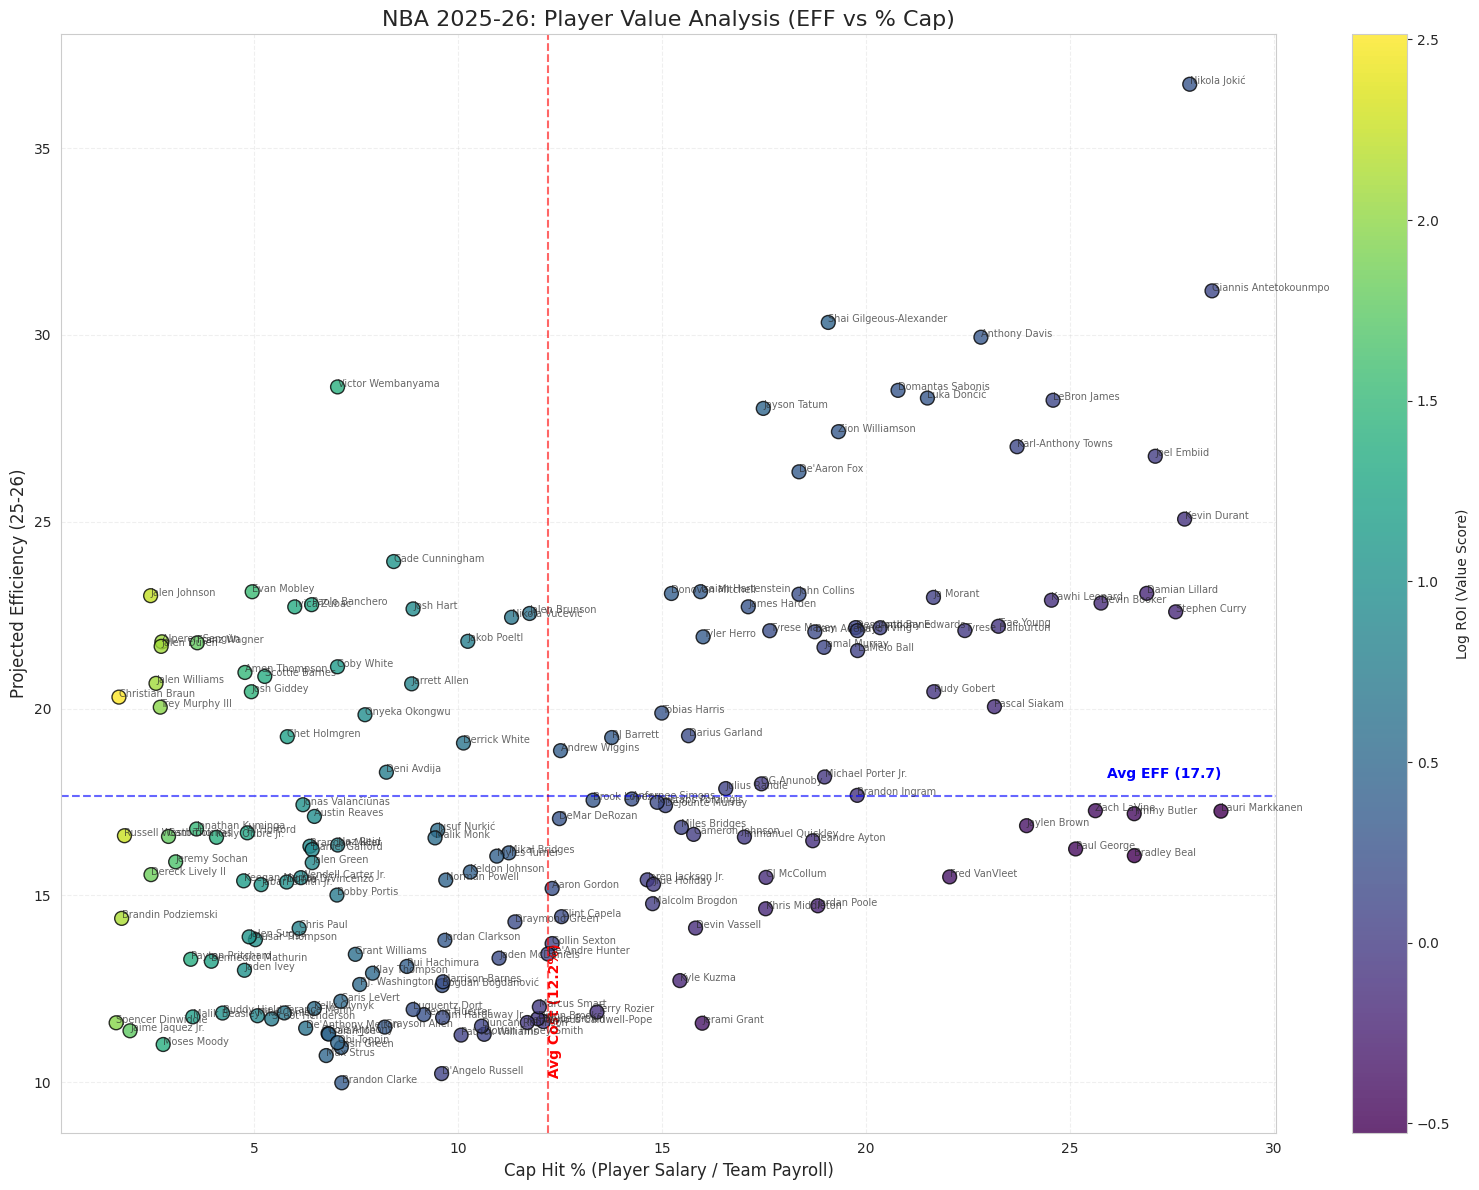

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import io
from functools import reduce
from sklearn.ensemble import GradientBoostingRegressor

# ==========================================
# 1. PASTE YOUR CSV CONTENT HERE
# ==========================================

# A. HISTORICAL STATS (Paste the full CSV content inside the quotes)
csv_22_23 = """
Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
1,Joel Embiid,28,PHI,C,66,66,34.6,11.0,20.1,.548,1.0,3.0,.330,10.0,17.1,.587,.573,10.0,11.7,.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,MVP-1DPOY-9CPOY-5ASNBA1,embiijo01
2,Luka Dončić,23,DAL,PG,66,66,36.2,10.9,22.0,.496,2.8,8.2,.342,8.1,13.8,.588,.560,7.8,10.5,.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,MVP-8CPOY-8ASNBA1,doncilu01
3,Damian Lillard,32,POR,PG,58,58,36.3,9.6,20.7,.463,4.2,11.3,.371,5.4,9.4,.574,.564,8.8,9.6,.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,CPOY-10ASNBA3,lillada01
4,Shai Gilgeous-Alexander,24,OKC,PG,68,68,35.5,10.4,20.3,.510,0.9,2.5,.345,9.5,17.8,.533,.531,9.8,10.9,.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,MVP-5CPOY-7ASNBA1,gilgesh01
5,Giannis Antetokounmpo,28,MIL,PF,63,63,32.1,11.2,20.3,.553,0.7,2.7,.275,10.5,17.6,.596,.572,7.9,12.3,.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,MVP-3DPOY-6ASNBA1,antetgi01
6,Jayson Tatum,24,BOS,SF,74,74,36.9,9.8,21.1,.466,3.2,9.3,.350,6.6,11.8,.558,.543,7.2,8.4,.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,MVP-4CPOY-10ASNBA1,tatumja01
7,Stephen Curry,34,GSW,PG,56,56,34.7,10.0,20.2,.493,4.9,11.4,.427,5.1,8.8,.579,.614,4.6,5.0,.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,MVP-9CPOY-9ASNBA2,curryst01
8,Kevin Durant,34,2TM,PF,47,47,35.6,10.3,18.3,.560,2.0,4.9,.404,8.3,13.4,.617,.614,6.5,7.1,.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,AS,duranke01
8,Kevin Durant,34,BRK,PF,39,39,36.0,10.5,18.8,.559,1.8,4.8,.376,8.7,14.0,.622,.607,6.8,7.3,.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,,duranke01
8,Kevin Durant,34,PHO,PF,8,8,33.6,9.1,16.0,.570,2.8,5.1,.537,6.4,10.9,.586,.656,5.0,6.0,.833,0.4,6.0,6.4,3.5,0.3,1.3,2.5,0.9,26.0,,duranke01
9,LeBron James,38,LAL,PF,55,54,35.5,11.1,22.2,.500,2.2,6.9,.321,8.9,15.3,.580,.549,4.6,5.9,.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,ASNBA3,jamesle01
10,Donovan Mitchell,26,CLE,SG,68,68,35.8,10.0,20.6,.484,3.6,9.3,.386,6.4,11.3,.566,.572,4.7,5.4,.867,0.9,3.3,4.3,4.4,1.5,0.4,2.6,2.5,28.3,MVP-6CPOY-6ASNBA2,mitchdo01
11,Devin Booker,26,PHO,SG,53,53,34.6,9.9,20.1,.494,2.1,6.0,.351,7.8,14.2,.554,.546,5.8,6.8,.855,0.9,3.7,4.5,5.5,1.0,0.3,2.7,3.0,27.8,,bookede01
12,Kyrie Irving,30,2TM,SG,60,60,37.4,9.9,20.1,.494,3.1,8.3,.379,6.8,11.8,.574,.572,4.1,4.6,.905,1.0,4.1,5.1,5.5,1.1,0.8,2.1,2.8,27.1,CPOY-12AS,irvinky01
12,Kyrie Irving,30,BRK,PG,40,40,37.0,10.0,20.5,.486,3.3,8.7,.374,6.7,11.8,.569,.565,4.0,4.5,.883,1.0,4.2,5.1,5.3,1.0,0.8,2.3,2.7,27.1,,irvinky01
12,Kyrie Irving,30,DAL,SG,20,20,38.2,9.8,19.2,.510,2.9,7.4,.392,6.9,11.8,.585,.586,4.5,4.7,.947,1.1,4.0,5.0,6.0,1.3,0.6,1.9,2.8,27.0,,irvinky01
13,Jaylen Brown,26,BOS,SF,67,67,35.9,10.1,20.6,.491,2.4,7.3,.335,7.7,13.4,.576,.550,3.9,5.1,.765,1.2,5.7,6.9,3.5,1.1,0.4,2.9,2.6,26.6,ASNBA2,brownja02
14,Ja Morant,23,MEM,PG,61,59,31.9,9.3,19.9,.466,1.5,4.9,.307,7.8,15.0,.519,.504,6.1,8.1,.748,1.0,4.9,5.9,8.1,1.1,0.3,3.4,1.6,26.2,MVP-12AS,moranja01
15,Trae Young,24,ATL,PG,73,73,34.8,8.2,19.0,.429,2.1,6.3,.335,6.1,12.7,.476,.485,7.8,8.8,.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,,youngtr01
16,Zion Williamson,22,NOP,PF,29,29,33.0,9.8,16.2,.608,0.2,0.7,.368,9.6,15.5,.618,.615,6.1,8.6,.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0,AS,willizi01
17,Anthony Davis,29,LAL,C,56,54,34.0,9.7,17.2,.563,0.3,1.3,.257,9.3,15.9,.589,.573,6.2,7.9,.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9,,davisan02
18,Lauri Markkanen,25,UTA,PF,66,66,34.4,8.7,17.3,.499,3.0,7.7,.391,5.6,9.6,.585,.586,5.3,6.0,.875,2.0,6.7,8.6,1.9,0.6,0.6,1.9,2.1,25.6,MIP-1AS,markkla01
19,Julius Randle,28,NYK,PF,77,77,35.5,8.5,18.6,.459,2.8,8.3,.343,5.7,10.3,.553,.536,5.2,6.9,.757,1.8,8.1,10.0,4.1,0.6,0.3,2.8,3.0,25.1,CPOY-14ASNBA3,randlju01
20,De'Aaron Fox,25,SAC,PG,73,73,33.4,9.3,18.2,.512,1.6,5.0,.324,7.7,13.2,.584,.557,4.7,6.0,.780,0.5,3.6,4.2,6.1,1.1,0.3,2.5,2.4,25.0,MVP-11CPOY-1ASNBA3,foxde01
21,Zach LaVine,27,CHI,SG,77,77,35.9,8.7,18.0,.485,2.6,7.1,.375,6.1,11.0,.556,.558,4.7,5.6,.848,0.5,3.9,4.5,4.2,0.9,0.2,2.5,2.1,24.8,,lavinza01
22,Brandon Ingram,25,NOP,SF,45,45,34.2,9.0,18.6,.484,1.4,3.6,.390,7.6,14.9,.507,.522,5.3,6.0,.882,0.5,5.0,5.5,5.8,0.7,0.4,3.3,2.6,24.7,,ingrabr01
23,Anthony Edwards,21,MIN,SG,79,79,36.0,8.9,19.5,.459,2.7,7.3,.369,6.3,12.2,.513,.528,4.0,5.3,.756,0.6,5.2,5.8,4.4,1.6,0.7,3.3,2.4,24.6,AS,edwaran01
24,DeMar DeRozan,33,CHI,SF,74,74,36.2,8.9,17.6,.504,0.6,1.9,.324,8.3,15.7,.526,.522,6.2,7.1,.872,0.5,4.2,4.6,5.1,1.1,0.5,2.1,2.5,24.5,CPOY-3AS,derozde01
25,Nikola Jokić,27,DEN,C,69,69,33.7,9.4,14.8,.632,0.8,2.2,.383,8.5,12.7,.675,.660,4.9,6.0,.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,MVP-2CPOY-13ASNBA2,jokicni01
26,Pascal Siakam,28,TOR,PF,71,71,37.4,8.9,18.5,.480,1.3,4.0,.324,7.6,14.5,.523,.515,5.2,6.7,.774,1.8,6.0,7.8,5.8,0.9,0.5,2.4,3.2,24.2,AS,siakapa01
27,Jalen Brunson,26,NYK,PG,68,68,35.0,8.6,17.6,.491,2.0,4.7,.416,6.7,12.8,.519,.547,4.8,5.8,.829,0.6,3.0,3.5,6.2,0.9,0.2,2.1,2.2,24.0,MVP-12CPOY-4,brunsja01
28,Paul George,32,LAC,SF,56,56,34.6,8.2,17.9,.457,2.8,7.6,.371,5.4,10.3,.521,.536,4.6,5.3,.871,0.8,5.3,6.1,5.1,1.5,0.4,3.1,2.8,23.8,AS,georgpa01
29,Kawhi Leonard,31,LAC,SF,52,50,33.6,8.6,16.8,.512,2.0,4.8,.416,6.6,11.9,.551,.572,4.7,5.4,.871,1.1,5.4,6.5,3.9,1.4,0.5,1.7,1.6,23.8,,leonaka01
30,LaMelo Ball,21,CHO,PG,36,36,35.2,8.2,20.0,.411,4.0,10.6,.376,4.2,9.4,.450,.510,2.8,3.4,.836,1.2,5.3,6.4,8.4,1.3,0.3,3.6,3.3,23.3,,ballla01
31,Bradley Beal,29,WAS,SG,50,50,33.5,8.9,17.6,.506,1.6,4.4,.365,7.3,13.2,.552,.551,3.8,4.6,.842,0.8,3.1,3.9,5.4,0.9,0.7,2.9,2.1,23.2,,bealbr01
32,Kristaps Porziņģis,27,WAS,C,65,65,32.6,7.8,15.7,.498,2.1,5.5,.385,5.7,10.2,.559,.565,5.4,6.4,.851,1.8,6.6,8.4,2.7,0.9,1.5,2.1,3.0,23.2,,porzikr01
33,Jimmy Butler,33,MIA,PF,64,64,33.4,7.5,13.9,.539,0.6,1.6,.350,6.9,12.3,.564,.560,7.4,8.7,.850,2.2,3.7,5.9,5.3,1.8,0.3,1.6,1.3,22.9,MVP-10DPOY-12CPOY-2NBA2,butleji01
34,Jalen Green,20,HOU,SG,76,76,34.2,7.4,17.9,.416,2.5,7.3,.338,5.0,10.6,.471,.485,4.8,6.1,.786,0.6,3.2,3.7,3.7,0.8,0.2,2.6,1.7,22.1,,greenja05
35,Keldon Johnson,23,SAS,SF,63,63,32.7,8.0,17.7,.452,2.1,6.5,.329,5.9,11.2,.523,.512,3.9,5.2,.749,0.9,4.2,5.0,2.9,0.7,0.2,2.1,2.0,22.0,,johnske04
36,Klay Thompson,32,GSW,SF,69,69,33.0,7.9,18.1,.436,4.4,10.6,.412,3.6,7.6,.470,.556,1.7,1.9,.879,0.6,3.6,4.1,2.4,0.7,0.4,1.8,1.9,21.9,,thompkl01
37,Bojan Bogdanović,33,DET,PF,59,59,32.1,7.3,14.9,.488,2.5,6.0,.411,4.8,9.0,.539,.570,4.5,5.1,.884,0.6,3.2,3.8,2.6,0.6,0.1,2.3,1.9,21.6,,bogdabo02
38,Darius Garland,23,CLE,PG,69,69,35.5,7.6,16.4,.462,2.4,6.0,.410,5.1,10.4,.492,.537,4.0,4.7,.863,0.4,2.3,2.7,7.8,1.2,0.1,2.9,2.1,21.6,,garlada01
39,Desmond Bane,24,MEM,SG,58,58,31.7,7.8,16.2,.479,2.9,7.0,.408,4.9,9.2,.534,.568,3.1,3.5,.883,0.7,4.3,5.0,4.4,1.0,0.4,2.2,2.6,21.5,,banede01
40,Kyle Kuzma,27,WAS,PF,64,64,35.0,8.0,17.8,.448,2.5,7.5,.333,5.5,10.3,.533,.518,2.7,3.7,.730,0.9,6.4,7.2,3.7,0.6,0.5,3.0,2.3,21.2,,kuzmaky01
41,Terry Rozier,28,CHO,SG,63,63,35.3,7.8,18.9,.415,2.6,8.0,.327,5.2,10.8,.480,.484,2.8,3.5,.809,0.8,3.3,4.1,5.1,1.2,0.3,2.1,1.9,21.1,,roziete01
42,Anfernee Simons,23,POR,SG,62,62,35.0,7.5,16.9,.447,3.4,9.1,.377,4.1,7.8,.528,.548,2.6,2.9,.894,0.3,2.3,2.6,4.1,0.7,0.2,2.1,2.3,21.1,,simonan01
43,James Harden,33,PHI,PG,58,58,36.8,6.4,14.5,.441,2.8,7.2,.385,3.6,7.3,.495,.536,5.4,6.2,.867,0.7,5.4,6.1,10.7,1.2,0.5,3.4,1.9,21.0,,hardeja01
44,CJ McCollum,31,NOP,PG,75,75,35.3,7.8,17.9,.437,2.8,7.2,.389,5.0,10.7,.469,.515,2.4,3.2,.769,0.7,3.6,4.4,5.7,0.9,0.5,2.4,2.0,20.9,,mccolcj01
45,Jordan Clarkson,30,UTA,SG,61,61,32.6,7.5,16.9,.444,2.5,7.5,.338,5.0,9.4,.530,.519,3.3,4.0,.816,1.2,2.9,4.0,4.4,0.5,0.2,3.0,2.0,20.8,,clarkjo01
46,Karl-Anthony Towns,27,MIN,PF,29,29,33.0,7.3,14.8,.495,2.1,5.7,.366,5.2,9.1,.576,.565,4.1,4.7,.874,1.7,6.5,8.1,4.8,0.7,0.6,3.0,3.8,20.8,,townska01
47,Tyrese Haliburton,22,IND,PG,56,56,33.6,7.4,15.0,.490,2.9,7.2,.400,4.5,7.8,.572,.586,3.1,3.6,.871,0.6,3.1,3.7,10.4,1.6,0.4,2.5,1.2,20.7,AS,halibty01
48,Jerami Grant,28,POR,PF,63,63,35.7,6.9,14.5,.475,2.3,5.7,.401,4.6,8.8,.523,.554,4.4,5.4,.813,0.8,3.7,4.5,2.4,0.8,0.8,1.8,2.4,20.5,,grantje01
49,Dejounte Murray,26,ATL,SG,74,74,36.4,8.3,17.8,.464,1.8,5.2,.344,6.5,12.6,.514,.514,2.1,2.6,.832,0.7,4.5,5.3,6.1,1.5,0.3,2.2,1.4,20.5,,murrade01
50,Bam Adebayo,25,MIA,C,75,75,34.6,8.0,14.9,.540,0.0,0.2,.083,8.0,14.7,.545,.541,4.3,5.4,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,DPOY-5ASDEF2,adebaba01
51,Jordan Poole,23,GSW,PG,82,43,30.0,6.7,15.6,.430,2.6,7.8,.336,4.1,7.8,.524,.514,4.4,5.1,.870,0.4,2.4,2.7,4.5,0.8,0.3,3.1,2.6,20.4,,poolejo01
52,Tyrese Maxey,22,PHI,SG,60,41,33.6,7.3,15.2,.481,2.7,6.2,.434,4.7,9.1,.513,.568,3.0,3.6,.845,0.4,2.6,2.9,3.5,0.8,0.1,1.3,2.2,20.3,,maxeyty01
53,Kelly Oubre Jr.,27,CHO,SF,48,40,32.3,7.4,17.1,.431,2.3,7.1,.319,5.1,10.0,.510,.497,3.3,4.3,.760,1.4,3.8,5.2,1.1,1.4,0.4,1.3,2.9,20.3,,oubreke01
54,Mikal Bridges,26,2TM,SG,83,83,35.7,7.1,15.3,.468,2.0,5.3,.382,5.1,9.9,.514,.535,3.8,4.3,.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1,,bridgmi01
54,Mikal Bridges,26,PHO,SF,56,56,36.4,6.3,13.6,.463,1.8,4.7,.387,4.5,9.0,.503,.529,2.8,3.1,.897,1.0,3.3,4.3,3.6,1.2,0.8,1.4,2.1,17.2,,bridgmi01
54,Mikal Bridges,26,BRK,SG,27,27,34.2,8.9,18.6,.475,2.5,6.7,.376,6.3,11.9,.531,.543,5.9,6.6,.894,0.9,3.6,4.5,2.7,1.0,0.6,1.8,1.6,26.1,,bridgmi01
55,Tyler Herro,23,MIA,SG,67,67,34.9,7.3,16.6,.439,3.0,8.0,.378,4.2,8.5,.497,.531,2.5,2.7,.934,0.4,5.0,5.4,4.2,0.8,0.2,2.4,1.5,20.1,,herroty01
56,Paolo Banchero,20,ORL,PF,72,72,33.8,6.7,15.6,.427,1.2,4.0,.298,5.5,11.6,.471,.465,5.5,7.4,.738,1.2,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,ROY-1,banchpa01
57,Louis King,23,PHI,PF,1,0,29.0,8.0,13.0,.615,4.0,8.0,.500,4.0,5.0,.800,.769,0.0,1.0,.000,2.0,2.0,4.0,2.0,1.0,0.0,2.0,4.0,20.0,,kinglo02
58,Jamal Murray,25,DEN,PG,65,65,32.8,7.3,16.0,.454,2.6,6.6,.398,4.6,9.4,.494,.537,2.8,3.3,.833,0.7,3.2,4.0,6.2,1.0,0.2,2.2,1.6,20.0,,murraja01
59,Cade Cunningham,21,DET,PG,12,12,33.3,7.8,18.7,.415,1.4,5.1,.279,6.3,13.6,.466,.453,3.0,3.6,.837,1.0,5.2,6.2,6.0,0.8,0.6,3.3,2.8,19.9,,cunnica01
60,RJ Barrett,22,NYK,SG,73,73,33.9,7.0,16.1,.434,1.7,5.3,.310,5.3,10.8,.495,.485,4.0,5.4,.740,0.8,4.2,5.0,2.8,0.4,0.2,2.2,2.5,19.6,,barrerj01
61,Jrue Holiday,32,MIL,PG,67,65,32.6,7.3,15.3,.479,2.4,6.1,.384,5.0,9.1,.542,.556,2.3,2.6,.859,1.2,3.9,5.1,7.4,1.2,0.4,2.9,1.7,19.3,DPOY-7ASDEF1,holidjr01
62,Fred VanVleet,28,TOR,PG,69,69,36.7,6.3,16.1,.393,3.0,8.8,.342,3.3,7.3,.455,.486,3.7,4.1,.898,0.4,3.6,4.1,7.2,1.8,0.6,2.0,2.8,19.3,,vanvlfr01
63,Kevin Porter Jr.,22,HOU,PG,59,59,34.3,6.6,15.0,.442,2.4,6.5,.366,4.2,8.5,.501,.522,3.5,4.5,.784,1.3,4.0,5.3,5.7,1.4,0.3,3.2,2.6,19.2,,porteke02
64,Domantas Sabonis,26,SAC,C,79,79,34.6,7.3,11.9,.615,0.4,1.1,.373,6.9,10.8,.639,.632,4.1,5.5,.742,3.2,9.1,12.3,7.3,0.8,0.5,2.9,3.5,19.1,MVP-7ASNBA3,sabondo01
65,Jaren Jackson Jr.,23,MEM,C,63,63,28.4,6.6,13.0,.506,1.6,4.5,.355,5.0,8.6,.585,.567,3.8,4.9,.788,1.7,5.0,6.8,1.0,1.0,3.0,1.7,3.6,18.6,DPOY-1ASDEF1,jacksja02
66,Franz Wagner,21,ORL,SF,80,80,32.6,6.8,14.0,.485,1.6,4.5,.361,5.2,9.5,.544,.543,3.4,4.0,.842,0.9,3.2,4.1,3.5,1.0,0.2,2.1,2.3,18.6,,wagnefr01
67,Devin Vassell,22,SAS,SG,38,32,31.0,6.9,15.7,.439,2.7,7.0,.387,4.2,8.7,.480,.525,2.1,2.6,.780,0.2,3.7,3.9,3.6,1.1,0.4,1.5,1.5,18.5,,vassede01
68,Deandre Ayton,24,PHO,C,67,67,30.4,7.8,13.2,.589,0.1,0.4,.292,7.7,12.9,.597,.592,2.3,3.0,.760,2.6,7.4,10.0,1.7,0.6,0.8,1.8,2.8,18.0,,aytonde01
69,Myles Turner,26,IND,C,62,62,29.4,6.5,11.8,.548,1.5,4.0,.373,5.0,7.8,.638,.612,3.5,4.5,.783,1.4,6.1,7.5,1.4,0.6,2.3,1.7,3.5,18.0,,turnemy01
70,D'Angelo Russell,26,2TM,PG,71,71,32.5,6.3,13.4,.469,2.7,6.9,.396,3.5,6.5,.548,.572,2.5,3.0,.829,0.5,2.5,3.0,6.2,1.0,0.4,2.6,2.0,17.8,,russeda01
70,D'Angelo Russell,26,MIN,PG,54,54,32.9,6.3,13.5,.465,2.7,7.0,.391,3.5,6.4,.546,.567,2.6,3.1,.856,0.5,2.5,3.1,6.2,1.1,0.4,2.7,2.2,17.9,,russeda01
70,D'Angelo Russell,26,LAL,PG,17,17,30.9,6.3,13.0,.484,2.7,6.5,.414,3.6,6.5,.555,.588,2.1,2.9,.735,0.4,2.5,2.9,6.1,0.6,0.5,2.3,1.4,17.4,,russeda01
71,Nikola Vučević,32,CHI,C,82,82,33.5,7.3,14.0,.520,1.5,4.2,.349,5.8,9.8,.594,.573,1.6,1.9,.835,1.9,9.1,11.0,3.2,0.7,0.7,1.7,2.2,17.6,,vucevni01
72,Michael Porter Jr.,24,DEN,SF,62,62,29.0,6.4,13.2,.487,3.0,7.3,.414,3.4,5.9,.579,.602,1.5,1.9,.800,1.0,4.5,5.5,1.0,0.6,0.5,1.1,1.9,17.4,,portemi01
73,Gary Trent Jr.,24,TOR,SG,66,44,32.1,6.1,14.2,.433,2.5,6.8,.369,3.6,7.3,.493,.522,2.6,3.1,.839,0.5,2.2,2.6,1.6,1.6,0.2,0.8,1.5,17.4,,trentga02
74,Spencer Dinwiddie,29,2TM,SG,79,79,34.5,5.8,13.3,.438,2.3,6.2,.369,3.5,7.1,.498,.524,3.4,4.2,.812,0.4,3.1,3.4,6.5,0.8,0.3,1.8,2.4,17.3,,dinwisp01
74,Spencer Dinwiddie,29,DAL,SG,53,53,34.1,6.0,13.1,.455,2.6,6.4,.405,3.4,6.7,.504,.555,3.2,3.9,.821,0.4,2.7,3.1,5.3,0.7,0.3,1.7,2.3,17.7,,dinwisp01
74,Spencer Dinwiddie,29,BRK,PG,26,26,35.3,5.5,13.7,.404,1.7,5.7,.289,3.9,8.0,.488,.465,3.8,4.7,.797,0.3,3.8,4.1,9.1,1.1,0.3,2.1,2.4,16.5,,dinwisp01
75,Andrew Wiggins,27,GSW,SF,37,37,32.2,6.8,14.3,.473,2.4,6.1,.396,4.4,8.2,.530,.557,1.2,1.9,.611,1.6,3.4,5.0,2.3,1.2,0.8,1.3,2.9,17.1,,wiggian01
76,Norman Powell,29,LAC,SG,60,8,26.1,5.7,11.8,.479,1.9,4.8,.397,3.8,7.1,.534,.559,3.8,4.6,.812,0.4,2.5,2.9,1.8,0.8,0.3,1.7,2.1,17.0,6MOY-4,powelno01
77,OG Anunoby,25,TOR,SF,67,67,35.6,6.3,13.2,.476,2.1,5.5,.387,4.2,7.7,.539,.556,2.1,2.5,.838,1.4,3.5,5.0,2.0,1.9,0.7,2.0,3.0,16.8,DPOY-7DEF2,anunoog01
78,Buddy Hield,30,IND,SF,80,73,31.0,5.9,13.0,.458,3.6,8.5,.425,2.3,4.5,.518,.596,1.3,1.6,.822,0.8,4.2,5.0,2.8,1.2,0.3,1.7,2.0,16.8,,hieldbu01
79,Bennedict Mathurin,20,IND,SG,78,17,28.5,5.3,12.2,.434,1.3,4.0,.323,4.0,8.2,.488,.487,4.8,5.8,.828,1.1,3.0,4.1,1.5,0.6,0.2,1.9,2.1,16.7,ROY-46MOY-8,mathube01
80,Josh Giddey,20,OKC,PF,76,76,31.1,7.1,14.7,.482,1.0,3.1,.325,6.1,11.6,.524,.516,1.4,1.9,.731,1.9,5.9,7.9,6.2,0.8,0.4,2.8,1.9,16.6,,giddejo01
81,Christian Wood,27,DAL,C,67,17,25.9,5.9,11.5,.515,1.6,4.2,.376,4.3,7.3,.594,.583,3.2,4.2,.772,1.3,6.0,7.3,1.8,0.4,1.1,1.8,2.5,16.6,6MOY-9,woodch01
82,Aaron Gordon,27,DEN,PF,68,68,30.2,6.3,11.2,.564,0.9,2.5,.347,5.4,8.6,.628,.603,2.8,4.6,.608,2.4,4.1,6.6,3.0,0.8,0.8,1.4,1.9,16.3,,gordoaa01
83,Jaden Ivey,20,DET,SG,74,73,31.1,5.5,13.3,.416,1.6,4.7,.343,3.9,8.6,.457,.477,3.6,4.8,.747,1.0,2.9,3.9,5.2,0.8,0.2,3.2,3.3,16.3,ROY-6,iveyja01
84,Evan Mobley,21,CLE,PF,79,79,34.4,6.6,12.0,.554,0.3,1.3,.216,6.4,10.7,.595,.566,2.6,3.8,.674,2.4,6.6,9.0,2.8,0.8,1.5,1.8,2.8,16.2,DPOY-3DEF1,mobleev01
85,RaiQuan Gray,23,BRK,PF,1,0,35.0,6.0,12.0,.500,2.0,5.0,.400,4.0,7.0,.571,.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,,grayra01
86,Brook Lopez,34,MIL,C,78,78,30.4,6.1,11.5,.531,1.7,4.7,.374,4.4,6.9,.637,.606,1.9,2.4,.784,2.0,4.7,6.7,1.3,0.5,2.5,1.4,2.6,15.9,DPOY-2DEF1,lopezbr01
87,Russell Westbrook,34,2TM,PG,73,24,29.1,5.9,13.6,.436,1.2,3.9,.311,4.7,9.7,.487,.481,2.8,4.3,.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,6MOY-9,westbru01
87,Russell Westbrook,34,LAL,PG,52,3,28.7,5.8,14.0,.417,1.2,4.1,.296,4.6,9.9,.467,.460,3.0,4.6,.655,1.1,5.0,6.2,7.5,1.0,0.4,3.5,2.3,15.9,,westbru01
87,Russell Westbrook,34,LAC,PG,21,21,30.2,6.1,12.5,.489,1.2,3.5,.356,4.9,9.0,.540,.538,2.4,3.6,.658,1.4,3.4,4.9,7.6,1.1,0.5,3.4,2.0,15.8,,westbru01
88,P.J. Washington,24,CHO,PF,73,73,32.6,5.9,13.4,.444,2.0,5.9,.348,3.9,7.5,.518,.520,1.7,2.4,.730,1.0,3.9,4.9,2.4,0.9,1.1,1.5,2.6,15.7,,washipj01
89,Cameron Johnson,26,2TM,PF,42,41,28.5,5.3,11.3,.470,2.5,6.1,.404,2.9,5.2,.548,.579,2.4,2.9,.842,0.8,3.6,4.4,1.9,1.2,0.3,0.9,2.0,15.5,,johnsca02
89,Cameron Johnson,26,PHO,PF,17,16,25.2,4.8,10.2,.474,2.6,5.8,.455,2.2,4.4,.500,.604,1.6,1.9,.818,0.8,3.0,3.8,1.5,0.9,0.4,0.6,1.7,13.9,,johnsca02
89,Cameron Johnson,26,BRK,PF,25,25,30.8,5.6,12.0,.468,2.3,6.2,.372,3.3,5.8,.572,.565,3.0,3.5,.851,0.8,4.0,4.8,2.1,1.4,0.3,1.1,2.2,16.6,,johnsca02
90,De'Andre Hunter,25,ATL,SF,67,67,31.7,5.7,12.3,.461,1.5,4.3,.350,4.2,8.0,.521,.522,2.6,3.1,.826,0.7,3.6,4.2,1.4,0.5,0.3,1.2,3.0,15.4,,huntede01
91,Scottie Barnes,21,TOR,SF,77,76,34.8,6.0,13.2,.456,0.8,2.9,.281,5.2,10.3,.505,.487,2.5,3.2,.772,2.3,4.3,6.6,4.8,1.1,0.8,2.0,2.2,15.3,,barnesc01
92,Skylar Mays,25,POR,PG,6,6,31.5,5.7,11.3,.500,2.0,4.3,.462,3.7,7.0,.524,.588,2.0,2.2,.923,0.3,2.8,3.2,8.3,1.0,0.2,1.7,1.8,15.3,,mayssk01
93,Wendell Carter Jr.,23,ORL,C,57,54,29.6,5.6,10.8,.525,1.4,3.9,.356,4.2,6.8,.624,.591,2.5,3.4,.738,2.1,6.6,8.7,2.3,0.5,0.6,1.9,2.8,15.2,,cartewe01
94,Kevin Huerter,24,SAC,SG,75,75,29.4,5.6,11.5,.485,2.7,6.8,.402,2.9,4.7,.604,.603,1.3,1.7,.725,0.6,2.8,3.3,2.9,1.1,0.3,1.3,2.4,15.2,,huertke01
95,Khris Middleton,31,MIL,SF,33,19,24.3,5.4,12.3,.436,1.5,4.9,.315,3.8,7.4,.516,.499,2.8,3.1,.902,0.8,3.4,4.2,4.9,0.7,0.2,2.2,2.1,15.1,,middlkh01
96,Harrison Barnes,30,SAC,PF,82,82,32.5,4.6,9.6,.473,1.6,4.3,.374,3.0,5.3,.553,.556,4.3,5.0,.847,1.1,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0,,barneha02
97,Malcolm Brogdon,30,BOS,PG,67,0,26.0,5.3,10.9,.484,2.0,4.4,.444,3.3,6.5,.510,.574,2.4,2.7,.870,0.6,3.6,4.2,3.7,0.7,0.3,1.5,1.6,14.9,6MOY-1,brogdma01
98,Immanuel Quickley,23,NYK,SG,81,21,28.9,5.2,11.6,.448,2.1,5.6,.370,3.1,6.0,.521,.537,2.5,3.1,.819,0.7,3.4,4.2,3.4,1.0,0.2,1.2,2.0,14.9,6MOY-2,quickim01
99,Alperen Şengün,20,HOU,C,75,72,28.9,5.9,10.7,.553,0.3,0.8,.333,5.6,9.9,.570,.565,2.7,3.8,.715,3.2,5.8,9.0,3.9,0.9,0.9,2.6,3.4,14.8,,sengual01
100,Tobias Harris,30,PHI,SF,74,74,32.9,5.7,11.4,.501,1.7,4.4,.389,4.0,7.0,.570,.575,1.5,1.7,.876,0.9,4.8,5.7,2.5,0.9,0.5,1.2,2.0,14.7,,harrito02
101,Gordon Hayward,32,CHO,SF,50,50,31.5,5.5,11.6,.475,1.0,3.2,.325,4.5,8.4,.532,.520,2.6,3.2,.811,0.7,3.6,4.3,4.1,0.8,0.2,2.0,1.4,14.7,,haywago01
102,Trey Murphy III,22,NOP,SF,79,65,31.0,4.9,10.1,.484,2.6,6.3,.406,2.3,3.8,.611,.610,2.2,2.4,.905,0.7,2.8,3.6,1.4,1.1,0.5,0.8,2.0,14.5,,murphtr02
103,Tim Hardaway Jr.,30,DAL,SF,71,45,30.3,4.8,11.9,.401,3.0,7.7,.385,1.8,4.2,.431,.527,1.8,2.3,.770,0.3,3.2,3.5,1.8,0.7,0.2,0.8,1.7,14.4,,hardati02
104,Jarrett Allen,24,CLE,C,68,68,32.6,5.9,9.2,.644,0.0,0.1,.100,5.9,9.1,.653,.645,2.4,3.3,.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3,,allenja01
105,Dillon Brooks,27,MEM,SF,73,73,30.3,5.4,13.6,.396,2.0,6.0,.326,3.4,7.6,.451,.468,1.6,2.1,.779,0.6,2.7,3.3,2.6,0.9,0.2,1.4,3.3,14.3,DEF2,brookdi01
106,Collin Sexton,24,UTA,PG,48,15,23.9,4.9,9.8,.506,1.0,2.5,.393,3.9,7.2,.546,.558,3.4,4.1,.819,0.8,1.4,2.2,2.9,0.6,0.1,1.8,2.3,14.3,,sextoco01
107,Bobby Portis,27,MIL,PF,70,22,26.0,5.7,11.5,.496,1.4,3.7,.370,4.3,7.8,.555,.555,1.4,1.8,.768,2.2,7.4,9.6,1.5,0.4,0.2,1.2,1.6,14.1,6MOY-3,portibo01
108,Jonas Valančiūnas,30,NOP,C,79,79,24.9,5.6,10.3,.547,0.5,1.4,.349,5.2,8.9,.577,.570,2.3,2.8,.826,2.8,7.3,10.2,1.8,0.3,0.7,2.0,3.1,14.1,,valanjo01
109,Jalen Williams,21,OKC,SG,75,62,30.3,5.5,10.6,.521,1.0,2.7,.356,4.5,7.9,.579,.567,2.1,2.5,.812,1.1,3.4,4.5,3.3,1.4,0.5,1.6,2.5,14.1,ROY-2,willija06
110,Bogdan Bogdanović,30,ATL,SG,54,9,27.9,5.1,11.3,.447,2.7,6.7,.406,2.4,4.6,.506,.566,1.2,1.4,.831,0.4,2.6,3.1,2.8,0.8,0.3,1.2,1.6,14.0,,bogdabo01
111,Markelle Fultz,24,ORL,PG,60,60,29.6,5.8,11.3,.514,0.5,1.5,.310,5.4,9.9,.544,.534,1.9,2.4,.783,1.2,2.8,3.9,5.7,1.5,0.4,2.3,2.2,14.0,,fultzma01
112,Chris Paul,37,PHO,PG,59,59,32.0,5.0,11.3,.440,1.7,4.4,.375,3.3,6.9,.482,.513,2.3,2.7,.831,0.5,3.8,4.3,8.9,1.5,0.4,1.9,2.1,13.9,,paulch01
113,Saddiq Bey,23,2TM,SF,77,37,27.6,4.6,10.9,.422,2.0,5.4,.361,2.6,5.4,.483,.513,2.7,3.1,.861,1.3,3.4,4.7,1.5,0.9,0.2,0.9,1.6,13.8,,beysa01
113,Saddiq Bey,23,DET,SF,52,30,28.8,4.7,11.7,.404,1.9,5.6,.345,2.8,6.0,.460,.488,3.5,4.0,.861,1.1,3.5,4.7,1.6,1.0,0.2,1.0,1.7,14.8,,beysa01
113,Saddiq Bey,23,ATL,SF,25,7,25.2,4.3,9.2,.470,2.0,5.0,.400,2.3,4.2,.552,.578,1.0,1.2,.862,1.6,3.2,4.8,1.4,0.8,0.0,0.7,1.5,11.6,,beysa01
114,Luguentz Dort,23,OKC,SF,74,73,30.7,4.6,11.8,.388,1.8,5.5,.330,2.8,6.3,.440,.466,2.7,3.5,.772,1.7,2.9,4.6,2.1,1.0,0.3,1.2,3.3,13.7,,dortlu01
115,Malik Monk,24,SAC,SG,77,0,22.3,4.6,10.3,.448,1.9,5.2,.359,2.8,5.2,.538,.538,2.4,2.7,.889,0.4,2.2,2.6,3.9,0.6,0.3,1.9,1.6,13.5,6MOY-5,monkma01
116,Rudy Gobert,30,MIN,C,70,70,30.7,5.1,7.8,.659,0.0,0.0,.000,5.1,7.8,.663,.659,3.1,4.9,.644,3.3,8.3,11.6,1.2,0.8,1.4,1.7,3.0,13.4,,goberru01
117,Jusuf Nurkić,28,POR,C,52,52,26.8,5.0,9.7,.519,0.8,2.3,.361,4.2,7.4,.567,.561,2.4,3.7,.661,2.2,6.9,9.1,2.9,0.8,0.8,2.3,3.6,13.3,,nurkiju01
118,Kris Dunn,28,UTA,PG,22,3,25.8,5.3,9.8,.537,0.8,1.6,.472,4.5,8.2,.550,.576,1.9,2.4,.774,0.4,4.1,4.5,5.6,1.1,0.5,1.6,2.6,13.2,,dunnkr01
119,John Collins,25,ATL,PF,71,71,30.0,5.1,10.0,.508,1.0,3.4,.292,4.1,6.6,.619,.557,2.0,2.5,.803,1.1,5.4,6.5,1.2,0.6,1.0,1.1,3.1,13.1,,collijo01
120,Cole Anthony,22,ORL,PG,60,4,25.9,4.6,10.2,.454,1.3,3.4,.364,3.4,6.7,.500,.516,2.5,2.8,.894,0.8,4.0,4.8,3.9,0.6,0.5,1.5,2.6,13.0,,anthoco01
121,Austin Reaves,24,LAL,SG,64,22,28.8,4.0,7.7,.529,1.3,3.4,.398,2.7,4.3,.631,.616,3.6,4.1,.864,0.5,2.5,3.0,3.4,0.5,0.3,1.5,1.7,13.0,6MOY-7,reaveau01
122,Tre Jones,23,SAS,PG,68,65,29.2,5.0,10.9,.459,0.7,2.3,.285,4.4,8.6,.506,.489,2.2,2.5,.860,0.8,2.8,3.6,6.6,1.3,0.1,1.6,1.4,12.9,,jonestr01
123,Alec Burks,31,DET,SG,51,8,22.0,3.9,9.0,.436,1.9,4.7,.414,2.0,4.3,.459,.544,3.0,3.7,.814,0.4,2.7,3.1,2.2,0.7,0.2,1.1,1.9,12.8,,burksal01
124,Jabari Smith Jr.,19,HOU,PF,79,79,31.0,4.6,11.3,.408,1.5,4.9,.307,3.1,6.3,.487,.475,2.1,2.6,.786,1.5,5.7,7.2,1.3,0.5,0.9,1.3,2.9,12.8,,smithja05
125,Malik Beasley,26,2TM,SG,81,27,25.8,4.6,11.6,.395,2.9,8.1,.357,1.7,3.4,.484,.520,0.6,0.8,.769,0.4,3.1,3.5,1.5,0.8,0.1,1.1,1.3,12.7,,beaslma01
125,Malik Beasley,26,UTA,SG,55,13,26.8,4.8,12.2,.396,3.1,8.6,.359,1.7,3.6,.485,.522,0.7,0.8,.841,0.5,3.1,3.6,1.7,0.8,0.1,1.1,1.4,13.4,,beaslma01
125,Malik Beasley,26,LAL,SG,26,14,23.9,4.0,10.3,.392,2.5,7.2,.353,1.5,3.1,.481,.515,0.5,0.8,.619,0.3,3.0,3.3,1.2,0.8,0.0,1.2,1.2,11.1,,beaslma01
126,KJ Martin,22,HOU,SF,82,49,28.0,5.0,8.8,.569,0.8,2.6,.315,4.2,6.1,.679,.617,1.8,2.7,.680,1.5,4.0,5.5,1.5,0.5,0.4,1.1,1.8,12.7,,martike04
127,Nic Claxton,23,BRK,C,76,76,29.9,5.4,7.7,.705,0.0,0.0,.000,5.4,7.7,.708,.705,1.8,3.2,.541,2.4,6.8,9.2,1.9,0.9,2.5,1.3,2.8,12.6,DPOY-9,claxtni01
128,Dennis Schröder,29,LAL,PG,66,50,30.1,4.1,9.8,.415,1.1,3.4,.329,3.0,6.4,.461,.472,3.3,3.8,.857,0.3,2.2,2.5,4.5,0.8,0.2,1.7,2.2,12.6,,schrode01
129,Jakob Poeltl,27,2TM,C,72,71,26.5,5.4,8.6,.629,0.0,0.0,.000,5.4,8.6,.630,.629,1.7,2.8,.592,3.3,5.8,9.1,2.7,0.9,1.2,1.7,2.7,12.5,,poeltja01
129,Jakob Poeltl,27,SAS,C,46,46,26.1,5.2,8.4,.616,0.0,0.0,.000,5.2,8.4,.618,.616,1.7,2.8,.605,3.3,5.7,9.0,3.1,0.8,1.1,2.1,2.6,12.1,,poeltja01
129,Jakob Poeltl,27,TOR,C,26,25,27.2,5.8,8.8,.652,0.0,0.0,,5.8,8.8,.652,.652,1.6,2.8,.569,3.2,5.9,9.1,2.2,1.2,1.3,1.1,3.0,13.1,,poeltja01
130,Mac McClung,24,PHI,SG,2,0,20.5,4.5,10.0,.450,2.0,5.5,.364,2.5,4.5,.556,.550,1.5,2.5,.600,1.5,3.5,5.0,4.5,0.0,0.0,1.5,1.5,12.5,,mccluma01
131,Kelly Olynyk,31,UTA,C,68,68,28.6,4.1,8.2,.499,1.4,3.5,.394,2.7,4.7,.576,.583,2.9,3.4,.853,1.2,5.0,6.2,3.7,0.9,0.5,2.5,3.4,12.5,,olynyke01
132,Eric Gordon,34,2TM,SG,69,58,28.5,4.2,9.5,.446,1.9,5.2,.371,2.3,4.3,.535,.547,2.1,2.5,.821,0.2,1.7,1.9,2.7,0.6,0.4,1.5,1.1,12.4,,gordoer01
132,Eric Gordon,34,HOU,SG,47,47,30.2,4.5,10.2,.439,1.8,5.2,.347,2.7,5.0,.536,.528,2.3,2.9,.815,0.3,1.8,2.1,2.9,0.6,0.4,1.8,1.0,13.1,,gordoer01
132,Eric Gordon,34,LAC,SG,22,11,24.9,3.7,8.0,.463,2.1,5.0,.423,1.5,2.9,.531,.597,1.5,1.7,.842,0.2,1.5,1.7,2.1,0.6,0.4,1.0,1.5,11.0,,gordoer01
133,Derrick White,28,BOS,SG,82,70,28.3,4.3,9.2,.462,1.8,4.8,.381,2.5,4.5,.548,.560,2.0,2.3,.875,0.6,2.9,3.6,3.9,0.7,0.9,1.2,2.2,12.4,DEF2,whitede01
134,Keegan Murray,22,SAC,SF,80,78,29.8,4.4,9.8,.453,2.6,6.3,.411,1.9,3.5,.527,.584,0.8,1.0,.765,1.1,3.5,4.6,1.2,0.8,0.5,0.8,2.0,12.2,ROY-5,murrake02
135,Caris LeVert,28,CLE,SG,74,30,30.2,4.3,10.0,.431,1.7,4.4,.392,2.6,5.6,.462,.517,1.8,2.4,.722,0.7,3.1,3.8,3.9,1.0,0.3,1.6,2.3,12.1,,leverca01
136,Jaden McDaniels,22,MIN,SF,79,79,30.6,4.7,9.1,.517,1.4,3.4,.398,3.3,5.7,.588,.591,1.3,1.8,.736,1.2,2.7,3.9,1.9,0.9,1.0,1.4,3.4,12.1,,mcdanja02
137,Marvin Bagley III,23,DET,C,42,25,23.6,4.8,9.1,.529,0.5,1.6,.288,4.4,7.5,.579,.554,1.9,2.6,.750,2.2,4.2,6.4,0.9,0.5,0.7,1.1,1.9,12.0,,baglema01
138,Clint Capela,28,ATL,C,65,63,26.6,5.4,8.2,.653,0.0,0.0,.000,5.4,8.2,.654,.653,1.2,2.0,.603,4.0,7.1,11.0,0.9,0.7,1.2,0.8,2.1,12.0,,capelca01
139,Mike Conley,35,2TM,PG,67,66,30.3,3.9,9.1,.428,2.0,5.2,.385,1.9,3.9,.486,.539,2.1,2.5,.834,0.5,2.2,2.7,6.7,1.1,0.2,1.5,2.1,11.9,,conlemi01
139,Mike Conley,35,UTA,PG,43,42,29.7,3.6,8.7,.408,1.8,5.0,.362,1.8,3.8,.469,.511,1.8,2.2,.813,0.4,2.1,2.5,7.7,1.0,0.2,1.7,2.2,10.7,,conlemi01
139,Mike Conley,35,MIN,PG,24,24,31.4,4.5,9.8,.460,2.4,5.8,.420,2.1,4.0,.515,.583,2.6,3.0,.863,0.7,2.5,3.1,5.0,1.2,0.2,1.2,1.9,14.0,,conlemi01
140,Bones Hyland,22,2TM,PG,56,1,19.4,4.1,10.2,.399,2.1,5.6,.371,2.0,4.6,.434,.502,1.5,1.8,.843,0.4,2.1,2.4,3.1,0.7,0.3,1.5,1.7,11.8,,hylanbo01
140,Bones Hyland,22,DEN,PG,42,1,19.5,4.1,10.3,.399,2.2,5.7,.378,2.0,4.6,.425,.503,1.7,2.0,.866,0.2,1.8,2.0,3.0,0.7,0.3,1.6,1.6,12.1,,hylanbo01
140,Bones Hyland,22,LAC,PG,14,0,18.9,3.9,9.8,.401,1.9,5.3,.351,2.1,4.5,.460,.496,1.1,1.4,.750,0.7,2.8,3.5,3.4,0.8,0.1,1.1,2.1,10.8,,hylanbo01
141,Lonnie Walker IV,24,LAL,SG,56,32,23.2,4.2,9.4,.448,1.6,4.4,.365,2.6,5.0,.522,.534,1.6,1.9,.858,0.3,1.7,1.9,1.1,0.5,0.3,0.8,1.3,11.7,,walkelo01
142,Zach Collins,25,SAS,C,63,26,22.9,4.5,8.7,.518,0.9,2.3,.374,3.6,6.4,.571,.568,1.7,2.3,.761,1.8,4.5,6.4,2.9,0.6,0.8,2.0,3.2,11.6,,colliza01
143,Bruce Brown,26,DEN,SF,80,31,28.5,4.5,9.3,.483,1.1,3.2,.358,3.3,6.1,.548,.545,1.5,1.9,.758,0.8,3.3,4.1,3.4,1.1,0.6,1.5,2.4,11.5,,brownbr01
144,Naz Reid,23,MIN,C,68,11,18.4,4.6,8.5,.537,1.1,3.2,.346,3.5,5.3,.653,.602,1.3,1.9,.677,1.1,3.8,4.9,1.1,0.6,0.8,1.4,2.6,11.5,,reidna01
145,Marcus Smart,28,BOS,PG,61,61,32.1,4.1,9.9,.415,1.9,5.6,.336,2.2,4.3,.519,.511,1.4,1.9,.746,0.8,2.4,3.1,6.3,1.5,0.4,2.3,2.8,11.5,,smartma01
146,Max Strus,26,MIA,SF,80,33,28.4,4.1,9.9,.410,2.5,7.0,.350,1.6,2.8,.559,.535,1.0,1.1,.876,0.6,2.6,3.2,2.1,0.5,0.2,0.9,2.1,11.5,,strusma01
147,John Wall,32,LAC,PG,34,3,22.2,4.1,9.9,.408,1.0,3.2,.303,3.1,6.7,.459,.457,2.3,3.3,.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,,walljo01
148,Quentin Grimes,22,NYK,SG,71,66,29.9,4.0,8.5,.468,2.2,5.7,.386,1.8,2.7,.641,.599,1.1,1.4,.796,0.7,2.5,3.2,2.1,0.7,0.4,1.0,2.5,11.3,,grimequ01
149,Isaiah Stewart,21,DET,C,50,47,28.3,3.9,8.8,.442,1.3,4.1,.327,2.6,4.7,.542,.518,2.2,3.0,.738,2.3,5.8,8.1,1.4,0.4,0.7,1.4,2.7,11.3,,stewais01
150,Rui Hachimura,24,2TM,PF,63,9,23.3,4.5,9.3,.486,0.8,2.5,.319,3.7,6.7,.550,.530,1.4,1.9,.739,0.8,3.7,4.5,0.9,0.3,0.4,0.8,1.1,11.2,,hachiru01
150,Rui Hachimura,24,WAS,PF,30,0,24.3,5.3,10.8,.488,1.0,3.0,.337,4.3,7.8,.545,.534,1.5,1.9,.759,0.6,3.6,4.3,1.2,0.4,0.4,1.2,1.3,13.0,,hachiru01
150,Rui Hachimura,24,LAL,PF,33,9,22.4,3.8,7.9,.485,0.6,2.2,.296,3.2,5.7,.556,.525,1.3,1.8,.721,1.0,3.7,4.7,0.7,0.2,0.4,0.5,1.0,9.6,,hachiru01
151,Kyle Lowry,36,MIA,PG,55,44,31.2,3.6,8.8,.404,1.9,5.6,.345,1.6,3.2,.509,.514,2.1,2.5,.859,0.8,3.3,4.1,5.1,1.0,0.4,1.9,2.6,11.2,,lowryky01
152,Marcus Morris,33,LAC,PF,65,65,28.1,4.2,9.9,.426,1.7,4.7,.364,2.5,5.2,.484,.513,1.0,1.3,.782,0.4,3.5,4.0,1.8,0.6,0.3,0.9,2.1,11.2,,morrima03
153,Corey Kispert,23,WAS,SF,74,45,28.3,3.9,7.9,.497,2.2,5.2,.424,1.7,2.7,.637,.637,1.0,1.2,.852,0.4,2.4,2.8,1.2,0.4,0.1,0.7,1.3,11.1,,kispeco01
154,Jeremy Sochan,19,SAS,PF,56,53,26.0,4.5,9.9,.453,0.6,2.4,.246,3.9,7.5,.519,.483,1.4,2.1,.698,1.7,3.6,5.3,2.5,0.8,0.4,1.7,2.5,11.0,,sochaje01
155,Mason Plumlee,32,2TM,C,79,60,26.0,4.2,6.1,.680,0.0,0.0,,4.2,6.1,.680,.680,2.5,4.0,.636,2.9,6.0,8.9,3.1,0.6,0.6,1.5,2.7,10.8,,plumlma01
155,Mason Plumlee,32,CHO,C,56,56,28.5,4.7,7.1,.669,0.0,0.0,,4.7,7.1,.669,.669,2.8,4.6,.605,3.3,6.3,9.7,3.7,0.6,0.6,1.6,2.9,12.2,,plumlma01
155,Mason Plumlee,32,LAC,C,23,4,19.9,2.8,3.8,.727,0.0,0.0,,2.8,3.8,.727,.727,1.9,2.5,.772,1.8,5.1,6.9,1.7,0.5,0.5,1.3,2.4,7.5,,plumlma01
156,Kentavious Caldwell-Pope,29,DEN,SG,76,76,31.3,3.8,8.3,.462,1.8,4.2,.423,2.1,4.1,.502,.569,1.4,1.6,.824,0.5,2.3,2.7,2.4,1.5,0.5,1.1,1.9,10.8,,caldwke01
157,Jaylen Nowell,23,MIN,SG,65,2,19.3,4.3,9.6,.448,1.0,3.6,.289,3.3,6.0,.542,.502,1.2,1.5,.778,0.6,2.1,2.6,2.0,0.6,0.1,1.0,1.6,10.8,,nowelja01
158,Ivica Zubac,25,LAC,C,76,76,28.6,4.3,6.8,.634,0.0,0.0,.000,4.3,6.7,.637,.634,2.2,3.1,.697,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8,,zubaciv01
159,Talen Horton-Tucker,22,UTA,SG,65,20,20.2,4.0,9.4,.419,0.9,3.1,.286,3.1,6.3,.485,.467,1.9,2.6,.750,0.6,2.6,3.2,3.8,0.6,0.4,1.9,1.7,10.7,,hortota01
160,Victor Oladipo,30,MIA,SG,42,2,26.3,3.8,9.6,.397,1.7,5.0,.330,2.1,4.5,.471,.484,1.4,1.9,.747,0.4,2.7,3.0,3.5,1.4,0.3,2.1,2.4,10.7,,oladivi01
161,Cam Thomas,21,BRK,SG,57,4,16.6,3.5,8.0,.441,0.9,2.3,.383,2.6,5.7,.464,.497,2.6,3.1,.868,0.1,1.5,1.7,1.4,0.4,0.1,1.1,1.0,10.6,,thomaca02
162,Jeenathan Williams,23,POR,SG,5,4,25.4,4.8,7.8,.615,0.6,1.6,.375,4.2,6.2,.677,.654,0.4,0.6,.667,2.0,1.0,3.0,2.0,0.6,0.4,0.8,2.6,10.6,,willije02
163,Moritz Wagner,25,ORL,C,57,18,19.5,3.5,6.9,.500,0.9,2.9,.313,2.6,4.1,.631,.564,2.7,3.2,.841,1.2,3.3,4.5,1.5,0.6,0.2,1.2,2.4,10.5,,wagnemo01
164,Grayson Allen,27,MIL,SG,72,70,27.4,3.4,7.7,.440,2.0,5.1,.399,1.4,2.7,.518,.571,1.6,1.8,.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4,,allengr01
165,Killian Hayes,21,DET,PG,76,56,28.3,4.0,10.7,.377,1.1,3.8,.280,3.0,7.0,.429,.426,1.2,1.5,.821,0.4,2.5,2.9,6.2,1.4,0.4,2.3,2.9,10.3,,hayeski01
166,Tyus Jones,26,MEM,PG,80,22,24.3,3.9,8.9,.438,1.5,4.1,.371,2.4,4.8,.495,.523,1.0,1.3,.800,0.4,2.2,2.5,5.2,1.0,0.1,0.9,0.4,10.3,6MOY-6,jonesty01
167,Monte Morris,27,WAS,PG,62,61,27.3,4.0,8.3,.480,1.3,3.3,.382,2.7,5.0,.543,.555,1.0,1.2,.831,0.4,3.0,3.4,5.3,0.7,0.2,1.0,1.2,10.3,,morrimo01
168,Cameron Payne,28,PHO,PG,48,15,20.2,3.9,9.4,.415,1.4,3.9,.368,2.5,5.6,.448,.490,1.0,1.3,.766,0.3,2.0,2.2,4.5,0.7,0.2,1.7,1.8,10.3,,payneca01
169,Reggie Jackson,32,2TM,PG,68,40,24.4,3.9,9.4,.411,1.4,4.2,.333,2.5,5.2,.474,.486,1.0,1.1,.910,0.4,1.8,2.1,3.4,0.7,0.1,1.7,1.7,10.2,,jacksre01
169,Reggie Jackson,32,LAC,PG,52,38,25.7,4.1,9.8,.418,1.5,4.2,.350,2.6,5.6,.469,.493,1.2,1.3,.924,0.4,1.8,2.2,3.5,0.7,0.1,1.8,1.8,10.9,,jacksre01
169,Reggie Jackson,32,DEN,PG,16,2,19.9,3.1,8.0,.383,1.2,4.3,.279,1.9,3.8,.500,.457,0.6,0.8,.833,0.2,1.6,1.8,3.1,0.6,0.1,1.2,1.4,7.9,,jacksre01
170,Malaki Branham,19,SAS,SG,66,32,23.5,4.1,9.3,.440,1.2,3.9,.302,2.9,5.4,.539,.503,0.9,1.1,.829,0.4,2.3,2.7,1.9,0.5,0.1,1.2,1.7,10.2,,branhma01
171,Doug McDermott,31,SAS,SF,64,0,20.5,3.7,8.2,.457,1.9,4.7,.413,1.8,3.5,.516,.575,0.8,1.1,.757,0.4,1.8,2.2,1.4,0.2,0.1,0.9,1.8,10.2,,mcderdo01
172,Patrick Williams,21,CHI,PF,82,65,28.3,3.8,8.3,.464,1.4,3.4,.415,2.4,4.9,.498,.549,1.1,1.3,.857,1.0,3.0,4.0,1.2,0.9,0.9,1.2,1.8,10.2,,willipa01
173,Josh Richardson,29,2TM,SG,65,10,23.5,3.7,8.5,.431,1.6,4.5,.365,2.0,4.0,.506,.528,1.1,1.2,.852,0.6,2.1,2.7,2.7,1.1,0.3,1.3,1.8,10.1,,richajo01
173,Josh Richardson,29,SAS,SG,42,6,23.7,4.2,9.7,.436,1.8,4.9,.357,2.5,4.7,.518,.527,1.3,1.4,.883,0.7,2.1,2.8,3.3,1.0,0.3,1.5,1.7,11.5,,richajo01
173,Josh Richardson,29,NOP,SG,23,4,23.2,2.7,6.4,.419,1.4,3.7,.384,1.3,2.7,.468,.530,0.7,0.9,.762,0.5,2.0,2.4,1.6,1.3,0.4,1.0,2.0,7.5,,richajo01
174,De'Anthony Melton,24,PHI,SG,77,58,27.9,3.6,8.5,.425,2.0,5.2,.390,1.6,3.2,.484,.546,0.9,1.1,.793,0.9,3.2,4.1,2.6,1.6,0.5,1.3,2.5,10.1,,meltode01
175,Aaron Nesmith,23,IND,SF,73,60,24.9,3.5,8.1,.427,1.6,4.3,.366,1.9,3.8,.496,.525,1.6,1.9,.838,0.8,2.9,3.8,1.3,0.8,0.5,1.0,3.2,10.1,,nesmiaa01
176,James Wiseman,21,2TM,C,45,22,19.3,4.2,7.5,.558,0.1,0.4,.200,4.1,7.1,.580,.563,1.5,2.2,.701,1.6,4.3,5.9,0.7,0.2,0.6,1.1,2.4,10.0,,wisemja01
176,James Wiseman,21,GSW,C,21,0,12.5,2.8,4.5,.628,0.0,0.1,.500,2.8,4.4,.630,.633,1.2,1.8,.684,0.9,2.6,3.5,0.7,0.1,0.3,0.7,1.9,6.9,,wisemja01
176,James Wiseman,21,DET,C,24,22,25.2,5.4,10.2,.531,0.1,0.8,.167,5.3,9.5,.559,.537,1.8,2.5,.712,2.3,5.8,8.1,0.7,0.2,0.8,1.5,2.9,12.7,,wisemja01
177,Brandon Clarke,26,MEM,PF,56,8,19.5,4.1,6.2,.656,0.0,0.1,.167,4.1,6.1,.665,.658,1.8,2.4,.723,1.6,3.9,5.5,1.3,0.6,0.7,1.0,2.3,10.0,,clarkbr01
178,Jonathan Kuminga,20,GSW,PF,67,16,20.8,3.9,7.4,.525,0.8,2.2,.370,3.1,5.2,.590,.579,1.3,2.1,.652,1.0,2.4,3.4,1.9,0.6,0.5,1.4,2.3,9.9,,kuminjo01
179,Onyeka Okongwu,22,ATL,C,80,18,23.1,4.0,6.2,.638,0.1,0.2,.308,3.9,6.1,.647,.642,1.9,2.5,.781,2.7,4.5,7.2,1.0,0.7,1.3,1.0,3.1,9.9,,okongon01
180,Luka Šamanić,23,UTA,PF,7,4,23.0,3.7,8.1,.456,1.1,4.4,.258,2.6,3.7,.692,.526,1.3,1.9,.692,0.0,4.3,4.3,2.1,0.9,0.3,1.4,2.4,9.9,,samanlu01
181,Shaedon Sharpe,19,POR,SG,80,15,22.2,3.8,8.1,.472,1.3,3.5,.360,2.6,4.6,.559,.551,0.9,1.3,.714,0.8,2.2,3.0,1.2,0.5,0.3,1.0,1.7,9.9,,sharpsh01
182,Jalen Suggs,21,ORL,SG,53,19,23.5,3.5,8.4,.419,1.2,3.8,.327,2.3,4.6,.496,.493,1.6,2.2,.723,1.0,2.0,3.0,2.9,1.3,0.5,1.8,2.3,9.9,,suggsja01
183,Thomas Bryant,25,2TM,C,59,26,18.3,3.9,6.3,.623,0.4,1.0,.441,3.5,5.3,.658,.659,1.6,2.1,.738,1.5,4.3,5.7,0.5,0.3,0.5,0.6,1.7,9.8,,bryanth01
183,Thomas Bryant,25,LAL,C,41,25,21.4,4.8,7.3,.654,0.5,1.2,.440,4.3,6.1,.697,.691,2.0,2.6,.741,1.6,5.2,6.8,0.7,0.3,0.6,0.7,1.9,12.1,,bryanth01
183,Thomas Bryant,25,DEN,C,18,1,11.4,1.8,3.8,.485,0.2,0.5,.444,1.6,3.3,.492,.515,0.7,1.0,.722,1.1,2.3,3.3,0.1,0.1,0.4,0.6,1.4,4.6,,bryanth01
184,Josh Hart,27,2TM,SF,76,52,32.3,3.6,6.8,.529,0.8,2.2,.372,2.8,4.7,.601,.588,1.7,2.3,.750,1.9,5.9,7.8,3.8,1.2,0.3,1.5,2.6,9.8,,hartjo01
184,Josh Hart,27,POR,SF,51,51,33.4,3.6,7.1,.504,0.7,2.2,.304,2.9,4.9,.594,.551,1.7,2.3,.731,1.9,6.3,8.2,3.9,1.1,0.2,1.5,2.6,9.5,,hartjo01
184,Josh Hart,27,NYK,SF,25,1,30.0,3.7,6.3,.586,1.1,2.1,.519,2.6,4.2,.619,.672,1.8,2.3,.789,1.9,5.2,7.0,3.6,1.4,0.5,1.5,2.5,10.2,,hartjo01
185,Al Horford,36,BOS,C,63,63,30.5,3.6,7.6,.476,2.3,5.2,.446,1.3,2.4,.539,.627,0.2,0.3,.714,1.2,5.0,6.2,3.0,0.5,1.0,0.6,1.9,9.8,,horfoal01
186,Herbert Jones,24,NOP,PF,66,66,29.6,3.6,7.6,.469,0.8,2.5,.335,2.7,5.1,.536,.525,1.9,2.4,.764,1.5,2.6,4.1,2.5,1.6,0.6,1.3,3.2,9.8,,joneshe01
187,Julian Champagnie,21,2TM,SF,17,3,18.8,3.5,7.6,.454,1.9,4.8,.402,1.5,2.8,.542,.581,0.8,1.0,.824,0.6,2.9,3.5,0.6,0.4,0.3,0.6,1.5,9.7,,champju02
187,Julian Champagnie,21,PHI,SF,2,0,3.5,0.0,1.0,.000,0.0,0.5,.000,0.0,0.5,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,,champju02
187,Julian Champagnie,21,SAS,SF,15,3,20.9,3.9,8.5,.461,2.2,5.4,.407,1.7,3.1,.553,.590,0.9,1.1,.824,0.7,3.3,4.0,0.7,0.3,0.3,0.7,1.7,11.0,,champju02
188,Cam Reddish,23,2TM,SF,40,20,24.8,3.5,7.8,.446,1.1,3.6,.313,2.4,4.2,.560,.518,1.6,1.9,.853,0.5,1.8,2.2,1.4,1.0,0.4,1.2,1.8,9.7,,reddica01
188,Cam Reddish,23,NYK,SF,20,8,21.9,3.1,6.8,.449,0.9,2.8,.304,2.2,4.0,.550,.511,1.5,1.7,.879,0.4,1.2,1.6,1.0,0.8,0.4,0.8,1.6,8.4,,reddica01
188,Cam Reddish,23,POR,SF,20,12,27.6,3.9,8.8,.443,1.4,4.4,.318,2.5,4.4,.568,.523,1.8,2.1,.833,0.6,2.3,2.9,1.9,1.2,0.3,1.6,2.0,11.0,,reddica01
189,Keita Bates-Diop,27,SAS,PF,67,42,21.7,3.5,6.9,.508,0.8,2.1,.394,2.7,4.8,.557,.568,1.8,2.2,.793,1.0,2.7,3.7,1.5,0.7,0.3,0.8,0.9,9.7,,bateske01
190,Coby White,22,CHI,SG,74,2,23.4,3.6,8.0,.443,1.7,4.6,.372,1.8,3.4,.540,.551,0.8,0.9,.871,0.2,2.6,2.9,2.8,0.7,0.1,1.0,1.6,9.7,,whiteco01
191,Caleb Martin,27,MIA,SF,71,49,29.3,3.6,7.7,.464,1.2,3.3,.356,2.4,4.4,.545,.540,1.3,1.6,.805,1.2,3.6,4.8,1.6,1.0,0.4,1.1,2.0,9.6,,martica02
192,Isaiah Joe,23,OKC,SG,73,10,19.1,3.1,7.0,.441,2.2,5.4,.409,0.9,1.6,.553,.599,1.1,1.4,.820,0.4,2.0,2.4,1.2,0.7,0.1,0.5,1.4,9.5,,joeis01
193,Andrew Nembhard,23,IND,SG,75,63,27.6,3.8,8.6,.441,1.2,3.5,.350,2.6,5.1,.504,.512,0.7,0.8,.790,0.5,2.2,2.7,4.5,0.9,0.2,1.7,2.4,9.5,,nembhan01
194,Jalen McDaniels,25,2TM,SF,80,24,23.9,3.5,7.7,.455,1.0,2.9,.332,2.6,4.8,.530,.518,1.5,1.7,.841,0.8,3.5,4.3,1.6,1.0,0.4,1.2,2.6,9.4,,mcdanja01
194,Jalen McDaniels,25,CHO,SF,56,21,26.7,3.9,8.8,.447,1.2,3.6,.322,2.8,5.2,.534,.513,1.6,1.9,.846,0.8,4.0,4.8,2.0,1.2,0.5,1.4,2.8,10.6,,mcdanja01
194,Jalen McDaniels,25,PHI,SF,24,3,17.5,2.5,5.1,.488,0.5,1.3,.400,2.0,3.9,.516,.537,1.2,1.4,.824,0.8,2.4,3.2,0.8,0.7,0.2,0.5,2.1,6.7,,mcdanja01
195,Kyle Anderson,29,MIN,PF,69,46,28.4,3.7,7.2,.509,0.6,1.5,.410,3.0,5.7,.536,.553,1.4,2.0,.735,1.0,4.4,5.3,4.9,1.1,0.9,1.5,2.1,9.4,,anderky01
196,Chris Boucher,30,TOR,PF,76,0,20.0,3.4,7.0,.493,0.8,2.5,.328,2.6,4.5,.585,.552,1.7,2.2,.762,2.1,3.5,5.5,0.4,0.6,0.8,0.5,1.9,9.4,,bouchch01
197,Donte DiVincenzo,26,GSW,SG,72,36,26.3,3.3,7.5,.435,2.1,5.3,.397,1.2,2.3,.525,.574,0.8,1.0,.817,1.1,3.4,4.5,3.5,1.3,0.1,1.6,1.8,9.4,,divindo01
198,Jalen Smith,22,IND,C,68,31,18.8,3.6,7.5,.476,0.8,2.8,.283,2.8,4.7,.593,.530,1.5,2.0,.759,1.9,3.9,5.8,1.0,0.3,0.9,1.1,2.3,9.4,,smithja04
199,Gabe Vincent,26,MIA,PG,68,34,25.9,3.4,8.3,.402,1.7,5.1,.334,1.6,3.2,.512,.505,1.0,1.1,.872,0.4,1.7,2.1,2.5,0.9,0.1,1.4,2.3,9.4,,vincega01
200,Luke Kennard,26,2TM,SG,59,14,22.3,3.2,6.5,.492,2.3,4.6,.494,0.9,1.9,.487,.666,0.6,0.7,.949,0.3,2.4,2.7,1.5,0.5,0.1,0.8,1.4,9.3,,kennalu01
200,Luke Kennard,26,LAC,SG,35,11,20.7,2.8,6.0,.464,1.7,3.8,.447,1.1,2.3,.494,.604,0.5,0.6,.950,0.2,2.2,2.4,1.1,0.5,0.1,0.9,1.3,7.8,,kennalu01
200,Luke Kennard,26,MEM,SG,24,3,24.6,3.8,7.1,.526,3.1,5.7,.540,0.7,1.4,.471,.743,0.8,0.8,.947,0.4,2.8,3.1,2.3,0.5,0.0,0.7,1.5,11.3,,kennalu01
201,Hamidou Diallo,24,DET,SF,56,0,17.8,3.8,6.7,.573,0.1,0.4,.238,3.8,6.3,.593,.580,1.6,2.6,.588,1.0,2.4,3.5,1.0,0.9,0.3,1.3,2.2,9.3,,diallha01
202,Tari Eason,21,HOU,PF,82,5,21.5,3.6,8.0,.448,0.7,2.1,.343,2.9,6.0,.486,.493,1.3,1.8,.752,2.4,3.7,6.0,1.1,1.2,0.6,1.2,2.3,9.3,,easonta01
203,Precious Achiuwa,23,TOR,C,55,12,20.7,3.6,7.3,.485,0.5,2.0,.269,3.0,5.4,.564,.521,1.6,2.3,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,,achiupr01
204,Deni Avdija,22,WAS,SF,76,40,26.6,3.3,7.6,.437,0.9,3.1,.297,2.4,4.6,.530,.497,1.6,2.2,.739,1.0,5.4,6.4,2.8,0.9,0.4,1.6,2.8,9.2,,avdijde01
205,Seth Curry,32,BRK,SG,61,7,19.9,3.4,7.4,.463,1.5,3.8,.405,1.9,3.6,.525,.568,0.8,0.9,.927,0.2,1.4,1.6,1.6,0.6,0.1,0.8,1.6,9.2,,curryse01
206,Walker Kessler,21,UTA,C,74,40,23.0,4.0,5.6,.720,0.0,0.0,.333,4.0,5.6,.723,.721,1.1,2.1,.516,3.1,5.3,8.4,0.9,0.4,2.3,0.8,2.3,9.2,ROY-3,kesslwa01
207,Bol Bol,23,ORL,PF,70,33,21.5,3.7,6.8,.546,0.4,1.6,.265,3.3,5.2,.633,.577,1.2,1.5,.759,1.0,4.8,5.8,1.0,0.4,1.2,1.6,1.3,9.1,,bolbo01
208,Jalen Duren,19,DET,C,67,31,24.9,3.9,5.9,.648,0.0,0.0,.000,3.9,5.9,.652,.648,1.4,2.3,.611,3.4,5.5,8.9,1.1,0.7,0.9,1.4,2.7,9.1,,durenja01
209,Josh Green,22,DAL,SG,60,21,25.7,3.4,6.4,.537,1.1,2.8,.402,2.3,3.6,.643,.626,1.1,1.6,.723,0.9,2.1,3.0,1.7,0.7,0.1,1.2,2.6,9.1,,greenjo02
210,Naji Marshall,25,NOP,SF,77,21,23.3,3.2,7.4,.433,0.9,2.8,.303,2.4,4.6,.513,.490,1.8,2.3,.789,0.6,3.0,3.6,2.5,0.7,0.2,1.3,1.5,9.1,,marshna01
211,Taurean Prince,28,MIN,PF,54,4,22.1,3.3,7.0,.467,1.4,3.6,.381,1.9,3.4,.557,.565,1.2,1.4,.844,0.3,2.2,2.4,1.6,0.5,0.3,1.3,2.3,9.1,,princta02
212,Jae'Sean Tate,27,HOU,SF,31,7,21.8,3.5,7.4,.480,0.4,1.5,.283,3.1,5.9,.530,.509,1.6,2.2,.725,1.3,2.5,3.8,2.7,0.7,0.2,1.5,3.4,9.1,,tateja01
213,Santi Aldama,22,MEM,PF,77,20,21.8,3.2,6.8,.470,1.2,3.5,.353,2.0,3.4,.591,.560,1.4,1.9,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,,aldamsa01
214,Jose Alvarado,24,NOP,PG,61,10,21.5,3.3,8.0,.411,1.4,4.0,.336,1.9,4.0,.488,.496,1.1,1.3,.813,0.5,1.9,2.3,3.0,1.1,0.2,1.3,2.0,9.0,,alvarjo01
215,Daniel Gafford,24,WAS,C,78,47,20.6,3.7,5.1,.732,0.0,0.0,,3.7,5.1,.732,.732,1.6,2.4,.679,2.1,3.5,5.6,1.1,0.4,1.3,1.1,2.4,9.0,,gaffoda01
216,Mark Williams,21,CHO,C,43,17,19.3,3.7,5.8,.637,0.0,0.0,,3.7,5.8,.637,.637,1.6,2.3,.691,2.2,4.9,7.1,0.4,0.7,1.0,0.9,2.2,9.0,,willima07
217,AJ Griffin,19,ATL,SF,72,12,19.5,3.4,7.4,.465,1.4,3.6,.390,2.0,3.8,.536,.560,0.6,0.7,.894,0.5,1.6,2.1,1.0,0.6,0.2,0.6,1.2,8.9,,griffaj01
218,Jaden Hardy,20,DAL,SG,48,5,14.8,3.0,6.9,.438,1.3,3.3,.404,1.7,3.7,.469,.533,1.4,1.6,.823,0.2,1.6,1.9,1.4,0.4,0.1,1.0,1.3,8.8,,hardyja02
219,Shaquille Harrison,29,POR,SG,5,0,24.0,3.0,7.2,.417,0.6,2.0,.300,2.4,5.2,.462,.458,2.2,3.0,.733,0.2,4.2,4.4,6.0,2.2,0.4,1.2,2.4,8.8,,harrish01
220,Terance Mann,26,LAC,SG,81,36,23.1,3.4,6.5,.519,1.0,2.4,.389,2.4,4.0,.598,.593,1.1,1.5,.780,1.0,2.5,3.4,2.3,0.5,0.3,1.0,1.8,8.8,,mannte01
221,Royce O'Neale,29,BRK,SF,76,53,31.7,3.0,7.8,.386,2.1,5.5,.389,0.9,2.3,.379,.524,0.7,0.9,.725,0.7,4.3,5.1,3.7,0.9,0.6,1.5,3.1,8.8,,onealro01
222,Dennis Smith Jr.,25,CHO,PG,54,15,25.7,3.4,8.4,.412,0.4,2.1,.216,3.0,6.3,.475,.438,1.4,2.0,.736,0.5,2.6,3.1,4.8,1.4,0.5,1.5,2.3,8.8,,smithde03
223,Jordan Nwora,24,2TM,SF,62,14,19.2,3.1,7.2,.436,1.4,3.4,.408,1.7,3.8,.462,.533,1.1,1.4,.791,0.8,2.9,3.7,1.4,0.4,0.2,1.1,1.2,8.7,,nworajo01
223,Jordan Nwora,24,MIL,SF,38,3,15.7,2.0,5.2,.386,1.1,2.7,.392,0.9,2.5,.379,.487,1.0,1.1,.860,0.8,2.3,3.1,1.0,0.3,0.2,0.9,0.9,6.0,,nworajo01
223,Jordan Nwora,24,IND,SF,24,11,24.6,4.9,10.3,.476,1.9,4.5,.422,3.0,5.8,.518,.569,1.3,1.8,.721,0.9,3.8,4.7,2.1,0.5,0.3,1.3,1.7,13.0,,nworajo01
224,T.J. McConnell,30,IND,PG,75,6,20.3,3.8,6.9,.543,0.3,0.8,.441,3.4,6.2,.556,.568,0.8,0.9,.853,0.6,2.5,3.1,5.3,1.1,0.1,1.9,1.4,8.7,,mccontj01
225,Cedi Osman,27,CLE,SF,77,2,20.1,3.1,6.9,.451,1.5,4.1,.372,1.6,2.8,.564,.560,1.0,1.4,.694,0.3,2.0,2.3,1.5,0.5,0.1,0.7,1.6,8.7,,osmande01
226,Landry Shamet,25,PHO,SG,40,9,20.2,2.8,7.5,.377,1.9,5.0,.377,1.0,2.5,.376,.502,1.1,1.3,.882,0.3,1.4,1.7,2.3,0.7,0.1,0.9,1.5,8.7,,shamela01
227,Steven Adams,29,MEM,C,42,42,27.0,3.7,6.3,.597,0.0,0.0,.000,3.7,6.2,.599,.597,1.1,3.1,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,,adamsst01
228,Ayo Dosunmu,23,CHI,SG,80,51,26.2,3.5,7.1,.493,0.7,2.4,.312,2.8,4.8,.583,.545,0.8,1.0,.805,0.6,2.2,2.8,2.6,0.8,0.3,1.2,2.3,8.6,,dosunay01
229,Draymond Green,32,GSW,PF,73,73,31.5,3.4,6.5,.527,0.5,1.8,.305,2.9,4.7,.612,.570,1.1,1.5,.713,0.9,6.3,7.2,6.8,1.0,0.8,2.8,3.1,8.5,DPOY-4DEF2,greendr01
230,Shake Milton,26,PHI,SG,76,11,20.6,3.2,6.6,.479,0.7,1.9,.378,2.4,4.7,.521,.535,1.3,1.5,.853,0.5,2.0,2.5,3.2,0.3,0.2,1.2,1.6,8.4,,miltosh01
231,Dorian Finney-Smith,29,2TM,PF,66,66,30.4,3.0,7.6,.391,1.7,5.1,.337,1.2,2.5,.503,.505,0.7,0.9,.763,1.7,3.1,4.8,1.5,0.8,0.5,0.9,2.2,8.3,,finnedo01
231,Dorian Finney-Smith,29,DAL,PF,40,40,32.2,3.2,7.8,.416,1.9,5.4,.355,1.3,2.3,.559,.540,0.8,1.0,.750,1.7,3.0,4.7,1.5,1.0,0.5,0.9,2.0,9.1,,finnedo01
231,Dorian Finney-Smith,29,BRK,PF,26,26,27.7,2.6,7.3,.351,1.4,4.7,.306,1.2,2.7,.429,.448,0.6,0.7,.789,1.8,3.1,4.9,1.6,0.7,0.6,1.0,2.5,7.2,,finnedo01
232,Terrence Ross,31,2TM,SG,63,9,21.1,3.2,7.4,.430,1.5,4.1,.368,1.7,3.3,.507,.532,0.4,0.5,.794,0.3,2.1,2.4,1.5,0.6,0.2,0.7,1.5,8.3,,rosste01
232,Terrence Ross,31,ORL,SG,42,9,22.5,3.1,7.1,.431,1.5,3.8,.381,1.6,3.3,.489,.533,0.4,0.5,.750,0.2,1.8,2.0,1.3,0.6,0.2,0.9,1.3,8.0,,rosste01
232,Terrence Ross,31,PHO,SG,21,0,18.4,3.4,7.9,.428,1.6,4.7,.347,1.8,3.2,.544,.530,0.6,0.7,.857,0.6,2.7,3.3,2.0,0.5,0.1,0.3,2.1,9.0,,rosste01
233,Gary Harris,28,ORL,SG,48,42,24.7,2.9,6.4,.450,2.0,4.5,.431,0.9,1.9,.494,.603,0.6,0.6,.900,0.4,1.6,2.0,1.2,0.9,0.3,0.6,1.9,8.3,,harriga01
234,Kevin Love,34,2TM,PF,62,20,20.0,2.7,6.8,.389,1.6,4.8,.334,1.1,2.1,.516,.506,1.3,1.5,.879,1.0,5.5,6.4,1.9,0.3,0.2,1.1,1.6,8.2,,loveke01
234,Kevin Love,34,CLE,PF,41,3,20.0,2.7,7.0,.389,1.7,4.8,.354,1.0,2.2,.467,.511,1.4,1.5,.889,1.0,5.8,6.8,1.9,0.2,0.2,1.1,1.6,8.5,,loveke01
234,Kevin Love,34,MIA,PF,21,17,20.0,2.6,6.6,.388,1.4,4.8,.297,1.1,1.8,.632,.496,1.1,1.3,.857,0.8,4.9,5.7,1.9,0.4,0.2,1.1,1.5,7.7,,loveke01
235,Damion Lee,30,PHO,SG,74,5,20.4,2.7,6.1,.442,1.5,3.3,.445,1.2,2.8,.439,.564,1.3,1.4,.904,0.5,2.5,3.0,1.3,0.4,0.1,1.1,1.6,8.2,,leeda03
236,Georges Niang,29,PHI,PF,78,1,19.4,2.8,6.4,.442,2.0,4.9,.401,0.9,1.5,.576,.596,0.5,0.6,.867,0.2,2.1,2.4,1.0,0.4,0.2,0.7,1.9,8.2,,niangge01
237,Nick Richards,25,CHO,C,65,9,18.7,3.0,4.8,.629,0.0,0.0,1.000,3.0,4.8,.628,.631,2.1,2.8,.749,2.3,4.1,6.4,0.6,0.2,1.1,0.9,2.4,8.2,,richani01
238,Aleksej Pokusevski,21,OKC,PF,34,25,20.6,3.2,7.3,.434,1.1,3.1,.365,2.1,4.3,.483,.510,0.6,1.0,.629,1.3,3.4,4.7,1.9,0.6,1.3,1.3,1.7,8.1,,pokusal01
239,Grant Williams,24,BOS,PF,79,23,25.9,2.7,6.0,.454,1.5,3.7,.395,1.3,2.3,.546,.575,1.2,1.5,.770,1.1,3.5,4.6,1.7,0.5,0.4,1.0,2.4,8.1,,willigr01
240,Jevon Carter,27,MIL,PG,81,39,22.3,3.0,7.0,.423,1.8,4.2,.421,1.2,2.8,.425,.549,0.4,0.5,.816,0.4,2.1,2.5,2.4,0.8,0.4,1.0,2.0,8.0,,carteje01
241,Kemba Walker,32,DAL,PG,9,1,16.0,2.7,6.3,.421,0.8,3.1,.250,1.9,3.2,.586,.482,1.9,2.3,.810,0.3,1.4,1.8,2.1,0.2,0.2,0.4,1.2,8.0,,walkeke02
242,Kenrich Williams,28,OKC,PF,53,10,22.8,3.4,6.5,.517,0.9,2.5,.373,2.4,4.0,.608,.590,0.3,0.7,.436,1.8,3.1,4.9,2.0,0.8,0.3,0.6,2.1,8.0,,willike04
243,Robert Williams,25,BOS,C,35,20,23.5,3.6,4.9,.747,0.0,0.0,.000,3.6,4.8,.751,.747,0.7,1.2,.610,3.0,5.4,8.3,1.4,0.6,1.4,1.0,1.9,8.0,,williro04
244,Gabe York,29,IND,SG,3,0,18.7,2.7,7.0,.381,2.0,6.0,.333,0.7,1.0,.667,.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,,yorkga01
245,Jarred Vanderbilt,23,2TM,PF,78,65,24.1,3.2,5.8,.548,0.4,1.2,.322,2.8,4.6,.604,.580,1.2,1.8,.691,2.2,5.3,7.5,2.4,1.1,0.3,1.2,2.4,7.9,,vandeja01
245,Jarred Vanderbilt,23,UTA,PF,52,41,24.1,3.3,6.0,.556,0.4,1.1,.333,3.0,4.9,.606,.587,1.3,2.0,.657,2.3,5.5,7.9,2.7,1.0,0.3,1.3,2.6,8.3,,vandeja01
245,Jarred Vanderbilt,23,LAL,PF,26,24,24.0,2.8,5.4,.529,0.4,1.3,.303,2.5,4.1,.598,.564,1.1,1.4,.784,1.9,4.8,6.7,1.6,1.2,0.2,1.1,2.2,7.2,,vandeja01
246,Ochai Agbaji,22,UTA,SG,59,22,20.5,2.8,6.5,.427,1.4,3.9,.355,1.4,2.7,.532,.532,0.9,1.2,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,,agbajoc01
247,Chris Duarte,25,IND,SF,46,12,19.5,2.7,7.2,.369,1.2,3.8,.316,1.5,3.5,.428,.452,1.3,1.6,.847,0.4,2.1,2.5,1.4,0.5,0.2,0.9,1.4,7.9,,duartch01
248,Duane Washington Jr.,22,PHO,SG,31,3,12.7,3.0,8.3,.367,1.3,3.6,.360,1.7,4.7,.372,.445,0.5,0.8,.667,0.1,1.1,1.2,2.0,0.2,0.1,1.1,0.7,7.9,,washidu02
249,Jeff Green,36,DEN,PF,56,4,19.5,2.9,5.9,.488,0.5,1.9,.288,2.3,4.0,.580,.534,1.6,2.1,.744,0.7,1.9,2.6,1.2,0.3,0.3,0.8,1.8,7.8,,greenje02
250,Tre Mann,21,OKC,PG,67,5,17.7,2.9,7.5,.393,1.2,3.8,.315,1.7,3.6,.475,.474,0.6,0.8,.764,0.4,1.9,2.3,1.8,0.6,0.2,0.9,1.5,7.7,,manntr01
251,Pat Connaughton,30,MIL,SF,61,33,23.7,2.7,6.9,.392,1.8,5.3,.339,0.9,1.6,.566,.521,0.4,0.7,.659,0.8,3.8,4.6,1.3,0.6,0.2,0.5,1.1,7.6,,connapa01
252,Joe Harris,31,BRK,SF,74,33,20.6,2.7,5.9,.457,1.9,4.5,.426,0.8,1.4,.551,.618,0.2,0.4,.643,0.3,1.9,2.2,1.4,0.5,0.2,0.6,1.9,7.6,,harrijo01
253,Trey Lyles,27,SAC,PF,74,0,16.9,2.5,5.5,.458,1.2,3.2,.363,1.4,2.3,.595,.565,1.4,1.7,.815,0.9,3.1,4.1,0.9,0.4,0.4,0.9,1.3,7.6,,lylestr01
254,T.J. Warren,29,2TM,PF,42,0,16.4,3.1,6.4,.489,0.5,1.6,.328,2.6,4.8,.542,.530,0.7,0.8,.800,0.6,2.3,2.9,1.0,0.5,0.3,0.5,1.5,7.5,,warretj01
254,T.J. Warren,29,BRK,PF,26,0,18.8,3.9,7.7,.510,0.6,1.8,.333,3.3,5.8,.566,.550,1.0,1.3,.818,0.5,2.3,2.8,1.1,0.6,0.3,0.7,1.7,9.5,,warretj01
254,T.J. Warren,29,PHO,SF,16,0,12.3,1.9,4.4,.429,0.4,1.2,.316,1.5,3.2,.471,.471,0.1,0.1,.500,0.8,2.3,3.1,0.7,0.4,0.3,0.2,1.3,4.2,,warretj01
255,Devonte' Graham,27,2TM,PG,73,8,18.3,2.2,5.9,.374,1.6,4.6,.352,0.6,1.3,.452,.512,1.3,1.8,.748,0.3,1.4,1.7,2.7,0.6,0.2,0.7,1.1,7.4,,grahade01
255,Devonte' Graham,27,NOP,PG,53,0,15.3,1.6,4.4,.368,1.2,3.6,.347,0.4,0.8,.463,.511,0.8,1.1,.746,0.2,1.1,1.4,2.2,0.6,0.2,0.5,0.9,5.3,,grahade01
255,Devonte' Graham,27,SAS,PG,20,8,26.4,3.8,10.0,.380,2.7,7.4,.358,1.2,2.6,.442,.513,2.7,3.6,.750,0.4,2.2,2.5,4.0,0.8,0.3,1.3,1.6,13.0,,grahade01
256,Torrey Craig,32,PHO,PF,79,60,24.7,2.9,6.3,.456,1.3,3.2,.395,1.6,3.1,.518,.556,0.4,0.6,.711,1.8,3.6,5.4,1.5,0.6,0.8,0.9,2.3,7.4,,craigto01
257,Mitchell Robinson,24,NYK,C,59,58,27.0,3.2,4.7,.671,0.0,0.0,,3.2,4.7,.671,.671,1.0,2.1,.484,4.5,4.9,9.4,0.9,0.9,1.8,0.7,2.7,7.4,,robinmi01
258,Obi Toppin,24,NYK,PF,67,5,15.7,2.8,6.3,.446,1.3,3.7,.344,1.5,2.6,.593,.548,0.6,0.7,.809,0.4,2.4,2.8,1.0,0.3,0.2,0.6,1.0,7.4,,toppiob01
259,Trendon Watford,22,POR,PF,62,12,19.1,2.9,5.2,.560,0.4,1.0,.391,2.5,4.2,.602,.599,1.2,1.6,.720,0.7,3.2,3.8,2.1,0.5,0.2,1.1,1.9,7.4,,watfotr01
260,Delon Wright,30,WAS,PG,50,14,24.4,2.8,5.8,.474,0.8,2.4,.345,1.9,3.4,.564,.545,1.0,1.2,.867,1.2,2.4,3.6,3.9,1.8,0.3,0.9,1.2,7.4,,wrighde01
261,Jay Huff,24,WAS,C,7,0,13.6,2.1,3.6,.600,0.9,1.7,.500,1.3,1.9,.692,.720,2.1,2.3,.938,0.9,2.1,3.0,1.4,0.4,0.6,0.7,2.1,7.3,,huffja01
262,Josh Okogie,24,PHO,SG,72,26,18.8,2.3,5.8,.391,0.9,2.7,.335,1.3,3.0,.442,.471,1.9,2.7,.724,1.5,2.0,3.5,1.5,0.8,0.5,0.9,1.6,7.3,,okogijo01
263,Reggie Bullock,31,DAL,SF,78,55,30.3,2.5,6.0,.409,1.9,5.1,.380,0.5,0.9,.562,.569,0.3,0.5,.703,0.4,3.2,3.6,1.4,0.7,0.2,0.5,2.1,7.2,,bullore01
264,Isaiah Jackson,21,IND,C,63,12,16.5,2.8,5.0,.563,0.0,0.2,.143,2.8,4.8,.582,.566,1.5,2.3,.651,1.8,2.7,4.5,0.8,0.5,1.5,0.8,2.4,7.2,,jacksis01
265,Kendrick Nunn,27,2TM,SG,70,2,13.8,2.7,6.4,.424,1.1,3.2,.354,1.6,3.2,.493,.512,0.5,0.6,.854,0.2,1.3,1.6,1.3,0.4,0.1,0.9,0.9,7.1,,nunnke01
265,Kendrick Nunn,27,LAL,SG,39,2,13.5,2.6,6.4,.406,1.1,3.2,.325,1.6,3.2,.488,.488,0.4,0.5,.810,0.1,1.3,1.4,0.9,0.3,0.1,0.8,0.9,6.7,,nunnke01
265,Kendrick Nunn,27,WAS,SG,31,0,14.1,2.9,6.4,.447,1.2,3.1,.392,1.6,3.3,.500,.543,0.6,0.6,.900,0.3,1.4,1.7,1.8,0.5,0.1,1.1,1.0,7.5,,nunnke01
266,Troy Brown Jr.,23,LAL,SF,76,45,24.5,2.6,6.1,.430,1.4,3.7,.381,1.2,2.4,.505,.545,0.4,0.5,.872,0.8,3.2,4.1,1.3,0.8,0.2,0.6,1.6,7.1,,browntr01
267,Edmond Sumner,27,BRK,SG,53,12,13.9,2.3,5.1,.461,0.6,1.6,.356,1.8,3.4,.511,.519,1.9,2.0,.917,0.2,1.2,1.5,1.3,0.6,0.2,0.9,1.6,7.1,,sumneed01
268,Lindell Wigginton,24,MIL,PG,7,1,12.4,2.6,5.3,.486,0.9,2.6,.333,1.7,2.7,.632,.568,1.1,1.3,.889,0.0,1.0,1.0,2.0,0.0,0.3,1.7,1.0,7.1,,wiggili01
269,Eugene Omoruyi,25,2TM,SF,40,6,16.1,2.5,5.7,.443,0.6,2.2,.281,1.9,3.5,.547,.498,1.3,1.9,.680,1.1,1.7,2.8,0.7,0.7,0.1,0.9,2.3,7.0,,omorueu01
269,Eugene Omoruyi,25,OKC,SF,23,2,11.8,1.9,4.1,.468,0.3,1.3,.258,1.6,2.7,.571,.511,0.7,1.2,.607,1.0,1.3,2.3,0.5,0.6,0.0,0.7,2.0,4.9,,omorueu01
269,Eugene Omoruyi,25,DET,SF,17,4,21.9,3.4,7.9,.425,1.0,3.4,.293,2.4,4.5,.526,.489,2.0,2.8,.723,1.2,2.2,3.5,1.0,0.8,0.2,1.1,2.6,9.7,,omorueu01
270,Chance Comanche,26,POR,C,1,0,21.0,3.0,5.0,.600,0.0,0.0,,3.0,5.0,.600,.600,1.0,4.0,.250,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,7.0,,comanch01
271,Kevon Looney,26,GSW,C,82,70,23.9,3.0,4.7,.630,0.0,0.0,.000,3.0,4.7,.632,.630,1.1,1.9,.606,3.3,5.9,9.3,2.5,0.6,0.6,0.5,2.7,7.0,,looneke01
272,Joshua Primo,20,SAS,SG,4,0,23.3,2.3,6.5,.346,0.8,3.0,.250,1.5,3.5,.429,.404,1.8,2.3,.778,0.5,2.8,3.3,4.5,0.3,0.5,2.8,2.0,7.0,,primojo01
273,Daniel Theis,30,IND,C,7,1,15.6,3.0,6.3,.477,0.3,1.6,.182,2.7,4.7,.576,.500,0.7,1.7,.417,1.0,2.1,3.1,1.3,0.3,0.9,0.4,1.0,7.0,,theisda01
274,Xavier Tillman Sr.,24,MEM,C,61,29,19.3,3.1,5.0,.614,0.1,0.2,.267,3.0,4.8,.632,.621,0.8,1.5,.551,2.0,3.0,5.0,1.6,1.0,0.5,0.7,1.6,7.0,,tillmxa01
275,Svi Mykhailiuk,25,2TM,SF,32,8,14.6,2.4,5.4,.445,1.3,3.1,.424,1.1,2.3,.473,.566,0.8,1.2,.667,0.5,1.2,1.7,1.7,0.5,0.1,0.8,0.7,6.9,,mykhasv01
275,Svi Mykhailiuk,25,NYK,SF,13,0,3.1,0.5,0.9,.500,0.5,0.8,.600,0.0,0.2,.000,.750,0.2,0.4,.600,0.0,0.5,0.5,0.1,0.1,0.0,0.2,0.1,1.6,,mykhasv01
275,Svi Mykhailiuk,25,CHO,SF,19,8,22.5,3.7,8.5,.441,1.9,4.7,.404,1.8,3.8,.486,.553,1.2,1.8,.676,0.8,1.6,2.4,2.7,0.7,0.2,1.2,1.2,10.6,,mykhasv01
276,Jae Crowder,32,MIL,PF,18,3,18.9,2.5,5.2,.479,1.3,3.1,.436,1.2,2.2,.538,.606,0.6,0.7,.833,0.9,2.9,3.8,1.5,0.7,0.3,0.4,1.5,6.9,,crowdja01
277,Willy Hernangómez,28,NOP,C,38,2,12.1,2.3,4.4,.527,0.1,0.3,.273,2.3,4.2,.544,.536,2.1,2.7,.779,1.5,3.2,4.7,0.9,0.4,0.3,1.0,1.7,6.9,,hernawi01
278,Joe Ingles,35,MIL,SF,46,0,22.7,2.3,5.4,.435,1.8,4.4,.409,0.5,1.0,.556,.603,0.4,0.5,.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9,,inglejo01
279,Ty Jerome,25,GSW,SG,45,2,18.1,2.6,5.4,.488,0.8,2.0,.389,1.8,3.4,.546,.560,0.8,0.9,.927,0.2,1.6,1.7,3.0,0.5,0.1,0.7,1.4,6.9,,jeromty01
280,Cory Joseph,31,DET,PG,62,2,19.8,2.4,5.7,.427,1.1,2.9,.389,1.3,2.8,.468,.527,0.9,1.2,.792,0.3,1.4,1.7,3.5,0.5,0.1,0.9,1.4,6.9,,josepco01
281,Romeo Langford,23,SAS,SG,43,21,19.6,2.8,6.0,.467,0.4,1.4,.262,2.4,4.6,.530,.498,0.9,1.3,.696,1.3,1.3,2.7,1.2,0.6,0.3,0.7,1.6,6.9,,langfro01
"""

csv_23_24 = """

Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
1,Joel Embiid,29,PHI,C,39,39,33.6,11.5,21.8,.529,1.4,3.6,.388,10.2,18.3,.556,.561,10.2,11.6,.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS,embiijo01
2,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,.487,4.1,10.6,.382,7.4,13.0,.573,.573,6.8,8.7,.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3CPOY-6ASNBA1,doncilu01
3,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,.611,0.5,1.7,.274,11.0,17.1,.645,.624,7.0,10.7,.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01
4,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,19.8,.535,1.3,3.6,.353,9.3,16.2,.576,.567,7.6,8.7,.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2DPOY-7CPOY-3ASNBA1,gilgesh01
5,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,21.4,.479,2.7,6.8,.401,7.5,14.6,.516,.543,5.5,6.5,.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5CPOY-5ASNBA2,brunsja01
6,Devin Booker,27,PHO,PG,68,68,36.0,9.4,19.2,.492,2.2,6.1,.364,7.2,13.0,.552,.550,6.0,6.7,.886,0.8,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1,ASNBA3,bookede01
7,Kevin Durant,35,PHO,PF,75,75,37.2,10.0,19.1,.523,2.2,5.4,.413,7.8,13.7,.567,.581,4.8,5.6,.856,0.5,6.1,6.6,5.0,0.9,1.2,3.3,1.8,27.1,MVP-9ASNBA2,duranke01
8,Jayson Tatum,25,BOS,PF,74,74,35.7,9.1,19.3,.471,3.1,8.2,.376,6.0,11.0,.542,.552,5.6,6.7,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9,MVP-6CPOY-9ASNBA1,tatumja01
9,De'Aaron Fox,26,SAC,PG,74,74,35.9,9.7,20.9,.465,2.9,7.8,.369,6.8,13.1,.522,.534,4.2,5.7,.738,0.9,3.7,4.6,5.6,2.0,0.4,2.6,2.6,26.6,CPOY-12,foxde01
10,Donovan Mitchell,27,CLE,SG,55,55,35.3,9.1,19.8,.462,3.3,9.0,.368,5.8,10.8,.539,.545,5.0,5.8,.865,0.8,4.3,5.1,6.1,1.8,0.5,2.8,2.1,26.6,AS,mitchdo01
11,Stephen Curry,35,GSW,PG,74,74,32.7,8.8,19.5,.450,4.8,11.8,.408,4.0,7.7,.515,.573,4.0,4.4,.923,0.5,4.0,4.5,5.1,0.7,0.4,2.8,1.6,26.4,CPOY-1ASNBA3,curryst01
12,Nikola Jokić,28,DEN,C,79,79,34.6,10.4,17.9,.583,1.1,2.9,.359,9.4,14.9,.626,.612,4.5,5.5,.817,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4,MVP-1CPOY-4ASNBA1,jokicni01
13,Anthony Edwards,22,MIN,SG,79,78,35.1,9.1,19.7,.461,2.4,6.7,.357,6.7,13.0,.515,.522,5.4,6.4,.836,0.7,4.8,5.4,5.1,1.3,0.5,3.1,1.8,25.9,MVP-7CPOY-8ASNBA2,edwaran01
14,Tyrese Maxey,23,PHI,PG,70,70,37.5,9.1,20.3,.450,3.0,8.1,.373,6.1,12.1,.501,.524,4.7,5.4,.868,0.5,3.2,3.7,6.2,1.0,0.5,1.7,2.2,25.9,MIP-1AS,maxeyty01
15,LeBron James,39,LAL,PF,71,71,35.3,9.6,17.9,.540,2.1,5.1,.410,7.5,12.8,.592,.599,4.3,5.7,.750,0.9,6.4,7.3,8.3,1.3,0.5,3.5,1.1,25.7,CPOY-10ASNBA3,jamesle01
16,Trae Young,25,ATL,PG,54,54,36.0,8.0,18.7,.430,3.2,8.7,.373,4.8,10.0,.479,.516,6.4,7.5,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,AS,youngtr01
17,Kyrie Irving,31,DAL,SG,58,58,35.0,9.7,19.5,.497,3.0,7.3,.411,6.7,12.2,.548,.573,3.3,3.6,.905,0.8,4.2,5.0,5.2,1.3,0.5,1.8,1.9,25.6,CPOY-7,irvinky01
18,Ja Morant,24,MEM,PG,9,9,35.3,8.9,18.9,.471,1.6,5.7,.275,7.3,13.2,.555,.512,5.8,7.1,.813,0.7,4.9,5.6,8.1,0.8,0.6,3.0,2.1,25.1,,moranja01
19,Anthony Davis,30,LAL,C,76,76,35.5,9.4,16.9,.556,0.4,1.4,.271,9.0,15.5,.582,.567,5.5,6.8,.816,3.1,9.5,12.6,3.5,1.2,2.3,2.1,2.3,24.7,DPOY-4ASNBA2DEF1,davisan02
20,Damian Lillard,33,MIL,PG,73,73,35.3,7.4,17.5,.424,3.0,8.5,.354,4.4,9.0,.490,.510,6.5,7.0,.920,0.5,3.9,4.4,7.0,1.0,0.2,2.6,1.8,24.3,CPOY-11AS,lillada01
21,DeMar DeRozan,34,CHI,SF,79,79,37.8,8.2,17.2,.480,0.9,2.8,.333,7.3,14.3,.509,.507,6.6,7.7,.853,0.5,3.8,4.3,5.3,1.1,0.6,1.7,2.0,24.0,CPOY-2,derozde01
22,Julius Randle,29,NYK,PF,46,46,35.4,8.6,18.2,.472,1.7,5.3,.311,6.9,12.9,.539,.518,5.1,6.6,.781,2.2,7.0,9.2,5.0,0.5,0.3,3.5,2.7,24.0,AS,randlju01
23,LaMelo Ball,22,CHO,PG,22,22,32.3,8.3,19.2,.433,3.2,9.0,.355,5.1,10.3,.500,.515,4.1,4.7,.865,1.3,3.8,5.1,8.0,1.8,0.2,3.8,3.6,23.9,,ballla01
24,Desmond Bane,25,MEM,SG,42,42,34.4,8.6,18.5,.464,3.3,8.6,.381,5.3,9.9,.536,.552,3.3,3.8,.870,0.9,3.5,4.4,5.5,1.0,0.5,2.7,2.9,23.7,,banede01
25,Kawhi Leonard,32,LAC,SF,68,68,34.3,9.0,17.1,.525,2.1,4.9,.417,6.9,12.1,.569,.585,3.7,4.2,.885,1.2,4.9,6.1,3.6,1.6,0.9,1.8,1.4,23.7,ASNBA2,leonaka01
26,Lauri Markkanen,26,UTA,PF,55,55,33.1,7.8,16.2,.480,3.2,8.0,.399,4.6,8.2,.559,.578,4.5,5.0,.899,2.2,5.9,8.2,2.0,0.9,0.5,1.4,1.8,23.2,,markkla01
27,Jaylen Brown,27,BOS,SF,70,70,33.5,9.0,17.9,.499,2.1,5.9,.354,6.9,12.1,.570,.557,3.0,4.3,.703,1.2,4.3,5.5,3.6,1.2,0.5,2.4,2.6,23.0,AS,brownja02
28,Zion Williamson,23,NOP,PF,70,70,31.5,8.9,15.6,.570,0.1,0.3,.333,8.8,15.4,.574,.573,5.0,7.1,.702,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,,willizi01
29,Cade Cunningham,22,DET,PG,62,62,33.5,8.5,18.8,.449,1.9,5.4,.355,6.5,13.4,.487,.500,3.8,4.4,.869,0.5,3.8,4.3,7.5,0.9,0.4,3.4,2.5,22.7,,cunnica01
30,Paolo Banchero,21,ORL,PF,80,80,35.0,8.0,17.6,.455,1.5,4.4,.339,6.5,13.2,.493,.497,5.1,7.0,.725,1.0,5.9,6.9,5.4,0.9,0.6,3.1,1.9,22.6,AS,banchpa01
31,Paul George,33,LAC,PF,74,74,33.8,7.9,16.7,.471,3.3,7.9,.413,4.6,8.8,.523,.569,3.6,3.9,.907,0.5,4.7,5.2,3.5,1.5,0.5,2.1,2.7,22.6,AS,georgpa01
32,Anfernee Simons,24,POR,SG,46,46,34.4,7.8,18.2,.430,3.4,8.8,.385,4.4,9.4,.472,.523,3.5,3.9,.916,0.5,3.2,3.6,5.5,0.5,0.1,2.7,2.1,22.6,,simonan01
33,Jaren Jackson Jr.,24,MEM,C,66,66,32.2,7.8,17.6,.444,1.8,5.5,.320,6.0,12.1,.501,.494,5.1,6.3,.808,1.3,4.2,5.5,2.3,1.2,1.6,2.4,3.6,22.5,,jacksja02
34,Dejounte Murray,27,ATL,SG,78,78,35.7,8.6,18.8,.459,2.6,7.1,.363,6.0,11.7,.518,.528,2.7,3.4,.794,0.8,4.5,5.3,6.4,1.4,0.3,2.6,1.8,22.5,,murrade01
35,Cam Thomas,22,BRK,SG,66,51,31.4,8.0,18.0,.442,2.2,6.0,.364,5.8,12.0,.481,.503,4.3,5.1,.856,0.4,2.8,3.2,2.9,0.7,0.2,1.9,2.1,22.5,,thomaca02
36,Kyle Kuzma,28,WAS,PF,70,70,32.6,8.7,18.8,.463,2.2,6.4,.336,6.5,12.3,.530,.521,2.7,3.4,.775,0.9,5.7,6.6,4.2,0.5,0.7,2.7,2.2,22.2,,kuzmaky01
37,Karl-Anthony Towns,28,MIN,PF,62,62,32.7,7.7,15.3,.504,2.2,5.3,.416,5.5,10.1,.550,.575,4.1,4.7,.873,1.5,6.8,8.3,3.0,0.7,0.7,2.9,3.3,21.8,AS,townska01
38,Pascal Siakam,29,2TM,PF,80,80,33.2,8.5,15.9,.536,1.1,3.1,.346,7.5,12.8,.581,.569,3.6,5.0,.732,1.7,5.3,7.1,4.3,0.8,0.3,1.8,2.4,21.7,,siakapa01
38,Pascal Siakam,29,TOR,PF,39,39,34.7,8.3,16.0,.522,1.2,3.7,.317,7.2,12.3,.584,.559,4.3,5.7,.758,1.4,4.9,6.3,4.9,0.8,0.3,2.1,2.2,22.2,,siakapa01
38,Pascal Siakam,29,IND,PF,41,41,31.8,8.7,15.8,.549,1.0,2.5,.386,7.7,13.3,.580,.579,3.0,4.2,.699,2.1,5.7,7.8,3.7,0.8,0.4,1.4,2.6,21.3,,siakapa01
39,Victor Wembanyama,20,SAS,C,71,71,29.7,7.8,16.7,.465,1.8,5.5,.325,6.0,11.2,.534,.519,4.1,5.2,.796,2.3,8.4,10.6,3.9,1.2,3.6,3.7,2.2,21.4,ROY-1DPOY-2DEF1,wembavi01
40,Jamal Murray,26,DEN,PG,59,59,31.5,8.0,16.7,.481,2.5,5.8,.425,5.6,10.9,.510,.554,2.7,3.1,.853,0.7,3.4,4.1,6.5,1.0,0.7,2.1,1.8,21.2,,murraja01
41,Alperen Şengün,21,HOU,C,63,63,32.5,8.4,15.6,.537,0.5,1.8,.297,7.8,13.8,.567,.553,3.9,5.6,.693,2.9,6.4,9.3,5.0,1.2,0.7,2.6,3.3,21.1,,sengual01
42,Miles Bridges,25,CHO,SF,69,67,37.4,8.1,17.5,.462,2.3,6.5,.349,5.8,11.0,.529,.527,2.5,3.1,.825,1.0,6.3,7.3,3.3,0.9,0.5,2.0,1.7,21.0,,bridgmi02
43,Jerami Grant,29,POR,PF,54,54,33.9,7.1,15.7,.451,2.1,5.1,.402,5.0,10.6,.474,.516,4.7,5.8,.817,0.7,2.9,3.5,2.8,0.8,0.6,2.1,2.2,21.0,,grantje01
44,Jimmy Butler,34,MIA,PF,60,60,34.0,6.6,13.2,.499,1.0,2.4,.414,5.6,10.8,.519,.537,6.6,7.7,.858,1.8,3.6,5.3,5.0,1.3,0.3,1.7,1.1,20.8,,butleji01
45,Tyler Herro,24,MIA,SG,42,40,33.5,7.7,17.5,.441,3.1,7.9,.396,4.6,9.6,.478,.531,2.3,2.6,.856,0.5,4.8,5.3,4.5,0.7,0.1,2.2,1.5,20.8,,herroty01
46,Brandon Ingram,26,NOP,SF,64,64,32.9,7.8,15.9,.492,1.3,3.8,.355,6.5,12.1,.534,.534,3.8,4.8,.801,0.7,4.4,5.1,5.7,0.8,0.6,2.5,2.3,20.8,,ingrabr01
47,RJ Barrett,23,2TM,SG,58,58,31.7,7.5,15.2,.495,1.6,4.3,.360,6.0,10.9,.549,.547,3.6,5.0,.715,0.9,4.5,5.4,3.3,0.5,0.4,2.2,2.2,20.2,,barrerj01
47,RJ Barrett,23,NYK,SG,26,26,29.5,6.3,14.9,.423,1.7,5.0,.331,4.7,9.9,.469,.478,4.0,4.8,.831,0.7,3.5,4.3,2.4,0.5,0.3,1.8,1.7,18.2,,barrerj01
47,RJ Barrett,23,TOR,SG,32,32,33.5,8.5,15.4,.553,1.5,3.8,.392,7.0,11.6,.605,.601,3.3,5.2,.629,1.1,5.3,6.4,4.1,0.6,0.4,2.5,2.6,21.8,,barrerj01
48,Tyrese Haliburton,23,IND,PG,69,68,32.2,7.2,15.2,.477,2.8,7.8,.364,4.4,7.4,.595,.570,2.8,3.3,.855,0.5,3.4,3.9,10.9,1.2,0.7,2.3,1.1,20.1,ASNBA3,halibty01
49,Kristaps Porziņģis,28,BOS,C,57,57,29.6,6.8,13.2,.516,1.9,5.1,.375,4.9,8.1,.606,.589,4.5,5.3,.858,1.7,5.5,7.2,2.0,0.7,1.9,1.6,2.7,20.1,,porzikr01
50,CJ McCollum,32,NOP,PG,66,66,32.7,7.3,16.0,.459,3.6,8.4,.429,3.7,7.5,.492,.572,1.7,2.1,.827,0.6,3.7,4.3,4.6,0.9,0.6,1.7,1.9,20.0,,mccolcj01
51,Scottie Barnes,22,TOR,SG,60,60,34.9,7.5,15.7,.475,1.7,4.9,.341,5.8,10.8,.536,.528,3.3,4.2,.781,2.4,5.9,8.2,6.1,1.3,1.5,2.8,2.0,19.9,AS,barnesc01
52,Terry Rozier,29,2TM,SG,61,60,33.4,7.2,16.4,.443,2.4,6.7,.363,4.8,9.6,.498,.518,2.8,3.2,.869,0.6,3.5,4.0,5.6,1.0,0.3,1.7,1.7,19.8,,roziete01
52,Terry Rozier,29,CHO,SG,30,30,35.5,8.4,18.3,.459,2.8,7.7,.358,5.6,10.6,.533,.535,3.6,4.3,.845,0.6,3.3,3.9,6.6,1.1,0.4,2.2,1.7,23.2,,roziete01
52,Terry Rozier,29,MIA,PG,31,30,31.5,6.1,14.5,.423,2.1,5.7,.371,4.0,8.7,.458,.497,2.0,2.2,.913,0.6,3.6,4.2,4.6,1.0,0.3,1.3,1.6,16.4,,roziete01
53,Franz Wagner,22,ORL,SF,72,72,32.5,7.3,15.2,.482,1.3,4.6,.281,6.0,10.6,.570,.525,3.8,4.4,.850,1.0,4.3,5.3,3.7,1.1,0.4,1.9,2.3,19.7,,wagnefr01
54,Mikal Bridges,27,BRK,SF,82,82,34.8,6.9,15.8,.436,2.7,7.2,.372,4.2,8.6,.490,.521,3.1,3.9,.814,0.8,3.7,4.5,3.6,1.0,0.4,2.0,1.4,19.6,,bridgmi01
55,Jalen Green,21,HOU,SG,82,82,31.7,6.9,16.2,.423,2.5,7.4,.332,4.4,8.9,.498,.498,3.5,4.3,.804,0.5,4.7,5.2,3.5,0.8,0.3,2.3,1.4,19.6,,greenja05
56,Zach LaVine,28,CHI,SG,25,23,34.9,6.8,15.0,.452,2.4,6.8,.349,4.4,8.3,.536,.531,3.5,4.1,.854,0.3,4.8,5.2,3.9,0.8,0.3,2.1,2.3,19.5,,lavinza01
57,Devin Vassell,23,SAS,SG,68,62,33.1,7.3,15.5,.472,2.4,6.6,.372,4.9,9.0,.544,.550,2.4,3.0,.801,0.4,3.4,3.8,4.1,1.1,0.3,1.6,1.1,19.5,,vassede01
58,Domantas Sabonis,27,SAC,C,82,82,35.7,7.7,13.0,.594,0.4,1.1,.379,7.3,12.0,.613,.609,3.6,5.1,.704,3.6,10.1,13.7,8.2,0.9,0.6,3.3,3.0,19.4,MVP-8DPOY-10NBA3,sabondo01
59,Bam Adebayo,26,MIA,C,71,71,34.0,7.5,14.3,.521,0.2,0.6,.357,7.3,13.7,.528,.529,4.1,5.5,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,DPOY-3ASDEF1,adebaba01
60,Coby White,23,CHI,PG,79,78,36.5,6.8,15.3,.447,2.6,7.0,.376,4.2,8.3,.508,.534,2.8,3.3,.838,0.6,4.0,4.5,5.1,0.7,0.2,2.1,2.4,19.1,,whiteco01
61,Jalen Williams,22,OKC,PF,71,71,31.3,7.5,14.0,.540,1.5,3.4,.427,6.1,10.6,.576,.592,2.5,3.1,.814,0.5,3.5,4.0,4.5,1.1,0.6,1.7,2.5,19.1,CPOY-12,willija06
62,Collin Sexton,25,UTA,SG,78,51,26.6,6.5,13.3,.487,1.6,4.2,.394,4.8,9.1,.530,.549,4.1,4.7,.859,0.9,1.7,2.6,4.9,0.8,0.2,2.1,2.0,18.7,,sextoco01
63,Bradley Beal,30,PHO,SG,53,53,33.3,7.1,13.9,.513,1.9,4.4,.430,5.2,9.4,.552,.582,2.1,2.5,.813,1.0,3.4,4.4,5.0,1.0,0.5,2.5,2.4,18.2,,bealbr01
64,Darius Garland,24,CLE,PG,57,57,33.4,6.6,14.8,.446,2.3,6.2,.371,4.3,8.5,.501,.524,2.6,3.1,.834,0.5,2.1,2.7,6.5,1.3,0.1,3.1,1.7,18.0,,garlada01
65,D'Angelo Russell,27,LAL,PG,76,69,32.7,6.5,14.2,.456,3.0,7.2,.415,3.5,7.0,.497,.560,2.1,2.5,.828,0.4,2.7,3.1,6.3,0.9,0.5,2.1,2.1,18.0,,russeda01
66,Nikola Vučević,33,CHI,C,76,74,34.3,7.7,15.9,.484,1.2,4.1,.294,6.5,11.8,.550,.522,1.4,1.7,.822,2.8,7.8,10.5,3.3,0.7,0.8,1.6,2.5,18.0,,vucevni01
67,Klay Thompson,33,GSW,SF,77,63,29.7,6.4,14.7,.432,3.5,9.0,.387,2.9,5.7,.503,.551,1.6,1.8,.927,0.5,2.8,3.3,2.3,0.6,0.5,1.5,1.6,17.9,,thompkl01
68,Jordan Poole,24,WAS,SG,78,66,30.1,6.3,15.2,.413,2.4,7.2,.326,3.9,8.0,.492,.491,2.5,2.8,.877,0.4,2.3,2.7,4.4,1.1,0.3,2.4,3.1,17.4,,poolejo01
69,Fred VanVleet,29,HOU,PG,73,73,36.8,5.8,13.9,.416,3.1,8.0,.387,2.7,5.9,.454,.527,2.7,3.1,.860,0.5,3.4,3.8,8.1,1.4,0.8,1.7,2.5,17.4,,vanvlfr01
70,Brandon Miller,21,CHO,SF,74,68,32.2,6.4,14.6,.440,2.5,6.7,.373,3.9,8.0,.495,.524,1.9,2.3,.827,0.8,3.4,4.3,2.4,0.9,0.6,1.8,2.5,17.3,ROY-3,millebr02
71,Tobias Harris,31,PHI,PF,70,70,33.8,6.6,13.6,.487,1.3,3.7,.353,5.3,9.9,.537,.535,2.7,3.0,.878,1.1,5.3,6.5,3.1,1.0,0.7,1.3,1.6,17.2,,harrito02
72,Jordan Clarkson,31,UTA,SG,55,19,30.6,6.1,14.8,.413,1.7,5.6,.294,4.5,9.2,.485,.469,3.2,3.7,.881,0.9,2.5,3.4,5.0,0.6,0.1,2.7,1.5,17.1,,clarkjo01
73,Myles Turner,27,IND,C,77,77,27.0,6.2,11.8,.524,1.5,4.2,.358,4.7,7.6,.615,.587,3.2,4.1,.773,1.5,5.5,6.9,1.3,0.5,1.9,1.4,3.0,17.1,,turnemy01
74,Immanuel Quickley,24,2TM,SG,68,38,29.2,5.7,13.1,.434,2.5,6.4,.395,3.2,6.8,.471,.530,3.1,3.6,.853,0.3,3.6,3.8,4.9,0.7,0.1,1.5,1.8,17.0,,quickim01
74,Immanuel Quickley,24,NYK,SG,30,0,24.0,5.1,11.2,.454,2.1,5.4,.395,2.9,5.8,.509,.549,2.7,3.1,.872,0.2,2.4,2.6,2.5,0.5,0.1,1.0,1.5,15.0,,quickim01
74,Immanuel Quickley,24,TOR,PG,38,38,33.3,6.2,14.7,.422,2.8,7.1,.395,3.4,7.6,.448,.518,3.3,4.0,.841,0.3,4.5,4.8,6.8,0.9,0.2,1.8,2.0,18.6,,quickim01
75,Bogdan Bogdanović,31,ATL,SG,79,33,30.4,6.0,13.9,.428,3.0,8.1,.374,2.9,5.8,.503,.537,1.9,2.1,.921,0.7,2.8,3.4,3.1,1.2,0.3,1.4,2.3,16.9,6MOY-5,bogdabo01
76,Deandre Ayton,25,POR,C,55,55,32.4,7.8,13.6,.570,0.0,0.2,.100,7.7,13.4,.576,.571,1.2,1.4,.823,3.2,7.9,11.1,1.6,1.0,0.8,1.8,2.0,16.7,,aytonde01
77,Michael Porter Jr.,25,DEN,SF,81,81,31.7,6.4,13.3,.484,2.7,6.8,.397,3.7,6.5,.575,.586,1.1,1.4,.836,1.3,5.7,7.0,1.5,0.5,0.7,1.1,1.8,16.7,,portemi01
78,James Harden,34,LAC,PG,72,72,34.3,4.9,11.4,.428,2.6,6.8,.381,2.3,4.6,.497,.541,4.2,4.8,.878,0.5,4.7,5.1,8.5,1.1,0.8,2.6,1.8,16.6,,hardeja01
79,Jarrett Allen,25,CLE,C,77,77,31.7,6.7,10.6,.634,0.0,0.1,.000,6.7,10.6,.638,.634,3.0,4.1,.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5,DPOY-10,allenja01
80,Chet Holmgren,21,OKC,C,82,82,29.4,6.2,11.6,.530,1.6,4.3,.370,4.6,7.4,.623,.598,2.7,3.4,.793,1.6,6.3,7.9,2.4,0.6,2.3,1.6,2.4,16.5,ROY-2,holmgch01
81,Jonathan Kuminga,21,GSW,PF,74,46,26.3,6.2,11.6,.529,0.7,2.2,.321,5.4,9.4,.578,.560,3.0,4.0,.746,1.2,3.6,4.8,2.2,0.7,0.5,1.6,2.3,16.1,,kuminjo01
82,Jalen Johnson,22,ATL,SF,56,52,33.7,6.4,12.5,.511,1.3,3.6,.355,5.1,9.0,.574,.562,1.9,2.6,.728,1.3,7.4,8.7,3.6,1.2,0.8,1.8,2.4,16.0,,johnsja05
83,Austin Reaves,25,LAL,SG,82,57,32.1,5.6,11.5,.486,1.9,5.1,.367,3.7,6.3,.583,.568,2.8,3.3,.853,0.7,3.6,4.3,5.5,0.8,0.3,2.1,1.9,15.9,,reaveau01
84,Shaedon Sharpe,20,POR,SG,32,25,33.1,5.5,13.6,.406,1.9,5.6,.333,3.6,7.9,.457,.475,3.1,3.7,.824,1.3,3.7,5.0,2.9,0.9,0.4,2.3,2.8,15.9,,sharpsh01
85,Malcolm Brogdon,31,POR,PG,39,25,28.7,5.6,12.7,.440,2.1,5.1,.412,3.5,7.6,.458,.522,2.4,3.0,.819,0.7,3.1,3.8,5.5,0.7,0.2,1.5,1.5,15.7,,brogdma01
86,Keldon Johnson,24,SAS,SF,69,27,29.5,5.7,12.5,.454,1.8,5.3,.346,3.8,7.2,.533,.527,2.5,3.2,.792,1.4,4.1,5.5,2.8,0.7,0.3,1.4,2.2,15.7,,johnske04
87,Evan Mobley,22,CLE,PF,50,50,30.6,6.4,11.0,.580,0.4,1.2,.373,6.0,9.9,.604,.600,2.5,3.4,.719,2.2,7.1,9.4,3.2,0.9,1.4,1.8,2.7,15.7,,mobleev01
88,De'Andre Hunter,26,ATL,SF,57,37,29.5,5.3,11.6,.459,2.1,5.3,.385,3.3,6.3,.521,.547,2.9,3.4,.847,0.5,3.4,3.9,1.5,0.7,0.3,1.5,2.6,15.6,,huntede01
89,Donte DiVincenzo,27,NYK,SG,81,63,29.1,5.5,12.4,.443,3.5,8.7,.401,2.0,3.7,.542,.584,1.1,1.4,.754,0.8,2.9,3.7,2.7,1.3,0.4,1.4,2.0,15.5,,divindo01
90,Jaden Ivey,21,DET,SG,77,61,28.8,5.4,12.6,.429,1.6,4.8,.336,3.8,7.8,.485,.492,2.9,3.9,.749,1.1,2.3,3.4,3.8,0.7,0.5,2.5,2.6,15.4,,iveyja01
91,Malik Monk,25,SAC,SG,72,0,26.0,5.5,12.4,.443,2.1,5.9,.350,3.4,6.5,.528,.526,2.4,2.8,.829,0.4,2.6,2.9,5.1,0.6,0.5,2.1,2.2,15.4,CPOY-126MOY-2,monkma01
92,Kelly Oubre Jr.,28,PHI,SF,68,52,30.2,5.7,12.9,.441,1.5,4.8,.311,4.2,8.1,.517,.498,2.6,3.4,.750,1.4,3.6,5.0,1.5,1.1,0.7,1.3,2.9,15.4,,oubreke01
93,Bojan Bogdanović,34,2TM,PF,57,27,25.9,5.4,11.9,.454,2.3,5.9,.398,3.1,6.1,.507,.551,2.1,2.6,.785,0.4,2.3,2.7,1.7,0.5,0.1,1.8,1.7,15.2,6MOY-9,bogdabo02
93,Bojan Bogdanović,34,DET,PF,28,27,32.9,7.1,15.2,.468,3.1,7.4,.415,4.0,7.8,.518,.569,2.9,3.7,.779,0.5,2.9,3.4,2.5,0.8,0.1,2.3,2.0,20.2,,bogdabo02
93,Bojan Bogdanović,34,NYK,SF,29,0,19.2,3.8,8.8,.430,1.6,4.4,.370,2.2,4.4,.488,.521,1.2,1.6,.800,0.3,1.7,2.0,0.9,0.2,0.0,1.3,1.3,10.4,,bogdabo02
94,Keegan Murray,23,SAC,SF,77,77,33.6,5.8,12.7,.454,2.4,6.6,.358,3.4,6.0,.560,.548,1.3,1.6,.831,1.4,4.1,5.5,1.7,1.0,0.8,0.8,2.7,15.2,,murrake02
95,Derrick White,29,BOS,SG,73,73,32.6,5.3,11.5,.461,2.7,6.8,.396,2.6,4.7,.555,.578,1.9,2.1,.901,0.7,3.5,4.2,5.2,1.0,1.2,1.5,2.1,15.2,DPOY-8DEF2,whitede01
96,John Collins,26,UTA,PF,68,66,28.0,5.8,11.0,.532,1.3,3.4,.371,4.6,7.6,.605,.590,2.2,2.7,.795,2.3,6.1,8.5,1.1,0.6,0.9,1.4,2.8,15.1,,collijo01
97,Khris Middleton,32,MIL,SF,55,55,27.0,5.8,11.7,.493,1.7,4.5,.381,4.1,7.2,.563,.566,1.8,2.2,.833,0.7,3.9,4.7,5.3,0.9,0.3,2.3,2.6,15.1,,middlkh01
98,Trey Murphy III,23,NOP,SF,57,23,29.6,4.8,10.9,.443,3.0,7.8,.380,1.9,3.1,.602,.579,2.2,2.6,.815,0.7,4.2,4.9,2.2,0.9,0.5,0.6,1.2,14.8,,murphtr02
99,OG Anunoby,26,2TM,SF,50,50,34.0,5.6,11.5,.489,2.0,5.3,.382,3.6,6.2,.581,.577,1.3,1.8,.753,0.9,3.2,4.2,2.1,1.4,0.7,1.6,2.4,14.7,,anunoog01
99,OG Anunoby,26,TOR,SF,27,27,33.3,5.8,11.9,.489,2.3,6.0,.374,3.6,5.9,.608,.584,1.2,1.7,.717,0.9,3.0,3.9,2.7,1.0,0.5,1.6,2.3,15.1,,anunoog01
99,OG Anunoby,26,NYK,SF,23,23,34.9,5.4,11.1,.488,1.8,4.5,.394,3.7,6.6,.553,.568,1.5,1.9,.791,1.0,3.4,4.4,1.5,1.7,1.0,1.7,2.5,14.1,,anunoog01
100,Deni Avdija,23,WAS,SF,75,75,30.1,5.4,10.7,.506,1.2,3.1,.374,4.2,7.6,.560,.560,2.7,3.6,.740,1.1,6.1,7.2,3.8,0.8,0.5,2.1,2.5,14.7,,avdijde01
101,GG Jackson II,19,MEM,PF,48,18,25.7,5.0,11.7,.428,2.1,6.0,.357,2.9,5.8,.502,.519,2.4,3.2,.752,1.1,3.0,4.1,1.2,0.6,0.5,1.4,1.3,14.6,,jacksgg01
102,Bennedict Mathurin,21,IND,SF,59,19,26.1,5.0,11.2,.446,1.4,3.6,.374,3.7,7.6,.481,.507,3.1,3.8,.821,1.0,2.9,4.0,2.0,0.6,0.2,1.6,2.0,14.5,,mathube01
103,Marcus Smart,29,MEM,PG,20,20,30.3,5.1,11.9,.430,2.1,6.7,.313,3.0,5.2,.583,.519,2.2,2.8,.768,0.3,2.4,2.7,4.3,2.1,0.3,3.1,2.7,14.5,,smartma01
104,Tim Hardaway Jr.,31,DAL,SF,79,12,26.8,5.0,12.4,.402,2.7,7.6,.353,2.3,4.8,.478,.510,1.8,2.1,.852,0.3,2.9,3.2,1.8,0.5,0.1,0.9,1.3,14.4,6MOY-9,hardati02
105,Dennis Schröder,30,2TM,PG,80,58,31.1,5.0,11.6,.435,1.7,4.6,.375,3.3,7.0,.474,.509,2.2,2.7,.836,0.5,2.5,3.0,6.1,0.8,0.2,1.9,2.1,14.0,,schrode01
105,Dennis Schröder,30,TOR,PG,51,33,30.6,4.8,11.0,.442,1.5,4.3,.350,3.3,6.6,.501,.511,2.5,2.9,.852,0.4,2.3,2.7,6.1,0.9,0.2,1.6,2.1,13.7,,schrode01
105,Dennis Schröder,30,BRK,PG,29,25,32.0,5.4,12.7,.424,2.1,5.1,.412,3.3,7.6,.432,.507,1.8,2.2,.797,0.6,2.9,3.5,6.0,0.6,0.3,2.4,2.0,14.6,,schrode01
106,Rudy Gobert,31,MIN,C,76,76,34.1,5.3,8.1,.661,0.0,0.0,.000,5.3,8.0,.664,.661,3.3,5.1,.638,3.8,9.2,12.9,1.3,0.7,2.1,1.6,3.1,14.0,DPOY-1DEF1,goberru01
107,Scoot Henderson,19,POR,PG,62,32,28.5,5.0,12.9,.385,1.4,4.3,.325,3.5,8.5,.416,.440,2.7,3.3,.819,0.9,2.3,3.1,5.4,0.8,0.2,3.4,3.1,14.0,,hendesc01
108,Caris LeVert,29,CLE,SG,68,10,28.8,5.1,12.1,.421,1.6,4.9,.325,3.5,7.2,.486,.487,2.3,3.0,.766,0.6,3.5,4.1,5.1,1.1,0.5,1.7,1.8,14.0,,leverca01
109,Aaron Gordon,28,DEN,PF,73,73,31.5,5.5,9.8,.556,0.5,1.9,.290,4.9,7.9,.619,.584,2.4,3.7,.658,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9,,gordoaa01
110,Norman Powell,30,LAC,SG,76,3,26.2,4.9,10.1,.486,2.2,5.1,.435,2.7,5.1,.536,.594,1.9,2.3,.831,0.2,2.4,2.6,1.1,0.6,0.3,0.9,1.8,13.9,6MOY-4,powelno01
111,Jalen Duren,20,DET,C,61,60,29.1,5.7,9.2,.619,0.0,0.1,.000,5.7,9.2,.623,.619,2.3,3.0,.790,3.1,8.5,11.6,2.4,0.5,0.8,2.1,3.1,13.8,,durenja01
112,Bobby Portis,28,MIL,PF,82,4,24.5,5.7,11.2,.508,1.2,3.0,.407,4.5,8.2,.545,.562,1.2,1.5,.790,1.7,5.7,7.4,1.3,0.8,0.4,1.1,2.3,13.8,6MOY-3,portibo01
113,Saddiq Bey,24,ATL,SF,63,51,32.7,4.6,11.1,.416,1.8,5.7,.316,2.8,5.4,.522,.497,2.7,3.2,.837,2.7,3.9,6.5,1.5,0.8,0.2,0.9,1.4,13.7,,beysa01
114,Jabari Smith Jr.,20,HOU,PF,76,76,31.9,5.0,11.0,.454,1.8,5.0,.363,3.2,6.0,.530,.537,2.0,2.4,.811,1.8,6.3,8.1,1.6,0.7,0.8,1.2,2.6,13.7,,smithja05
115,Gary Trent Jr.,25,TOR,SG,71,41,28.1,5.1,11.9,.426,2.5,6.4,.393,2.6,5.5,.464,.531,1.0,1.4,.771,0.4,2.3,2.6,1.7,1.1,0.1,0.7,1.4,13.7,,trentga02
116,Rui Hachimura,25,LAL,PF,68,39,26.9,5.3,9.9,.537,1.4,3.4,.422,3.9,6.5,.597,.609,1.5,2.0,.739,0.9,3.5,4.3,1.2,0.6,0.4,0.7,1.5,13.6,,hachiru01
117,Grayson Allen,28,PHO,SG,75,74,33.5,4.5,9.1,.499,2.7,5.9,.461,1.8,3.2,.570,.649,1.7,2.0,.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5,,allengr01
118,Naz Reid,24,MIN,PF,81,14,24.2,5.0,10.5,.477,2.1,5.0,.414,2.9,5.5,.535,.576,1.3,1.8,.736,0.9,4.3,5.2,1.3,0.8,0.9,1.4,2.1,13.5,6MOY-1,reidna01
119,Cameron Johnson,27,BRK,PF,58,47,27.6,4.8,10.7,.446,2.4,6.1,.391,2.4,4.6,.519,.557,1.5,1.9,.789,0.9,3.4,4.3,2.4,0.8,0.3,1.0,1.8,13.4,,johnsca02
120,Corey Kispert,24,WAS,SF,80,22,25.8,4.8,9.9,.486,2.3,6.0,.383,2.5,3.9,.643,.602,1.4,2.0,.726,0.4,2.4,2.8,2.0,0.5,0.2,1.2,1.8,13.4,,kispeco01
121,Andrew Wiggins,28,GSW,SF,71,59,27.0,5.0,11.0,.453,1.3,3.6,.358,3.7,7.4,.498,.511,2.0,2.7,.751,1.5,3.0,4.5,1.7,0.6,0.6,1.2,2.1,13.2,,wiggian01
122,Keyonte George,20,UTA,PG,75,44,27.0,4.3,10.9,.391,2.0,5.9,.334,2.3,5.0,.459,.482,2.5,3.0,.848,0.2,2.6,2.8,4.4,0.5,0.1,2.5,1.2,13.0,,georgke01
123,P.J. Washington,25,2TM,PF,73,45,30.4,4.8,11.1,.436,1.8,5.7,.320,3.0,5.5,.558,.518,1.4,2.0,.683,1.2,4.5,5.6,1.9,1.0,0.8,1.3,2.3,12.9,,washipj01
123,P.J. Washington,25,CHO,PF,44,17,29.2,5.2,11.6,.446,1.8,5.5,.324,3.4,6.0,.558,.524,1.5,2.1,.713,1.2,4.1,5.3,2.2,0.9,0.7,1.5,2.5,13.6,,washipj01
123,P.J. Washington,25,DAL,PF,29,28,32.2,4.4,10.4,.421,1.8,5.8,.314,2.6,4.6,.556,.508,1.1,1.8,.627,1.1,5.1,6.2,1.5,1.2,0.9,1.0,2.0,11.7,,washipj01
124,Scotty Pippen Jr.,23,MEM,PG,21,16,25.1,4.8,9.7,.493,1.4,3.4,.417,3.3,6.2,.534,.567,2.0,2.6,.745,1.0,2.1,3.2,4.7,1.7,0.5,2.7,2.9,12.9,,pippesc02
125,Duncan Robinson,29,MIA,SF,68,36,28.0,4.5,9.9,.450,2.8,7.0,.395,1.7,3.0,.579,.589,1.2,1.3,.889,0.2,2.3,2.5,2.8,0.7,0.2,1.4,2.4,12.9,,robindu01
126,Dillon Brooks,28,HOU,SF,72,72,30.9,4.6,10.7,.428,1.8,5.1,.359,2.7,5.5,.492,.515,1.7,2.0,.844,0.7,2.7,3.4,1.7,0.9,0.1,1.2,3.3,12.7,,brookdi01
127,Mark Williams,22,CHO,C,19,19,26.7,5.2,7.9,.649,0.0,0.0,,5.2,7.9,.649,.649,2.4,3.4,.719,4.0,5.7,9.7,1.2,0.8,1.1,0.9,2.6,12.7,,willima07
128,Jalen Suggs,22,ORL,SG,75,75,27.0,4.5,9.5,.471,2.0,5.1,.397,2.4,4.4,.556,.578,1.6,2.1,.756,0.6,2.4,3.1,2.7,1.4,0.6,1.8,2.7,12.6,DPOY-10DEF2,suggsja01
129,Jrue Holiday,33,BOS,PG,69,69,32.8,4.8,10.0,.480,2.0,4.7,.429,2.8,5.3,.526,.581,0.9,1.0,.833,1.2,4.2,5.4,4.8,0.9,0.8,1.8,1.6,12.5,DPOY-6DEF2,holidjr01
130,Brook Lopez,35,MIL,C,79,79,30.5,4.6,9.6,.485,1.9,5.1,.366,2.8,4.4,.621,.583,1.4,1.7,.821,1.5,3.7,5.2,1.6,0.5,2.4,1.0,2.4,12.5,,lopezbr01
131,Josh Giddey,21,OKC,SG,80,80,25.1,5.0,10.6,.475,1.0,3.0,.337,4.0,7.6,.530,.523,1.3,1.6,.806,1.4,5.0,6.4,4.8,0.6,0.6,2.1,1.4,12.3,,giddejo01
132,Cam Whitmore,19,HOU,SF,47,2,18.7,4.5,9.9,.454,1.7,4.7,.359,2.8,5.3,.538,.539,1.6,2.4,.679,0.9,2.9,3.8,0.7,0.6,0.4,1.0,1.4,12.3,,whitmca01
133,Harrison Barnes,31,SAC,PF,82,82,29.0,4.2,8.9,.474,1.8,4.7,.387,2.4,4.2,.571,.576,1.9,2.4,.801,0.8,2.2,3.0,1.2,0.7,0.1,0.7,1.2,12.2,,barneha02
134,Ayo Dosunmu,24,CHI,SG,76,37,29.1,4.7,9.5,.501,1.6,3.9,.403,3.2,5.6,.568,.583,1.1,1.4,.810,0.7,2.1,2.8,3.2,0.9,0.5,1.4,2.2,12.2,,dosunay01
135,Javonte Green,30,CHI,SF,9,5,25.6,5.0,8.3,.600,1.1,3.0,.370,3.9,5.3,.729,.667,1.1,1.4,.769,2.2,5.2,7.4,0.6,1.1,0.9,0.8,2.1,12.2,,greenja02
136,Aaron Nesmith,24,IND,SF,72,47,27.7,4.4,8.8,.496,1.9,4.6,.419,2.4,4.2,.581,.606,1.5,1.9,.781,0.9,2.9,3.8,1.5,0.9,0.7,0.9,3.3,12.2,,nesmiaa01
137,Max Strus,27,CLE,SF,70,70,32.0,4.3,10.4,.418,2.4,6.8,.351,1.9,3.6,.546,.533,1.1,1.4,.794,0.9,3.9,4.8,4.0,0.9,0.4,1.6,2.4,12.2,,strusma01
138,Jonas Valančiūnas,31,NOP,C,82,82,23.5,4.9,8.8,.559,0.5,1.5,.308,4.5,7.3,.609,.585,2.0,2.5,.785,2.3,6.5,8.8,2.1,0.4,0.8,1.4,2.7,12.2,,valanjo01
139,Buddy Hield,31,2TM,SF,84,42,25.7,4.4,10.1,.436,2.6,6.8,.386,1.8,3.4,.539,.565,0.6,0.7,.881,0.7,2.5,3.2,2.8,0.8,0.5,1.2,2.0,12.1,,hieldbu01
139,Buddy Hield,31,IND,SF,52,28,25.7,4.4,9.9,.443,2.6,6.9,.384,1.8,3.1,.575,.575,0.5,0.6,.848,0.7,2.6,3.2,2.7,0.8,0.6,1.2,2.0,12.0,,hieldbu01
139,Buddy Hield,31,PHI,SG,32,14,25.8,4.4,10.4,.426,2.6,6.6,.389,1.9,3.8,.492,.550,0.8,0.8,.923,0.8,2.3,3.2,3.0,0.8,0.3,1.3,2.1,12.2,,hieldbu01
140,Tyus Jones,27,WAS,PG,66,66,29.3,4.9,10.1,.489,1.6,3.9,.414,3.3,6.2,.537,.569,0.5,0.6,.800,0.3,2.4,2.7,7.3,1.1,0.3,1.0,0.7,12.0,,jonesty01
141,Jaime Jaquez Jr.,22,MIA,SF,75,20,28.2,4.5,9.3,.489,0.9,2.7,.322,3.7,6.6,.558,.536,1.9,2.3,.811,1.1,2.7,3.8,2.6,1.0,0.3,1.5,2.2,11.9,ROY-46MOY-9,jaqueja01
142,Nic Claxton,24,BRK,C,71,71,29.8,5.2,8.2,.629,0.0,0.1,.200,5.1,8.1,.633,.630,1.5,2.8,.551,2.7,7.2,9.9,2.1,0.6,2.1,1.3,2.5,11.8,,claxtni01
143,Marvin Bagley III,24,2TM,C,50,25,21.1,4.8,8.2,.586,0.2,0.5,.391,4.6,7.7,.597,.597,1.9,2.5,.762,2.6,3.6,6.2,1.1,0.4,0.7,1.2,1.6,11.7,,baglema01
143,Marvin Bagley III,24,DET,C,26,10,18.4,4.1,7.0,.591,0.0,0.2,.167,4.1,6.7,.606,.594,1.9,2.3,.820,1.8,2.8,4.5,1.0,0.2,0.5,1.1,1.5,10.2,,baglema01
143,Marvin Bagley III,24,WAS,C,24,15,24.0,5.5,9.5,.581,0.3,0.7,.471,5.2,8.8,.590,.599,1.9,2.7,.708,3.5,4.6,8.1,1.2,0.6,0.8,1.3,1.7,13.3,,baglema01
144,Ivica Zubac,26,LAC,C,68,68,26.4,5.0,7.6,.649,0.0,0.0,,5.0,7.6,.649,.649,1.8,2.4,.723,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7,,zubaciv01
145,Cole Anthony,23,ORL,PG,81,0,22.4,4.1,9.4,.435,1.1,3.4,.338,3.0,6.0,.490,.496,2.2,2.7,.826,0.8,3.0,3.8,2.9,0.8,0.5,1.6,2.2,11.6,,anthoco01
146,Jeremy Sochan,20,SAS,PF,74,73,29.6,4.6,10.5,.438,0.9,3.1,.308,3.6,7.4,.492,.483,1.5,1.9,.771,1.9,4.6,6.4,3.4,0.8,0.5,1.9,2.3,11.6,,sochaje01
147,Clint Capela,29,ATL,C,73,73,25.8,4.8,8.5,.571,0.0,0.0,.000,4.8,8.5,.572,.571,1.8,2.8,.631,4.6,6.0,10.6,1.2,0.6,1.5,1.0,2.2,11.5,,capelca01
148,Mike Conley,36,MIN,PG,76,76,28.9,3.9,8.5,.457,2.4,5.3,.442,1.5,3.1,.481,.595,1.3,1.5,.911,0.5,2.4,2.9,5.9,1.2,0.2,1.3,1.7,11.4,,conlemi01
149,Malik Beasley,27,MIL,SG,79,77,29.6,4.1,9.1,.443,2.8,6.9,.413,1.2,2.3,.533,.598,0.3,0.4,.714,0.5,3.2,3.7,1.4,0.7,0.1,0.7,2.0,11.3,,beaslma01
150,Brandon Clarke,27,MEM,PF,6,1,22.3,5.5,9.8,.559,0.2,1.0,.167,5.3,8.8,.604,.568,0.2,1.2,.143,2.2,3.2,5.3,1.5,0.8,1.0,0.5,1.3,11.3,,clarkbr01
151,Zach Collins,26,SAS,C,69,29,22.1,4.3,8.9,.484,0.8,2.6,.320,3.5,6.3,.552,.531,1.8,2.3,.753,1.7,3.7,5.4,2.8,0.5,0.8,1.9,3.0,11.2,,colliza01
152,De'Anthony Melton,25,PHI,SG,38,33,26.9,3.7,9.5,.386,2.0,5.6,.360,1.6,3.8,.425,.493,1.7,2.1,.835,0.7,3.0,3.7,3.0,1.6,0.4,1.0,2.2,11.1,,meltode01
153,Jakob Poeltl,28,TOR,C,50,50,26.4,5.0,7.6,.656,0.0,0.0,,5.0,7.6,.656,.656,1.2,2.1,.551,2.9,5.7,8.6,2.5,0.7,1.5,1.5,3.0,11.1,,poeltja01
154,Russell Westbrook,35,LAC,PG,68,11,22.5,4.4,9.8,.454,0.6,2.3,.273,3.8,7.5,.509,.486,1.6,2.4,.688,1.4,3.7,5.0,4.5,1.1,0.3,2.1,1.8,11.1,6MOY-7,westbru01
155,Daniel Gafford,25,2TM,C,74,66,24.5,4.7,6.5,.725,0.0,0.0,,4.7,6.5,.725,.725,1.6,2.4,.674,2.6,5.0,7.6,1.6,0.9,2.1,1.0,3.1,11.0,,gaffoda01
155,Daniel Gafford,25,WAS,C,45,45,26.5,4.5,6.5,.690,0.0,0.0,,4.5,6.5,.690,.690,1.9,2.6,.706,2.9,5.1,8.0,1.5,1.0,2.2,1.0,3.3,10.9,,gaffoda01
155,Daniel Gafford,25,DAL,PF,29,21,21.5,5.0,6.4,.780,0.0,0.0,,5.0,6.4,.780,.780,1.2,1.9,.607,2.2,4.7,6.9,1.6,0.7,1.9,1.0,2.8,11.2,,gaffoda01
156,Wendell Carter Jr.,24,ORL,C,55,48,25.6,4.1,7.7,.525,1.2,3.1,.374,2.9,4.6,.626,.600,1.7,2.4,.694,2.0,4.9,6.9,1.7,0.6,0.5,1.2,2.2,11.0,,cartewe01
157,Eric Gordon,35,PHO,SG,68,24,27.8,4.0,9.1,.443,2.2,5.8,.378,1.8,3.3,.561,.565,0.8,0.9,.797,0.2,1.6,1.8,2.0,1.0,0.4,1.1,1.2,11.0,,gordoer01
158,Herbert Jones,25,NOP,SF,76,76,30.5,3.9,7.7,.498,1.5,3.6,.418,2.4,4.1,.568,.595,1.8,2.1,.867,1.0,2.6,3.6,2.6,1.4,0.8,1.2,2.9,11.0,DPOY-5DEF1,joneshe01
159,Luke Kennard,27,MEM,SG,39,22,25.6,3.6,8.1,.448,2.7,6.1,.450,0.9,2.0,.442,.617,1.0,1.2,.889,0.3,2.6,2.9,3.5,0.5,0.1,1.4,1.0,11.0,,kennalu01
160,Luguentz Dort,24,OKC,SF,79,79,28.4,3.6,8.3,.438,2.0,5.0,.394,1.7,3.3,.506,.557,1.6,2.0,.826,0.9,2.7,3.6,1.4,0.9,0.6,0.9,2.9,10.9,,dortlu01
161,Jusuf Nurkić,29,PHO,C,76,76,27.3,4.2,8.3,.510,0.3,1.2,.244,3.9,7.1,.555,.528,2.2,3.4,.640,2.9,8.1,11.0,4.0,1.1,1.1,2.3,3.3,10.9,,nurkiju01
162,Isaiah Stewart,22,DET,PF,46,45,30.9,4.0,8.3,.487,1.5,3.8,.383,2.6,4.5,.575,.575,1.4,1.8,.753,1.6,5.0,6.6,1.6,0.4,0.8,1.4,2.2,10.9,,stewais01
163,Moritz Wagner,26,ORL,C,80,1,17.7,4.2,6.9,.601,0.5,1.4,.330,3.7,5.5,.673,.636,2.1,2.6,.814,1.5,2.9,4.3,1.2,0.5,0.3,1.2,2.0,10.9,,wagnemo01
164,Bruce Brown,27,2TM,SG,67,44,27.9,4.1,8.7,.478,0.8,2.4,.323,3.4,6.2,.538,.523,1.7,2.1,.824,0.8,3.4,4.2,2.9,0.9,0.3,1.3,2.2,10.8,,brownbr01
164,Bruce Brown,27,IND,SG,33,33,29.7,4.5,9.5,.475,1.0,3.1,.327,3.5,6.5,.545,.527,2.0,2.5,.817,0.8,3.9,4.7,3.0,1.1,0.2,1.2,2.5,12.1,,brownbr01
164,Bruce Brown,27,TOR,PG,34,11,26.0,3.8,7.9,.481,0.6,1.9,.317,3.2,6.0,.532,.519,1.5,1.8,.833,0.8,3.0,3.8,2.7,0.7,0.3,1.3,2.0,9.6,,brownbr01
165,Jake LaRavia,22,MEM,PF,35,6,23.0,3.4,8.7,.389,1.5,4.5,.340,1.9,4.2,.442,.477,2.6,3.1,.826,1.5,2.2,3.7,1.7,0.8,0.3,1.3,2.0,10.8,,laravja01
166,Santi Aldama,23,MEM,PF,61,35,26.5,4.0,9.3,.435,1.7,5.0,.349,2.3,4.3,.534,.528,0.9,1.4,.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,,aldamsa01
167,Simone Fontecchio,28,2TM,SF,66,43,24.9,3.8,8.3,.460,2.0,5.1,.401,1.8,3.2,.551,.582,0.8,1.0,.818,1.0,2.8,3.7,1.5,0.7,0.3,1.0,1.7,10.5,,fontesi01
167,Simone Fontecchio,28,UTA,SF,50,34,23.2,3.2,7.2,.450,1.8,4.7,.391,1.4,2.5,.560,.577,0.6,0.8,.800,1.0,2.5,3.5,1.5,0.6,0.4,1.0,1.6,8.9,,fontesi01
167,Simone Fontecchio,28,DET,SF,16,9,30.3,5.7,11.9,.479,2.7,6.3,.426,3.0,5.6,.539,.592,1.4,1.6,.846,0.8,3.6,4.4,1.8,0.9,0.3,1.1,1.8,15.4,,fontesi01
168,Spencer Dinwiddie,30,2TM,PG,76,52,28.3,3.3,8.4,.392,1.6,4.8,.337,1.7,3.6,.467,.489,2.2,2.8,.805,0.4,2.3,2.7,4.7,0.7,0.3,1.2,1.8,10.5,,dinwisp01
168,Spencer Dinwiddie,30,BRK,PG,48,48,30.7,4.1,10.4,.391,1.9,5.8,.320,2.2,4.6,.480,.480,2.6,3.3,.781,0.5,2.8,3.3,6.0,0.8,0.2,1.3,1.8,12.6,,dinwisp01
168,Spencer Dinwiddie,30,LAL,PG,28,4,24.2,2.0,5.0,.397,1.3,3.2,.389,0.8,1.8,.412,.521,1.6,1.8,.880,0.1,1.5,1.7,2.4,0.5,0.5,1.0,1.9,6.8,,dinwisp01
169,Jaden McDaniels,23,MIN,SF,72,71,29.2,4.3,8.7,.489,1.2,3.5,.337,3.1,5.2,.592,.557,0.8,1.1,.722,0.8,2.3,3.1,1.4,0.9,0.6,1.2,3.0,10.5,DEF2,mcdanja02
170,Alec Burks,32,2TM,SG,66,1,18.4,3.2,8.6,.369,1.9,5.0,.376,1.3,3.6,.360,.478,2.2,2.5,.868,0.4,1.9,2.3,1.3,0.4,0.2,0.7,1.1,10.4,,burksal01
170,Alec Burks,32,DET,SG,43,0,21.0,3.7,9.4,.394,2.3,5.7,.401,1.4,3.7,.384,.516,2.8,3.1,.903,0.4,2.2,2.6,1.6,0.5,0.3,0.7,1.5,12.6,,burksal01
170,Alec Burks,32,NYK,SG,23,1,13.5,2.2,7.1,.307,1.1,3.6,.301,1.1,3.5,.313,.383,1.0,1.4,.727,0.3,1.4,1.7,0.9,0.3,0.0,0.7,0.5,6.5,,burksal01
171,Dalano Banton,24,2TM,PG,54,9,19.4,3.7,9.3,.404,1.1,3.7,.296,2.6,5.6,.475,.463,1.7,2.2,.783,0.8,2.5,3.3,2.4,0.6,0.4,1.4,1.2,10.3,,bantoda01
171,Dalano Banton,24,BOS,PG,24,1,7.1,0.8,2.1,.373,0.1,0.7,.125,0.7,1.5,.486,.392,0.7,0.8,.800,0.5,1.0,1.5,0.8,0.2,0.1,0.4,0.8,2.3,,bantoda01
171,Dalano Banton,24,POR,PG,30,8,29.2,6.1,15.0,.408,1.9,6.1,.311,4.2,8.9,.474,.471,2.6,3.3,.780,1.0,3.8,4.8,3.6,0.9,0.6,2.2,1.5,16.7,,bantoda01
172,Grant Williams,25,2TM,PF,76,43,28.0,3.6,8.0,.456,1.7,4.4,.375,2.0,3.5,.558,.560,1.4,1.8,.757,1.1,3.1,4.2,2.3,0.6,0.5,1.4,3.0,10.3,,willigr01
172,Grant Williams,25,DAL,PF,47,33,26.4,2.8,6.7,.413,1.7,4.5,.376,1.1,2.3,.486,.538,0.9,1.2,.745,1.0,2.6,3.6,1.7,0.5,0.6,1.1,2.9,8.1,,willigr01
172,Grant Williams,25,CHO,PF,29,10,30.6,5.0,9.9,.503,1.6,4.3,.373,3.4,5.6,.605,.585,2.2,2.9,.765,1.4,3.8,5.1,3.2,0.7,0.4,1.9,3.1,13.9,,willigr01
173,Obi Toppin,25,IND,PF,82,28,21.1,4.0,7.1,.573,1.2,3.1,.403,2.8,4.0,.706,.661,0.9,1.2,.770,1.0,2.9,3.9,1.6,0.6,0.5,0.8,1.7,10.3,,toppiob01
174,Kevin Huerter,25,SAC,SG,64,59,24.4,3.9,8.8,.443,1.9,5.3,.361,2.0,3.4,.571,.553,0.6,0.7,.766,0.6,2.9,3.5,2.6,0.7,0.4,0.8,2.1,10.2,,huertke01
175,Reggie Jackson,33,DEN,PG,82,23,22.2,4.0,9.2,.431,1.2,3.5,.359,2.7,5.8,.475,.499,1.0,1.2,.806,0.4,1.5,1.9,3.8,0.5,0.2,1.3,1.8,10.2,,jacksre01
176,T.J. McConnell,31,IND,PG,71,4,18.2,4.6,8.4,.556,0.3,0.6,.409,4.4,7.7,.568,.572,0.7,0.9,.790,0.5,2.2,2.7,5.5,1.0,0.1,1.5,1.1,10.2,6MOY-7,mccontj01
177,Onyeka Okongwu,23,ATL,C,55,8,25.5,4.1,6.6,.611,0.4,1.3,.333,3.6,5.4,.676,.642,1.7,2.1,.793,2.6,4.2,6.8,1.3,0.5,1.1,0.8,2.9,10.2,,okongon01
178,Kentavious Caldwell-Pope,30,DEN,SG,76,76,31.6,3.6,7.7,.460,1.6,4.1,.406,1.9,3.7,.520,.566,1.3,1.5,.894,0.4,2.0,2.4,2.4,1.3,0.6,1.0,2.0,10.1,,caldwke01
179,Alex Caruso,29,CHI,SG,71,57,28.7,3.6,7.6,.468,1.9,4.7,.408,1.6,2.9,.563,.593,1.0,1.4,.760,0.9,3.0,3.8,3.5,1.7,1.0,1.4,2.5,10.1,DPOY-10DEF2,carusal01
180,Talen Horton-Tucker,23,UTA,PG,51,11,19.8,3.6,9.1,.396,1.2,3.6,.330,2.4,5.5,.438,.460,1.7,2.1,.807,0.4,2.0,2.4,3.5,0.9,0.4,1.3,1.8,10.1,,hortota01
181,Tre Jones,24,SAS,PG,77,48,27.8,3.9,7.8,.505,0.8,2.5,.335,3.1,5.3,.584,.558,1.3,1.5,.856,0.8,3.0,3.8,6.2,1.0,0.1,1.5,1.2,10.0,,jonestr01
182,Caleb Martin,28,MIA,SF,64,23,27.4,3.8,8.7,.431,1.3,3.6,.349,2.5,5.1,.489,.504,1.2,1.5,.778,1.2,3.2,4.4,2.2,0.7,0.5,1.2,2.0,10.0,,martica02
183,Patrick Williams,22,CHI,PF,43,30,27.3,3.7,8.3,.443,1.4,3.4,.399,2.3,4.9,.474,.525,1.2,1.5,.788,1.1,2.8,3.9,1.5,0.9,0.8,1.3,2.0,10.0,,willipa01
184,Vince Williams Jr.,23,MEM,SG,52,33,27.6,3.3,7.3,.446,1.5,4.0,.378,1.7,3.3,.529,.550,2.0,2.5,.800,1.1,4.4,5.6,3.4,0.9,0.7,1.8,2.6,10.0,,willivi01
185,Josh Richardson,30,MIA,SG,43,6,25.7,3.6,8.1,.444,1.5,4.4,.347,2.0,3.7,.561,.539,1.2,1.3,.944,0.4,2.4,2.8,2.4,0.6,0.3,0.8,1.8,9.9,,richajo01
186,Jalen Smith,23,IND,C,61,14,17.2,3.8,6.5,.592,1.0,2.4,.424,2.8,4.1,.689,.670,1.2,1.7,.692,1.8,3.7,5.5,1.0,0.3,0.6,0.7,2.0,9.9,,smithja04
187,Gordon Hayward,33,2TM,SF,51,28,24.4,3.7,7.9,.464,0.7,1.8,.411,2.9,6.1,.479,.510,1.7,2.4,.742,0.7,2.8,3.5,3.1,0.8,0.3,1.3,1.3,9.8,,haywago01
187,Gordon Hayward,33,CHO,SF,25,25,31.9,5.6,11.9,.468,0.9,2.4,.361,4.7,9.4,.496,.505,2.5,3.2,.765,1.0,3.7,4.7,4.6,1.1,0.5,2.0,1.8,14.5,,haywago01
187,Gordon Hayward,33,OKC,SF,26,3,17.2,1.8,4.1,.453,0.6,1.1,.517,1.3,3.0,.429,.524,1.0,1.5,.692,0.5,2.0,2.5,1.6,0.5,0.0,0.6,0.8,5.3,,haywago01
188,Kelly Olynyk,32,2TM,C,78,27,22.6,3.5,6.4,.555,0.8,2.0,.387,2.8,4.4,.632,.616,1.9,2.3,.833,1.4,3.9,5.3,4.4,0.9,0.4,1.9,2.9,9.8,,olynyke01
188,Kelly Olynyk,32,UTA,C,50,8,20.4,2.9,5.2,.562,0.7,1.7,.429,2.2,3.5,.626,.632,1.6,1.9,.842,1.3,3.8,5.1,4.4,0.7,0.2,1.6,2.6,8.1,,olynyke01
188,Kelly Olynyk,32,TOR,C,28,19,26.4,4.7,8.5,.548,0.9,2.5,.338,3.8,6.0,.637,.598,2.5,3.0,.824,1.6,4.0,5.6,4.6,1.3,0.6,2.5,3.5,12.7,,olynyke01
189,Tari Eason,22,HOU,PF,22,0,21.8,4.0,8.6,.466,0.8,2.3,.360,3.2,6.3,.504,.513,1.0,1.5,.636,2.1,4.9,7.0,1.2,1.4,0.9,0.9,2.3,9.8,,easonta01
190,Nick Richards,26,CHO,C,67,51,26.3,3.9,5.6,.691,0.0,0.0,.000,3.9,5.6,.693,.691,2.0,2.7,.737,2.6,5.5,8.0,0.8,0.4,1.1,1.1,2.6,9.7,,richani01
191,Lonnie Walker IV,25,BRK,SG,58,0,17.4,3.6,8.5,.423,1.8,4.7,.384,1.8,3.8,.471,.528,0.8,1.0,.763,0.2,2.0,2.2,1.3,0.6,0.3,0.9,1.2,9.7,,walkelo01
192,Payton Pritchard,26,BOS,PG,82,5,22.3,3.6,7.7,.468,1.8,4.7,.385,1.8,3.1,.593,.583,0.6,0.7,.821,0.9,2.4,3.2,3.4,0.5,0.1,0.7,1.3,9.6,,pritcpa01
193,Amen Thompson,21,HOU,SF,62,23,22.4,3.9,7.2,.536,0.1,0.9,.138,3.7,6.3,.595,.545,1.7,2.5,.684,2.4,4.2,6.6,2.6,1.3,0.6,1.5,2.3,9.5,,thompam01
194,Josh Hart,28,NYK,SF,81,42,33.4,3.6,8.4,.434,1.0,3.2,.310,2.7,5.2,.511,.493,1.1,1.4,.791,1.6,6.8,8.3,4.1,0.9,0.3,1.5,2.1,9.4,,hartjo01
195,Georges Niang,30,CLE,PF,82,10,22.3,3.5,7.7,.449,1.8,4.8,.376,1.6,2.9,.572,.567,0.6,0.7,.850,0.3,3.1,3.4,1.2,0.4,0.2,0.9,2.3,9.4,,niangge01
196,Isaac Okoro,23,CLE,SF,69,42,27.3,3.4,7.0,.490,1.2,3.1,.391,2.2,3.8,.570,.577,1.3,2.0,.679,1.0,2.0,3.0,1.9,0.8,0.5,0.8,2.0,9.4,,okorois01
197,Tre Mann,22,2TM,PG,41,28,24.1,3.5,7.7,.459,1.1,3.1,.373,2.4,4.6,.516,.533,1.1,1.4,.763,0.5,3.1,3.6,4.0,1.2,0.1,1.6,1.2,9.3,,manntr01
197,Tre Mann,22,OKC,PG,13,0,9.2,1.5,3.1,.500,0.6,1.5,.421,0.9,1.6,.571,.600,0.1,0.1,1.000,0.3,1.5,1.8,1.5,0.2,0.0,0.7,0.2,3.8,,manntr01
197,Tre Mann,22,CHO,PG,28,28,31.0,4.5,9.9,.453,1.4,3.8,.364,3.1,6.0,.509,.524,1.6,2.1,.759,0.6,3.9,4.5,5.2,1.7,0.1,2.0,1.6,11.9,,manntr01
198,Malaki Branham,20,SAS,PG,75,29,21.3,3.6,8.4,.432,1.2,3.6,.347,2.4,4.8,.494,.506,0.7,0.8,.873,0.4,1.6,2.0,2.1,0.4,0.1,1.2,1.3,9.2,,branhma01
199,Andrew Nembhard,24,IND,PG,68,47,25.0,3.8,7.7,.498,0.9,2.5,.357,2.9,5.2,.567,.557,0.7,0.8,.804,0.5,1.5,2.1,4.1,0.9,0.1,1.5,2.1,9.2,,nembhan01
200,Chris Paul,38,GSW,PG,58,18,26.4,3.6,8.1,.441,1.3,3.6,.371,2.2,4.4,.498,.525,0.7,0.9,.827,0.3,3.6,3.9,6.8,1.2,0.1,1.3,1.9,9.2,,paulch01
201,Brandin Podziemski,20,GSW,SG,74,28,26.6,3.7,8.1,.454,1.2,3.2,.385,2.4,4.9,.499,.529,0.7,1.1,.633,1.6,4.2,5.8,3.7,0.8,0.2,1.2,1.6,9.2,ROY-5,podzibr01
202,Duop Reath,27,POR,C,68,20,17.9,3.4,7.3,.461,1.3,3.6,.359,2.1,3.7,.559,.549,1.0,1.4,.742,1.4,2.3,3.7,1.0,0.5,0.6,0.8,2.4,9.1,,reathdu01
203,Sam Hauser,26,BOS,SF,79,13,22.0,3.2,7.1,.446,2.5,5.9,.424,0.7,1.2,.559,.623,0.2,0.2,.895,0.6,2.9,3.5,1.0,0.5,0.3,0.4,1.3,9.0,,hausesa01
204,Taurean Prince,29,LAL,PF,78,49,27.0,3.2,7.3,.442,1.8,4.6,.396,1.4,2.8,.519,.566,0.6,0.9,.735,0.3,2.7,2.9,1.5,0.7,0.4,0.9,1.9,8.9,,princta02
205,Jabari Walker,21,POR,PF,72,23,23.6,3.3,7.1,.460,0.6,1.9,.295,2.7,5.1,.522,.500,1.8,2.4,.754,2.1,5.0,7.1,1.0,0.6,0.3,0.9,2.4,8.9,,walkeja01
206,Dereck Lively II,19,DAL,C,55,42,23.5,4.0,5.4,.747,0.0,0.0,.000,4.0,5.3,.752,.747,0.7,1.5,.506,2.5,4.4,6.9,1.1,0.7,1.4,0.9,2.6,8.8,ROY-6,livelde01
207,Kevin Love,35,MIA,PF,55,5,16.8,2.9,6.5,.440,1.5,4.4,.344,1.3,2.1,.643,.557,1.5,2.0,.787,1.1,5.1,6.1,2.1,0.3,0.2,0.9,1.8,8.8,,loveke01
208,Terance Mann,27,LAC,SG,75,71,25.0,3.4,6.6,.515,0.9,2.7,.348,2.4,3.9,.633,.587,1.1,1.3,.832,1.2,2.2,3.4,1.6,0.6,0.2,0.6,1.9,8.8,,mannte01
209,Ausar Thompson,21,DET,SF,63,38,25.1,3.7,7.6,.483,0.3,1.8,.186,3.3,5.8,.575,.505,1.1,1.9,.597,2.0,4.3,6.4,1.9,1.1,0.9,1.3,2.8,8.8,,thompau01
210,Draymond Green,33,GSW,PF,55,52,27.1,3.4,6.8,.497,0.9,2.3,.395,2.4,4.4,.551,.566,1.0,1.3,.730,1.4,5.9,7.2,6.0,1.0,0.9,2.5,3.0,8.6,,greendr01
211,Al Horford,37,BOS,C,65,33,26.8,3.3,6.4,.511,1.7,4.0,.419,1.6,2.5,.658,.640,0.4,0.5,.867,1.3,5.1,6.4,2.6,0.6,1.0,0.7,1.4,8.6,,horfoal01
212,Derrick Jones Jr.,26,DAL,SF,76,66,23.5,3.1,6.5,.483,1.1,3.1,.343,2.1,3.4,.613,.566,1.3,1.8,.713,1.1,2.2,3.3,1.0,0.7,0.7,0.9,1.6,8.6,,jonesde02
213,Gradey Dick,20,TOR,SG,60,17,21.1,3.2,7.4,.425,1.5,4.0,.365,1.7,3.4,.495,.524,0.7,0.9,.863,0.5,1.8,2.2,1.1,0.6,0.0,0.8,1.5,8.5,,dickgr01
214,Dorian Finney-Smith,30,BRK,PF,68,56,28.4,3.2,7.5,.421,1.7,4.9,.348,1.4,2.6,.560,.535,0.5,0.7,.717,1.6,3.1,4.7,1.6,0.8,0.6,0.9,2.2,8.5,,finnedo01
215,Tristan Vukcevic,20,WAS,C,10,4,15.3,2.9,6.7,.433,1.0,3.6,.278,1.9,3.1,.613,.507,1.7,2.2,.773,0.6,3.0,3.6,1.3,0.5,0.7,1.0,2.8,8.5,,vukcetr01
216,Bilal Coulibaly,19,WAS,SF,63,15,27.2,3.0,6.9,.435,1.0,2.9,.346,2.0,3.9,.502,.509,1.5,2.1,.702,0.9,3.2,4.1,1.7,0.9,0.8,1.4,2.2,8.4,,coulibi01
217,Andre Drummond,30,CHI,C,79,10,17.1,3.4,6.1,.556,0.0,0.0,.000,3.4,6.0,.560,.556,1.6,2.8,.592,3.4,5.6,9.0,0.5,0.9,0.6,1.0,1.8,8.4,,drumman01
218,Miles McBride,23,NYK,PG,68,14,19.5,3.0,6.7,.452,1.6,3.9,.410,1.4,2.8,.511,.572,0.6,0.7,.860,0.5,1.0,1.5,1.7,0.7,0.1,0.4,1.6,8.3,,mcbrimi01
219,Marcus Sasser,23,DET,PG,71,11,19.0,3.1,7.2,.428,1.3,3.4,.375,1.8,3.8,.474,.516,0.8,0.9,.879,0.2,1.6,1.8,3.3,0.6,0.2,1.3,1.5,8.3,,sassema01
220,Josh Green,23,DAL,SG,57,33,26.4,3.1,6.6,.479,1.3,3.3,.385,1.9,3.3,.572,.575,0.7,1.0,.684,0.7,2.5,3.2,2.3,0.8,0.2,1.1,1.9,8.2,,greenjo02
221,Isaiah Joe,24,OKC,SG,78,1,18.5,2.8,6.2,.458,1.9,4.5,.416,1.0,1.7,.568,.609,0.6,0.7,.865,0.4,1.9,2.3,1.3,0.6,0.3,0.6,1.1,8.2,,joeis01
222,Ziaire Williams,22,MEM,SF,51,15,20.4,2.9,7.4,.397,1.1,3.7,.307,1.8,3.7,.487,.474,1.2,1.5,.827,0.7,2.8,3.5,1.5,0.7,0.2,1.3,1.7,8.2,,willizi02
223,Kyle Lowry,37,2TM,PG,60,55,28.2,2.7,6.3,.432,1.6,4.2,.392,1.1,2.1,.512,.562,1.1,1.3,.840,0.6,2.7,3.2,4.2,1.0,0.4,1.4,2.4,8.1,,lowryky01
223,Kyle Lowry,37,MIA,PG,37,35,28.0,2.8,6.5,.426,1.7,4.4,.385,1.1,2.2,.506,.554,0.9,1.1,.833,0.7,2.8,3.5,4.0,1.1,0.4,1.4,2.5,8.2,,lowryky01
223,Kyle Lowry,37,PHI,PG,23,20,28.4,2.6,5.9,.444,1.6,3.9,.404,1.0,2.0,.522,.578,1.2,1.4,.848,0.4,2.4,2.8,4.6,0.9,0.3,1.4,2.3,8.0,,lowryky01
224,Walker Kessler,22,UTA,C,64,22,23.3,3.6,5.5,.654,0.1,0.3,.211,3.5,5.2,.680,.660,0.9,1.5,.602,2.6,4.9,7.5,0.9,0.5,2.4,1.0,2.1,8.1,,kesslwa01
225,Moses Moody,21,GSW,SG,66,9,17.5,2.9,6.4,.462,1.1,3.0,.360,1.8,3.3,.555,.548,1.1,1.4,.785,1.0,2.0,3.0,0.9,0.6,0.4,0.7,1.4,8.1,,moodymo01
226,Nickeil Alexander-Walker,25,MIN,SG,82,20,23.4,2.9,6.6,.439,1.6,4.1,.391,1.3,2.5,.517,.560,0.6,0.8,.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,,alexani01
227,Sam Merrill,27,CLE,SG,61,1,17.5,2.6,6.4,.402,2.3,5.8,.404,0.2,0.6,.385,.584,0.4,0.5,.929,0.4,1.6,2.0,1.8,0.3,0.1,0.3,1.2,8.0,,merrisa01
228,Derrick Rose,35,MEM,PG,24,7,16.6,3.2,6.9,.461,0.6,1.7,.366,2.5,5.2,.492,.506,1.0,1.1,.889,0.3,1.6,1.9,3.3,0.3,0.1,1.3,0.9,8.0,,rosede01
229,Dario Šarić,29,GSW,C,64,9,17.2,2.8,6.1,.466,1.2,3.1,.376,1.7,3.0,.560,.562,1.2,1.5,.849,1.1,3.3,4.4,2.3,0.5,0.2,1.2,1.8,8.0,,saricda01
230,Trayce Jackson-Davis,23,GSW,PF,68,16,16.6,3.4,4.9,.702,0.0,0.0,.000,3.4,4.9,.704,.702,1.1,1.9,.561,2.0,3.0,5.0,1.2,0.4,1.1,0.7,1.6,7.9,,jackstr02
231,Dante Exum,28,DAL,PG,55,17,19.8,2.9,5.5,.533,1.0,2.0,.491,2.0,3.5,.557,.621,1.0,1.2,.779,0.5,2.3,2.7,2.9,0.4,0.1,0.9,1.5,7.8,,exumda01
232,Markelle Fultz,25,ORL,PG,43,18,21.2,3.6,7.6,.472,0.1,0.4,.222,3.5,7.2,.487,.479,0.5,0.8,.697,1.3,1.9,3.2,2.8,1.0,0.3,1.2,1.5,7.8,,fultzma01
233,Isaiah Hartenstein,25,NYK,C,75,49,25.3,3.1,4.9,.644,0.0,0.0,.333,3.1,4.8,.646,.645,1.5,2.1,.707,3.3,5.1,8.3,2.5,1.2,1.1,1.2,2.8,7.8,,harteis01
234,Jordan Hawkins,21,NOP,SG,67,10,17.3,2.6,6.8,.382,1.6,4.4,.366,1.0,2.4,.411,.501,1.0,1.2,.838,0.4,1.8,2.2,1.0,0.3,0.1,0.6,1.1,7.8,,hawkijo01
235,Royce O'Neale,30,2TM,SF,79,14,24.7,2.7,6.8,.397,2.0,5.3,.370,0.7,1.5,.496,.542,0.3,0.4,.686,0.8,4.0,4.8,2.8,0.7,0.6,0.9,2.2,7.7,,onealro01
235,Royce O'Neale,30,BRK,SF,49,6,24.5,2.6,6.6,.388,2.0,5.4,.366,0.6,1.2,.483,.537,0.3,0.4,.682,0.8,3.7,4.5,2.8,0.7,0.6,1.0,2.4,7.4,,onealro01
235,Royce O'Neale,30,PHO,SF,30,8,25.1,2.9,7.1,.411,2.0,5.2,.376,1.0,1.9,.509,.549,0.3,0.4,.692,0.7,4.5,5.2,2.7,0.9,0.5,0.7,1.8,8.1,,onealro01
236,RaiQuan Gray,24,SAS,PF,3,0,13.0,3.3,5.7,.588,1.0,2.3,.429,2.3,3.3,.700,.676,0.0,0.0,,0.7,1.7,2.3,2.0,0.3,0.3,0.3,0.0,7.7,,grayra01
237,Nikola Jović,20,MIA,PF,46,38,19.5,2.8,6.1,.452,1.4,3.5,.399,1.3,2.6,.525,.568,0.7,1.0,.702,0.5,3.6,4.2,2.0,0.5,0.3,0.9,1.8,7.7,,jovicni01
238,Precious Achiuwa,24,2TM,C,74,18,21.9,3.2,6.3,.501,0.4,1.3,.268,2.8,5.0,.562,.529,0.9,1.5,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,,achiupr01
238,Precious Achiuwa,24,TOR,C,25,0,17.5,3.1,6.8,.459,0.5,1.9,.277,2.6,4.9,.528,.497,1.0,1.7,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,,achiupr01
238,Precious Achiuwa,24,NYK,PF,49,18,24.2,3.2,6.1,.525,0.3,1.0,.260,2.9,5.1,.578,.547,0.9,1.4,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,,achiupr01
239,Toumani Camara,23,POR,PF,70,49,24.8,2.8,6.3,.450,0.8,2.5,.337,2.0,3.8,.523,.516,1.1,1.4,.758,2.0,2.9,4.9,1.2,0.9,0.5,1.2,2.5,7.5,,camarto01
240,Cody Martin,28,CHO,SF,28,22,26.9,2.9,7.7,.381,1.0,3.1,.314,2.0,4.6,.426,.444,0.7,1.2,.606,0.7,3.2,3.9,3.7,1.1,0.6,1.6,1.7,7.5,,martico01
241,Brice Sensabaugh,20,UTA,SF,32,11,18.3,2.7,6.8,.390,1.1,3.6,.296,1.6,3.2,.495,.468,1.2,1.3,.902,0.5,2.7,3.2,1.7,0.4,0.2,1.5,1.3,7.5,,sensabr01
242,Cameron Payne,29,2TM,PG,78,10,16.7,2.7,6.2,.432,1.3,3.4,.390,1.3,2.7,.486,.541,0.7,0.9,.866,0.3,1.2,1.5,2.6,0.5,0.1,0.8,1.6,7.4,,payneca01
242,Cameron Payne,29,MIL,PG,47,2,14.9,2.1,4.7,.455,1.1,2.8,.397,1.0,1.9,.538,.572,0.8,0.9,.841,0.1,1.2,1.3,2.3,0.5,0.1,0.7,1.6,6.2,,payneca01
242,Cameron Payne,29,PHI,PG,31,8,19.4,3.5,8.4,.413,1.7,4.4,.382,1.8,4.0,.447,.514,0.7,0.7,.913,0.5,1.3,1.8,3.1,0.6,0.3,1.1,1.7,9.3,,payneca01
243,Christian Braun,22,DEN,SG,82,4,20.2,2.7,5.9,.460,0.8,2.0,.384,1.9,3.9,.498,.525,1.1,1.6,.694,1.0,2.8,3.7,1.6,0.5,0.4,0.7,1.7,7.3,,braunch01
244,Jaden Hardy,21,DAL,SG,73,7,13.5,2.7,6.6,.407,1.1,3.1,.362,1.6,3.5,.447,.492,0.8,1.0,.776,0.3,1.5,1.8,1.5,0.3,0.1,0.8,1.1,7.3,,hardyja02
245,Taylor Hendricks,20,UTA,PF,40,23,21.4,2.7,6.0,.450,1.3,3.5,.379,1.4,2.5,.550,.560,0.6,0.7,.793,1.2,3.5,4.6,0.8,0.7,0.8,0.7,1.9,7.3,,hendrta01
246,Paul Reed,24,PHI,C,82,24,19.4,3.2,5.9,.540,0.3,0.7,.368,2.9,5.2,.563,.561,0.7,1.0,.718,2.4,3.6,6.0,1.3,0.8,1.0,0.8,2.4,7.3,,reedpa01
247,Lamar Stevens,26,2TM,PF,38,3,14.7,2.8,6.3,.450,0.4,1.2,.304,2.5,5.1,.485,.479,1.1,1.4,.778,0.9,2.4,3.3,0.7,0.6,0.6,0.6,1.2,7.2,,stevela01
247,Lamar Stevens,26,BOS,PF,19,1,6.4,1.1,2.4,.467,0.2,0.4,.375,0.9,1.9,.486,.500,0.4,0.6,.727,0.6,1.0,1.6,0.4,0.3,0.3,0.5,0.7,2.8,,stevela01
247,Lamar Stevens,26,MEM,PF,19,2,23.0,4.6,10.3,.446,0.6,2.0,.289,4.0,8.3,.484,.474,1.8,2.3,.791,1.3,3.8,5.1,1.1,0.9,0.9,0.8,1.6,11.5,,stevela01
248,Johnny Juzang,22,UTA,SG,20,5,18.6,2.6,5.5,.464,1.6,3.9,.416,1.0,1.7,.576,.609,0.5,0.7,.714,0.4,1.5,1.8,1.2,0.2,0.1,0.7,1.5,7.2,,juzanjo01
249,Kevin Knox,24,DET,SF,31,11,18.1,2.8,6.0,.462,1.0,3.0,.330,1.8,3.0,.598,.546,0.6,0.7,.909,0.6,1.8,2.4,0.7,0.4,0.2,0.7,1.6,7.2,,knoxke01
250,Trey Lyles,28,SAC,PF,58,0,20.0,2.5,5.5,.445,1.4,3.8,.384,1.0,1.8,.578,.576,0.8,1.2,.700,1.1,3.4,4.4,1.2,0.3,0.3,0.7,1.5,7.2,,lylestr01
251,Jose Alvarado,25,NOP,PG,56,0,18.4,2.5,6.2,.412,1.4,3.7,.377,1.1,2.5,.464,.525,0.6,0.9,.673,0.4,1.8,2.3,2.1,1.1,0.3,0.7,1.6,7.1,6MOY-6,alvarjo01
252,Naji Marshall,26,NOP,SF,66,1,19.0,2.6,5.6,.463,0.9,2.3,.387,1.7,3.3,.516,.542,1.0,1.3,.791,0.8,2.8,3.6,1.9,0.7,0.2,1.0,1.4,7.1,,marshna01
253,Landry Shamet,26,WAS,SG,46,5,15.8,2.6,6.0,.431,1.2,3.4,.338,1.4,2.5,.556,.527,0.8,1.0,.826,0.3,1.0,1.3,1.2,0.5,0.2,0.7,1.7,7.1,,shamela01
254,James Wiseman,22,DET,C,63,6,17.3,3.0,4.8,.613,0.0,0.0,.000,3.0,4.8,.617,.613,1.1,1.6,.706,1.7,3.6,5.3,0.9,0.2,0.6,1.0,2.2,7.1,,wisemja01
255,Vasilije Micić,30,2TM,PG,60,21,19.6,2.7,6.2,.430,0.7,2.6,.279,1.9,3.6,.537,.488,1.0,1.3,.813,0.2,1.2,1.5,4.4,0.5,0.1,1.7,1.1,7.0,,micicva01
255,Vasilije Micić,30,OKC,PG,30,0,12.0,1.2,3.0,.407,0.4,1.5,.244,0.9,1.5,.565,.467,0.5,0.6,.737,0.0,0.8,0.8,2.5,0.3,0.1,1.0,0.7,3.3,,micicva01
255,Vasilije Micić,30,CHO,PG,30,21,27.2,4.1,9.3,.437,1.1,3.6,.294,3.0,5.7,.529,.495,1.6,1.9,.839,0.4,1.7,2.1,6.2,0.7,0.1,2.3,1.5,10.8,,micicva01
256,Jordan Nwora,25,2TM,SF,52,1,13.7,2.7,5.8,.462,0.8,2.5,.336,1.8,3.2,.560,.535,0.8,1.0,.830,0.5,2.3,2.9,1.2,0.5,0.3,1.0,0.9,7.0,,nworajo01
256,Jordan Nwora,25,IND,SF,18,0,10.2,2.1,4.6,.451,0.6,2.0,.306,1.4,2.6,.565,.518,0.5,0.6,.818,0.4,1.4,1.8,1.0,0.3,0.1,0.7,1.1,5.2,,nworajo01
256,Jordan Nwora,25,TOR,SF,34,1,15.6,3.0,6.4,.465,1.0,2.8,.347,2.0,3.6,.557,.541,1.0,1.2,.833,0.6,2.8,3.4,1.3,0.6,0.4,1.2,0.9,7.9,,nworajo01
257,Quentin Grimes,23,2TM,SG,51,18,20.1,2.4,6.4,.372,1.6,4.7,.338,0.8,1.7,.466,.495,0.7,0.9,.756,0.3,1.7,2.0,1.3,0.7,0.1,0.5,1.5,7.0,,grimequ01
257,Quentin Grimes,23,NYK,SG,45,18,20.2,2.5,6.4,.395,1.7,4.7,.363,0.8,1.6,.486,.530,0.5,0.8,.706,0.3,1.6,2.0,1.2,0.7,0.1,0.5,1.5,7.3,,grimequ01
257,Quentin Grimes,23,DET,SG,6,0,19.2,1.5,7.0,.214,0.7,4.7,.143,0.8,2.3,.357,.262,1.7,1.8,.909,0.2,1.8,2.0,2.3,0.8,0.7,1.2,1.5,5.3,,grimequ01
258,Javon Freeman-Liberty,24,TOR,PG,22,6,18.3,2.5,5.6,.444,0.5,1.9,.238,2.0,3.7,.549,.484,1.5,1.6,.917,0.7,2.5,3.2,1.8,0.5,0.2,1.1,1.3,7.0,,freemja01
259,Evan Fournier,31,2TM,SG,32,0,18.1,2.5,6.9,.357,1.0,4.1,.254,1.4,2.8,.505,.432,0.9,1.1,.806,0.2,1.7,1.8,1.5,0.9,0.2,0.7,1.5,6.9,,fournev01
259,Evan Fournier,31,NYK,SG,3,0,13.0,1.3,6.7,.200,0.7,5.0,.133,0.7,1.7,.400,.250,0.7,0.7,1.000,0.0,1.3,1.3,1.0,1.3,0.0,0.3,1.3,4.0,,fournev01
259,Evan Fournier,31,DET,SG,29,0,18.7,2.6,6.9,.373,1.1,4.0,.270,1.5,3.0,.512,.450,0.9,1.2,.794,0.2,1.7,1.9,1.6,0.9,0.2,0.7,1.5,7.2,,fournev01
260,Gary Harris,29,ORL,SG,54,27,24.0,2.4,5.5,.441,1.4,3.8,.371,1.0,1.7,.598,.569,0.6,0.8,.756,0.4,1.2,1.7,1.6,0.9,0.3,0.6,1.7,6.9,,harriga01
261,Killian Hayes,22,DET,PG,42,31,24.0,2.8,6.7,.413,0.5,1.8,.297,2.3,5.0,.455,.452,0.8,1.2,.660,0.3,2.6,2.8,4.9,0.9,0.5,1.2,1.8,6.9,,hayeski01
262,Bones Hyland,23,LAC,PG,37,5,14.6,2.6,6.8,.386,1.2,3.6,.326,1.4,3.1,.457,.474,0.5,0.6,.783,0.1,1.4,1.5,2.5,0.7,0.1,1.2,1.4,6.9,,hylanbo01
263,Mãozinha Pereira,23,MEM,SF,7,1,17.4,2.6,5.0,.514,0.7,1.9,.385,1.9,3.1,.591,.586,1.0,1.4,.700,1.6,3.7,5.3,0.3,0.9,0.6,0.7,1.4,6.9,,pereima01
264,Trendon Watford,23,BRK,PF,63,2,13.6,2.6,4.9,.527,0.4,1.1,.397,2.2,3.9,.564,.571,1.2,1.5,.794,0.8,2.3,3.1,1.3,0.4,0.3,1.0,1.7,6.9,,watfotr01
265,Aaron Wiggins,25,OKC,SG,78,4,15.7,2.7,4.8,.562,0.8,1.6,.492,1.9,3.2,.598,.645,0.7,0.9,.789,0.8,1.6,2.4,1.1,0.7,0.2,0.7,1.2,6.9,,wiggiaa01
266,Christian Wood,28,LAL,PF,50,1,17.4,2.5,5.3,.466,0.7,2.3,.307,1.8,3.0,.587,.532,1.3,1.9,.702,0.8,4.3,5.1,1.0,0.3,0.7,1.0,1.4,6.9,,woodch01
267,Trey Jemison,24,2TM,C,25,14,22.9,3.0,5.4,.551,0.0,0.0,,3.0,5.4,.551,.551,0.8,1.0,.840,2.6,2.8,5.4,1.1,0.5,1.1,1.4,2.8,6.8,,jemistr01
267,Trey Jemison,24,WAS,C,2,0,0.5,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0,,jemistr01
267,Trey Jemison,24,MEM,C,23,14,24.9,3.3,5.9,.551,0.0,0.0,,3.3,5.9,.551,.551,0.9,1.1,.840,2.8,3.0,5.8,1.2,0.5,1.2,1.4,3.0,7.4,,jemistr01
268,Julian Champagnie,22,SAS,SF,74,59,19.8,2.2,5.4,.408,1.4,3.7,.365,0.9,1.7,.504,.534,1.0,1.2,.815,0.6,2.2,2.8,1.4,0.6,0.6,0.8,1.0,6.8,,champju02
269,Jonathan Isaac,26,ORL,PF,58,2,15.8,2.5,4.9,.510,0.7,1.9,.375,1.8,3.0,.598,.584,1.0,1.4,.720,1.3,3.2,4.5,0.5,0.7,1.2,0.5,1.1,6.8,6MOY-9,isaacjo01
270,Cedi Osman,28,SAS,SF,72,3,17.6,2.6,5.3,.479,1.2,3.1,.389,1.4,2.3,.601,.591,0.5,0.7,.673,0.3,2.2,2.5,1.7,0.5,0.2,0.7,1.5,6.8,,osmande01
271,Day'Ron Sharpe,22,BRK,C,61,1,15.1,2.8,4.8,.571,0.1,0.2,.267,2.7,4.6,.588,.578,1.2,2.0,.610,2.6,3.7,6.4,1.4,0.4,0.7,1.1,2.1,6.8,,sharpda01
272,Cason Wallace,20,OKC,SG,82,13,20.6,2.6,5.4,.491,1.2,2.9,.419,1.5,2.5,.572,.602,0.4,0.5,.784,0.6,1.6,2.3,1.5,0.9,0.5,0.5,1.6,6.8,,wallaca01
273,Robert Williams,26,POR,C,6,0,19.8,2.8,4.3,.654,0.0,0.0,,2.8,4.3,.654,.654,1.2,1.5,.778,1.8,4.5,6.3,0.8,1.2,1.2,1.2,2.8,6.8,,williro04
274,Dāvis Bertāns,31,2TM,PF,43,1,15.7,2.1,5.4,.393,1.8,4.7,.380,0.4,0.8,.471,.556,0.7,0.8,.909,0.2,1.2,1.4,0.8,0.6,0.3,0.4,1.3,6.7,,bertada01
274,Dāvis Bertāns,31,OKC,PF,15,0,6.1,0.7,1.7,.385,0.7,1.6,.417,0.0,0.1,.000,.577,0.9,1.0,.933,0.1,0.5,0.7,0.6,0.2,0.2,0.1,0.7,2.9,,bertada01
274,Dāvis Bertāns,31,CHO,PF,28,1,20.8,2.9,7.4,.394,2.4,6.3,.375,0.6,1.1,.500,.553,0.6,0.6,.889,0.3,1.6,1.8,0.9,0.8,0.3,0.6,1.6,8.8,,bertada01
275,Jahmi'us Ramsey,22,TOR,SG,7,1,17.3,2.6,5.9,.439,0.9,3.1,.273,1.7,2.7,.632,.512,0.7,0.9,.833,0.6,2.6,3.1,1.1,1.0,0.0,1.0,1.4,6.7,,ramseja01
276,Peyton Watson,21,DEN,SF,80,4,18.6,2.6,5.6,.465,0.6,1.9,.296,2.0,3.7,.553,.516,0.9,1.3,.670,0.7,2.5,3.2,1.1,0.5,1.1,0.7,1.8,6.7,,watsope01
277,Amir Coffey,26,LAC,SF,70,13,20.9,2.4,5.0,.472,1.0,2.6,.380,1.4,2.4,.571,.571,0.9,1.0,.859,0.4,1.7,2.1,1.1,0.6,0.2,0.5,1.5,6.6,,coffeam01
278,Aaron Holiday,27,HOU,PG,78,1,16.3,2.4,5.3,.446,1.1,2.8,.387,1.3,2.6,.510,.547,0.7,0.8,.921,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6,,holidaa01
279,Dennis Smith Jr.,26,BRK,PG,56,2,18.9,2.6,6.0,.435,0.6,1.9,.294,2.1,4.1,.502,.482,0.8,1.0,.741,0.9,2.0,2.9,3.6,1.2,0.2,1.2,2.2,6.6,,smithde03
280,Chimezie Metu,26,2TM,C,51,12,16.8,2.4,4.8,.504,0.5,1.8,.298,1.9,2.9,.633,.561,1.1,1.3,.906,0.8,3.0,3.8,0.9,0.8,0.3,1.0,1.4,6.5,,metuch01
280,Chimezie Metu,26,PHO,C,37,5,12.1,1.8,3.5,.508,0.4,1.4,.294,1.4,2.1,.646,.565,1.0,1.2,.884,0.6,2.3,3.0,0.5,0.5,0.2,0.7,1.1,5.0,,metuch01
280,Chimezie Metu,26,DET,C,14,7,29.4,4.1,8.1,.500,0.9,3.1,.302,3.1,5.1,.620,.557,1.4,1.5,.952,1.2,4.8,6.0,1.9,1.7,0.5,1.8,2.3,10.5,,metuch01
281,Jordan Goodwin,25,2TM,PG,57,12,18.5,2.5,6.7,.369,0.7,2.5,.298,1.7,4.2,.411,.424,0.8,1.0,.746,1.5,2.9,4.4,2.7,0.8,0.3,1.0,1.3,6.5,,goodwjo01
"""

csv_24_25 = """
Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
1,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,.519,2.1,5.7,.375,9.2,16.1,.571,.569,7.9,8.8,.898,0.9,4.1,5.0,6.4,1.7,1.0,2.4,2.2,32.7,MVP-1DPOY-10CPOY-8ASNBA1,gilgesh01
2,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,.601,0.2,0.9,.222,11.6,18.7,.620,.607,6.5,10.6,.617,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,MVP-3DPOY-8ASNBA1,antetgi01
3,Nikola Jokić,29,DEN,C,70,70,36.7,11.2,19.5,.576,2.0,4.7,.417,9.3,14.8,.627,.627,5.2,6.4,.800,2.9,9.9,12.7,10.2,1.8,0.6,3.3,2.3,29.6,MVP-2CPOY-2ASNBA1,jokicni01
4,Luka Dončić,25,2TM,PG,50,50,35.4,9.2,20.5,.450,3.5,9.6,.368,5.7,10.9,.522,.536,6.2,7.9,.782,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,,doncilu01
4,Luka Dončić,25,DAL,PG,22,22,35.7,9.8,21.2,.464,3.4,9.6,.354,6.4,11.5,.555,.544,5.1,6.6,.767,0.7,7.6,8.3,7.8,2.0,0.4,3.4,2.6,28.1,,doncilu01
4,Luka Dončić,25,LAL,PG,28,28,35.1,8.8,20.0,.438,3.6,9.6,.379,5.1,10.4,.493,.530,7.0,8.9,.791,0.9,7.2,8.1,7.5,1.6,0.4,3.7,2.4,28.2,,doncilu01
5,Anthony Edwards,23,MIN,SG,79,79,36.3,9.1,20.4,.447,4.1,10.3,.395,5.1,10.1,.501,.547,5.3,6.3,.837,0.8,4.9,5.7,4.5,1.2,0.6,3.2,1.9,27.6,MVP-7CPOY-3ASNBA2,edwaran01
6,Jayson Tatum,26,BOS,PF,72,72,36.4,9.2,20.3,.452,3.5,10.1,.343,5.7,10.2,.559,.537,5.0,6.1,.814,0.7,8.0,8.7,6.0,1.1,0.5,2.9,2.2,26.8,MVP-4CPOY-10ASNBA1,tatumja01
7,Kevin Durant,36,PHO,PF,62,62,36.5,9.5,18.1,.527,2.6,6.0,.430,7.0,12.1,.574,.598,4.9,5.8,.839,0.4,5.7,6.0,4.2,0.8,1.2,3.1,1.7,26.6,AS,duranke01
8,Tyrese Maxey,24,PHI,PG,52,52,37.7,9.2,21.0,.437,3.1,9.2,.337,6.1,11.8,.515,.511,4.9,5.6,.879,0.3,3.1,3.3,6.1,1.8,0.4,2.4,2.2,26.3,CPOY-10,maxeyty01
9,Cade Cunningham,23,DET,PG,70,70,35.0,9.8,20.8,.469,2.1,6.0,.356,7.6,14.8,.515,.521,4.5,5.3,.846,0.8,5.3,6.1,9.1,1.0,0.8,4.4,2.8,26.1,MVP-7ASNBA3,cunnica01
10,Jalen Brunson,28,NYK,PG,65,65,35.4,9.0,18.5,.488,2.3,6.1,.383,6.7,12.4,.539,.551,5.7,6.9,.821,0.4,2.5,2.9,7.3,0.9,0.1,2.5,2.1,26.0,MVP-10CPOY-1ASNBA2,brunsja01
11,Paolo Banchero,22,ORL,PF,46,46,34.4,9.0,19.8,.452,1.9,5.9,.320,7.1,13.9,.509,.500,6.1,8.4,.727,1.1,6.4,7.5,4.8,0.8,0.6,3.0,2.1,25.9,,banchpa01
12,Devin Booker,28,PHO,SG,75,75,37.3,8.7,18.9,.461,2.4,7.3,.332,6.3,11.6,.542,.525,5.8,6.4,.894,1.0,3.1,4.1,7.1,0.9,0.2,2.9,2.6,25.6,,bookede01
13,LaMelo Ball,23,CHO,PG,47,47,32.0,8.6,21.3,.405,3.8,11.2,.339,4.8,10.1,.478,.494,4.1,4.9,.843,1.0,3.9,4.9,7.4,1.1,0.3,3.6,3.3,25.2,,ballla01
14,Damian Lillard,34,MIL,PG,58,58,36.1,7.7,17.1,.448,3.4,9.0,.376,4.3,8.1,.528,.547,6.2,6.8,.921,0.5,4.2,4.7,7.1,1.2,0.2,2.8,1.7,24.9,AS,lillada01
15,Anthony Davis,31,2TM,C,51,51,33.5,9.2,17.8,.516,0.7,2.4,.282,8.5,15.4,.553,.536,5.6,7.2,.775,2.6,8.9,11.6,3.5,1.2,2.2,2.2,1.9,24.7,AS,davisan02
15,Anthony Davis,31,LAL,C,42,42,34.3,9.5,18.0,.528,0.7,2.2,.298,8.9,15.8,.560,.546,6.0,7.6,.788,2.8,9.0,11.9,3.4,1.3,2.1,2.2,2.0,25.7,,davisan02
15,Anthony Davis,31,DAL,PF,9,9,29.6,7.8,16.9,.461,0.8,3.3,.233,7.0,13.6,.516,.484,3.7,5.3,.688,1.7,8.4,10.1,4.4,0.6,2.2,2.2,1.8,20.0,,davisan02
16,Kyrie Irving,32,DAL,SG,50,50,36.1,8.9,18.9,.473,2.9,7.2,.401,6.1,11.7,.517,.549,3.9,4.3,.916,1.2,3.6,4.8,4.6,1.3,0.5,2.2,2.0,24.7,CPOY-10AS,irvinky01
17,Zion Williamson,24,NOP,PF,30,30,28.6,9.6,16.9,.567,0.1,0.4,.231,9.5,16.5,.576,.570,5.3,8.0,.656,2.5,4.7,7.2,5.3,1.2,0.9,3.0,2.7,24.6,,willizi01
18,Stephen Curry,36,GSW,PG,70,70,32.2,8.1,18.0,.448,4.4,11.2,.397,3.6,6.8,.534,.572,4.0,4.3,.933,0.6,3.9,4.4,6.0,1.1,0.4,2.9,1.4,24.5,MVP-9CPOY-5ASNBA2,curryst01
19,LeBron James,40,LAL,SF,70,70,34.9,9.3,18.1,.513,2.1,5.7,.376,7.2,12.5,.574,.571,3.7,4.7,.782,1.0,6.8,7.8,8.2,1.0,0.6,3.7,1.4,24.4,MVP-6CPOY-7ASNBA2,jamesle01
20,Karl-Anthony Towns,29,NYK,C,72,72,35.0,8.9,16.9,.526,2.0,4.7,.420,6.9,12.2,.567,.584,4.7,5.7,.829,2.9,9.8,12.8,3.1,1.0,0.7,2.7,3.5,24.4,ASNBA3,townska01
21,Victor Wembanyama,21,SAS,C,46,46,33.2,8.9,18.6,.476,3.1,8.8,.352,5.8,9.9,.586,.559,3.4,4.1,.836,1.8,9.2,11.0,3.7,1.1,3.8,3.2,2.3,24.3,AS,wembavi01
22,Franz Wagner,23,ORL,SF,60,60,33.7,9.0,19.4,.463,1.7,5.9,.295,7.2,13.5,.535,.507,4.5,5.2,.871,0.9,4.8,5.7,4.7,1.3,0.4,2.3,2.5,24.2,,wagnefr01
23,Trae Young,26,ATL,PG,76,76,36.0,7.4,18.1,.411,2.9,8.4,.340,4.6,9.7,.474,.491,6.5,7.4,.875,0.5,2.6,3.1,11.6,1.2,0.2,4.7,1.9,24.2,CPOY-4AS,youngtr01
24,Donovan Mitchell,28,CLE,SG,71,71,31.4,8.2,18.6,.443,3.3,8.9,.368,5.0,9.7,.512,.531,4.2,5.1,.823,0.8,3.7,4.5,5.0,1.3,0.2,2.1,2.0,24.0,MVP-5CPOY-9ASNBA1,mitchdo01
25,Cam Thomas,23,BRK,SG,25,23,31.2,8.0,18.2,.438,2.7,7.8,.349,5.2,10.4,.506,.513,5.3,6.0,.881,0.6,2.7,3.3,3.8,0.6,0.1,2.5,1.8,24.0,,thomaca02
26,Tyler Herro,25,MIA,SG,77,77,35.4,8.5,17.9,.472,3.3,8.7,.375,5.2,9.2,.565,.563,3.7,4.2,.878,0.5,4.7,5.2,5.5,0.9,0.2,2.6,1.1,23.9,AS,herroty01
27,Joel Embiid,30,PHI,C,19,19,30.2,7.4,16.6,.444,1.2,4.1,.299,6.2,12.5,.492,.481,7.8,8.9,.882,1.9,6.3,8.2,4.5,0.7,0.9,3.3,2.2,23.8,,embiijo01
28,De'Aaron Fox,27,2TM,PG,62,62,36.1,8.7,18.8,.463,1.9,6.1,.310,6.8,12.6,.538,.514,4.2,5.1,.827,0.9,3.9,4.8,6.3,1.5,0.4,2.8,2.6,23.5,,foxde01
28,De'Aaron Fox,27,SAC,PG,45,45,37.0,9.2,19.6,.469,2.0,6.4,.322,7.2,13.3,.539,.521,4.5,5.5,.829,1.0,4.0,5.0,6.1,1.5,0.4,3.0,2.6,25.0,,foxde01
28,De'Aaron Fox,27,SAS,PG,17,17,34.0,7.4,16.5,.446,1.5,5.6,.274,5.8,10.9,.535,.493,3.5,4.2,.819,0.5,3.8,4.3,6.8,1.5,0.3,2.4,2.7,19.7,,foxde01
29,Zach LaVine,29,2TM,SG,74,74,35.2,8.4,16.5,.511,3.2,7.2,.446,5.2,9.3,.562,.609,3.2,3.9,.825,0.3,4.0,4.3,4.2,0.8,0.2,2.8,1.6,23.3,,lavinza01
29,Zach LaVine,29,CHI,SF,42,42,34.1,8.6,16.9,.511,3.2,7.3,.446,5.4,9.6,.560,.607,3.5,4.3,.797,0.3,4.5,4.8,4.5,0.9,0.2,2.9,1.5,24.0,,lavinza01
29,Zach LaVine,29,SAC,SG,32,32,36.6,8.2,16.0,.511,3.2,7.2,.446,5.0,8.8,.564,.611,2.8,3.2,.874,0.3,3.2,3.5,3.8,0.6,0.1,2.7,1.8,22.4,,lavinza01
30,Ja Morant,25,MEM,PG,50,50,30.4,8.1,17.8,.454,1.8,5.7,.309,6.3,12.1,.523,.504,5.3,6.4,.824,0.7,3.4,4.1,7.3,1.2,0.2,3.7,2.3,23.2,,moranja01
31,James Harden,35,LAC,PG,79,79,35.3,6.7,16.4,.410,3.0,8.5,.352,3.7,7.9,.472,.501,6.4,7.3,.874,0.7,5.1,5.8,8.7,1.5,0.7,4.3,2.1,22.8,MVP-10ASNBA3,hardeja01
32,Jaylen Brown,28,BOS,SF,63,63,34.3,8.2,17.7,.463,1.8,5.7,.324,6.4,12.1,.529,.515,3.9,5.1,.764,1.3,4.5,5.8,4.5,1.2,0.3,2.6,2.4,22.2,AS,brownja02
33,DeMar DeRozan,35,SAC,SF,77,77,35.9,8.1,17.0,.477,1.1,3.3,.328,7.0,13.7,.513,.509,4.9,5.7,.857,0.6,3.2,3.9,4.4,0.8,0.4,1.4,1.9,22.2,,derozde01
34,Brandon Ingram,27,NOP,SF,18,18,33.1,8.6,18.5,.465,2.4,6.4,.374,6.2,12.1,.514,.530,2.6,3.1,.855,0.9,4.6,5.6,5.2,0.9,0.6,3.8,2.5,22.2,,ingrabr01
35,Jaren Jackson Jr.,25,MEM,C,74,74,29.8,8.0,16.4,.488,2.0,5.3,.375,6.0,11.1,.541,.548,4.2,5.4,.781,1.2,4.4,5.6,2.0,1.2,1.5,2.1,3.5,22.2,DPOY-7ASDEF2,jacksja02
36,Norman Powell,31,LAC,SG,60,60,32.6,7.6,15.8,.484,3.0,7.1,.418,4.6,8.6,.538,.578,3.6,4.4,.804,0.4,2.8,3.2,2.1,1.2,0.2,1.8,1.9,21.8,,powelno01
37,Jalen Williams,23,OKC,SG,69,69,32.4,8.2,16.9,.484,1.8,4.9,.365,6.4,12.0,.533,.537,3.4,4.3,.789,0.9,4.5,5.3,5.1,1.6,0.7,2.2,2.3,21.6,ASNBA3DEF2,willija06
38,Kawhi Leonard,33,LAC,SF,37,37,31.9,8.4,16.8,.498,2.1,5.1,.411,6.3,11.7,.536,.560,2.6,3.3,.810,0.9,5.0,5.9,3.1,1.6,0.5,1.9,1.5,21.5,,leonaka01
39,Jamal Murray,27,DEN,PG,67,67,36.1,7.9,16.7,.474,2.3,5.9,.393,5.6,10.8,.518,.543,3.3,3.7,.886,0.7,3.2,3.9,6.0,1.4,0.5,2.1,1.9,21.4,,murraja01
40,Trey Murphy III,24,NOP,SF,53,51,35.0,7.2,15.8,.454,3.0,8.3,.361,4.2,7.6,.556,.548,3.8,4.3,.887,0.9,4.2,5.1,3.5,1.1,0.7,1.9,2.1,21.2,,murphtr02
41,RJ Barrett,24,TOR,SF,58,58,32.2,7.9,16.9,.468,1.8,5.3,.350,6.1,11.7,.522,.523,3.4,5.4,.630,1.1,5.3,6.3,5.4,0.8,0.3,2.8,2.4,21.1,,barrerj01
42,CJ McCollum,33,NOP,PG,56,56,32.7,7.9,17.9,.444,3.1,8.2,.373,4.9,9.7,.505,.530,2.2,3.1,.717,0.8,3.0,3.8,4.1,0.8,0.4,1.9,2.2,21.1,,mccolcj01
43,Jalen Green,22,HOU,SG,82,82,32.9,7.4,17.5,.423,2.9,8.1,.354,4.6,9.5,.482,.505,3.3,4.1,.813,0.5,4.0,4.6,3.4,0.9,0.3,2.5,1.5,21.0,,greenja05
44,Brandon Miller,22,CHO,SF,27,27,34.2,7.3,18.2,.403,3.9,10.9,.355,3.5,7.3,.475,.509,2.5,2.9,.861,0.9,3.9,4.9,3.6,1.1,0.7,2.8,2.7,21.0,,millebr02
45,Darius Garland,25,CLE,PG,75,75,30.7,7.4,15.7,.472,2.8,7.1,.401,4.6,8.6,.530,.562,3.0,3.4,.878,0.6,2.2,2.9,6.7,1.2,0.1,2.5,1.9,20.6,CPOY-6AS,garlada01
46,Jordan Poole,25,WAS,SG,68,68,29.4,6.7,15.5,.432,3.5,9.1,.378,3.3,6.4,.510,.544,3.6,4.0,.883,0.5,2.5,3.0,4.5,1.3,0.4,3.0,3.0,20.5,,poolejo01
47,Coby White,24,CHI,SG,74,73,33.1,6.9,15.1,.453,2.9,7.9,.370,3.9,7.3,.544,.550,3.7,4.1,.902,0.3,3.4,3.7,4.5,0.9,0.2,2.4,2.1,20.4,,whiteco01
48,Miles Bridges,26,CHO,PF,64,64,31.7,7.3,17.0,.431,2.2,7.0,.313,5.1,10.0,.513,.495,3.5,4.0,.870,1.1,6.4,7.5,3.9,0.7,0.7,2.1,1.5,20.3,,bridgmi02
49,Austin Reaves,26,LAL,SG,73,73,34.9,6.5,14.2,.460,2.7,7.3,.377,3.8,6.9,.547,.556,4.4,5.0,.877,0.8,3.7,4.5,5.8,1.1,0.3,2.4,2.1,20.2,,reaveau01
50,Pascal Siakam,30,IND,PF,78,78,32.7,7.9,15.2,.519,1.6,4.2,.389,6.2,11.0,.568,.572,2.9,3.9,.734,1.7,5.2,6.9,3.4,0.9,0.5,1.4,2.4,20.2,AS,siakapa01
51,Kristaps Porziņģis,29,BOS,C,42,42,28.8,6.6,13.7,.483,2.5,6.0,.412,4.1,7.7,.537,.572,3.8,4.7,.809,1.6,5.1,6.8,2.1,0.7,1.5,1.3,2.8,19.5,,porzikr01
52,Scottie Barnes,23,TOR,PF,65,65,32.8,7.3,16.4,.446,1.2,4.3,.271,6.1,12.0,.508,.482,3.5,4.6,.755,1.7,6.0,7.7,5.8,1.4,1.0,2.8,1.7,19.3,,barnesc01
53,Anfernee Simons,25,POR,SG,70,70,32.7,6.8,16.1,.426,3.1,8.5,.363,3.8,7.6,.496,.521,2.5,2.8,.902,0.4,2.3,2.7,4.8,0.9,0.1,2.0,1.7,19.3,,simonan01
54,Desmond Bane,26,MEM,SG,69,68,32.0,7.1,14.8,.484,2.4,6.1,.392,4.8,8.7,.548,.565,2.6,2.9,.894,0.9,5.2,6.1,5.3,1.2,0.4,2.4,2.4,19.2,,banede01
55,Domantas Sabonis,28,SAC,C,70,70,34.7,7.5,12.8,.590,0.9,2.2,.417,6.6,10.5,.627,.627,3.1,4.1,.754,3.8,10.1,13.9,6.0,0.7,0.4,2.9,3.3,19.1,,sabondo01
56,Alperen Şengün,22,HOU,C,76,76,31.5,7.5,15.0,.496,0.3,1.2,.233,7.2,13.9,.519,.505,3.9,5.6,.692,3.4,6.9,10.3,4.9,1.1,0.8,2.6,2.8,19.1,AS,sengual01
57,John Collins,27,UTA,PF,40,31,30.5,7.0,13.3,.527,1.5,3.7,.399,5.5,9.6,.577,.583,3.5,4.1,.848,2.2,6.0,8.2,2.0,1.0,1.0,2.6,2.9,19.0,,collijo01
58,Lauri Markkanen,27,UTA,PF,47,47,31.4,6.3,14.9,.423,2.9,8.5,.346,3.4,6.4,.525,.521,3.4,3.9,.876,1.5,4.4,5.9,1.5,0.7,0.4,1.4,1.7,19.0,,markkla01
59,Jalen Johnson,23,ATL,SF,36,36,35.7,7.5,15.1,.500,1.2,3.9,.312,6.3,11.1,.566,.541,2.6,3.5,.746,1.7,8.3,10.0,5.0,1.6,1.0,2.9,1.9,18.9,,johnsja05
60,Cameron Johnson,28,BRK,PF,57,57,31.6,6.2,13.1,.475,2.8,7.2,.390,3.4,5.9,.578,.582,3.5,3.9,.893,0.9,3.4,4.3,3.4,0.9,0.4,1.7,1.8,18.8,,johnsca02
61,Julius Randle,30,MIN,PF,69,69,32.3,6.6,13.6,.485,1.6,4.6,.344,5.0,9.1,.555,.542,3.9,4.9,.806,2.1,5.0,7.1,4.7,0.7,0.2,2.8,2.5,18.7,,randlju01
62,Tyrese Haliburton,24,IND,PG,73,73,33.6,6.5,13.8,.473,3.0,7.7,.388,3.5,6.1,.581,.582,2.6,3.0,.851,0.6,3.0,3.5,9.2,1.4,0.7,1.6,1.3,18.6,NBA3,halibty01
63,Evan Mobley,23,CLE,PF,71,71,30.5,7.1,12.8,.557,1.2,3.2,.370,5.9,9.5,.621,.604,3.1,4.3,.725,2.3,7.0,9.3,3.2,0.9,1.6,2.0,2.0,18.5,MVP-10DPOY-1ASNBA2DEF1,mobleev01
64,Shaedon Sharpe,21,POR,SG,72,52,31.3,6.9,15.3,.452,2.0,6.6,.311,4.9,8.8,.557,.519,2.6,3.4,.785,0.9,3.6,4.5,2.8,0.9,0.2,2.1,1.7,18.5,,sharpsh01
65,Nikola Vučević,34,CHI,C,73,72,31.2,7.5,14.2,.530,1.8,4.4,.402,5.8,9.8,.587,.592,1.6,2.0,.805,2.4,7.6,10.1,3.5,0.8,0.7,1.6,2.2,18.5,,vucevni01
66,Collin Sexton,26,UTA,SG,63,61,27.9,6.6,13.8,.480,1.7,4.3,.406,4.9,9.5,.513,.543,3.4,4.0,.865,1.0,1.8,2.7,4.2,0.7,0.1,2.5,2.3,18.4,,sextoco01
67,Michael Porter Jr.,26,DEN,SF,77,77,33.7,6.9,13.6,.504,2.5,6.4,.395,4.4,7.3,.599,.596,1.9,2.5,.768,1.8,5.2,7.0,2.1,0.6,0.5,1.4,2.0,18.2,,portemi01
68,Bam Adebayo,27,MIA,C,78,78,34.3,6.9,14.3,.485,1.0,2.8,.357,5.9,11.4,.517,.521,3.2,4.2,.765,2.4,7.2,9.6,4.3,1.3,0.7,2.1,2.1,18.1,DPOY-10,adebaba01
69,Andrew Wiggins,29,2TM,SF,60,60,30.7,6.3,14.0,.448,2.2,5.8,.374,4.1,8.2,.501,.526,3.3,4.3,.763,1.5,3.0,4.5,2.6,1.0,0.8,1.7,1.7,18.0,,wiggian01
69,Andrew Wiggins,29,GSW,SF,43,43,30.1,6.1,13.7,.444,2.2,5.8,.379,3.9,7.9,.491,.524,3.2,4.2,.777,1.5,3.0,4.6,2.4,0.9,0.8,1.3,1.6,17.6,,wiggian01
69,Andrew Wiggins,29,MIA,SF,17,17,32.1,6.8,14.8,.458,2.1,5.9,.360,4.6,8.9,.523,.530,3.4,4.6,.731,1.4,2.9,4.2,3.3,1.2,1.0,2.5,1.8,19.0,,wiggian01
70,OG Anunoby,27,NYK,PF,74,74,36.6,6.6,13.9,.476,2.3,6.2,.372,4.3,7.7,.561,.559,2.5,3.1,.810,1.3,3.5,4.8,2.2,1.5,0.9,1.4,2.3,18.0,,anunoog01
71,Mikal Bridges,28,NYK,SF,82,82,37.0,7.2,14.4,.500,2.0,5.6,.354,5.2,8.8,.594,.570,1.2,1.4,.814,0.9,2.3,3.2,3.7,0.9,0.5,1.6,1.5,17.6,,bridgmi01
72,Jaden Ivey,22,DET,SG,30,30,29.9,6.3,13.8,.460,2.1,5.1,.409,4.2,8.6,.490,.536,2.8,3.9,.733,1.3,2.8,4.1,4.0,0.9,0.4,3.0,2.2,17.6,,iveyja01
73,Jimmy Butler,35,2TM,SF,55,55,31.7,5.5,10.9,.504,0.6,1.9,.308,4.9,9.0,.546,.531,6.0,7.1,.842,2.3,3.1,5.4,5.4,1.4,0.3,1.3,0.9,17.5,,butleji01
73,Jimmy Butler,35,MIA,PF,25,25,30.6,5.7,10.5,.540,0.5,1.4,.361,5.2,9.1,.568,.565,5.2,6.4,.801,2.2,3.0,5.2,4.8,1.1,0.4,1.2,0.9,17.0,,butleji01
73,Jimmy Butler,35,GSW,SF,30,30,32.7,5.3,11.1,.476,0.6,2.3,.279,4.7,8.9,.526,.504,6.7,7.7,.870,2.3,3.2,5.5,5.9,1.7,0.3,1.5,1.0,17.9,,butleji01
74,Dejounte Murray,28,NOP,PG,31,31,32.6,6.3,15.9,.393,1.7,5.6,.299,4.6,10.3,.444,.445,3.3,4.0,.823,0.5,5.9,6.5,7.4,2.0,0.4,3.4,2.0,17.5,,murrade01
75,Malik Monk,26,SAC,SG,65,45,31.6,6.3,14.4,.439,2.1,6.6,.325,4.2,7.9,.534,.513,2.4,2.7,.865,0.5,3.3,3.8,5.6,0.9,0.6,2.4,2.4,17.2,,monkma01
76,Immanuel Quickley,25,TOR,PG,33,33,27.8,5.6,13.3,.420,2.6,6.8,.378,3.0,6.5,.465,.517,3.4,3.9,.867,0.5,3.1,3.5,5.8,0.7,0.1,1.8,1.8,17.1,,quickim01
77,De'Andre Hunter,27,2TM,SF,64,9,27.2,5.6,11.9,.470,2.5,6.1,.405,3.1,5.8,.537,.573,3.4,4.0,.846,0.7,3.3,4.0,1.4,0.8,0.2,1.3,2.4,17.0,6MOY-4,huntede01
77,De'Andre Hunter,27,ATL,SF,37,4,28.8,6.1,13.3,.461,2.6,6.7,.393,3.5,6.6,.531,.560,4.1,4.8,.858,0.7,3.2,3.9,1.5,0.8,0.1,1.6,2.4,19.0,,huntede01
77,De'Andre Hunter,27,CLE,SF,27,5,25.0,4.9,10.0,.485,2.2,5.2,.426,2.6,4.8,.550,.596,2.4,2.9,.821,0.6,3.6,4.2,1.3,0.7,0.3,0.9,2.5,14.3,,huntede01
78,Bradley Beal,31,PHO,SG,53,38,32.1,6.5,13.1,.497,1.9,5.0,.386,4.6,8.1,.565,.571,2.1,2.6,.803,0.6,2.7,3.3,3.7,1.1,0.5,1.9,2.6,17.0,,bealbr01
79,Deni Avdija,24,POR,SF,72,54,30.0,5.6,11.7,.476,1.7,4.8,.365,3.8,7.0,.552,.550,4.0,5.2,.780,1.5,5.7,7.3,3.9,1.0,0.5,2.7,2.4,16.9,,avdijde01
80,Keyonte George,21,UTA,PG,67,35,31.5,5.4,13.7,.391,2.6,7.6,.343,2.8,6.1,.449,.485,3.5,4.3,.818,0.4,3.4,3.8,5.6,0.7,0.1,2.7,1.7,16.8,,georgke01
81,Ivica Zubac,27,LAC,C,80,80,32.8,7.4,11.8,.628,0.0,0.0,,7.4,11.8,.628,.628,2.0,3.0,.661,3.8,8.9,12.6,2.7,0.7,1.1,1.6,2.1,16.8,DPOY-6DEF2,zubaciv01
82,Derrick White,30,BOS,SG,76,76,33.9,5.6,12.6,.442,3.5,9.1,.384,2.1,3.5,.593,.580,1.8,2.1,.839,0.9,3.6,4.5,4.8,0.9,1.1,1.7,1.8,16.4,DPOY-10,whitede01
83,Malik Beasley,28,DET,SG,82,18,27.8,5.6,13.1,.430,3.9,9.3,.416,1.7,3.7,.466,.579,1.2,1.7,.679,0.6,2.0,2.6,1.7,0.9,0.1,1.0,1.5,16.3,6MOY-2,beaslma01
84,Devin Vassell,24,SAS,SG,64,53,31.0,6.2,13.9,.443,2.5,6.7,.368,3.7,7.2,.513,.532,1.5,1.9,.792,0.5,3.5,4.0,2.9,1.3,0.5,1.4,1.7,16.3,,vassede01
85,Jordan Clarkson,32,UTA,SG,37,9,26.0,5.4,13.3,.408,2.3,6.3,.362,3.2,7.1,.448,.493,3.1,3.9,.797,0.7,2.5,3.2,3.7,0.8,0.2,2.3,1.4,16.2,,clarkjo01
86,Paul George,34,PHI,PF,41,41,32.5,6.0,13.9,.430,2.3,6.5,.358,3.6,7.4,.493,.514,1.9,2.4,.814,0.6,4.8,5.3,4.3,1.8,0.5,2.6,2.5,16.2,,georgpa01
87,Jalen Suggs,23,ORL,PG,35,35,28.6,5.6,13.7,.410,2.2,6.9,.314,3.5,6.8,.506,.489,2.8,3.1,.882,0.7,3.4,4.0,3.7,1.5,0.9,2.9,2.8,16.2,,suggsja01
88,Bennedict Mathurin,22,IND,SF,72,49,29.8,5.4,11.8,.458,1.4,4.0,.340,4.1,7.8,.519,.516,3.8,4.6,.831,1.2,4.1,5.3,1.9,0.7,0.3,1.9,2.3,16.1,,mathube01
89,Myles Turner,28,IND,C,72,72,30.2,5.4,11.3,.481,2.2,5.5,.396,3.3,5.8,.561,.577,2.6,3.3,.773,1.3,5.3,6.5,1.5,0.8,2.0,1.7,2.5,15.6,,turnemy01
90,Christian Braun,23,DEN,SG,79,77,33.9,6.0,10.4,.580,1.1,2.8,.397,4.9,7.6,.648,.634,2.2,2.7,.827,1.2,3.9,5.2,2.6,1.1,0.5,1.0,2.2,15.4,,braunch01
91,Jonathan Kuminga,22,GSW,PF,47,10,24.3,5.5,12.1,.454,1.0,3.2,.305,4.5,8.9,.508,.495,3.3,5.0,.668,1.2,3.4,4.6,2.2,0.8,0.4,1.5,1.9,15.3,,kuminjo01
92,Jared McCain,20,PHI,SG,23,8,25.7,5.5,11.9,.460,2.2,5.8,.383,3.3,6.1,.532,.553,2.1,2.4,.875,0.6,1.9,2.4,2.6,0.7,0.0,1.6,1.6,15.3,ROY-7,mccaija01
93,Mark Williams,23,CHO,C,44,41,26.6,6.1,10.2,.604,0.0,0.1,.000,6.1,10.1,.609,.604,3.0,3.7,.804,3.0,7.2,10.2,2.5,0.7,1.2,1.6,2.4,15.3,,willima07
94,Kelly Oubre Jr.,29,PHI,SF,60,57,34.6,5.8,12.4,.470,1.2,4.0,.293,4.6,8.3,.555,.518,2.3,3.1,.751,1.6,4.5,6.1,1.8,1.5,0.5,1.3,3.0,15.1,,oubreke01
95,Chet Holmgren,22,OKC,C,32,32,27.4,5.2,10.7,.490,1.4,3.6,.379,3.8,7.0,.547,.554,3.2,4.2,.754,1.5,6.5,8.0,2.0,0.7,2.2,1.8,2.3,15.0,,holmgch01
96,Kyle Kuzma,29,2TM,PF,65,62,29.8,5.7,13.0,.436,1.5,4.8,.307,4.2,8.2,.512,.493,2.0,3.1,.634,0.8,4.9,5.7,2.3,0.6,0.3,2.2,1.8,14.8,,kuzmaky01
96,Kyle Kuzma,29,WAS,PF,32,30,27.7,6.0,14.2,.420,1.4,5.0,.281,4.6,9.2,.495,.469,1.8,3.1,.602,0.8,4.9,5.8,2.5,0.6,0.2,2.3,1.6,15.2,,kuzmaky01
96,Kyle Kuzma,29,MIL,PF,33,32,31.8,5.4,11.9,.455,1.5,4.6,.333,3.9,7.3,.533,.520,2.1,3.2,.663,0.8,4.8,5.6,2.2,0.5,0.4,2.2,2.0,14.5,,kuzmaky01
97,Stephon Castle,20,SAS,SG,81,47,26.7,5.2,12.2,.428,1.2,4.1,.285,4.0,8.1,.501,.476,3.1,4.2,.724,1.1,2.6,3.7,4.1,0.9,0.3,2.2,2.0,14.7,ROY-1,castlst01
98,Aaron Gordon,29,DEN,PF,51,42,28.4,5.2,9.7,.531,1.5,3.4,.436,3.7,6.4,.582,.607,2.8,3.5,.810,1.6,3.3,4.8,3.2,0.5,0.3,1.4,1.6,14.7,,gordoaa01
99,P.J. Washington,26,DAL,PF,57,56,32.2,5.3,11.7,.453,1.6,4.2,.381,3.7,7.5,.493,.521,2.5,3.5,.722,1.4,6.3,7.8,2.3,1.1,1.1,2.1,2.3,14.7,,washipj01
100,Quentin Grimes,24,2TM,SG,75,37,26.8,5.1,11.0,.467,2.2,5.6,.385,3.0,5.4,.552,.565,2.2,2.9,.757,0.8,3.5,4.3,3.0,1.0,0.3,1.9,1.8,14.6,,grimequ01
100,Quentin Grimes,24,DAL,SG,47,12,22.8,3.6,7.8,.463,1.7,4.3,.398,1.9,3.5,.543,.573,1.3,1.7,.765,0.6,3.2,3.8,2.1,0.7,0.2,1.3,1.7,10.2,,grimequ01
100,Quentin Grimes,24,PHI,SG,28,25,33.7,7.7,16.4,.469,2.9,7.9,.373,4.8,8.5,.559,.559,3.6,4.8,.752,1.0,4.1,5.2,4.5,1.5,0.4,2.9,2.1,21.9,,grimequ01
101,Josh Giddey,22,CHI,PG,70,69,30.2,5.3,11.4,.465,1.5,4.0,.378,3.8,7.4,.512,.531,2.5,3.2,.781,1.8,6.3,8.1,7.2,1.2,0.6,2.9,1.7,14.6,,giddejo01
102,Jakob Poeltl,29,TOR,C,57,56,29.6,6.4,10.2,.627,0.0,0.1,.333,6.4,10.1,.628,.628,1.7,2.5,.674,3.3,6.3,9.6,2.8,1.2,1.2,1.9,3.1,14.5,,poeltja01
103,Deandre Ayton,26,POR,C,40,40,30.2,6.6,11.7,.566,0.2,0.8,.188,6.5,10.9,.594,.573,1.0,1.5,.667,3.1,7.1,10.2,1.6,0.8,1.0,1.7,2.2,14.4,,aytonde01
104,Gradey Dick,21,TOR,SG,54,54,29.4,4.9,12.0,.410,2.1,6.0,.350,2.8,5.9,.470,.498,2.5,2.9,.858,0.8,2.8,3.6,1.8,0.9,0.2,1.5,2.2,14.4,,dickgr01
105,Jerami Grant,30,POR,PF,47,47,32.4,4.6,12.2,.373,2.3,6.3,.365,2.3,5.9,.381,.467,3.0,3.5,.849,0.6,2.9,3.5,2.1,0.9,1.0,1.4,2.3,14.4,,grantje01
106,Payton Pritchard,27,BOS,PG,80,3,28.4,5.1,10.8,.472,3.2,7.8,.407,1.9,3.0,.642,.620,0.9,1.1,.845,1.3,2.6,3.8,3.5,0.9,0.2,1.0,1.5,14.3,6MOY-1,pritcpa01
107,Naz Reid,25,MIN,C,80,17,27.5,5.3,11.5,.462,2.2,5.8,.379,3.1,5.8,.544,.556,1.4,1.8,.776,1.2,4.9,6.0,2.3,0.7,0.9,1.4,2.4,14.2,6MOY-5,reidna01
108,Dyson Daniels,21,ATL,SG,76,76,33.8,6.0,12.1,.493,1.1,3.1,.340,4.9,9.1,.545,.536,1.1,1.8,.593,1.6,4.3,5.9,4.4,3.0,0.7,2.0,2.3,14.1,DPOY-2MIP-1DEF1,daniedy01
109,Tre Mann,23,CHO,PG,13,0,24.5,5.4,12.4,.435,1.8,4.6,.400,3.5,7.8,.455,.509,1.5,1.6,.905,0.9,2.0,2.9,3.0,0.5,0.3,1.9,1.8,14.1,,manntr01
110,Amen Thompson,22,HOU,SF,69,42,32.2,5.6,10.1,.557,0.4,1.3,.275,5.3,8.8,.599,.575,2.4,3.6,.684,2.8,5.4,8.2,3.8,1.4,1.3,2.0,2.4,14.1,DPOY-5DEF1,thompam01
111,Fred VanVleet,30,HOU,PG,60,60,35.2,4.8,12.7,.378,2.7,7.7,.345,2.1,5.0,.430,.483,1.9,2.3,.810,0.5,3.2,3.7,5.6,1.6,0.4,1.5,2.3,14.1,,vanvlfr01
112,Dillon Brooks,29,HOU,SF,75,75,31.8,5.1,11.9,.429,2.5,6.3,.397,2.6,5.7,.465,.533,1.3,1.6,.818,1.0,2.7,3.7,1.7,0.8,0.2,1.0,3.2,14.0,,brookdi01
113,Tolu Smith,24,DET,PF,1,0,22.0,6.0,9.0,.667,0.0,0.0,,6.0,9.0,.667,.667,2.0,3.0,.667,4.0,4.0,8.0,0.0,0.0,0.0,2.0,3.0,14.0,,smithto05
114,Klay Thompson,34,DAL,SF,72,72,27.3,5.0,12.2,.412,3.0,7.7,.391,2.0,4.5,.448,.535,0.9,1.0,.905,0.6,2.8,3.4,2.0,0.7,0.4,1.2,1.1,14.0,,thompkl01
115,Bobby Portis,29,MIL,PF,49,7,25.4,5.7,12.1,.466,1.3,3.6,.365,4.3,8.5,.508,.520,1.2,1.5,.836,1.8,6.6,8.4,2.1,0.7,0.5,1.2,1.9,13.9,,portibo01
116,Tobias Harris,32,DET,PF,73,73,31.6,5.3,11.0,.477,1.2,3.6,.345,4.0,7.4,.542,.534,2.0,2.3,.861,0.9,5.0,5.9,2.2,1.0,0.8,1.2,1.9,13.7,,harrito02
117,Josh Hart,29,NYK,SG,77,77,37.6,5.2,10.0,.525,1.1,3.3,.333,4.2,6.7,.618,.579,2.1,2.7,.776,2.1,7.5,9.6,5.9,1.5,0.4,2.1,2.6,13.6,,hartjo01
118,Jarrett Allen,26,CLE,C,82,82,28.0,5.5,7.8,.706,0.0,0.1,.000,5.5,7.7,.712,.706,2.4,3.4,.718,2.6,7.1,9.7,1.9,0.9,0.9,1.2,1.5,13.5,,allenja01
119,Onyeka Okongwu,24,ATL,C,74,40,27.9,5.2,9.2,.567,0.6,2.0,.324,4.6,7.2,.634,.602,2.2,2.9,.759,3.0,5.9,8.9,2.3,0.9,0.9,1.2,2.6,13.4,,okongon01
120,Russell Westbrook,36,DEN,PG,75,36,27.9,5.0,11.1,.449,1.3,3.9,.323,3.7,7.2,.517,.505,2.1,3.1,.661,1.4,3.6,4.9,6.1,1.4,0.5,3.2,2.5,13.3,6MOY-7,westbru01
121,Naji Marshall,27,DAL,SF,69,31,27.8,5.2,10.3,.508,0.9,3.2,.275,4.4,7.2,.611,.551,1.9,2.3,.813,1.1,3.7,4.8,3.0,1.0,0.2,1.6,1.6,13.2,,marshna01
122,Dennis Schröder,31,3TM,PG,75,49,28.1,4.5,11.0,.406,1.7,4.9,.342,2.8,6.1,.458,.483,2.4,2.9,.838,0.4,2.3,2.6,5.4,0.9,0.2,1.9,2.4,13.1,,schrode01
122,Dennis Schröder,31,BRK,PG,23,23,33.6,6.4,14.1,.452,2.5,6.5,.387,3.9,7.6,.509,.542,3.1,3.5,.889,0.2,2.8,3.0,6.6,1.1,0.2,2.6,2.4,18.4,,schrode01
122,Dennis Schröder,31,GSW,SG,24,18,26.2,3.9,10.5,.375,1.5,4.8,.322,2.4,5.7,.419,.448,1.2,1.6,.744,0.4,1.9,2.3,4.4,1.0,0.1,2.0,2.8,10.6,,schrode01
122,Dennis Schröder,31,DET,PG,28,8,25.2,3.4,9.0,.378,1.1,3.8,.302,2.3,5.2,.434,.442,2.9,3.4,.833,0.5,2.2,2.6,5.3,0.5,0.2,1.3,2.0,10.8,,schrode01
123,Rui Hachimura,26,LAL,PF,59,57,31.7,5.0,9.8,.509,1.7,4.2,.413,3.2,5.6,.581,.597,1.5,1.9,.770,1.3,3.7,5.0,1.4,0.8,0.4,0.8,1.8,13.1,,hachiru01
124,Brook Lopez,36,MIL,C,80,80,31.8,4.9,9.7,.509,1.7,4.7,.373,3.2,5.0,.636,.599,1.4,1.7,.826,1.4,3.6,5.0,1.8,0.6,1.9,1.1,2.1,13.0,,lopezbr01
125,Alex Sarr,19,WAS,C,67,67,27.1,4.9,12.4,.394,1.6,5.1,.308,3.3,7.3,.454,.457,1.7,2.5,.679,1.9,4.6,6.5,2.4,0.7,1.5,1.7,2.2,13.0,ROY-4,sarral01
126,Moritz Wagner,27,ORL,C,30,1,18.8,4.7,8.3,.562,0.9,2.5,.360,3.8,5.8,.649,.616,2.6,3.7,.718,1.3,3.6,4.9,1.4,0.8,0.4,1.6,1.8,12.9,,wagnemo01
127,Malcolm Brogdon,32,WAS,PG,24,13,23.5,4.3,10.0,.433,0.7,2.3,.286,3.7,7.7,.478,.467,3.4,3.8,.880,0.9,2.9,3.8,4.1,0.5,0.2,1.6,1.3,12.7,,brogdma01
128,Scoot Henderson,20,POR,PG,66,10,26.7,4.3,10.4,.419,1.6,4.5,.354,2.8,5.9,.469,.496,2.4,3.1,.767,0.8,2.2,3.0,5.1,1.0,0.2,2.7,2.7,12.7,,hendesc01
129,Keldon Johnson,25,SAS,SF,77,0,23.9,4.8,10.0,.482,1.1,3.6,.318,3.7,6.4,.573,.538,1.9,2.5,.773,1.5,3.4,4.8,1.6,0.6,0.3,1.0,1.5,12.7,,johnske04
130,D'Angelo Russell,28,2TM,PG,58,36,25.5,4.3,11.0,.390,1.9,6.2,.314,2.3,4.8,.489,.479,2.1,2.5,.834,0.3,2.4,2.8,5.1,1.0,0.4,1.9,2.0,12.6,,russeda01
130,D'Angelo Russell,28,LAL,PG,29,10,26.3,4.4,10.7,.415,1.9,5.8,.333,2.5,4.9,.510,.505,1.6,1.8,.849,0.3,2.5,2.8,4.7,0.8,0.1,1.7,1.8,12.4,,russeda01
130,D'Angelo Russell,28,BRK,PG,29,26,24.7,4.1,11.3,.367,2.0,6.6,.297,2.2,4.7,.467,.454,2.6,3.2,.826,0.4,2.4,2.8,5.6,1.1,0.7,2.0,2.1,12.9,,russeda01
131,Zaccharie Risacher,19,ATL,SF,75,73,24.6,4.8,10.4,.458,1.6,4.6,.355,3.1,5.8,.540,.537,1.4,2.0,.711,1.1,2.4,3.6,1.2,0.7,0.5,1.2,2.0,12.6,ROY-2,risacza01
132,Santi Aldama,24,MEM,PF,65,16,25.5,4.8,10.0,.483,1.8,5.0,.368,3.0,5.0,.599,.576,1.0,1.4,.691,1.4,5.0,6.4,2.9,0.8,0.4,1.1,1.2,12.5,,aldamsa01
133,Ty Jerome,27,CLE,SG,70,3,19.9,4.6,8.8,.516,1.6,3.6,.439,3.0,5.2,.570,.606,1.8,2.1,.872,0.7,1.8,2.5,3.4,1.1,0.0,1.3,1.5,12.5,6MOY-3,jeromty01
134,Keegan Murray,24,SAC,PF,76,76,34.3,4.8,10.8,.444,2.0,5.9,.343,2.8,4.9,.566,.538,0.8,0.9,.833,1.9,4.8,6.7,1.4,0.8,0.9,0.8,2.4,12.4,,murrake02
135,Lonnie Walker IV,26,PHI,SG,20,7,23.9,4.5,10.6,.420,2.3,6.4,.354,2.2,4.3,.518,.526,1.2,1.5,.800,0.3,2.9,3.2,2.5,0.5,0.3,1.3,1.4,12.4,,walkelo01
136,Harrison Barnes,32,SAS,PF,82,82,27.2,4.2,8.3,.508,1.9,4.4,.433,2.3,3.9,.591,.622,2.0,2.4,.809,1.2,2.6,3.8,1.7,0.5,0.2,0.6,0.9,12.3,,barneha02
137,Bilal Coulibaly,20,WAS,SF,59,59,33.0,4.5,10.6,.421,1.1,3.8,.281,3.4,6.8,.500,.472,2.3,3.1,.746,1.5,3.4,5.0,3.4,1.3,0.7,2.1,2.4,12.3,,coulibi01
138,Ayo Dosunmu,25,CHI,SG,46,26,30.3,4.8,9.8,.492,1.3,4.1,.328,3.5,5.7,.612,.561,1.3,1.7,.785,0.6,2.9,3.5,4.5,0.9,0.4,1.5,2.3,12.3,,dosunay01
139,Daniel Gafford,26,DAL,C,57,31,21.5,5.0,7.1,.702,0.0,0.0,,5.0,7.1,.702,.702,2.4,3.4,.689,2.7,4.1,6.8,1.4,0.4,1.8,1.2,2.7,12.3,,gaffoda01
140,Jaden McDaniels,24,MIN,PF,82,82,31.9,4.9,10.2,.477,1.2,3.7,.330,3.6,6.5,.561,.537,1.3,1.6,.813,1.6,4.2,5.7,2.0,1.3,0.9,1.2,2.7,12.2,,mcdanja02
141,Jabari Smith Jr.,21,HOU,PF,57,39,30.1,4.4,9.9,.438,1.7,4.9,.354,2.6,5.1,.519,.525,1.8,2.2,.825,1.8,5.2,7.0,1.1,0.4,0.7,1.1,2.2,12.2,,smithja05
142,Caris LeVert,30,2TM,SG,64,3,24.9,4.4,9.4,.467,1.7,4.4,.373,2.7,4.9,.552,.556,1.7,2.4,.710,0.6,2.5,3.2,3.4,0.9,0.5,1.2,1.5,12.1,,leverca01
142,Caris LeVert,30,CLE,SF,38,3,23.8,3.6,7.8,.453,1.6,3.9,.405,2.0,3.9,.500,.554,1.5,2.2,.699,0.6,2.2,2.8,3.7,0.9,0.5,1.3,1.3,10.2,,leverca01
142,Caris LeVert,30,ATL,SG,26,0,26.6,5.6,11.6,.482,1.8,5.2,.338,3.8,6.3,.600,.558,2.0,2.8,.722,0.7,3.0,3.7,2.9,0.9,0.5,1.0,2.0,14.9,,leverca01
143,Drew Timme,24,BRK,PF,9,2,28.2,5.0,11.3,.441,1.0,3.9,.257,4.0,7.4,.537,.485,1.1,1.8,.625,1.9,5.3,7.2,2.2,0.4,0.1,1.7,2.3,12.1,,timmedr01
144,Tari Eason,23,HOU,PF,57,16,24.9,4.8,9.8,.487,1.1,3.2,.342,3.7,6.6,.557,.543,1.4,1.8,.760,2.2,4.1,6.4,1.5,1.7,0.9,1.1,2.4,12.0,,easonta01
145,Rudy Gobert,32,MIN,C,72,72,33.2,4.7,7.1,.669,0.0,0.0,,4.7,7.1,.669,.669,2.6,3.8,.674,3.7,7.2,10.9,1.8,0.8,1.4,1.2,2.5,12.0,DPOY-13DEF2,goberru01
146,Aaron Nesmith,25,IND,SF,45,37,25.0,4.3,8.4,.507,1.9,4.3,.431,2.4,4.1,.587,.617,1.6,1.8,.913,0.8,3.1,4.0,1.2,0.8,0.4,0.8,2.5,12.0,,nesmiaa01
147,Aaron Wiggins,26,OKC,SG,76,26,22.9,4.7,9.6,.488,1.7,4.5,.383,3.0,5.1,.578,.577,1.0,1.2,.831,1.1,2.8,3.9,1.8,0.8,0.2,0.9,1.3,12.0,,wiggiaa01
148,Khris Middleton,33,2TM,SF,37,21,22.8,4.3,9.1,.475,1.3,3.6,.361,3.0,5.5,.549,.546,1.9,2.3,.857,0.4,3.4,3.7,4.1,0.9,0.2,1.5,2.0,11.9,,middlkh01
148,Khris Middleton,33,MIL,SF,23,7,23.2,4.7,9.2,.512,1.5,3.7,.407,3.2,5.4,.584,.595,1.7,2.0,.848,0.2,3.5,3.7,4.4,0.7,0.2,1.6,2.3,12.6,,middlkh01
148,Khris Middleton,33,WAS,SF,14,14,22.1,3.7,9.0,.413,0.9,3.4,.277,2.8,5.6,.494,.464,2.4,2.7,.868,0.6,3.1,3.7,3.4,1.3,0.2,1.4,1.6,10.7,,middlkh01
149,Jalen Duren,21,DET,C,78,78,26.1,4.8,7.0,.692,0.0,0.0,,4.8,7.0,.692,.692,2.1,3.1,.669,3.6,6.8,10.3,2.7,0.7,1.1,1.7,3.2,11.8,,durenja01
150,Donte DiVincenzo,28,MIN,SG,62,10,25.9,4.0,9.6,.422,2.8,7.1,.397,1.2,2.5,.490,.568,0.8,1.0,.778,0.5,3.2,3.7,3.6,1.2,0.3,1.6,1.8,11.7,,divindo01
151,Brandin Podziemski,21,GSW,SG,64,33,26.8,4.4,9.8,.445,1.8,4.8,.372,2.6,5.0,.516,.537,1.1,1.5,.758,1.0,4.1,5.1,3.4,1.1,0.2,1.2,1.5,11.7,,podzibr01
152,Corey Kispert,25,WAS,SF,61,0,26.3,4.2,9.3,.451,2.0,5.4,.364,2.2,3.9,.574,.558,1.2,1.4,.852,0.6,2.4,3.0,1.7,0.4,0.2,1.0,1.6,11.6,,kispeco01
153,Jeremy Sochan,21,SAS,PF,54,23,25.3,4.6,8.7,.535,0.5,1.7,.308,4.1,7.0,.590,.565,1.6,2.3,.696,2.4,4.2,6.5,2.4,0.8,0.5,1.6,2.4,11.4,,sochaje01
154,Toumani Camara,24,POR,PF,78,78,32.7,4.2,9.2,.458,1.7,4.6,.375,2.5,4.6,.542,.552,1.2,1.6,.722,2.2,3.6,5.8,2.2,1.5,0.6,1.4,2.9,11.3,DPOY-9DEF2,camarto01
155,Isaiah Hartenstein,26,OKC,C,57,53,27.9,4.9,8.4,.581,0.0,0.3,.000,4.9,8.1,.605,.581,1.4,2.1,.675,2.9,7.9,10.7,3.8,0.8,1.1,1.7,3.0,11.2,,harteis01
156,Buddy Hield,32,GSW,SG,82,22,22.7,4.0,9.6,.417,2.5,6.7,.370,1.5,2.9,.527,.546,0.6,0.8,.828,0.6,2.6,3.2,1.6,0.8,0.3,1.1,1.6,11.1,,hieldbu01
157,Jrue Holiday,34,BOS,PG,62,62,30.6,4.1,9.2,.443,1.7,4.9,.353,2.4,4.3,.547,.538,1.1,1.2,.909,1.2,3.0,4.3,3.9,1.1,0.4,1.2,1.6,11.1,,holidjr01
158,Walker Kessler,23,UTA,C,58,58,30.0,4.8,7.2,.663,0.1,0.6,.176,4.7,6.6,.706,.671,1.4,2.6,.520,4.6,7.6,12.2,1.7,0.6,2.4,1.5,2.2,11.1,,kesslwa01
159,Gary Trent Jr.,26,MIL,SG,74,9,25.6,3.8,8.9,.431,2.4,5.9,.416,1.4,3.0,.460,.568,1.1,1.2,.848,0.3,2.0,2.3,1.2,1.0,0.1,0.6,1.7,11.1,,trentga02
160,Spencer Dinwiddie,31,DAL,PG,79,30,27.0,3.6,8.6,.416,1.4,4.1,.334,2.2,4.5,.492,.496,2.5,3.1,.802,0.2,2.4,2.6,4.4,0.9,0.2,1.3,1.5,11.0,,dinwisp01
161,Tim Hardaway Jr.,32,DET,SG,77,77,28.0,3.6,8.8,.406,2.2,5.9,.368,1.4,2.9,.484,.529,1.6,1.9,.855,0.2,2.1,2.4,1.6,0.5,0.1,0.6,1.2,11.0,,hardati02
162,Duncan Robinson,30,MIA,SF,74,37,24.1,3.9,9.0,.437,2.6,6.5,.393,1.4,2.4,.556,.581,0.6,0.7,.887,0.2,2.0,2.3,2.4,0.5,0.1,1.2,1.8,11.0,,robindu01
163,Guerschon Yabusele,29,PHI,C,70,43,27.1,4.0,8.0,.501,1.5,3.9,.380,2.5,4.1,.616,.593,1.4,2.0,.725,1.9,3.7,5.6,2.1,0.8,0.3,1.2,2.3,11.0,,yabusgu01
164,Brice Sensabaugh,21,UTA,SF,71,15,20.2,3.9,8.4,.459,2.2,5.2,.422,1.7,3.2,.520,.590,0.9,1.0,.890,0.6,2.4,3.0,1.5,0.6,0.1,1.5,1.6,10.9,,sensabr01
165,Bogdan Bogdanović,32,2TM,SG,54,4,25.0,3.9,9.1,.427,1.9,5.4,.363,1.9,3.8,.517,.534,1.1,1.2,.879,0.4,2.5,2.9,2.7,0.8,0.2,1.4,2.4,10.8,,bogdabo01
165,Bogdan Bogdanović,32,ATL,SG,24,0,24.9,3.5,9.3,.371,1.8,6.1,.301,1.6,3.3,.500,.469,1.3,1.4,.882,0.5,2.3,2.8,2.0,0.8,0.3,1.5,2.4,10.0,,bogdabo01
165,Bogdan Bogdanović,32,LAC,SG,30,4,25.0,4.2,8.9,.474,2.0,4.8,.427,2.2,4.2,.528,.588,0.9,1.1,.875,0.4,2.7,3.1,3.2,0.7,0.2,1.2,2.3,11.4,,bogdabo01
166,Jordan Hawkins,22,NOP,SG,56,9,23.6,3.7,9.9,.372,2.0,5.9,.331,1.7,4.0,.433,.471,1.4,1.8,.816,0.4,2.4,2.8,1.2,0.5,0.4,1.0,0.9,10.8,,hawkijo01
167,Brandon Boston Jr.,23,NOP,SG,42,10,23.6,4.0,9.1,.436,1.2,3.3,.350,2.8,5.7,.485,.500,1.6,2.0,.788,0.7,2.5,3.2,2.2,1.3,0.2,1.2,1.7,10.7,,bostobr01
168,Nikola Jović,21,MIA,PF,46,10,25.1,3.7,8.2,.456,1.7,4.6,.371,2.0,3.6,.563,.560,1.6,1.9,.828,0.6,3.3,3.9,2.8,0.8,0.3,1.3,1.8,10.7,,jovicni01
169,Grayson Allen,29,PHO,SG,64,7,24.1,3.4,7.6,.448,2.3,5.5,.426,1.1,2.2,.504,.600,1.5,1.8,.816,0.5,2.5,3.0,2.1,0.8,0.3,1.2,1.5,10.6,,allengr01
170,Keon Johnson,22,BRK,SG,79,56,24.4,3.8,9.9,.389,1.6,5.1,.314,2.2,4.8,.468,.470,1.4,1.8,.770,0.8,3.0,3.8,2.2,1.0,0.4,1.5,2.6,10.6,,johnske07
171,Terry Rozier,30,MIA,PG,64,23,25.9,3.9,9.9,.391,1.4,4.8,.295,2.5,5.1,.480,.462,1.4,1.7,.852,0.7,3.0,3.7,2.6,0.6,0.2,1.2,1.1,10.6,,roziete01
172,Obi Toppin,26,IND,PF,79,4,19.6,4.0,7.6,.529,1.4,3.8,.365,2.6,3.8,.695,.621,1.1,1.4,.781,0.7,3.3,4.0,1.6,0.6,0.4,0.9,1.4,10.5,,toppiob01
173,Jonas Valančiūnas,32,2TM,C,81,21,18.8,4.3,7.7,.550,0.1,0.5,.216,4.2,7.3,.571,.557,1.8,2.0,.879,2.3,5.4,7.7,2.0,0.5,0.6,1.5,2.2,10.4,,valanjo01
173,Jonas Valančiūnas,32,WAS,C,49,12,20.1,4.7,8.6,.547,0.1,0.6,.259,4.6,8.1,.567,.556,1.9,2.2,.896,2.4,5.8,8.2,2.2,0.4,0.6,1.8,2.0,11.5,,valanjo01
173,Jonas Valančiūnas,32,SAC,C,32,9,16.9,3.6,6.4,.556,0.0,0.3,.100,3.5,6.1,.579,.559,1.6,1.8,.847,2.2,4.8,7.0,1.8,0.5,0.6,1.0,2.6,8.7,,valanjo01
174,Ochai Agbaji,24,TOR,SG,64,45,27.2,4.2,8.3,.498,1.6,4.0,.399,2.6,4.4,.587,.593,0.5,0.8,.708,1.0,2.8,3.8,1.5,0.9,0.5,0.8,2.0,10.4,,agbajoc01
175,Jaylen Wells,21,MEM,SG,79,74,25.9,3.6,8.6,.425,1.7,5.0,.352,1.9,3.6,.525,.527,1.4,1.7,.822,1.1,2.3,3.4,1.7,0.6,0.1,0.9,1.8,10.4,ROY-3,wellsja01
176,Grant Williams,26,CHO,PF,16,7,29.9,3.4,7.7,.439,1.7,4.6,.365,1.7,3.1,.551,.549,1.9,2.3,.838,1.1,4.0,5.1,2.3,1.1,0.8,1.8,2.9,10.4,,willigr01
177,Kevin Porter Jr.,24,2TM,SG,75,4,19.8,3.9,8.7,.449,0.7,2.4,.311,3.2,6.3,.501,.492,1.7,2.3,.769,0.6,3.1,3.7,3.4,1.1,0.2,1.8,1.6,10.3,,porteke02
177,Kevin Porter Jr.,24,LAC,SG,45,2,19.6,3.8,9.0,.423,0.6,2.4,.245,3.2,6.7,.485,.455,1.1,1.7,.645,0.6,2.9,3.6,3.2,1.0,0.2,1.9,1.6,9.3,,porteke02
177,Kevin Porter Jr.,24,MIL,SG,30,2,19.9,4.0,8.2,.494,1.0,2.4,.408,3.1,5.8,.529,.553,2.7,3.1,.871,0.4,3.5,3.9,3.7,1.3,0.1,1.7,1.6,11.7,,porteke02
178,Jose Alvarado,26,NOP,PG,56,23,24.4,3.6,9.3,.392,2.0,5.5,.359,1.7,3.8,.439,.498,1.1,1.3,.811,0.5,1.9,2.4,4.6,1.3,0.3,1.5,1.6,10.3,,alvarjo01
179,Nic Claxton,25,BRK,C,70,62,26.9,4.6,8.1,.563,0.1,0.3,.238,4.5,7.8,.576,.568,1.1,2.2,.513,2.2,5.1,7.4,2.2,0.9,1.4,1.2,2.1,10.3,,claxtni01
180,Herbert Jones,26,NOP,SF,20,20,32.4,3.8,8.6,.436,1.1,3.6,.306,2.7,5.0,.530,.500,1.7,2.0,.825,1.1,2.8,3.9,3.3,1.9,0.5,1.8,3.3,10.3,,joneshe01
181,De'Anthony Melton,26,GSW,SG,6,2,20.2,3.7,9.0,.407,2.2,5.8,.371,1.5,3.2,.474,.528,0.8,1.3,.625,1.0,2.3,3.3,2.8,1.2,0.3,1.7,3.0,10.3,,meltode01
182,Isaiah Joe,25,OKC,SG,74,16,21.7,3.5,7.9,.440,2.6,6.3,.412,0.9,1.6,.549,.604,0.6,0.8,.821,0.6,2.1,2.6,1.6,0.6,0.1,0.5,1.5,10.2,,joeis01
183,Tyus Jones,28,PHO,PG,81,58,26.8,3.8,8.4,.448,2.0,5.0,.414,1.7,3.5,.496,.570,0.6,0.7,.895,0.5,1.9,2.4,5.3,0.9,0.1,1.1,0.8,10.2,,jonesty01
184,Trendon Watford,24,BRK,PF,44,6,20.8,3.7,8.0,.469,0.7,2.0,.330,3.1,6.0,.515,.510,2.1,2.8,.762,0.8,2.8,3.6,2.6,0.6,0.3,1.9,2.2,10.2,,watfotr01
185,Keion Brooks Jr.,24,NOP,SF,14,6,23.7,3.8,7.8,.486,1.0,3.1,.326,2.8,4.7,.591,.550,1.6,2.1,.733,0.9,3.3,4.1,0.9,0.7,0.7,0.9,2.1,10.1,,brookke02
186,Luguentz Dort,25,OKC,SF,71,71,29.2,3.6,8.4,.435,2.4,5.8,.412,1.2,2.5,.489,.578,0.5,0.6,.717,1.3,2.9,4.1,1.6,1.1,0.5,0.7,2.9,10.1,DPOY-4DEF1,dortlu01
187,Justin Edwards,21,PHI,SF,44,26,26.3,3.9,8.6,.455,1.6,4.3,.363,2.3,4.3,.548,.546,0.7,1.0,.696,1.0,2.3,3.4,1.6,1.0,0.4,1.1,2.2,10.1,,edwarju01
188,Derrick Jones Jr.,27,LAC,SF,77,55,24.3,4.0,7.6,.526,1.0,2.8,.356,3.0,4.8,.627,.593,1.1,1.5,.703,1.2,2.2,3.4,0.8,1.0,0.4,0.9,2.0,10.1,,jonesde02
189,Ausar Thompson,22,DET,SF,59,48,22.5,4.2,7.8,.535,0.2,0.8,.224,4.0,7.0,.572,.547,1.5,2.4,.641,1.9,3.3,5.1,2.3,1.7,0.7,1.4,2.8,10.1,,thompau01
190,Chris Boucher,32,TOR,PF,50,0,17.2,3.6,7.4,.492,1.4,3.9,.363,2.2,3.5,.633,.586,1.4,1.7,.782,1.4,3.1,4.5,0.7,0.5,0.5,0.6,1.4,10.0,,bouchch01
191,Andrew Nembhard,25,IND,SG,65,65,28.9,3.8,8.3,.458,0.8,2.7,.291,3.0,5.6,.538,.506,1.7,2.1,.794,0.5,2.8,3.3,5.0,1.2,0.2,1.7,2.3,10.0,,nembhan01
192,Ziaire Williams,23,BRK,SF,63,45,24.5,3.4,8.3,.412,1.6,4.8,.341,1.8,3.5,.509,.511,1.6,2.0,.821,1.0,3.6,4.6,1.3,1.0,0.4,1.1,2.4,10.0,,willizi02
193,Kevin Huerter,26,2TM,SG,69,31,24.3,3.7,8.8,.425,1.9,5.7,.338,1.8,3.1,.587,.535,0.5,0.7,.714,0.4,2.5,3.0,2.3,1.0,0.3,1.0,1.8,9.9,,huertke01
193,Kevin Huerter,26,SAC,SG,43,15,20.9,3.0,7.2,.413,1.4,4.8,.302,1.5,2.4,.629,.513,0.5,0.7,.714,0.4,2.3,2.8,1.7,0.8,0.4,0.9,1.6,7.9,,huertke01
193,Kevin Huerter,26,CHI,SG,26,16,30.0,5.0,11.3,.439,2.7,7.2,.376,2.3,4.2,.546,.558,0.6,0.8,.714,0.4,2.8,3.3,3.2,1.2,0.3,1.2,2.0,13.2,,huertke01
194,Georges Niang,31,2TM,PF,79,3,21.5,3.6,7.8,.461,2.1,5.2,.406,1.5,2.7,.569,.595,0.6,0.7,.793,0.6,2.8,3.4,1.4,0.4,0.2,1.0,2.5,9.9,,niangge01
194,Georges Niang,31,CLE,PF,51,1,20.6,3.3,6.8,.477,1.8,4.4,.400,1.5,2.4,.618,.606,0.5,0.6,.793,0.7,3.0,3.7,1.3,0.3,0.1,0.9,2.5,8.7,,niangge01
194,Georges Niang,31,ATL,PF,28,2,23.0,4.3,9.7,.441,2.7,6.6,.413,1.6,3.1,.500,.581,0.8,1.0,.793,0.5,2.5,3.0,1.6,0.4,0.3,1.2,2.6,12.1,,niangge01
195,Julian Champagnie,23,SAS,SF,82,29,23.6,3.4,8.1,.415,2.2,5.9,.371,1.2,2.3,.530,.549,1.0,1.1,.904,0.8,3.1,3.9,1.4,0.7,0.4,0.9,1.4,9.9,,champju02
196,Scotty Pippen Jr.,24,MEM,PG,79,21,21.3,3.6,7.5,.480,1.1,2.8,.397,2.5,4.7,.528,.553,1.5,2.2,.713,0.8,2.5,3.3,4.4,1.3,0.4,1.7,2.6,9.9,,pippesc02
197,Nick Smith Jr.,20,CHO,SG,60,27,22.8,3.7,9.5,.391,1.7,5.1,.340,2.0,4.4,.450,.482,0.7,0.8,.935,0.2,1.9,2.1,2.4,0.3,0.1,1.4,1.3,9.9,,smithni01
198,Bub Carrington,19,WAS,PG,82,57,30.0,3.7,9.1,.401,1.7,5.0,.339,2.0,4.2,.475,.493,0.8,1.0,.812,0.4,3.8,4.2,4.4,0.7,0.3,1.7,2.3,9.8,,carrica01
199,Moses Moody,22,GSW,SG,74,34,22.3,3.3,7.7,.433,1.7,4.6,.374,1.6,3.1,.519,.544,1.4,1.8,.797,0.7,1.9,2.6,1.3,0.8,0.4,0.7,1.6,9.8,,moodymo01
200,Amir Coffey,27,LAC,SG,72,13,24.3,3.3,7.1,.471,1.4,3.4,.409,1.9,3.7,.529,.570,1.6,1.8,.891,0.4,1.8,2.2,1.1,0.6,0.1,0.6,1.7,9.7,,coffeam01
201,Max Christie,21,2TM,SG,78,36,27.3,3.2,7.6,.427,1.5,4.0,.366,1.8,3.5,.496,.525,1.7,1.9,.855,0.5,2.8,3.3,1.9,0.8,0.4,1.1,1.5,9.6,,chrisma02
201,Max Christie,21,LAL,SG,46,25,25.1,2.8,6.3,.444,1.3,3.5,.368,1.5,2.7,.544,.549,1.6,1.9,.851,0.5,2.1,2.7,1.4,0.8,0.5,0.8,1.6,8.5,,chrisma02
201,Max Christie,21,DAL,SG,32,11,30.4,3.9,9.4,.411,1.7,4.7,.364,2.2,4.7,.457,.502,1.8,2.0,.862,0.4,3.8,4.2,2.5,0.9,0.3,1.5,1.3,11.2,,chrisma02
202,Kyle Filipowski,21,UTA,C,72,27,21.1,3.6,7.2,.502,1.1,3.1,.350,2.5,4.1,.614,.576,1.3,2.0,.650,1.6,4.6,6.1,1.9,0.7,0.3,1.4,2.4,9.6,,filipky01
203,Tosan Evbuomwan,23,BRK,SF,28,0,23.8,3.4,7.9,.427,0.9,2.8,.312,2.5,5.1,.490,.482,2.0,2.6,.753,1.1,3.1,4.3,2.0,0.9,0.4,1.4,2.0,9.5,,evbuoto01
204,Miles McBride,24,NYK,SG,64,10,24.9,3.5,8.5,.406,1.8,4.9,.369,1.7,3.7,.455,.511,0.8,1.0,.813,0.7,1.8,2.5,2.9,1.0,0.3,0.6,1.7,9.5,,mcbrimi01
205,Jalen Wilson,24,BRK,PF,79,22,25.7,3.1,7.8,.397,1.5,4.6,.337,1.6,3.3,.481,.495,1.7,2.1,.818,0.9,2.5,3.4,1.8,0.5,0.1,1.0,2.1,9.5,,wilsoja03
206,Nickeil Alexander-Walker,26,MIN,SG,82,10,25.3,3.3,7.5,.438,1.7,4.5,.381,1.6,3.0,.524,.553,1.1,1.4,.780,0.7,2.6,3.2,2.7,0.6,0.4,1.2,1.7,9.4,6MOY-6,alexani01
207,Cole Anthony,24,ORL,PG,67,22,18.4,3.4,8.1,.424,1.1,3.3,.353,2.3,4.9,.471,.494,1.4,1.7,.823,0.7,2.4,3.0,2.9,0.7,0.5,1.5,2.3,9.4,,anthoco01
208,Anthony Black,21,ORL,PG,78,10,24.2,3.4,7.9,.423,0.8,2.5,.318,2.6,5.4,.471,.473,1.9,2.5,.761,0.7,2.3,2.9,3.1,1.1,0.6,1.8,2.1,9.4,,blackan01
209,Max Strus,28,CLE,SF,50,37,25.5,3.3,7.5,.442,2.3,5.9,.386,1.0,1.6,.650,.594,0.6,0.7,.824,1.1,3.3,4.3,3.2,0.5,0.2,1.1,2.1,9.4,,strusma01
210,Tristan Vukcevic,21,WAS,C,35,1,14.7,3.4,6.9,.496,1.1,2.9,.373,2.3,4.0,.586,.574,1.5,1.9,.776,0.7,3.0,3.7,1.1,0.3,0.7,1.2,1.6,9.4,,vukcetr01
211,Cam Whitmore,20,HOU,SF,51,3,16.2,3.5,7.9,.444,1.3,3.6,.355,2.2,4.3,.518,.525,1.1,1.4,.750,0.7,2.3,3.0,1.0,0.6,0.3,0.9,0.9,9.4,,whitmca01
212,Nick Richards,27,2TM,C,57,43,22.0,3.6,6.1,.591,0.0,0.0,.000,3.6,6.1,.594,.591,2.1,2.8,.744,2.6,5.6,8.2,0.9,0.2,1.0,1.4,2.5,9.3,,richani01
212,Nick Richards,27,CHO,C,21,9,21.0,3.0,5.4,.561,0.0,0.0,.000,3.0,5.4,.566,.561,2.8,4.1,.678,2.4,5.1,7.5,1.3,0.3,1.2,1.6,2.3,8.9,,richani01
212,Nick Richards,27,PHO,C,36,34,22.7,3.9,6.5,.605,0.0,0.0,.000,3.9,6.4,.608,.605,1.7,2.0,.822,2.7,5.9,8.6,0.6,0.2,0.8,1.3,2.6,9.5,,richani01
213,Kel'el Ware,20,MIA,C,64,36,22.2,4.0,7.3,.554,0.5,1.7,.315,3.5,5.5,.629,.592,0.7,1.0,.687,1.8,5.6,7.4,0.9,0.6,1.1,0.9,1.7,9.3,ROY-6,wareke01
214,Zach Edey,22,MEM,C,66,55,21.5,3.8,6.6,.580,0.3,0.8,.346,3.5,5.8,.612,.600,1.4,1.9,.709,3.5,4.8,8.3,1.0,0.5,1.3,1.3,2.8,9.2,ROY-5,edeyza01
215,Wendell Carter Jr.,25,ORL,C,68,51,25.9,3.3,7.2,.460,0.5,2.3,.234,2.8,4.9,.568,.498,1.9,2.6,.737,2.2,5.0,7.2,2.0,0.8,0.6,1.1,2.9,9.1,,cartewe01
216,Noah Clowney,20,BRK,PF,46,20,22.7,2.9,8.1,.358,1.9,5.7,.333,1.0,2.4,.414,.474,1.5,1.7,.838,0.9,3.0,3.9,0.9,0.5,0.5,1.0,2.3,9.1,,clownno01
217,Dalton Knecht,23,LAL,SF,78,16,19.2,3.3,7.1,.461,1.6,4.4,.376,1.7,2.8,.594,.576,0.8,1.1,.762,0.5,2.3,2.8,0.8,0.3,0.1,0.5,1.2,9.1,,knechda01
218,A.J. Lawson,24,TOR,SG,26,2,18.7,3.1,7.3,.421,1.3,3.9,.327,1.8,3.4,.528,.508,1.7,2.4,.683,0.8,2.5,3.3,1.2,0.5,0.2,0.6,1.7,9.1,,lawsoaj01
219,T.J. McConnell,32,IND,PG,79,1,17.9,4.1,7.9,.519,0.2,0.6,.306,3.9,7.3,.537,.531,0.7,1.0,.740,0.6,1.9,2.4,4.4,1.1,0.3,1.4,1.0,9.1,,mccontj01
220,Yves Missi,20,NOP,C,73,67,26.8,3.7,6.7,.547,0.0,0.0,.000,3.7,6.7,.548,.547,1.7,2.8,.623,3.5,4.7,8.2,1.4,0.5,1.3,1.1,2.0,9.1,,missiyv01
221,Royce O'Neale,31,PHO,SF,75,22,24.5,3.2,7.6,.423,2.4,5.9,.406,0.8,1.7,.481,.580,0.3,0.3,.731,0.7,3.9,4.7,2.2,0.9,0.5,0.9,2.0,9.1,,onealro01
222,Jared Butler,24,2TM,SG,60,17,17.4,3.4,7.6,.448,1.0,2.8,.355,2.4,4.7,.504,.514,1.3,1.5,.824,0.4,1.4,1.8,3.7,0.7,0.2,1.3,1.6,9.0,,butleja02
222,Jared Butler,24,WAS,PG,32,0,11.3,2.7,5.5,.483,0.5,1.3,.366,2.2,4.2,.519,.526,1.1,1.4,.778,0.4,0.8,1.3,2.6,0.4,0.2,0.9,1.3,6.9,,butleja02
222,Jared Butler,24,PHI,SG,28,17,24.4,4.2,9.9,.426,1.6,4.6,.352,2.6,5.3,.490,.507,1.4,1.6,.870,0.4,2.1,2.5,4.9,1.1,0.3,1.8,2.0,11.5,,butleja02
223,Marcus Smart,30,2TM,PG,34,7,20.0,3.0,7.6,.393,1.4,4.1,.348,1.5,3.4,.448,.488,1.6,2.1,.761,0.5,1.6,2.1,3.2,1.1,0.3,1.6,1.6,9.0,,smartma01
223,Marcus Smart,30,MEM,PG,19,6,21.1,2.8,7.8,.358,1.5,4.7,.322,1.3,3.1,.414,.456,1.6,1.9,.833,0.7,1.5,2.3,3.7,1.2,0.3,1.8,1.6,8.7,,smartma01
223,Marcus Smart,30,WAS,PG,15,1,18.7,3.2,7.3,.440,1.3,3.4,.392,1.9,3.9,.483,.532,1.6,2.3,.686,0.3,1.7,1.9,2.5,1.1,0.2,1.3,1.5,9.3,,smartma01
224,Draymond Green,34,GSW,PF,68,66,29.2,3.2,7.5,.424,1.2,3.6,.325,2.0,3.9,.517,.503,1.5,2.2,.687,1.1,5.0,6.1,5.6,1.5,1.0,2.6,3.2,9.0,DPOY-3DEF1,greendr01
225,Killian Hayes,23,BRK,PG,6,5,27.0,3.0,7.2,.419,1.3,3.5,.381,1.7,3.7,.455,.512,1.7,2.0,.833,0.8,2.2,3.0,5.2,0.7,0.7,1.5,2.2,9.0,,hayeski01
226,Al Horford,38,BOS,C,60,42,27.7,3.3,7.7,.423,1.9,5.2,.363,1.4,2.5,.551,.547,0.6,0.6,.895,1.3,4.8,6.2,2.1,0.6,0.9,0.8,1.4,9.0,,horfoal01
227,Julian Strawther,22,DEN,SG,65,4,21.3,3.2,7.5,.432,1.4,4.1,.349,1.8,3.3,.535,.529,1.1,1.4,.822,0.3,1.9,2.2,1.3,0.6,0.2,0.9,2.3,9.0,,strawju01
228,Patrick Williams,23,CHI,PF,63,36,25.0,3.3,8.2,.397,1.5,4.3,.353,1.7,3.9,.447,.490,1.0,1.3,.723,0.7,3.1,3.8,2.0,0.8,0.5,1.4,1.4,9.0,,willipa01
229,Jusuf Nurkić,30,2TM,C,51,32,20.8,3.3,6.9,.477,0.6,2.1,.305,2.7,4.8,.551,.523,1.7,2.5,.664,1.7,6.1,7.8,2.3,0.8,0.7,1.9,2.5,8.9,,nurkiju01
229,Jusuf Nurkić,30,PHO,C,25,23,23.7,3.0,6.5,.454,0.8,2.4,.322,2.2,4.2,.529,.512,1.9,2.8,.696,1.8,7.3,9.2,1.9,0.9,0.6,2.3,3.1,8.6,,nurkiju01
229,Jusuf Nurkić,30,CHO,C,26,9,18.1,3.6,7.3,.497,0.5,1.8,.283,3.1,5.5,.566,.532,1.4,2.3,.627,1.5,5.0,6.5,2.6,0.7,0.7,1.5,2.0,9.2,,nurkiju01
230,Clint Capela,30,ATL,C,55,41,21.4,4.0,7.1,.559,0.0,0.0,.000,4.0,7.1,.560,.559,0.9,1.8,.536,3.2,5.4,8.5,1.1,0.6,1.0,0.9,1.9,8.9,,capelca01
231,Johnny Juzang,23,UTA,SG,64,18,19.8,3.2,7.4,.429,1.8,4.9,.376,1.3,2.5,.534,.554,0.7,0.8,.849,0.7,2.2,2.9,1.1,0.6,0.1,0.6,2.0,8.9,,juzanjo01
232,Luke Kennard,28,MEM,SG,65,11,22.6,3.2,6.6,.478,1.7,4.0,.433,1.4,2.6,.547,.609,0.8,0.9,.895,0.6,2.2,2.8,3.3,0.8,0.1,1.1,0.9,8.9,,kennalu01
233,Justin Champagnie,23,WAS,SF,62,31,21.6,3.4,6.6,.511,1.2,3.1,.383,2.2,3.5,.624,.601,0.8,1.2,.685,1.8,3.9,5.7,1.0,1.0,0.6,0.9,1.8,8.8,,champju01
234,Svi Mykhailiuk,27,UTA,SF,38,13,20.0,3.1,7.9,.391,1.8,5.3,.345,1.3,2.6,.485,.507,0.7,0.9,.800,0.6,1.8,2.4,2.0,0.5,0.2,1.4,1.1,8.8,,mykhasv01
235,Chris Paul,39,SAS,PG,82,82,28.0,3.0,7.1,.427,1.7,4.5,.377,1.3,2.6,.514,.547,1.0,1.1,.924,0.4,3.2,3.6,7.4,1.3,0.3,1.6,1.8,8.8,,paulch01
236,Kelly Olynyk,33,2TM,C,44,22,20.3,3.0,6.1,.500,0.8,1.8,.418,2.3,4.3,.534,.562,1.9,2.5,.769,1.4,3.3,4.7,2.9,0.8,0.4,1.7,2.8,8.7,,olynyke01
236,Kelly Olynyk,33,TOR,C,24,2,16.0,2.5,4.9,.500,0.8,1.8,.442,1.7,3.1,.533,.581,1.4,1.8,.791,1.0,2.7,3.7,2.3,0.7,0.3,1.5,2.5,7.1,,olynyke01
236,Kelly Olynyk,33,NOP,C,20,20,25.4,3.8,7.5,.500,0.7,1.8,.389,3.1,5.7,.535,.547,2.5,3.3,.754,1.9,4.0,5.9,3.6,0.9,0.6,2.1,3.2,10.7,,olynyke01
237,Dorian Finney-Smith,31,2TM,PF,63,40,28.9,3.1,6.9,.448,2.0,5.0,.411,1.0,1.9,.545,.597,0.5,0.7,.667,1.3,2.7,3.9,1.4,0.9,0.4,0.9,2.2,8.7,,finnedo01
237,Dorian Finney-Smith,31,BRK,PF,20,20,29.0,3.7,8.0,.459,2.4,5.4,.435,1.3,2.6,.510,.607,0.8,1.2,.625,1.6,3.0,4.6,1.6,0.9,0.6,0.9,2.7,10.4,,finnedo01
237,Dorian Finney-Smith,31,LAL,PF,43,20,28.8,2.8,6.4,.442,1.9,4.8,.398,0.9,1.6,.571,.591,0.3,0.5,.714,1.1,2.5,3.6,1.4,0.9,0.3,0.9,1.9,7.9,,finnedo01
238,Oshae Brissett,26,PHI,SF,6,2,23.7,3.2,6.5,.487,1.0,3.0,.333,2.2,3.5,.619,.564,1.3,2.3,.571,1.2,2.5,3.7,0.7,0.7,0.5,1.3,2.3,8.7,,brissos01
239,Kentavious Caldwell-Pope,31,ORL,SG,77,77,29.6,3.1,7.1,.439,1.5,4.3,.342,1.6,2.8,.589,.543,1.1,1.2,.863,0.4,1.8,2.2,1.8,1.3,0.4,0.8,1.8,8.7,,caldwke01
240,Isaiah Collier,20,UTA,PG,71,46,25.9,3.3,7.8,.422,0.6,2.4,.249,2.7,5.4,.497,.459,1.5,2.2,.682,0.5,2.9,3.3,6.3,0.9,0.2,2.9,2.1,8.7,,colliis01
241,Dante Exum,29,DAL,PG,20,13,18.6,3.2,6.7,.478,1.2,2.7,.434,2.1,4.1,.506,.563,1.2,1.6,.742,0.2,1.5,1.7,2.8,0.6,0.2,1.1,1.7,8.7,,exumda01
242,Kyshawn George,21,WAS,SG,68,38,26.5,3.0,8.0,.372,1.7,5.2,.322,1.3,2.8,.464,.476,1.0,1.4,.753,0.7,3.5,4.2,2.5,1.0,0.7,1.4,3.0,8.7,,georgky01
243,Jaden Hardy,22,DAL,SG,57,3,15.9,3.2,7.3,.435,1.3,3.5,.386,1.8,3.8,.479,.527,1.1,1.5,.698,0.2,1.4,1.6,1.4,0.5,0.1,1.4,1.6,8.7,,hardyja02
244,Dereck Lively II,20,DAL,C,36,29,23.1,3.7,5.3,.702,0.0,0.0,,3.7,5.3,.702,.702,1.3,2.0,.630,2.9,4.6,7.5,2.4,0.6,1.6,1.1,2.8,8.7,,livelde01
245,Tyrese Martin,25,BRK,SG,60,11,21.9,3.2,7.8,.406,1.7,4.7,.351,1.5,3.1,.492,.513,0.8,1.0,.793,1.0,2.7,3.7,2.0,0.6,0.2,1.2,1.3,8.7,,martity01
246,Matas Buzelis,20,CHI,SF,80,31,18.9,3.2,6.9,.454,1.2,3.3,.361,2.0,3.6,.540,.541,1.1,1.4,.815,0.7,2.8,3.5,1.0,0.4,0.9,0.9,1.6,8.6,ROY-7,buzelma01
247,Jaime Jaquez Jr.,23,MIA,SF,66,17,20.7,3.2,7.0,.461,0.6,1.8,.311,2.7,5.2,.513,.501,1.6,2.2,.754,1.3,3.1,4.4,2.5,0.9,0.2,1.5,1.2,8.6,,jaqueja01
248,Ja'Kobe Walter,20,TOR,SG,52,18,21.2,3.1,7.6,.405,1.3,3.6,.349,1.8,4.0,.454,.487,1.3,1.6,.795,1.1,1.9,3.1,1.6,0.8,0.2,1.0,1.8,8.6,,walteja01
249,Sam Hauser,27,BOS,PF,71,19,21.7,3.0,6.7,.451,2.3,5.6,.416,0.7,1.1,.640,.627,0.2,0.2,1.000,0.6,2.5,3.2,0.9,0.6,0.2,0.3,1.2,8.5,,hausesa01
250,Larry Nance Jr.,32,ATL,PF,24,3,19.3,3.3,6.5,.516,1.4,3.2,.447,1.9,3.3,.582,.626,0.4,0.5,.692,1.0,3.3,4.3,1.6,0.8,0.5,0.7,1.5,8.5,,nancela02
251,Jared Rhoden,25,2TM,SG,14,2,16.2,3.0,6.2,.483,0.9,2.8,.308,2.1,3.4,.625,.552,1.6,1.8,.880,1.0,2.0,3.0,1.1,0.7,0.1,0.6,1.4,8.4,,rhodeja01
251,Jared Rhoden,25,CHO,SG,4,0,3.0,0.5,2.0,.250,0.0,0.5,.000,0.5,1.5,.333,.250,0.0,0.0,,0.5,0.5,1.0,0.5,0.3,0.0,0.3,0.3,1.0,,rhodeja01
251,Jared Rhoden,25,TOR,SG,10,2,21.5,4.0,7.9,.506,1.2,3.7,.324,2.8,4.2,.667,.582,2.2,2.5,.880,1.2,2.6,3.8,1.4,0.9,0.2,0.8,1.9,11.4,,rhodeja01
252,Jaylen Nowell,25,NOP,SG,8,0,21.0,3.3,9.1,.356,1.0,3.4,.296,2.3,5.8,.391,.411,0.9,1.4,.636,0.8,1.8,2.5,2.3,0.1,0.5,1.0,1.1,8.4,,nowelja01
253,Cason Wallace,21,OKC,SG,68,43,27.6,3.4,7.2,.474,1.1,3.1,.356,2.3,4.1,.562,.550,0.4,0.5,.811,1.0,2.3,3.4,2.5,1.8,0.5,0.9,2.1,8.4,,wallaca01
254,Bruce Brown,28,2TM,PG,41,12,22.5,3.2,7.5,.421,0.7,2.0,.333,2.5,5.6,.452,.464,1.3,1.6,.815,1.0,3.0,4.0,2.0,0.8,0.2,1.0,1.7,8.3,,brownbr01
254,Bruce Brown,28,TOR,PG,18,0,19.6,3.2,7.3,.435,0.6,2.0,.306,2.6,5.3,.484,.477,1.4,1.6,.897,0.9,2.8,3.8,1.6,0.9,0.2,1.1,1.4,8.4,,brownbr01
254,Bruce Brown,28,NOP,PG,23,12,24.7,3.2,7.7,.410,0.7,2.0,.356,2.5,5.8,.429,.455,1.2,1.6,.750,1.0,3.2,4.2,2.4,0.7,0.3,0.9,2.0,8.2,,brownbr01
255,Dalano Banton,25,POR,PG,67,7,16.7,3.0,7.6,.391,1.1,3.3,.324,1.9,4.3,.442,.462,1.4,1.9,.728,0.4,1.6,2.0,2.4,0.6,0.5,1.3,0.9,8.3,,bantoda01
256,Brandon Clarke,28,MEM,PF,64,18,18.9,3.7,5.9,.621,0.0,0.3,.059,3.7,5.7,.647,.622,1.0,1.4,.701,2.0,3.1,5.1,1.0,0.8,0.6,0.6,2.3,8.3,,clarkbr01
257,Keon Ellis,25,SAC,SG,80,28,24.4,2.8,5.8,.489,1.7,4.0,.433,1.1,1.8,.615,.639,0.9,1.1,.849,0.8,1.9,2.7,1.5,1.5,0.8,0.9,2.2,8.3,,elliske01
258,Brandon Williams,25,DAL,PG,33,3,14.8,3.0,5.7,.521,0.7,1.8,.400,2.2,3.9,.578,.585,1.7,2.0,.833,0.4,1.4,1.8,2.3,0.7,0.2,1.2,1.0,8.3,,willibr03
259,Mike Conley,37,MIN,PG,71,64,24.7,2.6,6.6,.400,1.8,4.4,.410,0.8,2.2,.380,.535,1.1,1.3,.900,0.5,2.1,2.6,4.5,1.1,0.2,1.1,1.6,8.2,,conlemi01
260,Taurean Prince,30,MIL,SF,80,73,27.1,2.9,6.4,.457,1.8,4.2,.439,1.1,2.2,.492,.600,0.5,0.6,.813,0.4,3.2,3.6,1.9,1.0,0.2,1.0,2.1,8.2,,princta02
261,Jalen Smith,24,CHI,C,64,2,15.0,3.0,6.4,.466,1.1,3.5,.324,1.8,2.9,.634,.554,1.1,1.4,.809,1.4,4.2,5.6,1.0,0.3,0.7,0.6,1.5,8.2,,smithja04
262,Quinten Post,24,GSW,PF,42,14,16.3,2.9,6.5,.449,1.7,4.3,.408,1.2,2.3,.526,.582,0.5,0.6,.778,0.8,2.7,3.5,1.3,0.4,0.4,0.8,2.0,8.1,,postqu01
263,Peyton Watson,22,DEN,SF,68,18,24.4,3.0,6.3,.477,0.7,2.0,.353,2.3,4.3,.534,.533,1.4,2.0,.693,0.7,2.7,3.4,1.4,0.7,1.4,0.8,1.8,8.1,,watsope01
264,Davion Mitchell,26,2TM,PG,74,37,27.4,3.0,6.4,.468,1.1,2.9,.398,1.9,3.6,.525,.557,0.8,1.1,.690,0.5,1.8,2.3,4.9,1.0,0.2,1.7,2.5,7.9,,mitchda01
264,Davion Mitchell,26,TOR,PG,44,22,24.5,2.4,5.5,.434,1.0,2.7,.359,1.5,2.9,.504,.520,0.6,0.8,.676,0.4,1.6,1.9,4.6,0.7,0.2,1.8,2.6,6.3,,mitchda01
264,Davion Mitchell,26,MIA,PG,30,15,31.6,3.9,7.7,.504,1.4,3.1,.447,2.5,4.6,.543,.595,1.1,1.6,.702,0.6,2.1,2.7,5.3,1.4,0.3,1.7,2.3,10.3,,mitchda01
265,Caleb Martin,29,2TM,SF,45,24,27.1,2.9,6.8,.424,0.8,2.3,.359,2.0,4.5,.458,.485,1.4,2.2,.622,1.2,2.8,3.9,2.1,1.0,0.5,1.2,1.9,7.9,,martica02
265,Caleb Martin,29,PHI,SF,31,24,30.4,3.3,7.5,.435,1.1,2.8,.379,2.2,4.7,.469,.506,1.5,2.4,.622,1.4,3.0,4.4,2.2,1.1,0.6,1.4,2.0,9.1,,martica02
265,Caleb Martin,29,DAL,SF,14,0,19.6,2.0,5.1,.389,0.3,1.1,.250,1.7,4.0,.429,.417,1.1,1.7,.625,0.7,2.2,2.9,1.9,0.9,0.2,0.9,1.7,5.4,,martica02
266,Tyson Etienne,25,BRK,PG,7,0,21.6,2.4,7.4,.327,1.9,6.3,.295,0.6,1.1,.500,.452,1.1,1.4,.800,0.4,0.9,1.3,1.7,0.4,0.1,1.1,2.4,7.9,,etienty01
267,Day'Ron Sharpe,23,BRK,C,50,2,18.1,3.3,6.3,.521,0.2,0.9,.244,3.1,5.4,.566,.538,1.1,1.5,.757,3.0,3.6,6.6,1.8,0.8,0.8,1.3,2.3,7.9,,sharpda01
268,KJ Simpson,22,CHO,PG,36,15,23.4,2.9,8.4,.346,0.9,3.6,.254,2.0,4.8,.415,.400,1.1,1.4,.820,1.1,1.9,3.0,3.1,0.9,0.2,1.6,1.6,7.8,,simpskj01
269,Terance Mann,28,2TM,SG,67,13,21.1,3.1,6.2,.496,0.9,2.4,.368,2.2,3.7,.580,.569,0.7,1.0,.691,1.0,2.0,3.0,1.8,0.7,0.2,0.7,1.9,7.7,,mannte01
269,Terance Mann,28,LAC,SG,37,12,19.8,2.4,5.3,.446,0.7,2.0,.347,1.6,3.2,.508,.513,0.6,0.9,.719,0.9,2.0,2.9,1.6,0.8,0.3,0.7,1.8,6.0,,mannte01
269,Terance Mann,28,ATL,SG,30,1,22.7,3.9,7.3,.541,1.1,2.9,.386,2.8,4.3,.646,.619,0.8,1.2,.667,1.2,1.9,3.1,2.1,0.6,0.1,0.7,2.0,9.8,,mannte01
270,Karlo Matković,23,NOP,PF,42,7,18.8,3.2,5.6,.574,0.5,1.6,.318,2.7,4.0,.675,.619,0.8,1.0,.773,1.5,3.5,5.0,1.1,0.5,1.0,1.0,2.5,7.7,,matkoka01
271,AJ Johnson,20,2TM,SG,29,11,22.0,2.8,7.3,.385,0.8,3.1,.267,2.0,4.2,.472,.441,1.1,1.3,.865,0.3,1.8,2.0,2.6,0.4,0.1,1.2,1.7,7.6,,johnsaj01
271,AJ Johnson,20,MIL,SG,7,0,6.3,1.1,2.7,.421,0.4,0.7,.600,0.7,2.0,.357,.500,0.1,0.3,.500,0.0,1.0,1.0,1.0,0.1,0.0,0.6,0.0,2.9,,johnsaj01
271,AJ Johnson,20,WAS,SG,22,11,27.0,3.4,8.8,.381,1.0,3.9,.247,2.4,5.0,.486,.436,1.4,1.6,.886,0.4,2.0,2.4,3.1,0.5,0.1,1.4,2.3,9.1,,johnsaj01
272,Lonzo Ball,27,CHI,PG,35,14,22.2,2.5,6.9,.366,1.9,5.6,.344,0.6,1.4,.458,.504,0.6,0.8,.815,0.7,2.7,3.4,3.3,1.3,0.5,1.2,1.6,7.6,,balllo01
273,Oscar Tshiebwe,25,UTA,C,14,1,18.2,3.0,5.0,.600,0.0,0.0,,3.0,5.0,.600,.600,1.6,2.2,.742,3.3,5.4,8.7,0.6,0.9,0.1,0.7,1.7,7.6,,tshieos01
274,Garrison Mathews,28,ATL,SG,47,2,17.7,2.2,5.5,.397,1.8,4.6,.390,0.4,0.8,.436,.562,1.4,1.7,.821,0.3,1.6,1.9,1.3,0.6,0.3,0.7,1.7,7.5,,mathega01
275,Matisse Thybulle,27,POR,SG,15,5,20.8,2.8,5.9,.477,1.4,3.2,.438,1.4,2.7,.525,.597,0.5,1.0,.467,0.9,2.5,3.5,1.9,2.2,0.6,0.9,0.9,7.5,,thybuma01
276,A.J. Green,25,MIL,SG,73,7,22.7,2.5,5.8,.429,2.1,5.0,.427,0.4,0.8,.443,.612,0.3,0.4,.815,0.2,2.1,2.4,1.5,0.5,0.1,0.5,2.2,7.4,,greenaj01
277,Josh Green,24,CHO,SG,68,67,27.8,2.6,6.2,.428,1.4,3.6,.391,1.2,2.5,.480,.543,0.7,1.1,.681,0.8,1.7,2.5,1.6,1.1,0.2,1.0,2.4,7.4,,greenjo02
278,Richaun Holmes,31,WAS,PF,31,7,17.2,2.9,4.5,.647,0.0,0.1,.000,2.9,4.4,.662,.647,1.6,1.9,.833,2.0,3.7,5.7,1.4,0.3,0.7,0.7,1.6,7.4,,holmeri01
279,Damion Baugh,24,CHO,SG,15,2,24.7,2.8,8.7,.323,0.8,3.7,.214,2.0,4.9,.405,.369,0.9,1.0,.867,0.9,2.4,3.3,3.7,1.0,0.1,2.1,1.5,7.3,,baughda01
"""
# B. PLAYER SALARIES (2025-26)
salary_csv_content = """Rank,Player,Salary
1,Stephen Curry,55761217
2,Nikola Jokić,51415938
2,Joel Embiid,51415938
4,Kevin Durant,51179020
5,Bradley Beal,50203930
6,Karl-Anthony Towns,49205800
6,Paul George,49205800
6,Kawhi Leonard,49205800
6,Jaylen Brown,49205800
6,Devin Booker,49205800
11,Jimmy Butler,48798677
12,Damian Lillard,48787676
12,Giannis Antetokounmpo,48787676
14,LeBron James,48728845
15,Zach LaVine,44531940
16,Rudy Gobert,43827586
17,Anthony Davis,43219440
18,Luka Dončić,43031940
18,Trae Young,43031940
20,Fred VanVleet,42846615
21,Pascal Siakam,42176400
21,Lauri Markkanen,42176400
21,Tyrese Haliburton,42176400
21,Anthony Edwards,42176400
25,Kyrie Irving,40000000
26,Ben Simmons,39256083
27,Domantas Sabonis,39200000
28,Zion Williamson,36725670
28,Ja Morant,36725670
28,Darius Garland,36725670
31,OG Anunoby,36637932
32,Brandon Ingram,36016200
32,Jamal Murray,36016200
34,Shai Gilgeous-Alexander,35859950
34,Michael Porter Jr.,35859950
36,Donovan Mitchell,35410310
37,LaMelo Ball,35147000
37,Tyrese Maxey,35147000
39,De'Aaron Fox,34848340
39,Jayson Tatum,34848340
39,Bam Adebayo,34848340
42,Desmond Bane,34005250
43,Deandre Ayton,34005126
44,James Harden,33653846
45,CJ McCollum,33333333
46,Julius Randle,33073920
47,Immanuel Quickley,32500000
48,Khris Middleton,31000000
49,Isaiah Hartenstein,30000000
49,Jrue Holiday,30000000
51,Jerami Grant,29793104
52,Jordan Poole,29651786
53,Devin Vassell,29347826
54,Kristaps Porzingis,29268293
55,Tyler Herro,29000000
56,Dejounte Murray,28817135
57,Jonathan Isaac,27600000
58,Nicolas Claxton,27556817
59,Miles Bridges,27173913
60,John Collins,26580000
61,Andrew Wiggins,26276786
62,Anfernee Simons,25892857
63,RJ Barrett,25794643
64,Tobias Harris,25365854
65,Jaren Jackson Jr,25257798
66,Jalen Brunson,24960001
67,Terry Rozier,24924126
68,Kyle Kuzma,24456060
69,Draymond Green,24107143
70,DeMar DeRozan,23400000
71,Mikal Bridges,23300000
72,Dillon Brooks,23255493
73,Cameron Johnson,23062500
74,Bruce Brown,23000000
74,Brook Lopez,23000000
76,Aaron Gordon,22841455
77,Kentavious Caldwell-Pope,22757000
78,Jaden McDaniels,22586207
79,Malcolm Brogdon,22500000
80,Clint Capela,22265280
81,De'Andre Hunter,21696429
82,Lonzo Ball,21395348
83,Marcus Smart,20210285
84,Nikola Vucevic,20000000
84,Jarrett Allen,20000000
86,Myles Turner,19928500
87,Derrick White,19821429
88,Jakob Poeltl,19500000
89,Duncan Robinson,19406000
90,Norman Powell,19241379
91,Bojan Bogdanovic,19032850
92,Keldon Johnson,19000000
93,D'Angelo Russell,18692307
94,Collin Sexton,18150000
95,Josh Hart,18144000
96,Jusuf Nurkic,18125000
97,Harrison Barnes,18000000
97,Patrick Williams,18000000
99,Malik Monk,17405203
100,Bogdan Bogdanovic,17260000
101,Rui Hachimura,17000000
101,Luguentz Dort,17000000
103,Kevin Huerter,16830357
104,Zach Collins,16741200
105,Caris LeVert,16615384
106,Tim Hardaway Jr,16193183
107,Klay Thompson,15873016
108,Deni Avdija,15625000
108,Grayson Allen,15625000
110,PJ Washington,15500000
111,Max Strus,15212068
112,Isaiah Stewart,15000000
113,Dorian Finney-Smith,14924167
114,Mitchell Robinson,14318182
115,Jordan Clarkson,14092577
116,Onyeka Okongwu,14000000
117,Naz Reid,13986432
118,Cade Cunningham,13940809
119,Daniel Gafford,13394160
120,Dennis Schroeder,13025250
120,Grant Williams,13025250
122,Isaiah Joe,12991650
123,Herb Jones,12976362
123,Austin Reaves,12976362
125,Obi Toppin,12975000
126,Cole Anthony,12900000
127,De'Anthony Melton,12822000
128,Kelly Olynyk,12804878
129,Victor Wembanyama,12768664
130,Josh Green,12654321
131,Richaun Holmes,12648321
132,Steven Adams,12600000
133,Bobby Portis,12578286
134,Zaccharie Risacher,12569040
135,Marvin Bagley III,12500000
135,Brandon Clarke,12500000
137,Jalen Green,12483048
138,Robert Williams III,12428571
139,Paolo Banchero,12160800
140,Coby White,12000000
141,Wendell Carter Jr.,11950000
142,Ivica Zubac,11743210
143,PJ Tucker,11539000
144,Donte DiVincenzo,11445000
145,Brandon Miller,11424382
146,Terance Mann,11423077
147,Alex Sarr,11245680
148,Evan Mobley,11227657
149,Larry Nance Jr,11205000
150,Matisse Thybulle,11025000
155,Chris Paul,10983000
157,Chet Holmgren,10880640
160,Scoot Henderson,10259449
162,Scottie Barnes,10130980
163,Reed Sheppard,10098960
164,Mike Conley,9975962
165,Jonas Valanciunas,9900000
166,Alex Caruso,9890000
167,Jabari Smith Jr.,9770880
169,Al Horford,9500000
174,Amen Thompson,9249748
175,Jalen Suggs,9188385
177,Gary Payton II,9130000
182,Keegan Murray,8809560
183,Buddy Hield,8780488
188,Ausar Thompson,8376291
189,Josh Giddey,8352367
193,Jeff Green,8000000
195,Kelly Oubre Jr.,7983000
196,Jaden Ivey,7977240
200,Jonathan Kuminga,7636307
205,Bennedict Mathurin,7245720
207,Franz Wagner,7007092
211,Payton Pritchard,6696429
223,Malik Beasley,6000000
227,Moses Moody,5803269
228,Zach Edey,5756880
230,Jeremy Sochan,5570040
233,Alperen Sengun,5424654
239,Dario Saric,5168000
241,Trey Murphy III,5159854
243,Dereck Lively II,5014409
244,Andre Drummond,5000000
249,Jalen Williams,4775760
254,Nicolas Batum,4668000
256,Jalen Duren,4536840
258,Jalen Johnson,4510905
269,Cam Thomas,4041249
278,Kevin Love,3850000
281,Jaime Jaquez Jr.,3685800
283,Brandin Podziemski,3519960
292,Reggie Jackson,3303771
292,Markieff Morris,3303771
292,Patty Mills,3303771
292,Russell Westbrook,3303771
292,Spencer Dinwiddie,3303771
292,Seth Curry,3303771
292,Kyle Lowry,3303771
292,Joe Ingles,3303771
292,Mason Plumlee,3303771
292,DeAndre Jordan,3303771
292,Eric Gordon,3303771
313,Christian Braun,3089640
317,Christian Wood,3036040"""

# C. TEAM PAYROLLS (2025-26)
team_payroll_csv = """Tm,Team_Payroll
CLE,228584160
NYK,207675639
GSW,207096665
DAL,204747445
MIN,202168478
BOS,199981489
LAL,194820805
HOU,194689411
LAC,194667024
PHI,194633727
ORL,193471232
TOR,192893610
DEN,187783472
PHX,187636387
NOP,186578145
POR,186375648
MIA,186052118
OKC,185946954
IND,184685075
SAC,184664407
SAS,182234835
ATL,182224969
MIL,176378563
CHA,174985866
CHI,174275854
MEM,171771255
DET,168792037
WAS,155678817
UTA,144085751
BKN,142211552"""

# ==========================================
# 2. LOAD & PROCESS DATA
# ==========================================

# 1. Load Player Salaries & Team Payrolls
player_salary_df = pd.read_csv(io.StringIO(salary_csv_content))
team_salary_df = pd.read_csv(io.StringIO(team_payroll_csv))

# 2. Load Stats from Variables (User Input)
try:
    df_22 = pd.read_csv(io.StringIO(csv_22_23.strip()))
    df_23 = pd.read_csv(io.StringIO(csv_23_24.strip()))
    df_24 = pd.read_csv(io.StringIO(csv_24_25.strip()))
except pd.errors.EmptyDataError:
    print("❌ Error: One or more stat CSVs are empty. Please paste the data above.")
    exit()

# 3. Helper to Process & Calculate EFF
def process_stats(df, suffix):
    # Ensure columns exist (handle missing cols gracefully)
    cols = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'FG', 'FTA', 'FT', 'TOV']
    for c in cols:
        if c not in df.columns:
            df[c] = 0

    df['Missed_FG'] = df['FGA'] - df['FG']
    df['Missed_FT'] = df['FTA'] - df['FT']
    df['EFF'] = (df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK']
                 - df['Missed_FG'] - df['Missed_FT'] - df['TOV'])

    # Identify Team (only needed for 24-25 to map current team)
    if suffix == '24_25' and 'Team' in df.columns:
        df = df[['Player', 'EFF', 'Team']].rename(columns={'EFF': f'EFF_{suffix}'})
    else:
        df = df[['Player', 'EFF']].rename(columns={'EFF': f'EFF_{suffix}'})

    return df

df_22_clean = process_stats(df_22, '22_23')
df_23_clean = process_stats(df_23, '23_24')
df_24_clean = process_stats(df_24, '24_25')

# 4. Merge Stats
# We merge on 'Player'
stats_merged = reduce(lambda left, right: pd.merge(left, right, on='Player', how='outer'),
                      [df_22_clean, df_23_clean, df_24_clean])

# ==========================================
# 3. PREDICT 25-26 EFFICIENCY (Using Gradient Boosting)
# ==========================================
# Training Data: Players with all 3 years of history
train_df = stats_merged.dropna(subset=['EFF_22_23', 'EFF_23_24', 'EFF_24_25'])

if not train_df.empty:
    # Model: Predict Year 3 (24-25) using Year 1 (22-23) & Year 2 (23-24)
    # Then apply that model to predict Year 4 (25-26) using Year 2 & 3
    X_train = train_df[['EFF_22_23', 'EFF_23_24']]
    y_train = train_df['EFF_24_25']

    # Configure Gradient Boosting Regressor
    # n_estimators: number of boosting stages (trees)
    # learning_rate: shrinks the contribution of each tree
    # max_depth: limits the number of nodes in the tree
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Prediction Input: Players with last 2 years of data
    pred_input = stats_merged.dropna(subset=['EFF_23_24', 'EFF_24_25']).copy()
    X_pred = pred_input[['EFF_23_24', 'EFF_24_25']]
    X_pred.columns = ['EFF_22_23', 'EFF_23_24'] # Rename to match training features

    pred_input['EFF_Proj_25_26'] = model.predict(X_pred)
    projections = pred_input[['Player', 'EFF_Proj_25_26', 'Team']].copy() # Keep 'Team' for mapping
else:
    print("❌ Not enough data to train model. Using simple average of last 2 years.")
    stats_merged['EFF_Proj_25_26'] = (stats_merged['EFF_23_24'] + stats_merged['EFF_24_25']) / 2
    projections = stats_merged[['Player', 'EFF_Proj_25_26']].copy()
    if 'Team' in stats_merged.columns:
        projections['Team'] = stats_merged['Team']
# ==========================================
# 4. MERGE EVERYTHING & CALCULATE ROI
# ==========================================

# Normalization Helper (Fixes accents/Mojibake)
def normalize(name):
    if not isinstance(name, str): return ""
    return unicodedata.normalize('NFKD', name).encode('ASCII', 'ignore').decode('utf-8').lower().strip().replace(".", "")

projections['Merge_ID'] = projections['Player'].apply(normalize)
player_salary_df['Merge_ID'] = player_salary_df['Player'].apply(normalize)

# Merge Projection + Salary
final_df = pd.merge(projections, player_salary_df, on='Merge_ID', how='inner')

# Map Teams (Stats 'Team' -> Payroll 'Tm')
# Handle abbreviations (e.g. CHO->CHA, PHO->PHX, BRK->BKN, UTH->UTA)
team_map_dict = {'CHO': 'CHA', 'PHO': 'PHX', 'BRK': 'BKN', 'UTH': 'UTA'}
final_df['Tm_Mapped'] = final_df['Team'].replace(team_map_dict)

# Merge Team Payroll
final_df = pd.merge(final_df, team_salary_df, left_on='Tm_Mapped', right_on='Tm', how='left')
final_df = final_df.dropna(subset=['Salary', 'Team_Payroll'])

# Calculate Metrics
# Salary % = Player Salary / Team Payroll
# ROI = log(EFF / Salary %)
final_df['Salary_Percent'] = final_df['Salary'] / final_df['Team_Payroll']
final_df['ROI_Score'] = np.log(final_df['EFF_Proj_25_26'] / (final_df['Salary_Percent'] * 100))

print(f"✅ Successfully processed {len(final_df)} players.")
print("--- Top 5 Value Players ---")
print(final_df[['Player_x', 'Tm', 'Salary_Percent', 'EFF_Proj_25_26', 'ROI_Score']].sort_values('ROI_Score', ascending=False).head())
# ==========================================# ==========================================
# 5. PLOT
# ==========================================

# --- FIX: REMOVE DUPLICATES BEFORE PLOTTING ---
# Determine the correct column name for the player
player_col = 'Player_x' if 'Player_x' in final_df.columns else 'Player'

# Drop duplicate rows based on the Player name, keeping the first instance
final_df = final_df.drop_duplicates(subset=[player_col])
# ----------------------------------------------

plt.figure(figsize=(16, 12))

# Jitter
jitter_x = np.random.uniform(0.97, 1.03, len(final_df))
final_df['Pct_Plot'] = (final_df['Salary_Percent'] * 100) * jitter_x
jitter_y = np.random.uniform(-0.3, 0.3, len(final_df))
final_df['EFF_Plot'] = final_df['EFF_Proj_25_26'] + jitter_y

# Scatter
sc = plt.scatter(final_df['Pct_Plot'], final_df['EFF_Plot'],
                 c=final_df['ROI_Score'], cmap='viridis', alpha=0.8, s=100, edgecolors='k')

plt.colorbar(sc, label='Log ROI (Value Score)')
plt.xlabel('Cap Hit % (Player Salary / Team Payroll)', fontsize=12)
plt.ylabel('Projected Efficiency (25-26)', fontsize=12)
plt.title('NBA 2025-26: Player Value Analysis (EFF vs % Cap)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)

# Averages
avg_pct = final_df['Salary_Percent'].mean() * 100
avg_eff = final_df['EFF_Proj_25_26'].mean()

plt.axvline(x=avg_pct, color='red', linestyle='--', alpha=0.6)
plt.text(avg_pct, final_df['EFF_Plot'].min(), f' Avg Cost ({avg_pct:.1f}%)', color='red', rotation=90, verticalalignment='bottom', fontweight='bold')

plt.axhline(y=avg_eff, color='blue', linestyle='--', alpha=0.6)
plt.text(final_df['Pct_Plot'].max(), avg_eff + 0.5, f'Avg EFF ({avg_eff:.1f})', color='blue', ha='right', fontweight='bold')

# Annotate Players
for i, row in final_df.iterrows():
    label = row[player_col]
    # Standard annotation for all players
    plt.text(row['Pct_Plot'], row['EFF_Plot'], label, fontsize=7, alpha=0.7)

plt.tight_layout()
plt.savefig('nba_roi_percent_cap_all_annotated.png')
print("\nPlot saved as 'nba_roi_percent_cap_all_annotated.png'")

Analyzed 118 players successfully.

--- TOP 10 VALUE PLAYERS (ROI) ---
                 Player Team  Salary_Percent   EFF  ROI_Score
27        Jalen Johnson  ATL        0.024755  31.4   2.540382
96    Russell Westbrook  SAC        0.017891  18.7   2.346829
24       Alperen Şengün  HOU        0.027863  28.6   2.328688
56          Jalen Duren  DET        0.026878  24.9   2.226134
87     Jaime Jaquez Jr.  MIA        0.019811  18.3   2.223270
66       Jalen Williams  OKC        0.025683  21.3   2.115445
36      Trey Murphy III  NOP        0.027655  22.8   2.109532
114  Brandin Podziemski  GSW        0.016997  13.9   2.101455
98            Zach Edey  MEM        0.033515  22.0   1.881640
28         Franz Wagner  ORL        0.036218  23.0   1.848530
Plot saved as 'nba_actual_roi_25_26.png'


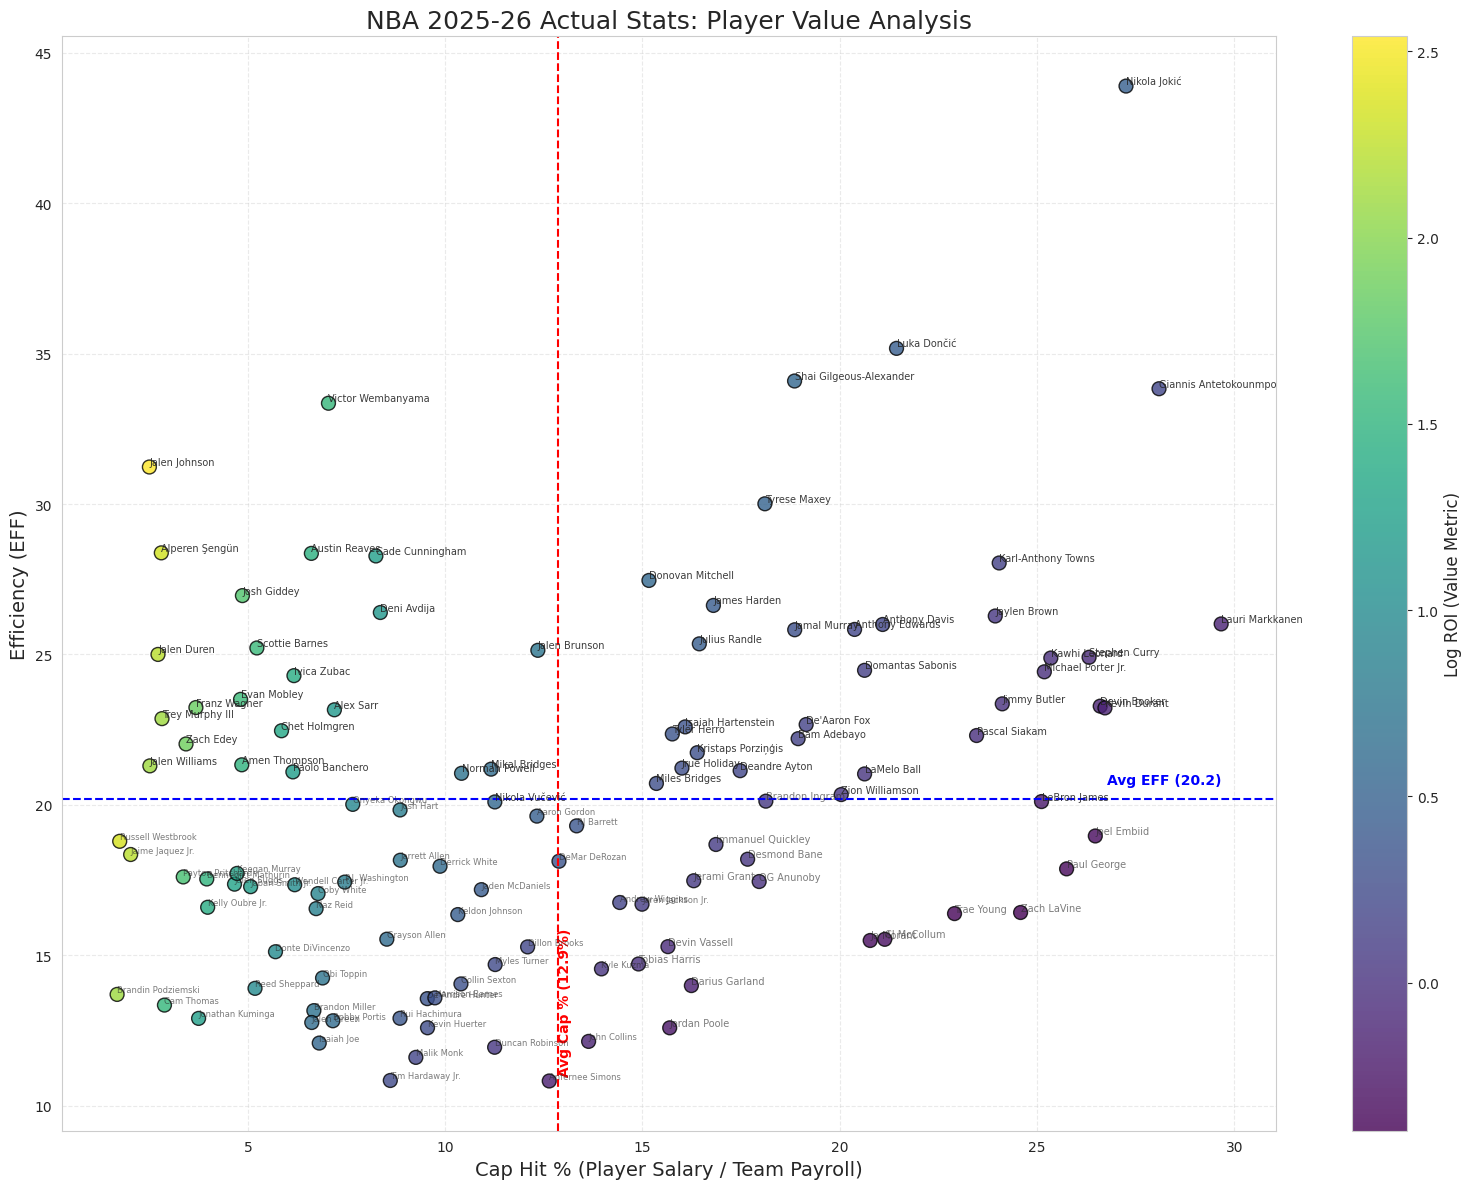

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import io


# ==========================================
# 1. DEFINE DATA: Player Salaries & Team Payrolls
# ==========================================

# A. Player Salaries (25-26) - Combined List
# I am pasting the data you provided in the previous turn
csv_content_full = """Rank,Player,Salary
1,Stephen Curry,55761217
2,Nikola Jokić,51415938
2,Joel Embiid,51415938
4,Kevin Durant,51179020
5,Bradley Beal,50203930
6,Karl-Anthony Towns,49205800
6,Paul George,49205800
6,Kawhi Leonard,49205800
6,Jaylen Brown,49205800
6,Devin Booker,49205800
11,Jimmy Butler,48798677
12,Damian Lillard,48787676
12,Giannis Antetokounmpo,48787676
14,LeBron James,48728845
15,Zach LaVine,44531940
16,Rudy Gobert,43827586
17,Anthony Davis,43219440
18,Luka Dončić,43031940
18,Trae Young,43031940
20,Fred VanVleet,42846615
21,Pascal Siakam,42176400
21,Lauri Markkanen,42176400
21,Tyrese Haliburton,42176400
21,Anthony Edwards,42176400
25,Kyrie Irving,40000000
26,Ben Simmons,39256083
27,Domantas Sabonis,39200000
28,Zion Williamson,36725670
28,Ja Morant,36725670
28,Darius Garland,36725670
31,OG Anunoby,36637932
32,Brandon Ingram,36016200
32,Jamal Murray,36016200
34,Shai Gilgeous-Alexander,35859950
34,Michael Porter Jr.,35859950
36,Donovan Mitchell,35410310
37,LaMelo Ball,35147000
37,Tyrese Maxey,35147000
39,De'Aaron Fox,34848340
39,Jayson Tatum,34848340
39,Bam Adebayo,34848340
42,Desmond Bane,34005250
43,Deandre Ayton,34005126
44,James Harden,33653846
45,CJ McCollum,33333333
46,Julius Randle,33073920
47,Immanuel Quickley,32500000
48,Khris Middleton,31000000
49,Isaiah Hartenstein,30000000
49,Jrue Holiday,30000000
51,Jerami Grant,29793104
52,Jordan Poole,29651786
53,Devin Vassell,29347826
54,Kristaps Porzingis,29268293
55,Tyler Herro,29000000
56,Dejounte Murray,28817135
57,Jonathan Isaac,27600000
58,Nicolas Claxton,27556817
59,Miles Bridges,27173913
60,John Collins,26580000
61,Andrew Wiggins,26276786
62,Anfernee Simons,25892857
63,RJ Barrett,25794643
64,Tobias Harris,25365854
65,Jaren Jackson Jr,25257798
66,Jalen Brunson,24960001
67,Terry Rozier,24924126
68,Kyle Kuzma,24456060
69,Draymond Green,24107143
70,DeMar DeRozan,23400000
71,Mikal Bridges,23300000
72,Dillon Brooks,23255493
73,Cameron Johnson,23062500
74,Bruce Brown,23000000
74,Brook Lopez,23000000
76,Aaron Gordon,22841455
77,Kentavious Caldwell-Pope,22757000
78,Jaden McDaniels,22586207
79,Malcolm Brogdon,22500000
80,Clint Capela,22265280
81,De'Andre Hunter,21696429
82,Lonzo Ball,21395348
83,Marcus Smart,20210285
84,Nikola Vucevic,20000000
84,Jarrett Allen,20000000
86,Myles Turner,19928500
87,Derrick White,19821429
88,Jakob Poeltl,19500000
89,Duncan Robinson,19406000
90,Norman Powell,19241379
91,Bojan Bogdanovic,19032850
92,Keldon Johnson,19000000
93,D'Angelo Russell,18692307
94,Collin Sexton,18150000
95,Josh Hart,18144000
96,Jusuf Nurkic,18125000
97,Harrison Barnes,18000000
97,Patrick Williams,18000000
99,Malik Monk,17405203
100,Bogdan Bogdanovic,17260000
101,Rui Hachimura,17000000
101,Luguentz Dort,17000000
103,Kevin Huerter,16830357
104,Zach Collins,16741200
105,Caris LeVert,16615384
106,Tim Hardaway Jr,16193183
107,Klay Thompson,15873016
108,Deni Avdija,15625000
108,Grayson Allen,15625000
110,PJ Washington,15500000
111,Max Strus,15212068
112,Isaiah Stewart,15000000
113,Dorian Finney-Smith,14924167
114,Mitchell Robinson,14318182
115,Jordan Clarkson,14092577
116,Onyeka Okongwu,14000000
117,Naz Reid,13986432
118,Cade Cunningham,13940809
119,Daniel Gafford,13394160
120,Dennis Schroeder,13025250
120,Grant Williams,13025250
122,Isaiah Joe,12991650
123,Herb Jones,12976362
123,Austin Reaves,12976362
125,Obi Toppin,12975000
126,Cole Anthony,12900000
127,De'Anthony Melton,12822000
128,Kelly Olynyk,12804878
129,Victor Wembanyama,12768664
130,Josh Green,12654321
131,Richaun Holmes,12648321
132,Steven Adams,12600000
133,Bobby Portis,12578286
134,Zaccharie Risacher,12569040
135,Marvin Bagley III,12500000
135,Brandon Clarke,12500000
137,Jalen Green,12483048
138,Robert Williams III,12428571
139,Paolo Banchero,12160800
140,Coby White,12000000
141,Wendell Carter Jr.,11950000
142,Ivica Zubac,11743210
143,PJ Tucker,11539000
144,Donte DiVincenzo,11445000
145,Brandon Miller,11424382
146,Terance Mann,11423077
147,Alex Sarr,11245680
148,Evan Mobley,11227657
149,Larry Nance Jr,11205000
150,Matisse Thybulle,11025000
155,Chris Paul,10983000
157,Chet Holmgren,10880640
160,Scoot Henderson,10259449
162,Scottie Barnes,10130980
163,Reed Sheppard,10098960
164,Mike Conley,9975962
165,Jonas Valanciunas,9900000
166,Alex Caruso,9890000
167,Jabari Smith Jr.,9770880
169,Al Horford,9500000
174,Amen Thompson,9249748
175,Jalen Suggs,9188385
177,Gary Payton II,9130000
182,Keegan Murray,8809560
183,Buddy Hield,8780488
188,Ausar Thompson,8376291
189,Josh Giddey,8352367
193,Jeff Green,8000000
195,Kelly Oubre Jr.,7983000
196,Jaden Ivey,7977240
200,Jonathan Kuminga,7636307
205,Bennedict Mathurin,7245720
207,Franz Wagner,7007092
211,Payton Pritchard,6696429
223,Malik Beasley,6000000
227,Moses Moody,5803269
228,Zach Edey,5756880
230,Jeremy Sochan,5570040
233,Alperen Sengun,5424654
239,Dario Saric,5168000
241,Trey Murphy III,5159854
243,Dereck Lively II,5014409
244,Andre Drummond,5000000
249,Jalen Williams,4775760
254,Nicolas Batum,4668000
256,Jalen Duren,4536840
258,Jalen Johnson,4510905
269,Cam Thomas,4041249
278,Kevin Love,3850000
281,Jaime Jaquez Jr.,3685800
283,Brandin Podziemski,3519960
292,Reggie Jackson,3303771
292,Markieff Morris,3303771
292,Patty Mills,3303771
292,Russell Westbrook,3303771
292,Spencer Dinwiddie,3303771
292,Seth Curry,3303771
292,Kyle Lowry,3303771
292,Joe Ingles,3303771
292,Mason Plumlee,3303771
292,DeAndre Jordan,3303771
292,Eric Gordon,3303771
313,Christian Braun,3089640
317,Christian Wood,3036040"""

player_salary_df = pd.read_csv(io.StringIO(csv_content_full))

# B. Team Payrolls (2025-26)
team_salary_csv = """Tm,Team_Payroll
CLE,228584160
NYK,207675639
GSW,207096665
DAL,204747445
MIN,202168478
BOS,199981489
LAL,194820805
HOU,194689411
LAC,194667024
PHI,194633727
ORL,193471232
TOR,192893610
DEN,187783472
PHX,187636387
NOP,186578145
POR,186375648
MIA,186052118
OKC,185946954
IND,184685075
SAC,184664407
SAS,182234835
ATL,182224969
MIL,176378563
CHA,174985866
CHI,174275854
MEM,171771255
DET,168792037
WAS,155678817
UTA,144085751
BKN,142211552"""

team_salary_df = pd.read_csv(io.StringIO(team_salary_csv))

# ==========================================
# 2. LOAD ACTUAL PLAYER STATS (25-26)
# ==========================================
# Paste the stats CSV content here
stats_csv_content = """Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
1,Luka Dončić,26,LAL,PG,19,19,37.3,10.6,23.1,.460,3.5,10.7,.324,7.2,12.4,.579,.535,9.9,12.3,.811,0.8,7.8,8.7,8.8,1.5,0.6,4.4,2.6,34.7,,doncilu01
2,Shai Gilgeous-Alexander,27,OKC,PG,25,25,33.2,10.8,19.4,.560,2.2,5.0,.437,8.6,14.3,.603,.617,8.6,9.7,.884,0.4,4.2,4.6,6.4,1.4,0.7,1.9,2.0,32.4,,gilgesh01
3,Tyrese Maxey,25,PHI,PG,23,23,39.9,10.7,22.9,.467,3.7,9.3,.391,7.0,13.6,.519,.546,6.4,7.3,.881,0.3,4.4,4.7,7.2,1.7,0.9,2.7,2.3,31.5,,maxeyty01
4,Donovan Mitchell,29,CLE,SG,25,25,34.5,10.7,21.6,.494,4.0,10.6,.381,6.6,11.0,.601,.587,5.3,6.3,.841,0.9,3.8,4.7,5.5,1.4,0.3,3.3,2.4,30.7,,mitchdo01
5,Nikola Jokić,30,DEN,C,25,25,35.0,10.7,17.5,.613,2.2,5.1,.433,8.5,12.4,.687,.676,6.2,7.4,.842,3.0,9.4,12.4,10.8,1.4,0.8,3.4,2.9,29.8,,jokicni01
6,Stephen Curry,37,GSW,PG,18,18,31.3,9.8,20.2,.484,5.2,12.6,.412,4.6,7.7,.601,.611,4.9,5.4,.907,0.4,3.3,3.7,3.9,1.3,0.6,3.1,2.1,29.6,,curryst01
7,Jaylen Brown,29,BOS,SF,25,25,33.8,10.8,21.5,.500,2.1,5.8,.361,8.7,15.8,.551,.548,5.7,7.4,.769,1.3,4.9,6.2,4.9,1.1,0.5,3.6,3.1,29.3,,brownja02
8,Giannis Antetokounmpo,31,MIL,PF,17,17,29.1,11.1,17.3,.639,0.6,1.4,.435,10.5,15.9,.657,.656,6.2,9.8,.635,3.3,6.8,10.1,6.1,0.9,0.9,3.3,2.8,28.9,,antetgi01
9,Jalen Brunson,29,NYK,PG,23,23,35.1,10.2,21.0,.487,2.8,7.4,.376,7.4,13.6,.546,.553,5.6,6.7,.838,0.5,2.7,3.1,6.4,0.7,0.1,2.3,2.4,28.8,,brunsja01
10,Anthony Edwards,24,MIN,SG,20,20,34.4,9.7,19.3,.500,3.4,8.1,.416,6.3,11.3,.560,.587,6.0,7.2,.833,0.8,4.2,4.9,3.8,1.2,0.8,3.0,2.1,28.7,,edwaran01
11,Lauri Markkanen,28,UTA,PF,24,24,35.3,9.3,19.8,.469,2.9,8.3,.352,6.4,11.5,.554,.543,6.3,7.0,.893,2.1,4.9,7.0,2.1,1.0,0.4,1.3,1.8,27.8,,markkla01
12,Austin Reaves,27,LAL,SG,21,21,36.9,8.5,16.9,.503,2.8,7.6,.369,5.7,9.2,.613,.586,8.0,9.1,.875,0.8,4.8,5.6,6.7,1.0,0.2,3.3,2.3,27.8,,reaveau01
13,Cade Cunningham,24,DET,PG,23,23,35.8,9.4,20.6,.457,2.1,6.4,.327,7.3,14.2,.515,.507,6.3,7.5,.832,1.3,4.7,6.0,9.2,1.5,0.8,3.7,3.3,27.1,,cunnica01
14,James Harden,36,LAC,PG,25,25,35.4,7.6,17.2,.440,3.6,9.5,.376,4.0,7.7,.518,.543,7.4,8.3,.885,0.6,4.6,5.2,8.1,1.3,0.4,3.9,2.2,26.0,,hardeja01
15,Victor Wembanyama,22,SAS,C,13,12,33.6,9.0,17.8,.504,1.6,4.5,.356,7.4,13.3,.555,.550,6.2,7.4,.844,2.0,10.6,12.6,3.8,1.1,3.5,3.7,3.5,25.8,,wembavi01
16,Michael Porter Jr.,27,BRK,SF,21,21,32.6,9.1,18.4,.497,3.6,9.0,.399,5.6,9.4,.591,.595,3.7,4.6,.813,1.1,6.2,7.3,3.2,0.9,0.2,2.3,2.2,25.6,,portemi01
17,Deni Avdija,25,POR,SF,26,26,34.2,7.6,16.2,.469,2.4,6.4,.377,5.2,9.8,.529,.544,7.8,9.6,.812,1.2,6.0,7.2,6.3,0.7,0.7,3.6,3.1,25.5,,avdijde01
18,Devin Booker,29,PHO,SG,23,23,34.5,8.1,17.8,.455,1.7,5.6,.302,6.4,12.2,.525,.502,7.2,8.3,.869,1.0,3.4,4.4,6.7,0.9,0.4,3.6,2.9,25.1,,bookede01
19,Kawhi Leonard,34,LAC,SF,16,16,32.6,9.1,18.6,.487,2.3,6.1,.371,6.8,12.6,.542,.547,4.6,4.8,.974,0.8,4.9,5.6,3.1,2.0,0.4,1.8,1.6,25.0,,leonaka01
20,Jamal Murray,28,DEN,PG,24,24,35.0,8.9,17.7,.501,3.2,7.1,.447,5.7,10.6,.537,.591,4.0,4.4,.896,0.4,4.0,4.4,6.8,1.1,0.3,2.3,1.6,24.9,,murraja01
21,Kevin Durant,37,HOU,SF,21,21,35.8,8.6,17.1,.501,1.8,4.5,.404,6.8,12.6,.536,.554,5.9,6.6,.891,0.3,4.3,4.6,4.0,1.0,0.8,3.0,2.4,24.8,,duranke01
22,Norman Powell,32,MIA,SG,21,21,30.9,8.0,16.2,.493,3.0,7.0,.429,5.0,9.2,.541,.585,5.4,6.3,.856,0.4,3.3,3.7,2.5,1.1,0.3,1.9,2.4,24.4,,powelno01
23,De'Aaron Fox,28,SAS,PG,17,17,32.9,8.4,17.1,.488,2.5,6.5,.391,5.8,10.6,.547,.562,4.6,5.5,.840,0.8,2.8,3.6,6.2,1.4,0.3,3.2,2.4,23.9,,foxde01
24,Pascal Siakam,31,IND,PF,25,25,34.0,8.7,18.3,.476,1.7,4.7,.359,7.0,13.6,.516,.522,4.6,6.7,.690,1.6,5.3,6.8,4.0,1.2,0.4,2.1,2.8,23.8,,siakapa01
25,Keyonte George,22,UTA,PG,25,25,33.7,7.3,16.3,.450,2.3,6.6,.352,5.0,9.7,.517,.521,6.5,7.2,.906,0.5,3.6,4.0,6.8,0.8,0.3,3.5,2.5,23.5,,georgke01
26,Alperen Şengün,23,HOU,C,21,21,36.2,8.8,17.5,.500,1.0,2.7,.351,7.8,14.8,.527,.527,5.0,6.8,.739,3.0,6.4,9.4,7.1,1.5,1.0,3.4,3.5,23.5,,sengual01
27,Tyler Herro,26,MIA,SG,6,6,31.8,8.3,16.5,.505,2.5,6.2,.405,5.8,10.3,.565,.581,4.0,4.3,.923,0.5,4.5,5.0,2.3,1.0,0.5,1.2,1.5,23.2,,herroty01
28,Julius Randle,31,MIN,PF,26,26,33.8,7.7,15.6,.495,1.8,5.0,.354,6.0,10.6,.562,.552,5.8,7.0,.831,1.6,5.7,7.3,5.8,1.0,0.2,2.7,2.6,23.1,,randlju01
29,Jalen Johnson,24,ATL,SF,24,24,35.1,8.3,16.0,.516,1.5,4.0,.385,6.7,12.0,.559,.564,4.7,5.8,.813,1.5,8.9,10.5,8.2,1.6,0.4,3.3,2.2,22.8,,johnsja05
30,Franz Wagner,24,ORL,SF,24,24,33.4,7.8,15.9,.490,1.5,4.2,.360,6.3,11.8,.535,.537,5.6,6.8,.823,1.5,4.6,6.1,3.7,1.2,0.4,1.8,2.2,22.7,,wagnefr01
31,Karl-Anthony Towns,30,NYK,C,24,24,33.2,7.3,15.4,.474,1.9,5.2,.360,5.4,10.2,.533,.535,5.9,6.7,.882,3.1,8.8,11.9,3.2,0.8,0.8,2.4,3.4,22.4,,townska01
32,Brandon Ingram,28,TOR,SF,27,27,34.2,8.1,17.1,.472,1.6,4.6,.352,6.4,12.5,.516,.519,4.0,4.9,.812,0.7,5.1,5.8,3.9,0.9,0.6,3.1,2.0,21.8,,ingrabr01
33,Shaedon Sharpe,22,POR,SG,22,16,28.5,7.9,17.3,.454,1.9,6.1,.306,6.0,11.2,.534,.508,4.1,5.2,.791,1.2,3.4,4.6,2.4,1.4,0.2,2.8,2.3,21.7,,sharpsh01
34,Coby White,25,CHI,SG,9,7,29.2,6.8,15.8,.430,2.0,7.4,.269,4.8,8.3,.573,.493,6.1,7.6,.809,0.2,3.0,3.2,5.0,0.7,0.0,2.8,2.1,21.7,,whiteco01
35,Zion Williamson,25,NOP,PF,11,10,30.5,7.4,14.5,.509,0.0,0.3,.000,7.4,14.2,.519,.509,7.0,9.6,.726,2.3,3.4,5.6,3.8,1.5,0.5,2.9,2.1,21.7,,willizi01
36,Dillon Brooks,30,PHO,SF,20,20,30.8,7.9,17.6,.449,2.4,7.3,.322,5.6,10.3,.539,.516,3.4,4.1,.829,0.8,2.2,3.0,1.8,1.4,0.1,2.3,3.6,21.6,,brookdi01
37,Cam Thomas,24,BRK,SG,8,8,28.3,6.6,16.5,.402,2.0,5.6,.356,4.6,10.9,.425,.462,6.1,7.0,.875,0.4,1.0,1.4,2.6,0.5,0.1,2.0,1.9,21.4,,thomaca02
38,Miles Bridges,27,CHO,PF,26,26,34.8,7.5,17.2,.433,2.5,7.7,.320,5.0,9.5,.524,.504,4.0,4.7,.844,1.0,5.3,6.3,3.8,0.6,0.5,1.5,1.8,21.3,,bridgmi02
39,Trey Murphy III,25,NOP,SF,25,25,35.5,7.4,15.2,.489,2.7,7.4,.360,4.8,7.8,.613,.578,3.6,4.0,.899,1.5,5.0,6.5,3.5,1.7,0.2,2.0,2.2,21.1,,murphtr02
40,Paolo Banchero,23,ORL,PF,16,16,31.6,6.5,14.5,.448,1.1,4.0,.266,5.4,10.5,.518,.485,6.4,8.3,.780,0.9,7.0,7.9,3.8,0.6,0.8,2.6,2.3,20.5,,banchpa01
41,Joel Embiid,31,PHI,C,11,11,26.2,6.8,16.2,.421,1.1,4.8,.226,5.7,11.4,.504,.455,5.7,7.0,.818,1.8,4.8,6.6,2.8,0.8,1.3,2.5,2.0,20.5,,embiijo01
42,Nickeil Alexander-Walker,27,ATL,SG,25,22,32.7,6.9,15.2,.453,2.9,7.4,.391,4.0,7.8,.510,.547,3.7,4.3,.869,0.8,2.8,3.6,3.4,1.0,0.7,2.2,2.2,20.4,,alexani01
43,Zach LaVine,30,SAC,SG,23,23,32.8,7.2,14.7,.487,2.7,7.0,.385,4.5,7.7,.579,.578,3.1,3.6,.867,0.3,2.7,3.0,2.3,0.7,0.2,2.2,2.2,20.2,,lavinza01
44,Josh Giddey,23,CHI,PG,23,23,33.7,7.0,14.7,.478,1.8,4.5,.398,5.2,10.2,.513,.539,4.3,5.8,.752,1.3,8.0,9.3,8.8,1.0,0.4,3.7,1.9,20.1,,giddejo01
45,Bennedict Mathurin,23,IND,SF,15,15,32.6,6.1,13.6,.446,2.6,6.3,.411,3.5,7.3,.477,.542,5.3,6.3,.851,0.9,4.6,5.5,2.3,0.7,0.2,2.7,3.1,20.1,,mathube01
46,Anthony Davis,32,DAL,PF,11,11,29.5,8.2,15.8,.517,0.6,2.0,.318,7.5,13.8,.546,.537,3.0,4.3,.702,3.2,7.4,10.5,3.2,1.4,1.6,1.8,2.2,20.0,,davisan02
47,Jerami Grant,31,POR,PF,25,13,30.0,6.0,13.6,.438,2.5,6.3,.395,3.5,7.3,.475,.529,5.6,6.4,.863,1.1,2.7,3.8,2.6,0.8,0.6,2.2,3.0,20.0,,grantje01
48,Scottie Barnes,24,TOR,PF,27,27,33.9,7.6,15.1,.501,1.4,3.6,.378,6.2,11.5,.540,.546,3.1,3.7,.838,2.1,5.8,7.9,5.3,1.4,1.6,2.5,3.2,19.6,,barnesc01
49,LaMelo Ball,24,CHO,PG,16,16,28.9,6.7,17.3,.386,2.4,8.6,.285,4.3,8.8,.486,.457,3.6,4.1,.877,1.1,4.9,6.0,8.5,1.1,0.2,3.3,3.1,19.4,,ballla01
50,RJ Barrett,25,TOR,SF,17,17,30.9,7.1,13.9,.506,1.8,5.1,.356,5.2,8.8,.593,.572,3.4,4.7,.725,0.7,4.1,4.8,3.8,0.8,0.2,1.5,2.6,19.4,,barrerj01
51,Kevin Porter Jr.,25,MIL,PG,8,8,29.4,6.4,12.5,.510,2.8,5.3,.524,3.6,7.3,.500,.620,3.8,4.3,.882,0.6,3.6,4.3,6.9,2.3,0.3,2.9,2.1,19.3,,porteke02
52,Bam Adebayo,28,MIA,C,20,20,30.9,6.9,14.4,.481,1.7,4.9,.340,5.3,9.5,.553,.538,3.8,4.8,.781,1.4,7.7,9.0,2.5,1.0,0.9,1.8,1.3,19.2,,adebaba01
53,Kristaps Porziņģis,30,ATL,C,13,12,25.9,6.4,12.8,.497,1.8,5.1,.364,4.5,7.8,.584,.569,4.5,5.3,.855,1.5,4.2,5.6,3.1,0.5,1.6,0.9,3.4,19.2,,porzikr01
54,Jimmy Butler,36,GSW,SF,23,23,31.2,5.8,11.4,.510,0.9,2.0,.444,5.0,9.5,.523,.548,6.6,7.8,.849,2.3,3.6,5.9,5.0,1.6,0.2,1.4,1.3,19.1,,butleji01
55,Evan Mobley,24,CLE,PF,25,25,34.2,7.0,14.1,.496,1.5,4.3,.352,5.5,9.8,.559,.550,3.6,5.6,.640,2.6,6.7,9.3,4.1,1.0,1.6,2.2,2.4,19.1,,mobleev01
56,Alex Sarr,20,WAS,C,16,16,29.7,7.8,15.1,.515,1.1,3.3,.346,6.6,11.8,.561,.552,2.4,3.8,.639,2.4,6.2,8.6,3.3,0.8,2.0,2.1,2.1,19.1,,sarral01
57,Desmond Bane,27,ORL,SG,26,26,33.4,6.8,15.3,.446,1.8,5.1,.353,5.0,10.2,.492,.505,3.5,3.7,.938,1.3,3.2,4.5,4.6,0.8,0.3,2.1,3.2,19.0,,banede01
58,Kon Knueppel,20,CHO,SF,26,25,34.0,6.7,14.2,.472,3.4,8.5,.405,3.3,5.7,.570,.592,2.2,2.4,.921,1.0,4.4,5.4,3.5,0.7,0.2,2.3,2.4,19.0,,knuepko01
59,CJ McCollum,34,WAS,SG,24,24,30.4,6.8,15.3,.443,3.0,7.3,.403,3.8,8.0,.479,.539,2.4,3.0,.781,0.5,2.7,3.2,3.4,0.7,0.3,1.6,2.3,18.9,,mccolcj01
60,Aaron Gordon,30,DEN,PF,13,13,28.3,6.3,11.8,.532,2.2,4.8,.444,4.2,7.0,.593,.623,4.0,4.6,.867,1.5,4.5,5.9,1.3,0.8,0.2,1.4,1.8,18.8,,gordoaa01
61,Chet Holmgren,23,OKC,PF,22,22,28.8,7.0,12.2,.575,1.5,3.8,.393,5.5,8.4,.658,.636,3.2,4.1,.789,1.5,6.5,8.0,1.6,0.6,1.5,2.0,3.0,18.7,,holmgch01
62,Stephon Castle,21,SAS,PG,16,16,31.2,6.3,12.5,.505,1.1,3.9,.286,5.2,8.6,.606,.550,4.7,6.5,.721,1.6,4.5,6.1,6.9,1.4,0.3,4.1,3.7,18.4,,castlst01
63,Cooper Flagg,19,DAL,SF,26,26,34.0,7.0,14.6,.482,0.8,3.4,.250,6.2,11.2,.551,.511,3.5,4.3,.805,1.2,5.1,6.3,3.5,1.3,0.7,2.2,2.3,18.4,,flaggco01
64,Jalen Duren,22,DET,C,23,23,29.0,6.7,10.3,.648,0.0,0.0,,6.7,10.3,.648,.648,4.7,6.3,.747,4.0,7.0,11.0,1.7,0.8,1.0,2.4,3.3,18.0,,durenja01
65,Derrick White,31,BOS,SG,25,25,33.2,6.1,15.4,.396,3.1,9.2,.338,3.0,6.2,.484,.497,2.4,2.8,.845,0.8,3.2,4.1,5.0,1.4,1.2,1.9,2.0,17.8,,whitede01
66,Trae Young,27,ATL,PG,5,5,27.8,5.2,14.0,.371,1.0,5.2,.192,4.2,8.8,.477,.407,6.4,7.8,.821,0.0,2.0,2.0,7.8,0.8,0.2,2.0,1.8,17.8,,youngtr01
67,DeMar DeRozan,36,SAC,PF,26,26,32.8,6.5,13.0,.501,0.8,2.0,.392,5.7,11.0,.521,.531,3.9,4.3,.894,0.5,2.6,3.2,3.4,1.3,0.2,1.0,2.1,17.7,,derozde01
68,Ja Morant,26,MEM,PG,14,14,28.0,5.8,16.2,.357,0.9,4.8,.194,4.9,11.4,.425,.385,5.2,5.6,.924,0.5,3.0,3.5,7.5,0.9,0.2,3.6,2.1,17.7,,moranja01
69,Jordan Poole,26,NOP,PG,9,4,29.6,5.4,14.8,.368,2.8,8.8,.316,2.7,6.0,.444,.462,4.0,4.1,.973,0.3,1.3,1.7,3.4,0.6,0.3,1.9,2.2,17.7,,poolejo01
70,LeBron James,41,LAL,SF,9,9,33.8,6.7,14.2,.469,1.3,4.6,.293,5.3,9.7,.552,.516,2.9,4.7,.619,0.8,4.9,5.7,7.2,0.8,0.8,2.7,1.7,17.6,,jamesle01
71,Jaren Jackson Jr.,26,MEM,C,24,24,29.4,6.5,13.6,.479,1.6,4.6,.345,4.9,9.0,.546,.537,2.8,3.7,.761,0.9,4.1,5.0,2.0,0.8,1.2,2.0,4.0,17.4,,jacksja02
72,Brandon Miller,23,CHO,SF,10,10,28.2,6.0,16.5,.364,2.5,8.1,.309,3.5,8.4,.417,.439,2.9,3.4,.853,1.1,2.7,3.8,3.5,0.8,1.1,2.5,2.7,17.4,,millebr02
73,Andrew Nembhard,26,IND,PG,18,18,31.2,5.7,13.6,.420,1.7,5.0,.344,4.0,8.6,.465,.484,4.1,4.8,.851,0.4,1.9,2.3,6.6,0.9,0.2,2.2,2.3,17.3,,nembhan01
74,Amen Thompson,23,HOU,PG,23,23,36.5,6.7,14.0,.480,0.4,2.1,.188,6.3,12.0,.531,.494,3.5,4.3,.808,2.7,4.7,7.3,5.3,1.3,0.5,2.5,2.6,17.3,,thompam01
75,Jalen Williams,24,OKC,SG,7,7,28.7,6.4,14.3,.450,0.9,2.7,.316,5.6,11.6,.481,.480,3.6,3.7,.962,0.4,5.0,5.4,5.9,1.6,0.7,1.6,1.9,17.3,,willija06
76,Domantas Sabonis,29,SAC,C,11,11,33.2,6.7,13.2,.510,0.4,1.8,.200,6.4,11.4,.560,.524,3.4,4.6,.725,3.4,8.9,12.3,3.7,1.2,0.2,2.5,4.0,17.2,,sabondo01
77,Paul George,35,PHI,PF,10,10,26.2,5.7,12.9,.442,2.6,6.0,.433,3.1,6.9,.449,.543,3.1,3.6,.861,0.4,4.6,5.0,3.3,1.4,0.4,1.7,1.5,17.1,,georgpa01
78,Ryan Rollins,23,MIL,PG,27,26,31.7,6.6,13.9,.473,2.2,5.7,.387,4.4,8.2,.534,.553,1.6,2.0,.782,0.7,3.3,4.0,6.0,1.6,0.3,2.6,2.8,17.0,,rolliry01
79,Kelly Oubre Jr.,30,PHI,SF,12,12,34.8,6.2,12.4,.497,1.9,5.6,.343,4.3,6.8,.622,.574,2.5,3.2,.789,1.2,3.9,5.1,1.3,1.1,0.8,1.5,2.7,16.8,,oubreke01
80,Jrue Holiday,35,POR,PG,12,12,33.4,6.2,13.8,.446,2.6,7.1,.365,3.6,6.8,.531,.539,1.8,2.1,.840,1.3,3.9,5.3,8.3,1.6,0.3,2.9,2.0,16.7,,holidjr01
81,Payton Pritchard,28,BOS,PG,26,26,32.4,6.2,14.0,.440,2.7,8.1,.333,3.5,5.9,.584,.536,1.7,1.9,.860,1.0,3.2,4.3,5.0,0.7,0.1,1.2,1.7,16.7,,pritcpa01
82,Andrew Wiggins,30,MIA,SF,23,23,32.9,6.5,13.6,.481,1.8,4.7,.380,4.7,8.9,.534,.546,1.7,2.5,.702,1.5,3.3,4.8,2.9,1.1,1.2,1.8,2.5,16.6,,wiggian01
83,Immanuel Quickley,26,TOR,PG,26,26,32.3,6.0,12.8,.471,2.5,6.7,.379,3.5,6.1,.572,.571,1.8,2.5,.738,0.4,3.8,4.2,6.1,1.2,0.0,1.8,2.2,16.5,,quickim01
84,Mikal Bridges,29,NYK,SF,25,25,34.8,6.5,12.3,.526,2.2,5.4,.407,4.3,6.9,.618,.615,1.2,1.5,.816,1.2,3.4,4.6,4.2,1.9,1.1,1.0,2.3,16.4,,bridgmi01
85,Grayson Allen,30,PHO,SG,18,18,31.1,5.6,12.9,.431,3.2,8.2,.392,2.3,4.7,.500,.556,2.0,2.5,.800,0.5,2.2,2.7,4.1,1.7,0.2,1.7,2.4,16.3,,allengr01
86,OG Anunoby,28,NYK,PF,16,16,31.3,5.9,12.1,.487,2.5,6.1,.408,3.4,5.9,.568,.591,1.9,2.4,.795,1.4,4.0,5.4,2.0,1.9,0.7,1.9,2.4,16.2,,anunoog01
87,Quentin Grimes,25,PHI,SG,24,6,33.4,5.2,11.8,.440,2.4,6.5,.369,2.8,5.2,.528,.543,3.4,4.0,.863,0.8,3.4,4.2,4.5,0.9,0.4,2.6,2.0,16.2,,grimequ01
88,P.J. Washington,27,DAL,PF,22,22,31.9,6.0,13.5,.443,1.5,4.7,.330,4.4,8.8,.503,.500,2.7,4.0,.674,1.5,6.4,7.9,2.1,1.1,1.2,2.5,2.5,16.2,,washipj01
89,Ivica Zubac,28,LAC,C,26,26,32.8,7.1,11.6,.613,0.0,0.0,,7.1,11.6,.613,.613,2.0,2.8,.699,3.5,8.0,11.5,2.5,0.5,1.0,2.0,2.7,16.2,,zubaciv01
90,Onyeka Okongwu,25,ATL,C,26,15,30.8,6.0,12.2,.495,1.9,5.2,.360,4.2,7.0,.597,.573,2.2,2.8,.757,1.8,5.8,7.5,3.1,0.9,1.2,2.1,3.5,16.1,,okongon01
91,Jaden McDaniels,25,MIN,PF,25,25,32.8,6.1,11.9,.515,1.5,3.6,.418,4.6,8.2,.558,.579,2.0,2.4,.850,1.3,3.4,4.7,2.6,1.2,1.0,1.9,3.6,15.8,,mcdanja02
92,Jeremiah Fears,19,NOP,PG,27,25,27.6,5.9,13.1,.448,1.2,3.3,.364,4.7,9.9,.476,.493,2.7,3.4,.802,0.6,2.8,3.4,3.1,1.4,0.1,2.3,2.1,15.7,,fearsje01
93,Devin Vassell,25,SAS,SG,25,25,32.4,5.5,12.7,.431,2.8,7.0,.397,2.7,5.8,.472,.539,2.0,2.3,.877,0.4,3.4,3.8,2.6,1.0,0.5,1.0,2.3,15.7,,vassede01
94,Nikola Vučević,35,CHI,C,24,24,30.1,6.3,13.1,.478,1.8,4.8,.379,4.4,8.3,.535,.548,1.3,1.6,.769,2.3,6.9,9.1,3.4,0.7,0.3,1.7,2.3,15.6,,vucevni01
95,Darius Garland,26,CLE,PG,11,11,30.0,5.0,13.8,.362,1.8,6.5,.282,3.2,7.4,.432,.428,3.6,4.2,.870,0.6,2.3,2.9,6.5,0.8,0.2,2.8,1.8,15.5,,garlada01
96,Jalen Green,23,PHO,SG,2,2,15.0,5.5,11.5,.478,3.0,7.0,.429,2.5,4.5,.556,.609,1.5,2.5,.600,1.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,15.5,,greenja05
97,Aaron Nesmith,26,IND,SF,11,11,30.5,4.9,13.4,.367,2.8,7.5,.373,2.1,5.8,.359,.473,2.8,3.5,.795,1.5,2.9,4.5,1.5,0.8,0.3,0.7,2.5,15.5,,nesmiaa01
98,Collin Sexton,27,CHO,SG,21,10,25.2,5.2,10.7,.489,1.2,3.4,.366,4.0,7.3,.545,.547,3.8,4.3,.879,0.4,1.8,2.2,4.2,0.7,0.2,2.5,1.9,15.5,,sextoco01
99,De'Andre Hunter,28,CLE,SF,23,23,28.6,5.2,12.2,.429,1.9,6.3,.303,3.3,5.9,.563,.507,3.0,3.6,.843,0.7,3.6,4.3,2.3,0.7,0.1,1.6,2.8,15.4,,huntede01
100,Jaime Jaquez Jr.,24,MIA,SF,25,0,29.2,6.2,12.1,.513,0.3,1.5,.216,5.9,10.6,.555,.526,2.6,3.4,.767,1.4,4.4,5.8,5.0,0.8,0.2,2.2,2.3,15.4,,jaqueja01
101,Jabari Smith Jr.,22,HOU,PF,22,22,34.0,5.5,12.0,.458,2.1,5.6,.371,3.4,6.4,.536,.545,2.3,2.9,.797,1.5,5.3,6.7,2.0,0.7,0.8,1.4,3.1,15.4,,smithja05
102,Jalen Suggs,24,ORL,PG,21,21,25.6,5.4,11.4,.471,2.0,6.1,.328,3.4,5.3,.634,.558,2.7,3.1,.862,0.8,3.0,3.7,4.8,1.9,0.6,2.7,3.0,15.4,,suggsja01
103,Deandre Ayton,27,LAL,C,23,23,29.4,7.1,10.0,.710,0.0,0.0,,7.1,10.0,.710,.710,1.0,1.7,.632,2.9,6.0,9.0,0.9,0.8,1.0,2.0,2.7,15.3,,aytonde01
104,Ayo Dosunmu,26,CHI,SG,20,7,27.8,5.5,10.5,.519,1.9,4.0,.475,3.6,6.5,.546,.610,2.4,2.8,.857,0.4,2.3,2.7,3.2,0.6,0.3,1.4,1.8,15.2,,dosunay01
105,VJ Edgecombe,20,PHI,SG,22,22,35.0,5.6,13.3,.421,2.0,5.3,.388,3.5,8.0,.443,.498,2.0,2.6,.772,1.7,3.9,5.6,4.0,1.3,0.5,1.7,3.3,15.2,,edgecvj01
106,Kyshawn George,22,WAS,SF,22,22,31.4,5.3,11.4,.462,2.5,5.6,.439,2.8,5.8,.484,.570,1.9,2.5,.732,0.9,5.0,5.8,4.9,1.1,0.9,3.3,4.2,14.9,,georgky01
107,Keegan Murray,25,SAC,PF,11,10,37.0,5.8,13.5,.430,1.5,5.5,.262,4.4,8.0,.545,.483,1.8,2.5,.714,1.8,5.6,7.5,1.5,1.6,1.7,1.1,2.2,14.9,,murrake02
108,Walker Kessler,24,UTA,C,5,5,30.8,5.2,7.4,.703,1.2,1.6,.750,4.0,5.8,.690,.784,2.8,4.0,.700,4.6,6.2,10.8,3.0,1.4,1.8,3.2,4.4,14.4,,kesslwa01
109,Tobias Harris,33,DET,PF,16,16,29.3,5.1,11.3,.448,1.6,4.6,.356,3.4,6.8,.509,.519,2.5,3.0,.833,0.9,4.1,5.1,2.4,0.6,0.3,1.1,2.4,14.3,,harrito02
110,Saddiq Bey,26,NOP,SF,26,18,29.2,5.1,11.4,.446,1.7,5.1,.341,3.3,6.3,.530,.522,2.3,3.0,.766,1.9,4.1,6.0,2.3,1.0,0.1,0.6,1.0,14.2,,beysa01
111,Jarrett Allen,27,CLE,C,16,16,25.9,5.3,9.4,.563,0.0,0.3,.000,5.3,9.2,.578,.563,3.4,4.4,.761,2.3,5.0,7.3,1.8,0.9,0.8,1.6,1.5,14.0,,allenja01
112,Ajay Mitchell,23,OKC,SG,26,7,26.2,5.0,10.6,.467,1.1,3.2,.354,3.8,7.5,.515,.520,3.0,3.3,.885,0.5,2.8,3.3,3.7,1.5,0.3,1.6,2.0,14.0,,mitchaj01
113,Obi Toppin,27,IND,PF,3,0,27.3,5.0,12.0,.417,1.0,5.7,.176,4.0,6.3,.632,.458,3.0,3.0,1.000,1.0,5.7,6.7,1.7,1.0,0.0,2.0,2.3,14.0,,toppiob01
114,Sam Merrill,29,CLE,SG,12,8,25.9,4.5,9.7,.466,3.7,8.3,.444,0.8,1.4,.588,.655,1.3,1.3,.938,0.8,1.3,2.1,2.3,0.5,0.3,0.8,2.9,13.9,,merrisa01
115,Naz Reid,26,MIN,C,26,0,26.3,5.2,11.3,.461,2.4,6.2,.391,2.8,5.2,.545,.568,1.0,1.3,.765,1.2,5.0,6.1,2.5,1.0,0.8,1.4,2.6,13.9,,reidna01
116,Russell Westbrook,37,SAC,SF,26,20,28.7,5.2,11.9,.432,1.8,5.0,.359,3.3,6.9,.486,.508,1.7,2.5,.652,1.5,5.3,6.8,7.3,1.4,0.2,3.3,2.4,13.8,,westbru01
117,Donte DiVincenzo,29,MIN,SG,26,26,31.3,4.4,10.7,.415,3.0,8.0,.380,1.4,2.7,.522,.558,1.8,2.2,.821,0.9,3.2,4.1,3.8,1.2,0.5,1.3,2.4,13.7,,divindo01
118,Matas Buzelis,21,CHI,PF,25,25,28.2,5.0,10.5,.471,1.4,4.4,.324,3.5,6.1,.579,.540,2.2,2.7,.824,1.2,4.4,5.5,1.6,0.9,1.4,1.9,2.8,13.6,,buzelma01
119,Zach Edey,23,MEM,C,11,11,25.8,5.6,8.9,.633,0.1,0.5,.200,5.5,8.5,.656,.638,2.3,2.9,.781,3.9,7.2,11.1,1.1,0.6,1.9,2.4,3.4,13.6,,edeyza01
120,Kyle Kuzma,30,MIL,PF,26,12,26.2,5.2,10.1,.515,0.9,2.7,.329,4.3,7.4,.583,.559,2.2,3.0,.731,0.9,3.7,4.6,2.2,0.8,0.5,1.6,2.4,13.5,,kuzmaky01
121,Nic Claxton,26,BRK,C,25,25,30.2,5.1,9.3,.552,0.0,0.4,.091,5.1,8.8,.575,.554,3.2,4.5,.705,2.7,4.9,7.6,4.4,0.7,1.3,1.5,2.2,13.4,,claxtni01
122,Noah Clowney,21,BRK,PF,25,19,28.0,4.0,9.6,.417,2.3,6.4,.360,1.7,3.2,.532,.538,3.0,3.7,.826,0.7,3.0,3.8,1.8,0.6,0.8,1.8,2.7,13.4,,clownno01
123,Cedric Coward,22,MEM,SG,26,13,27.1,4.8,10.5,.462,1.5,4.5,.322,3.4,6.0,.568,.531,2.3,2.7,.843,1.4,4.8,6.2,2.8,0.5,0.3,1.6,2.1,13.4,,cowarce01
124,Rui Hachimura,27,LAL,PF,24,24,32.9,5.1,9.6,.532,1.9,4.2,.460,3.2,5.5,.588,.632,1.1,1.5,.750,0.8,3.0,3.9,0.8,0.5,0.2,0.9,1.8,13.3,,hachiru01
125,Mark Williams,24,PHO,C,22,19,25.0,5.2,7.9,.665,0.0,0.0,1.000,5.2,7.8,.663,.668,2.8,3.7,.756,3.1,5.2,8.3,1.1,1.3,0.9,1.0,2.6,13.3,,willima07
126,Harrison Barnes,33,SAS,PF,25,25,31.0,4.6,9.6,.477,2.4,5.8,.410,2.2,3.9,.577,.600,1.6,1.9,.854,0.9,2.5,3.4,2.3,1.1,0.2,1.3,1.7,13.2,,barneha02
127,Santi Aldama,25,MEM,PF,26,4,26.6,5.0,10.6,.467,1.5,4.4,.330,3.5,6.2,.565,.536,1.7,2.5,.667,1.3,5.0,6.3,3.0,1.0,0.7,1.0,1.4,13.1,,aldamsa01
128,Dylan Harper,19,SAS,SG,15,0,21.9,5.1,11.0,.461,0.7,2.5,.263,4.4,8.5,.520,.491,2.3,3.2,.708,1.0,2.1,3.1,3.7,0.9,0.1,1.7,2.5,13.1,,harpedy01
129,Jaylon Tyson,23,CLE,SG,22,16,28.2,5.0,9.4,.527,2.1,4.5,.465,2.9,4.9,.583,.638,1.1,1.5,.781,2.0,3.7,5.7,1.9,1.0,0.6,0.9,3.5,13.1,,tysonja01
130,Anthony Black,22,ORL,PG,26,6,28.5,4.7,10.7,.441,1.1,3.6,.298,3.7,7.1,.514,.491,2.5,3.6,.681,0.7,3.4,4.0,3.3,1.3,0.7,2.2,2.5,13.0,,blackan01
131,Collin Gillespie,26,PHO,PG,26,7,27.4,4.6,10.5,.436,2.8,6.7,.425,1.7,3.8,.455,.571,1.0,1.2,.867,1.0,2.8,3.8,4.8,1.2,0.3,1.8,1.4,13.0,,gilleco01
132,Malik Monk,27,SAC,SG,23,0,24.0,4.7,10.7,.435,1.9,4.7,.411,2.7,6.0,.453,.524,1.8,2.0,.872,0.4,1.7,2.1,2.5,0.8,0.5,1.2,1.8,13.0,,monkma01
133,Anfernee Simons,26,BOS,SG,26,0,23.7,4.6,10.7,.430,2.3,6.1,.380,2.3,4.6,.496,.538,1.5,1.7,.886,0.3,1.7,2.1,2.5,0.5,0.2,1.0,2.0,13.0,,simonan01
134,Isaiah Joe,26,OKC,SG,17,0,23.4,3.9,8.6,.456,2.9,6.9,.419,1.1,1.8,.600,.622,2.1,2.3,.923,0.5,2.3,2.8,1.5,0.6,0.2,0.9,1.8,12.9,,joeis01
135,Reed Sheppard,21,HOU,SG,23,4,25.2,4.8,10.4,.463,2.6,5.9,.437,2.3,4.6,.495,.585,0.7,1.0,.696,0.3,2.8,3.1,3.1,1.6,0.6,1.3,2.0,12.9,,sheppre01
136,Naji Marshall,28,DAL,SF,27,8,28.0,4.4,8.4,.527,1.0,3.1,.313,3.4,5.3,.650,.584,3.0,3.8,.804,0.9,3.9,4.7,2.5,1.1,0.1,1.1,2.1,12.8,,marshna01
137,Keldon Johnson,26,SAS,SF,25,0,23.6,4.8,8.5,.568,0.9,2.6,.348,3.9,5.9,.667,.622,2.1,2.8,.746,2.0,4.5,6.5,1.6,0.8,0.1,1.0,2.0,12.7,,johnske04
138,Derik Queen,21,NOP,C,27,15,25.2,4.8,9.5,.504,0.1,0.7,.111,4.7,8.8,.534,.508,3.1,3.9,.798,1.6,4.8,6.4,4.1,1.0,0.8,2.3,3.3,12.7,,queende01
139,Dennis Schröder,32,SAC,PG,19,12,28.9,4.6,11.5,.399,1.6,4.5,.349,3.0,6.9,.432,.468,1.9,2.4,.783,0.4,3.1,3.5,5.8,0.8,0.2,1.9,1.9,12.6,,schrode01
140,Jaylen Wells,22,MEM,SG,26,26,26.8,4.3,9.6,.446,1.8,5.0,.364,2.5,4.6,.533,.540,2.2,2.8,.795,1.0,2.6,3.6,1.7,0.7,0.0,0.8,2.1,12.6,,wellsja01
141,Tre Jones,26,CHI,PG,19,11,28.2,4.2,8.2,.506,0.4,1.6,.258,3.7,6.6,.568,.532,3.7,4.4,.855,0.6,2.5,3.1,4.9,1.6,0.3,1.5,1.6,12.5,,jonestr01
142,Josh Hart,30,NYK,SF,24,10,29.7,4.7,9.1,.511,1.5,4.0,.381,3.1,5.1,.615,.596,1.5,1.9,.822,1.7,6.0,7.7,5.0,1.4,0.3,2.1,2.6,12.4,,hartjo01
143,Jonathan Kuminga,23,GSW,PF,17,13,25.6,4.5,10.4,.438,0.9,2.9,.320,3.6,7.4,.484,.483,2.4,3.2,.741,1.6,4.7,6.3,2.6,0.3,0.4,2.5,1.8,12.4,,kuminjo01
144,Toumani Camara,25,POR,PF,26,26,33.1,4.4,10.7,.415,2.3,7.0,.337,2.1,3.7,.563,.525,1.1,1.6,.707,1.9,3.3,5.2,2.8,1.1,0.5,2.0,3.3,12.3,,camarto01
145,Duncan Robinson,31,DET,SF,24,24,31.1,4.0,9.2,.441,3.0,7.3,.403,1.1,1.8,.591,.602,1.3,1.6,.789,0.4,2.6,3.0,2.0,0.9,0.3,0.8,2.4,12.3,,robindu01
146,Aaron Wiggins,27,OKC,SG,15,5,24.2,4.7,10.1,.464,2.3,5.6,.417,2.3,4.5,.522,.579,0.7,0.9,.769,0.7,2.3,3.1,1.9,0.6,0.5,1.2,2.2,12.3,,wiggiaa01
147,Tim Hardaway Jr.,33,DEN,SG,25,1,25.5,4.1,9.0,.458,2.4,5.9,.405,1.7,3.1,.558,.591,1.6,1.8,.886,0.2,1.8,2.0,1.5,0.6,0.1,0.3,1.2,12.2,,hardati02
148,Kevin Huerter,27,CHI,SF,20,8,24.1,4.6,9.7,.474,1.6,4.9,.316,3.1,4.8,.635,.554,1.4,1.7,.848,0.5,2.8,3.3,2.3,1.0,0.7,1.4,2.1,12.2,,huertke01
149,Myles Turner,29,MIL,C,27,27,28.6,4.0,9.3,.432,2.1,5.7,.377,1.9,3.6,.521,.548,2.0,2.8,.724,1.0,4.5,5.5,1.6,0.9,1.6,1.1,2.8,12.2,,turnemy01
150,Isaiah Hartenstein,27,OKC,C,20,20,27.4,5.3,7.9,.665,0.0,0.2,.000,5.3,7.7,.682,.665,1.6,2.5,.640,3.5,7.1,10.6,3.3,1.3,0.8,2.1,2.8,12.1,,harteis01
151,Brandin Podziemski,22,GSW,SG,27,11,27.7,4.2,9.6,.442,1.9,4.7,.406,2.3,4.8,.477,.543,1.7,2.3,.758,0.7,4.0,4.7,3.2,1.2,0.2,1.5,2.1,12.1,,podzibr01
152,John Collins,28,LAC,PF,26,17,26.9,4.7,9.5,.496,0.8,2.9,.289,3.8,6.5,.588,.541,1.8,2.2,.807,1.2,3.3,4.5,0.7,0.8,0.6,1.5,2.3,12.0,,collijo01
153,Cam Spencer,25,MEM,SG,26,1,21.7,3.9,7.6,.515,2.5,5.0,.508,1.4,2.6,.529,.682,1.7,1.8,.915,0.3,1.9,2.2,4.0,0.8,0.1,1.2,1.7,12.0,,spencca01
154,Bobby Portis,30,MIL,PF,27,2,21.7,4.8,9.8,.489,1.8,3.8,.476,3.0,6.0,.497,.581,0.5,0.9,.609,1.1,4.6,5.7,1.3,0.5,0.1,1.0,1.6,11.9,,portibo01
155,Wendell Carter Jr.,26,ORL,C,25,25,29.9,4.0,7.5,.527,1.2,2.8,.429,2.8,4.7,.585,.606,2.6,3.4,.776,2.7,4.9,7.6,2.0,0.8,0.7,1.5,3.7,11.8,,cartewe01
156,Max Christie,22,DAL,SG,27,21,29.0,4.0,8.3,.480,2.4,5.3,.458,1.6,3.0,.519,.627,1.4,1.6,.841,0.2,3.2,3.4,2.0,0.5,0.5,1.1,1.7,11.8,,chrisma01"""

stats_df = pd.read_csv(io.StringIO(stats_csv_content))

# Correct encoding issues (e.g. Doncic -> Dončić)
# But since we're using your exact text input, we should be careful to normalize names to ASCII
def normalize_name(name):
    if not isinstance(name, str): return ""
    try:
        # Some systems might have encoding issues (e.g. Dončić becoming DonÄiÄ‡)
        # This fixes it if it was interpreted as Latin-1
        name = name.encode('latin-1').decode('utf-8')
    except:
        pass

    # Normalize to ASCII (e.g. Dončić -> Doncic) for matching
    name = unicodedata.normalize('NFKD', name).encode('ASCII', 'ignore').decode('utf-8')
    return name.lower().strip().replace(".", "")

# Apply Normalization
stats_df['Merge_Name'] = stats_df['Player'].apply(normalize_name)

# ==========================================
# 2. CALCULATE EFFICIENCY (EFF)
# ==========================================
# Formula: (PTS + TRB + AST + STL + BLK) - (Missed FG) - (Missed FT) - TOV
# Missed FG = FGA - FG
# Missed FT = FTA - FT

stats_df['Missed_FG'] = stats_df['FGA'] - stats_df['FG']
stats_df['Missed_FT'] = stats_df['FTA'] - stats_df['FT']

stats_df['EFF'] = (
    stats_df['PTS'] +
    stats_df['TRB'] +
    stats_df['AST'] +
    stats_df['STL'] +
    stats_df['BLK'] -
    stats_df['Missed_FG'] -
    stats_df['Missed_FT'] -
    stats_df['TOV']
)

# ==========================================
# 3. MERGE WITH SALARY & TEAM PAYROLL
# ==========================================
# We reuse the Salary and Team Payroll data from the previous step
# (Assuming csv_content_full and team_salary_csv are defined as before)

player_salary_df = pd.read_csv(io.StringIO(csv_content_full))
team_salary_df = pd.read_csv(io.StringIO(team_salary_csv))

# Normalize names for merging
player_salary_df['Merge_Name'] = player_salary_df['Player'].apply(normalize_name)

# 1. Merge Stats + Salary
merged = pd.merge(stats_df, player_salary_df[['Merge_Name', 'Salary']], on='Merge_Name', how='inner')

# 2. Map 'Team' abbreviation from stats to 'Tm' in payroll
# Note: Stats file uses 'Team' (e.g. LAL), Payroll uses 'Tm'
# We need to ensure codes match.
# Let's check unique values or just merge on Team/Tm.
# Stats file has 'Team' column. Payroll has 'Tm'.
# Mapping might be needed if abbreviations differ (e.g. CHO vs CHA, PHO vs PHX, BRK vs BKN, UTH vs UTA).

# Create a mapping dictionary for common mismatches
team_map = {
    'CHO': 'CHA',
    'PHO': 'PHX',
    'BRK': 'BKN',
    'UTH': 'UTA'
}
merged['Tm'] = merged['Team'].replace(team_map)

# 3. Merge with Team Payrolls
merged = pd.merge(merged, team_salary_df, on='Tm', how='left')

# Drop rows where we couldn't find salary or payroll info
merged = merged.dropna(subset=['Salary', 'Team_Payroll'])

# ==========================================
# 4. CALCULATE ROI
# ==========================================
# Metric 1: Salary Percentage = Player Salary / Team Payroll
merged['Salary_Percent'] = merged['Salary'] / merged['Team_Payroll']

# Metric 2: ROI = Log(EFF / Salary_Percent)
# Multiply % by 100 for cleaner log values (e.g. 30.0 instead of 0.3)
merged['ROI_Score'] = np.log(merged['EFF'] / (merged['Salary_Percent'] * 100))

print(f"Analyzed {len(merged)} players successfully.")
print("\n--- TOP 10 VALUE PLAYERS (ROI) ---")
print(merged[['Player', 'Team', 'Salary_Percent', 'EFF', 'ROI_Score']]
      .sort_values('ROI_Score', ascending=False).head(10))

# ==========================================
# 5. PLOT
# ==========================================
plt.figure(figsize=(16, 12)) # Large figure

# Jitter for visibility
jitter_x = np.random.uniform(0.97, 1.03, len(merged))
merged['Pct_Jitter'] = (merged['Salary_Percent'] * 100) * jitter_x

jitter_y = np.random.uniform(-0.3, 0.3, len(merged))
merged['EFF_Jitter'] = merged['EFF'] + jitter_y

# Scatter Plot
sc = plt.scatter(merged['Pct_Jitter'], merged['EFF_Jitter'],
                 c=merged['ROI_Score'], cmap='viridis', alpha=0.8, s=100, edgecolors='k')

cbar = plt.colorbar(sc)
cbar.set_label('Log ROI (Value Metric)', fontsize=12)

plt.xlabel('Cap Hit % (Player Salary / Team Payroll)', fontsize=14)
plt.ylabel('Efficiency (EFF)', fontsize=14)
plt.title('NBA 2025-26 Actual Stats: Player Value Analysis', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.4)

# --- AVERAGE LINES ---
avg_pct = merged['Salary_Percent'].mean() * 100
avg_eff = merged['EFF'].mean()

plt.axvline(x=avg_pct, color='red', linestyle='--', linewidth=1.5)
plt.text(avg_pct, merged['EFF_Jitter'].min(), f' Avg Cap % ({avg_pct:.1f}%)', color='red', rotation=90, verticalalignment='bottom', fontweight='bold')

plt.axhline(y=avg_eff, color='blue', linestyle='--', linewidth=1.5)
plt.text(merged['Pct_Jitter'].max(), avg_eff + 0.5, f'Avg EFF ({avg_eff:.1f})', color='blue', fontweight='bold', ha='right')

# Annotate Players
for i, row in merged.iterrows():
    # Show label if EFF is high OR Cap Hit is high OR ROI is extreme
    # Or just label everyone but use tiny font
    label_font = 7 if row['EFF'] > 20 or row['Salary_Percent'] > 0.15 else 6
    alpha_val = 0.9 if row['EFF'] > 20 else 0.6

    plt.text(row['Pct_Jitter'], row['EFF_Jitter'], row['Player'],
             fontsize=label_font, alpha=alpha_val, ha='left', va='bottom')

plt.tight_layout()
plt.savefig('nba_actual_roi_25_26.png')
print("Plot saved as 'nba_actual_roi_25_26.png'")